In [7]:
import os
import pandas as pd
from argparse import ArgumentParser

from logbert.bert_pytorch import Predictor, Trainer
from logbert.bert_pytorch.dataset import WordVocab
from common import Utils


# define options
options=dict()


options["model_name"] = "logbert"
options["dataset_name"] = "aiia"
options["device"] = "cuda"
options["output_dir"] = "~/.output/"
options["model_dir"] = "logbert_aiia/"

options["train_ratio"] = 1
options["valid_ratio"] = 0.1
options["test_ratio"] = 1

options["max_epoch"] = 200
options["n_epochs_stop"] = 5
options["n_warm_up_epoch"] = 0
options["batch_size"] = 32
options["lr"] = 0.001

options["is_logkey"] = True
options["is_time"] = False
options["min_freq"] = 1

options["seq_len"] = 512
options["min_len"] = 10
options["max_len"] = 512
options["mask_ratio"] = 0.5

options["window_size"] = 20
options["adaptive_window"] = True
options["deepsvdd_loss"] = False
options["deepsvdd_loss_test"] = False

options["scale"] = None
options["scale_path"] = None
options["hidden"] = 256
options["layers"] = 4

options["attn_heads"] = 4
options["num_workers"] = 5
options["adam_beta1"] = 0.9
options["adam_beta2"] = 0.999
options["adam_weight_decay"] = 0.00
options["log_freq"] = 100
options["num_candidates"] = 15


options["output_dir"] = os.path.expanduser(options["output_dir"] + options["dataset_name"] + "/")
options["model_dir"] = options["output_dir"] + options["model_dir"]

options["train_vocab"] = options["output_dir"] + "train"
options["vocab_path"] = options["output_dir"] + "vocab.pkl"  # pickle file
options["model_path"] = options["model_dir"] + "best_model.pth"
options["scale_path"] = options["model_dir"] + "scale.pkl"

options["testset_files"] = ["evalue-"+str(i)+".txt.test" for i in range(0,1124)]

if not os.path.exists(options["model_dir"]):
    os.makedirs(options["model_dir"], exist_ok=True)

Utils.seed_everything(seed=1234)

print("Save options parameters")
Utils.save_parameters(options, options["model_dir"] + "parameters.txt")

Save options parameters


In [2]:
if not os.path.exists(options["vocab_path"]):
    with open(options["train_vocab"], "r") as f:
        texts = f.readlines()
    vocab = WordVocab(texts, min_freq=options["min_freq"])
    print("VOCAB SIZE:", len(vocab))
    print("save vocab in", options["vocab_path"])
    print("\n")
    vocab.save_vocab(options["vocab_path"])

  8%|▊         | 3066/36855 [00:00<00:01, 30653.82it/s]

Loading vocab /root/.output/aiia/vocab.pkl
vocab Size:  261
before filtering short session
train size  33170
valid size  3685


100%|██████████| 36855/36855 [00:01<00:00, 30533.18it/s]


Num of train seqs 33170
Num of valid seqs 3685
Building BERT model
Creating BERT Trainer
True
Total Parameters: 2243846
Training Start


Epoch: 0 | phase: train, loss=2.990953335775832
logkey loss: 2.990953335775832, deepsvdd loss: 0.0

Epoch: 0 | phase: valid, loss=1.5545365800028261
logkey loss: 1.5545365800028261, deepsvdd loss: 0.0

Log saved
 Model Saved on: /root/.output/aiia/logbert_aiia/best_model.pth


Epoch: 1 | phase: train, loss=1.249563146051753
logkey loss: 1.249563146051753, deepsvdd loss: 0.0

Epoch: 1 | phase: valid, loss=0.9906563567078632
logkey loss: 0.9906563567078632, deepsvdd loss: 0.0

Log saved
 Model Saved on: /root/.output/aiia/logbert_aiia/best_model.pth


Epoch: 2 | phase: train, loss=0.839844182191208
logkey loss: 0.839844182191208, deepsvdd loss: 0.0

Epoch: 2 | phase: valid, loss=0.6998442209285238
logkey loss: 0.6998442209285238, deepsvdd loss: 0.0

Log saved
 Model Saved on: /root/.output/aiia/logbert_aiia/best_model.pth


Epoch: 3 | phase: train, loss

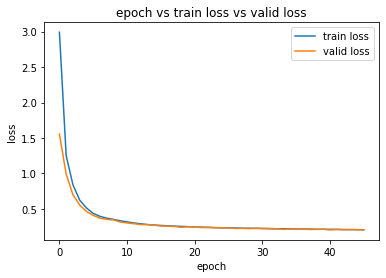

plot done


In [2]:
Trainer(options).train()

In [3]:
Predictor(options).predict_aiia()

3063it [00:00, 30626.52it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting


15795it [00:00, 29183.55it/s]


[['49921fce' '49921fce' '49921fce' ... '49921fce' '49921fce' '952ee94f']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['94bd4dbb' '3cde9c57' 'a7bc8510' ... '76eb8051' '3cde9c57' '59294749']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ['fc843e8c' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
test_normal size: 15795
test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of u

In [8]:
result_df = pd.DataFrame(columns=['Result','StartLineNum','Detail','TimeCost'])

for i, testset_file in enumerate(options["testset_files"]):
    print("Now predicting "+testset_file+".")
    evaluefile_path = "evalue/" + testset_file

    predict_result, elapsed_time = Predictor(options).predict_testset_aiia(evaluefile_path,seq_threshold=0.3)
    new_row = {"Result":predict_result,"StartLineNum":'',"Detail":'',"TimeCost":elapsed_time}
    result_df = result_df.append(new_row,ignore_index=True)

result_df.to_csv(options["output_dir"]+"result.csv")

31it [00:00, 13331.63it/s]

Now predicting evalue-0.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '021fe350' '55c69cea' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ['529e337f' '529e337f' '529e337f' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-0.txt.test size: 31


evalue/evalue-0.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-0.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-0.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-0.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-0.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-0.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-0.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-0.txt.test, #time anomaly: 

31it [00:00, 21015.58it/s]

elapsed_time: 0.49323129653930664
Now predicting evalue-1.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'b459ebb4' '69576379' 'e1cc491f']
 ['529e337f' '69576379' '0e63e9b9' ... 'e137c1c3' 'e137c1c3' '3a4177a2']
 ['e137c1c3' 'c488b4d1' 'e137c1c3' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6aa1c56d' 'e8e6ef65' '71a4caed' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0e63e9b9' 'b459ebb4' 'c488b4d1']
 ['69576379' 'c3ae9c8b' 'c488b4d1' ... '13d46b69' 'b459ebb4' 'd3e17449']]
evalue/evalue-1.txt.test size: 31


evalue/evalue-1.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1.txt.test, #time anomaly: 0 # of undetected_tokens: 16, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1.txt.test, #time anoma

31it [00:00, 24087.33it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '99faaa1d' 'a8709ade' '95377e8b']
 ['c488b4d1' 'c488b4d1' '748908de' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['5deb434f' 'c488b4d1' 'c488b4d1' ... '748908de' 'a2db051b' '6ee4c091']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-2.txt.test size: 31


evalue/evalue-2.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-2.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-2.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-2.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-2.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-2.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-2.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-2.txt.test, #time anomal

31it [00:00, 23875.03it/s]

Now predicting evalue-3.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' 'aa48d060' '02cd5aed']
 ...
 ['88624480' 'b6c87ec7' 'b9e7313b' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['0f31df2c' 'f436579e' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-3.txt.test size: 31


evalue/evalue-3.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-3.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-3.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-3.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-3.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-3.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-3.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-3.txt.test, #time anomaly: 

31it [00:00, 20904.09it/s]

elapsed_time: 0.4711489677429199
Now predicting evalue-4.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ...
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-4.txt.test size: 31


evalue/evalue-4.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-4.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-4.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-4.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-4.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-4.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-4.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-4.txt.test, #time anomaly: 

31it [00:00, 24504.98it/s]

elapsed_time: 0.4629957675933838
Now predicting evalue-5.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '55ceffdf' '41931a58' 'aa48d060']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' 'aa48d060' '02cd5aed']]
evalue/evalue-5.txt.test size: 31


evalue/evalue-5.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-5.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-5.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-5.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-5.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-5.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-5.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-5.txt.test, #time anomaly: 

31it [00:00, 21967.13it/s]

elapsed_time: 0.46969056129455566
Now predicting evalue-6.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['fa1eed23' '13d46b69' 'd3e17449' ... '6ba3b096' 'aa48d060' '02cd5aed']
 ['529e337f' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' 'c488b4d1' '6ba3b096']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '60f6a87c' '529e337f' '529e337f']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-6.txt.test size: 31


evalue/evalue-6.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-6.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-6.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-6.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-6.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-6.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-6.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-6.txt.test, #time anomaly: 

31it [00:00, 23610.57it/s]

elapsed_time: 0.45351433753967285
Now predicting evalue-7.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '872278ab' '93f864e7' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... 'c488b4d1' '55ceffdf' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '93f864e7' 'e0300155' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-7.txt.test size: 31


evalue/evalue-7.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-7.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-7.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-7.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-7.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-7.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-7.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-7.txt.test, #time anomaly: 

31it [00:00, 23875.03it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' '5aeefaf4' 'b9e7313b' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-8.txt.test size: 31


evalue/evalue-8.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-8.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-8.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-8.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-8.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-8.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-8.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-8.txt.test, #time anomaly: 

31it [00:00, 22026.67it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '9f68df92' 'aa48d060' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-9.txt.test size: 31


evalue/evalue-9.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-9.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-9.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-9.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-9.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-9.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-9.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-9.txt.test, #time anomaly: 

31it [00:00, 24212.93it/s]

elapsed_time: 0.43886327743530273
Now predicting evalue-10.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-10.txt.test size: 31


evalue/evalue-10.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10.txt.test, #time a

31it [00:00, 21080.32it/s]

Now predicting evalue-11.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['8149f149' '1508ff3f' '6b59c461' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['55c69cea' '6e8a4e1d' '021fe350' ... '02cd5aed' 'c488b4d1' '021fe350']
 ['aa48d060' 'aa48d060' '02cd5aed' ... '529e337f' 'd3e17449' '13d46b69']
 ...
 ['55c69cea' '86239b2f' '03f2e113' ... '6e8a4e1d' '021fe350' '55c69cea']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '021fe350' '55c69cea' 'a8e0f80d']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '021fe350' '55c69cea' '86239b2f']]
evalue/evalue-11.txt.test size: 31


evalue/evalue-11.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11.txt.test, #time a

31it [00:00, 23892.58it/s]

elapsed_time: 0.4822390079498291
Now predicting evalue-12.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['75e296f2' 'c488b4d1' '4d5be672' ... 'b9e7313b' 'fa1eed23' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '021fe350' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-12.txt.test size: 31


evalue/evalue-12.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-12.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-12.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-12.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-12.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-12.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-12.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-12.txt.test, #time a

31it [00:00, 24105.20it/s]

elapsed_time: 0.4590461254119873
Now predicting evalue-13.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '529e337f' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-13.txt.test size: 31


evalue/evalue-13.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-13.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-13.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-13.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-13.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-13.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-13.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-13.txt.test, #time a

31it [00:00, 24132.04it/s]

elapsed_time: 0.4632992744445801
Now predicting evalue-14.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['7d8b6b51' '37a484f2' '37a484f2' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '529e337f']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-14.txt.test size: 31


evalue/evalue-14.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-14.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-14.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-14.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-14.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-14.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-14.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-14.txt.test, #time a

31it [00:00, 23932.16it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['86239b2f' '03f2e113' '13d46b69' ... '0932f9d5' 'b53433ec' '15bf7c00']
 ['13d46b69' '529e337f' 'd3e17449' ... 'dc3bc2bf' '03f2e113' '13d46b69']
 ['021fe350' '55c69cea' 'dc3bc2bf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' 'fa1eed23' '13d46b69' ... 'd3e17449' '13d46b69' '529e337f']
 ['53a6f2d5' '48ea7d2e' '53a6f2d5' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-15.txt.test size: 31


evalue/evalue-15.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-15.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-15.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-15.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-15.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-15.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-15.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-15.txt.test, #time

31it [00:00, 21159.22it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-16.txt.test size: 31


evalue/evalue-16.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-16.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-16.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-16.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-16.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-16.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-16.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-16.txt.test, #time a

31it [00:00, 24312.53it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '55ceffdf' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' '0f31df2c' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-17.txt.test size: 31


evalue/evalue-17.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-17.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-17.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-17.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-17.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-17.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-17.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-17.txt.test, #time a

31it [00:00, 24033.90it/s]

Now predicting evalue-18.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-18.txt.test size: 31


evalue/evalue-18.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-18.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-18.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-18.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-18.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-18.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-18.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-18.txt.test, #time a

31it [00:00, 21217.92it/s]

Now predicting evalue-19.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '4d0090a6' 'aa48d060' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' 'c488b4d1' '6ba3b096']]
evalue/evalue-19.txt.test size: 31


evalue/evalue-19.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-19.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-19.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-19.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-19.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-19.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-19.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-19.txt.test, #time a

31it [00:00, 24463.49it/s]

elapsed_time: 0.4648416042327881
Now predicting evalue-20.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' 'c488b4d1' '55ceffdf']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-20.txt.test size: 31


evalue/evalue-20.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-20.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-20.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-20.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-20.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-20.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-20.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-20.txt.test, #time a

31it [00:00, 20645.19it/s]

elapsed_time: 0.46981358528137207
Now predicting evalue-21.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' '37a484f2' '7d8b6b51' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'aa48d060' '02cd5aed']
 ['0f31df2c' 'f436579e' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-21.txt.test size: 31


evalue/evalue-21.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-21.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-21.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-21.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-21.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-21.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-21.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-21.txt.test, #time a

31it [00:00, 24990.09it/s]

elapsed_time: 0.4572453498840332
Now predicting evalue-22.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '92466322' '07471ce2' '92466322']
 ...
 ['529e337f' '529e337f' '529e337f' ... '92466322' '92466322' '92466322']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '69576379' '92466322' '92466322']]
evalue/evalue-22.txt.test size: 31


evalue/evalue-22.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-22.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-22.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-22.txt.test, #time anomaly: 0 # of undetected_tokens: 30, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-22.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-22.txt.test, #time anomaly: 0 # of undetected_tokens: 21, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-22.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-22.txt.test, #tim

31it [00:00, 21294.37it/s]

elapsed_time: 0.4643211364746094
Now predicting evalue-23.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['797f1f81' '797f1f81' '797f1f81' ... 'c488b4d1' '75e296f2' '797f1f81']
 ['797f1f81' '797f1f81' '797f1f81' ... '797f1f81' '69576379' '797f1f81']
 ['797f1f81' '797f1f81' '797f1f81' ... '797f1f81' '797f1f81' 'ac162535']
 ...
 ['797f1f81' '797f1f81' 'c488b4d1' ... '797f1f81' '797f1f81' '797f1f81']
 ['ac162535' '797f1f81' '797f1f81' ... '797f1f81' '797f1f81' '797f1f81']
 ['797f1f81' '797f1f81' 'ac162535' ... 'ac162535' '69576379' '797f1f81']]
evalue/evalue-23.txt.test size: 31


evalue/evalue-23.txt.test, #time anomaly: 0 # of undetected_tokens: 24, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-23.txt.test, #time anomaly: 0 # of undetected_tokens: 34, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-23.txt.test, #time anomaly: 0 # of undetected_tokens: 18, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-23.txt.test, #time anomaly: 0 # of undetected_tokens: 33, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-23.txt.test, #time anomaly: 0 # of undetected_tokens: 24, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-23.txt.test, #time anomaly: 0 # of undetected_tokens: 21, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-23.txt.test, #time anomaly: 0 # of undetected_tokens: 23, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-23.txt.test, 

31it [00:00, 24303.44it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['797f1f81' '92466322' '797f1f81' ... '69576379' '797f1f81' '69576379']
 ['797f1f81' '797f1f81' '797f1f81' ... '797f1f81' '69576379' '797f1f81']
 ['797f1f81' '69576379' '797f1f81' ... '69576379' '797f1f81' '69576379']
 ...
 ['69576379' '797f1f81' '69576379' ... '797f1f81' '797f1f81' '797f1f81']
 ['797f1f81' '797f1f81' 'c488b4d1' ... '797f1f81' '69576379' '69576379']
 ['69576379' '797f1f81' '69576379' ... '797f1f81' '797f1f81' '797f1f81']]
evalue/evalue-24.txt.test size: 31


evalue/evalue-24.txt.test, #time anomaly: 0 # of undetected_tokens: 24, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-24.txt.test, #time anomaly: 0 # of undetected_tokens: 24, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-24.txt.test, #time anomaly: 0 # of undetected_tokens: 28, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-24.txt.test, #time anomaly: 0 # of undetected_tokens: 23, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-24.txt.test, #time anomaly: 0 # of undetected_tokens: 23, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-24.txt.test, #time anomaly: 0 # of undetected_tokens: 25, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-24.txt.test, #time anomaly: 0 # of undetected_tokens: 23, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-24.txt.test, 

31it [00:00, 23831.27it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['69576379' '797f1f81' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']
 ['6ba3b096' '60f6a87c' 'b459ebb4' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b459ebb4' 'b459ebb4' 'b459ebb4' ... 'b459ebb4' '6ba3b096' '60f6a87c']
 ['d3e17449' '787884ef' '5aeefaf4' ... '3a4177a2' '6aa1c56d' '3a4177a2']]
evalue/evalue-25.txt.test size: 31


evalue/evalue-25.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-25.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-25.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-25.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-25.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-25.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-25.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-25.txt.test, #time 

31it [00:00, 23932.16it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b53433ec' '15bf7c00' 'a7649dab' ... '021fe350' '55c69cea' '6e8a4e1d']
 ['021fe350' '55c69cea' 'dc3bc2bf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'aa48d060']
 ['13d46b69' '529e337f' 'd3e17449' ... 'dc3bc2bf' '03f2e113' '13d46b69']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-26.txt.test size: 31


evalue/evalue-26.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-26.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-26.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-26.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-26.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-26.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-26.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-26.txt.test, #time a

31it [00:00, 20658.31it/s]

Now predicting evalue-27.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '872278ab' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-27.txt.test size: 31


evalue/evalue-27.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-27.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-27.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-27.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-27.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-27.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-27.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-27.txt.test, #time a

31it [00:00, 24294.36it/s]

elapsed_time: 0.46354055404663086
Now predicting evalue-28.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '0d5f993b' 'ba34c3a9' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'ba34c3a9' 'c488b4d1' '59c44720']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-28.txt.test size: 31


evalue/evalue-28.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-28.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-28.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-28.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-28.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-28.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-28.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-28.txt.test, #time a

31it [00:00, 19832.74it/s]

elapsed_time: 0.4667384624481201
Now predicting evalue-29.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' '4d5be672']
 ['f1ae5644' '529e337f' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '021fe350' '6ba3b096']
 ['4a797f8d' 'ba34c3a9' 'ba34c3a9' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-29.txt.test size: 31


evalue/evalue-29.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-29.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-29.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-29.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-29.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-29.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-29.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-29.txt.test, #time

31it [00:00, 23644.92it/s]

elapsed_time: 0.45923280715942383
Now predicting evalue-30.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '6b59c461' '55c69cea' ... '5aeefaf4' 'aa48d060' '02cd5aed']
 ['b6c87ec7' 'c488b4d1' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['537c8354' '1af1a6b2' '51ef2ebe' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' '529e337f' '529e337f' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-30.txt.test size: 31


evalue/evalue-30.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-30.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-30.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-30.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-30.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-30.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-30.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-30.txt.test, #time a

31it [00:00, 20196.24it/s]

elapsed_time: 0.4615001678466797
Now predicting evalue-31.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['dc27fee8' '6e8a4e1d' '529e337f' ... '0d5f993b' 'ba463e2e' '51ef2ebe']
 ['529e337f' '021fe350' '55c69cea' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'cf06f8be' '021fe350' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6e8a4e1d' '6e8a4e1d' '6e8a4e1d']
 ['529e337f' '529e337f' '529e337f' ... '55c69cea' '6e8a4e1d' '021fe350']
 ['59c44720' '55c69cea' 'a8e0f80d' ... '021fe350' 'cf06f8be' '55c69cea']]
evalue/evalue-31.txt.test size: 31


evalue/evalue-31.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-31.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-31.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-31.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-31.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-31.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-31.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-31.txt.test, #time a

31it [00:00, 23512.37it/s]

elapsed_time: 0.4601426124572754
Now predicting evalue-32.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' '529e337f' ... '3b313bde' '3b313bde' '021fe350']
 ['55c69cea' '86239b2f' 'a7649dab' ... '9f98d246' '529e337f' '64456431']
 ['529e337f' '529e337f' '9f98d246' ... '021fe350' '55c69cea' '021fe350']
 ...
 ['529e337f' '529e337f' '529e337f' ... '7869a9f0' '8149f149' '529e337f']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... 'a7649dab' 'd5ad9a2e' '03f2e113']
 ['021fe350' '55c69cea' 'a8e0f80d' ... '529e337f' '529e337f' '0d5f993b']]
evalue/evalue-32.txt.test size: 31


evalue/evalue-32.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-32.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-32.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-32.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-32.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-32.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-32.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-32.txt.test, #time a

31it [00:00, 23602.00it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' '529e337f' 'd3e17449' ... '0504315e' '7869a9f0' '8149f149']
 ['8149f149' '13d46b69' '529e337f' ... '6e8a4e1d' '529e337f' '529e337f']
 ['021fe350' 'f3437167' '6e8a4e1d' ... 'aa48d060' '5a6c216b' 'e1a4a3a5']
 ...
 ['021fe350' '8149f149' '13d46b69' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' '529e337f' 'd3e17449' ... '529e337f' 'd3e17449' '13d46b69']
 ['529e337f' 'd3e17449' '6e8a4e1d' ... 'b0e5ffef' 'f58b4064' 'aa48d060']]
evalue/evalue-33.txt.test size: 31


evalue/evalue-33.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-33.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-33.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-33.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-33.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-33.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-33.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-33.txt.test, #time 

31it [00:00, 20777.15it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b76eca97' 'd466fd28' '10fb736c' ... '529e337f' '3f24cb43' '529e337f']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '6ba3b096' '60f6a87c' '6ee4c091']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'd3e17449' '6e8a4e1d']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '47c2b15f' ... '55c69cea' '86239b2f' '60f6a87c']
 ['6ba3b096' '60f6a87c' '7c55fe39' ... '03f2e113' '13d46b69' '529e337f']]
evalue/evalue-34.txt.test size: 31


evalue/evalue-34.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-34.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-34.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-34.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-34.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-34.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-34.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-34.txt.test, #time

31it [00:00, 21190.26it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '021fe350' '55c69cea']
 ['55c69cea' 'dc3bc2bf' '0d5f993b' ... '529e337f' '021fe350' '55c69cea']
 ['55c69cea' '6e8a4e1d' '529e337f' ... 'b380aa29' '529e337f' 'b8ca993e']
 ...
 ['6e8a4e1d' '021fe350' '55c69cea' ... '529e337f' '021fe350' '55c69cea']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '0d5f993b' 'ba463e2e' '51ef2ebe']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '021fe350' '55c69cea' '6e8a4e1d']]
evalue/evalue-35.txt.test size: 31


evalue/evalue-35.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-35.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-35.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-35.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-35.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-35.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-35.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-35.txt.test, #time a

31it [00:00, 24047.24it/s]

Now predicting evalue-36.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'aa48d060' 'c488b4d1' '529e337f']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-36.txt.test size: 31


evalue/evalue-36.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-36.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-36.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-36.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-36.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-36.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-36.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-36.txt.test, #time a

31it [00:00, 22302.47it/s]

elapsed_time: 0.4729344844818115
Now predicting evalue-37.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '51ef2ebe' '6e8a4e1d' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'd3e17449' '0955fae3' 'c0a435dd']
 ['f1ae5644' '529e337f' 'd3e17449' ... '6e8a4e1d' '021fe350' '55c69cea']
 ...
 ['de4771b0' '122d6a88' '6e8a4e1d' ... '021fe350' '55c69cea' 'a8e0f80d']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['55c69cea' 'dc3bc2bf' '03f2e113' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-37.txt.test size: 31


evalue/evalue-37.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-37.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-37.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-37.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-37.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-37.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-37.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-37.txt.test, #time a

31it [00:00, 24217.44it/s]

elapsed_time: 0.46857666969299316
Now predicting evalue-38.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6e8a4e1d' '529e337f' '529e337f' ... 'f2cbc2a3' '26c8cd19' '3f24cb43']
 ['bd9a7a85' 'fb04874e' 'f2cbc2a3' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ...
 ['f2cbc2a3' 'c488b4d1' 'a8fdcc09' ... '529e337f' '529e337f' 'c488b4d1']
 ['021fe350' '55c69cea' '6e8a4e1d' ... '529e337f' '529e337f' '529e337f']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... 'd3e17449' 'a09d3335' '5aeefaf4']]
evalue/evalue-38.txt.test size: 31


evalue/evalue-38.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-38.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-38.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-38.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-38.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-38.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-38.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-38.txt.test, #time a

31it [00:00, 21466.64it/s]

elapsed_time: 0.46219897270202637
Now predicting evalue-39.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '59c44720' '60f6a87c' ... '55c69cea' '529e337f' '529e337f']]
evalue/evalue-39.txt.test size: 31


evalue/evalue-39.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-39.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-39.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-39.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-39.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-39.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-39.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-39.txt.test, #time a

31it [00:00, 21128.28it/s]

Now predicting evalue-40.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '529e337f' '529e337f' ... '6e8a4e1d' '529e337f' '529e337f']
 ['dc3bc2bf' '03f2e113' '13d46b69' ... '4d5be672' '529e337f' '021fe350']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'f1ae5644' '529e337f' '529e337f']
 ...
 ['021fe350' '55c69cea' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '13d46b69' '0d5f993b' 'f1ae5644']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '529e337f' '6e8a4e1d' '529e337f']]
evalue/evalue-40.txt.test size: 31


evalue/evalue-40.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-40.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-40.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-40.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-40.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-40.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-40.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-40.txt.test, #time a

31it [00:00, 26119.61it/s]

elapsed_time: 0.4721643924713135
Now predicting evalue-41.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4fa7219d' '6e8a4e1d' '021fe350' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '6e8a4e1d' '021fe350' ... 'c488b4d1' '021fe350' '55c69cea']
 ['529e337f' '529e337f' 'c488b4d1' ... '6e8a4e1d' '184cdf94' '529e337f']
 ...
 ['86239b2f' '03f2e113' '13d46b69' ... '5deb434f' '529e337f' '529e337f']
 ['529e337f' 'd3e17449' '861693f4' ... '021fe350' '55c69cea' 'dc3bc2bf']
 ['6e8a4e1d' '529e337f' '64456431' ... '529e337f' 'd3e17449' '6e8a4e1d']]
evalue/evalue-41.txt.test size: 31


evalue/evalue-41.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-41.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-41.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-41.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 12 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-41.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-41.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-41.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-41.txt.test, #time a

31it [00:00, 21121.41it/s]

elapsed_time: 0.463451623916626
Now predicting evalue-42.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '021fe350' ... '529e337f' 'd3e17449' '529e337f']
 ['529e337f' '021fe350' '8149f149' ... 'dc27fee8' '51ef2ebe' '6e8a4e1d']
 ['0d5f993b' 'ba463e2e' 'dc27fee8' ... '021fe350' '55c69cea' 'a8e0f80d']
 ...
 ['529e337f' '529e337f' '021fe350' ... 'd3e17449' '13d46b69' '529e337f']
 ['529e337f' 'd3e17449' '13d46b69' ... '8149f149' '13d46b69' '6eea2da1']
 ['c488b4d1' '529e337f' '529e337f' ... '0d5f993b' 'ba463e2e' 'dc27fee8']]
evalue/evalue-42.txt.test size: 31


evalue/evalue-42.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-42.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-42.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-42.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-42.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-42.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-42.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-42.txt.test, #time a

31it [00:00, 19279.87it/s]

elapsed_time: 0.45682287216186523
Now predicting evalue-43.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' '55c69cea' '6e8a4e1d' ... 'aa48d060' '5a6c216b' 'e1a4a3a5']
 ['c488b4d1' '872278ab' '93f864e7' ... '60f6a87c' '13d46b69' 'd3e17449']
 ['b9e7313b' '0e478ec2' '60f6a87c' ... 'ebb6e33c' '5a6c216b' 'b76eca97']
 ...
 ['4e55706c' '13d46b69' '6ba3b096' ... '10fb736c' 'dd1924ed' 'aa48d060']
 ['529e337f' '529e337f' 'd3e17449' ... '93f864e7' '184cdf94' '8fb95126']
 ['9a004e1a' 'bf2e368e' 'd3e17449' ... '6090a706' '65d57bd5' '1ea0fcc5']]
evalue/evalue-43.txt.test size: 31


evalue/evalue-43.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-43.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-43.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-43.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-43.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-43.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-43.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-43.txt.test, #time

31it [00:00, 24380.92it/s]

Now predicting evalue-44.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' '02cd5aed' ... '021fe350' '55c69cea' '6e8a4e1d']
 ['6b59c461' '55c69cea' 'dc3bc2bf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'dc3bc2bf' '03f2e113' '13d46b69']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '88624480' '5aeefaf4']]
evalue/evalue-44.txt.test size: 31


evalue/evalue-44.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-44.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-44.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-44.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-44.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-44.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-44.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-44.txt.test, #time 

31it [00:00, 19742.40it/s]

elapsed_time: 0.46508193016052246
Now predicting evalue-45.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '13d46b69' '529e337f' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '021fe350' ... '55c69cea' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '529e337f']]
evalue/evalue-45.txt.test size: 31


evalue/evalue-45.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-45.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-45.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-45.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-45.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-45.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-45.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-45.txt.test, #time 

31it [00:00, 24249.05it/s]

elapsed_time: 0.5537409782409668
Now predicting evalue-46.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['021fe350' '55c69cea' 'a8e0f80d' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['f1ae5644' '529e337f' '021fe350' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '021fe350' '55c69cea' '6e8a4e1d']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-46.txt.test size: 31


evalue/evalue-46.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-46.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-46.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-46.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-46.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-46.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-46.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-46.txt.test, #time a

31it [00:00, 24551.25it/s]

elapsed_time: 0.4694802761077881
Now predicting evalue-47.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'aa48d060' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '55c69cea' '6e8a4e1d' '021fe350']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6e8a4e1d' '021fe350' '55c69cea']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6e8a4e1d' '529e337f' '529e337f']]
evalue/evalue-47.txt.test size: 31


evalue/evalue-47.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-47.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-47.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-47.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-47.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-47.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-47.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-47.txt.test, #time a

31it [00:00, 1472.59it/s]

elapsed_time: 0.46265649795532227
Now predicting evalue-48.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55c69cea' 'dc3bc2bf' '03f2e113' ... '529e337f' '529e337f' '529e337f']
 ['55c69cea' 'a8e0f80d' '6e8a4e1d' ... 'd3e17449' '6e8a4e1d' '6b59c461']
 ['13d46b69' '529e337f' 'd3e17449' ... 'd3e17449' '6e8a4e1d' '529e337f']
 ...
 ['021fe350' '184cdf94' '55c69cea' ... '0504315e' '7869a9f0' '8149f149']
 ['529e337f' '529e337f' '021fe350' ... '6e8a4e1d' '021fe350' '55c69cea']
 ['86239b2f' '03f2e113' '13d46b69' ... '529e337f' '529e337f' 'd3e17449']]
evalue/evalue-48.txt.test size: 31


evalue/evalue-48.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-48.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-48.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-48.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-48.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-48.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-48.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-48.txt.test, #time a

31it [00:00, 22972.34it/s]

elapsed_time: 0.45546841621398926
Now predicting evalue-49.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '6e8a4e1d' '529e337f' ... '529e337f' '021fe350' 'f3437167']
 ['529e337f' '021fe350' '8149f149' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['7869a9f0' '8149f149' '13d46b69' ... '8149f149' '13d46b69' '529e337f']
 ['0890241f' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-49.txt.test size: 31


evalue/evalue-49.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-49.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-49.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-49.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-49.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-49.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-49.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-49.txt.test, #time

31it [00:00, 23752.91it/s]

elapsed_time: 0.49602770805358887
Now predicting evalue-50.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '021fe350' ... 'a7649dab' 'd5ad9a2e' '89d118a0']
 ['13d46b69' '529e337f' 'd3e17449' ... '13d46b69' '529e337f' 'd3e17449']
 ['3b313bde' '621e1961' '13d46b69' ... '021fe350' '55c69cea' '86239b2f']
 ...
 ['6e8a4e1d' '021fe350' '55c69cea' ... '13d46b69' '529e337f' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '861693f4' 'fbc9b88a']
 ['86b11f3f' '3b313bde' '002eb2c8' ... 'a8e0f80d' '6e8a4e1d' '529e337f']]
evalue/evalue-50.txt.test size: 31


evalue/evalue-50.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-50.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-50.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-50.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-50.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-50.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-50.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-50.txt.test, #time a

31it [00:00, 24007.28it/s]

elapsed_time: 0.4683365821838379
Now predicting evalue-51.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['8149f149' '13d46b69' '529e337f' ... '7869a9f0' '8149f149' '13d46b69']
 ['13d46b69' '529e337f' 'd3e17449' ... '021fe350' '55c69cea' '86239b2f']
 ['529e337f' '021fe350' '021fe350' ... 'd3e17449' '13d46b69' '529e337f']
 ...
 ['8149f149' '13d46b69' '03f2e113' ... '6e8a4e1d' '529e337f' '529e337f']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'd3e17449' '13d46b69' '529e337f']
 ['13d46b69' '529e337f' 'd3e17449' ... '529e337f' '021fe350' '55c69cea']]
evalue/evalue-51.txt.test size: 31


evalue/evalue-51.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-51.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-51.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-51.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-51.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-51.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-51.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-51.txt.test, #time a

31it [00:00, 24607.01it/s]

elapsed_time: 0.4626810550689697
Now predicting evalue-52.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '6e8a4e1d' '529e337f' ... '6ba3b096' 'aa48d060' '60f6a87c']
 ['13d46b69' '5a6c216b' '3c8fea88' ... '6ba3b096' '8e28a2c7' '60f6a87c']
 ['aa48d060' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '95377e8b']
 ...
 ['6ba3b096' '47c2b15f' '5a9d20f9' ... '95377e8b' 'bd9a7a85' 'fb04874e']
 ['529e337f' '529e337f' '021fe350' ... '3c8fea88' 'f4b071f3' 'd3e17449']
 ['6ba3b096' '52a20477' '5aeefaf4' ... '26c8cd19' '3f24cb43' 'c488b4d1']]
evalue/evalue-52.txt.test size: 31


evalue/evalue-52.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-52.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-52.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-52.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-52.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-52.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-52.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-52.txt.test, #tim

31it [00:00, 21318.81it/s]

elapsed_time: 0.5390772819519043
Now predicting evalue-53.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '021fe350' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['1af1a6b2' '1508ff3f' '6b59c461' ... '529e337f' '6ba3b096' '529e337f']
 ['6ba3b096' '60f6a87c' '529e337f' ... 'a8e0f80d' '6e8a4e1d' '529e337f']
 ...
 ['021fe350' '60f6a87c' '55c69cea' ... 'aa48d060' 'aa48d060' '55ceffdf']
 ['529e337f' 'd3e17449' '13d46b69' ... '6b59c461' 'abf1f49c' '06a7422a']
 ['6ba3b096' '529e337f' '60f6a87c' ... '55c69cea' 'a8e0f80d' '6e8a4e1d']]
evalue/evalue-53.txt.test size: 31


evalue/evalue-53.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-53.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-53.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-53.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-53.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-53.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-53.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-53.txt.test, #time a

31it [00:00, 21155.78it/s]

elapsed_time: 0.47507476806640625
Now predicting evalue-54.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3de2e5f3' '86018f6e' '9e062946' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c3b72335' 'b2585502' '86018f6e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'aa48d060']
 ['aa48d060' '0890241f' '6f760b22' ... '86018f6e' '9e062946' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-54.txt.test size: 31


evalue/evalue-54.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-54.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-54.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-54.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-54.txt.test, #time anomaly: 0 # of undetected_tokens: 18, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-54.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-54.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-54.txt.test, #time 

31it [00:00, 24376.34it/s]

elapsed_time: 0.4602999687194824
Now predicting evalue-55.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'fa1eed23' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-55.txt.test size: 31


evalue/evalue-55.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-55.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-55.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-55.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-55.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-55.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-55.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-55.txt.test, #time a

31it [00:00, 21076.90it/s]

elapsed_time: 0.469862699508667
Now predicting evalue-56.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' 'aa48d060' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '5aeefaf4' 'b9e7313b']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-56.txt.test size: 31


evalue/evalue-56.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-56.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-56.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-56.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-56.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-56.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-56.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-56.txt.test, #time a

31it [00:00, 23752.91it/s]

elapsed_time: 0.550966739654541
Now predicting evalue-57.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' 'a09d3335' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'aa48d060']
 ...
 ['5aeefaf4' '4d0090a6' '529e337f' ... 'aa48d060' '201de44e' 'd1f2833a']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-57.txt.test size: 31


evalue/evalue-57.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-57.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-57.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-57.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-57.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-57.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-57.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-57.txt.test, #time a

31it [00:00, 24042.79it/s]

elapsed_time: 0.4611201286315918
Now predicting evalue-58.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b459ebb4' 'c488b4d1' 'e0300155' ... '4a797f8d' 'c488b4d1' '75e296f2']
 ['529e337f' 'c488b4d1' '69576379' ... 'e8e6ef65' 'b459ebb4' '2285ef69']
 ['d45e5a66' 'b24e3d6d' 'e8e6ef65' ... '537c8354' '8149f149' '7869a9f0']
 ...
 ['e8e6ef65' '2285ef69' 'c488b4d1' ... '1508ff3f' '6b59c461' '55c69cea']
 ['c3ae9c8b' 'c488b4d1' 'b459ebb4' ... '69576379' 'e1cc491f' 'b459ebb4']
 ['5deb434f' '5deb434f' '5deb434f' ... 'aa48d060' 'aa48d060' '99faaa1d']]
evalue/evalue-58.txt.test size: 31


evalue/evalue-58.txt.test, #time anomaly: 0 # of undetected_tokens: 16, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-58.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-58.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-58.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-58.txt.test, #time anomaly: 0 # of undetected_tokens: 19, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-58.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-58.txt.test, #time anomaly: 0 # of undetected_tokens: 19, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-58.txt.test, #t

31it [00:00, 24481.91it/s]

elapsed_time: 0.45879149436950684
Now predicting evalue-59.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['021fe350' '55c69cea' 'dc3bc2bf' ... '06a7422a' '6e8a4e1d' 'cb6e2730']
 ['55c69cea' '6e8a4e1d' '021fe350' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' '59c44720' '60f6a87c' ... 'c488b4d1' '872278ab' 'aa48d060']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '93f864e7' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '021fe350' '55c69cea' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'c488b4d1']]
evalue/evalue-59.txt.test size: 31


evalue/evalue-59.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-59.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-59.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-59.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-59.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-59.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-59.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-59.txt.test, #time a

31it [00:00, 23683.68it/s]

elapsed_time: 0.4671745300292969
Now predicting evalue-60.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['b459ebb4' 'aa48d060' 'bd9a7a85' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '75e296f2' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-60.txt.test size: 31


evalue/evalue-60.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-60.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-60.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-60.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-60.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-60.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-60.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-60.txt.test, #time a

31it [00:00, 20947.87it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '021fe350' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '529e337f']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '55c69cea' '6e8a4e1d' '529e337f']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-61.txt.test size: 31


evalue/evalue-61.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-61.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-61.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-61.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-61.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-61.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-61.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-61.txt.test, #time a

31it [00:00, 23901.36it/s]

elapsed_time: 0.48975491523742676
Now predicting evalue-62.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4f8bdedb' ... 'ff2d50fe' 'a645909d' 'ff2d50fe']
 ['ff2d50fe' 'a645909d' 'ff2d50fe' ... '4f8bdedb' 'a645909d' 'ff2d50fe']
 ['a645909d' 'ff2d50fe' '4f8bdedb' ... 'a645909d' 'ff2d50fe' 'ff2d50fe']
 ...
 ['ff2d50fe' 'a645909d' 'a645909d' ... 'a645909d' 'ff2d50fe' 'a645909d']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'ff2d50fe' 'a645909d' 'ff2d50fe']
 ['ff2d50fe' 'a645909d' 'ff2d50fe' ... 'a645909d' 'a645909d' 'ff2d50fe']]
evalue/evalue-62.txt.test size: 31


evalue/evalue-62.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-62.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-62.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-62.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-62.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-62.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-62.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-62.txt.test, #time a

31it [00:00, 20961.38it/s]

elapsed_time: 0.4670686721801758
Now predicting evalue-63.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a645909d' 'ff2d50fe' 'a645909d' ... 'ff2d50fe' 'a645909d' 'a645909d']
 ['ff2d50fe' 'a645909d' 'a645909d' ... 'ff2d50fe' 'ff2d50fe' 'a645909d']
 ['a645909d' 'a645909d' 'ff2d50fe' ... 'ff2d50fe' 'a645909d' 'ff2d50fe']
 ...
 ['ff2d50fe' 'a645909d' 'ff2d50fe' ... 'ff2d50fe' 'ff2d50fe' 'a645909d']
 ['ff2d50fe' 'a645909d' 'a645909d' ... 'a645909d' 'ff2d50fe' 'ff2d50fe']
 ['a645909d' 'a645909d' 'ff2d50fe' ... 'ff2d50fe' 'a645909d' 'a645909d']]
evalue/evalue-63.txt.test size: 31


evalue/evalue-63.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-63.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-63.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-63.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-63.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-63.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-63.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-63.txt.test, #time a

31it [00:00, 22960.17it/s]

elapsed_time: 0.5011982917785645
Now predicting evalue-64.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['ff2d50fe' 'ff2d50fe' 'a645909d' ... 'ff2d50fe' 'a645909d' 'a645909d']
 ['ff2d50fe' 'a645909d' 'ff2d50fe' ... 'a645909d' 'ff2d50fe' 'a645909d']
 ['a645909d' 'ff2d50fe' 'a645909d' ... 'ff2d50fe' 'a645909d' 'ff2d50fe']
 ...
 ['a645909d' 'ff2d50fe' 'ff2d50fe' ... 'a645909d' 'ff2d50fe' 'a645909d']
 ['ff2d50fe' 'a645909d' 'a645909d' ... 'ff2d50fe' 'a645909d' 'ff2d50fe']
 ['a645909d' 'ff2d50fe' 'ff2d50fe' ... 'ff2d50fe' 'ff2d50fe' 'a645909d']]
evalue/evalue-64.txt.test size: 31


evalue/evalue-64.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-64.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-64.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-64.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-64.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-64.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-64.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-64.txt.test, #time a

31it [00:00, 20827.07it/s]

elapsed_time: 0.4717221260070801
Now predicting evalue-65.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['ff2d50fe' 'ff2d50fe' 'a645909d' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['a645909d' 'ff2d50fe' 'a645909d' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['75e296f2' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['ff2d50fe' 'ff2d50fe' 'a645909d' ... 'a645909d' 'ff2d50fe' 'ff2d50fe']
 ['529e337f' 'c488b4d1' '4d5be672' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-65.txt.test size: 31


evalue/evalue-65.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-65.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-65.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-65.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-65.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-65.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-65.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-65.txt.test, #time a

31it [00:00, 21456.01it/s]

elapsed_time: 0.46344542503356934
Now predicting evalue-66.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '529e337f' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-66.txt.test size: 31


evalue/evalue-66.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-66.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-66.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-66.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-66.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-66.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-66.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-66.txt.test, #time a

31it [00:00, 20931.01it/s]

Now predicting evalue-67.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '75e296f2' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '75e296f2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-67.txt.test size: 31


evalue/evalue-67.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-67.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-67.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-67.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-67.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-67.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-67.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-67.txt.test, #time a

31it [00:00, 24367.21it/s]

elapsed_time: 0.46058034896850586
Now predicting evalue-68.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'e0300155' 'c488b4d1' 'c488b4d1']]
evalue/evalue-68.txt.test size: 31


evalue/evalue-68.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-68.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-68.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-68.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-68.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-68.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-68.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-68.txt.test, #time a

31it [00:00, 20671.45it/s]

elapsed_time: 0.5027501583099365
Now predicting evalue-69.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['0f31df2c' 'f436579e' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-69.txt.test size: 31


evalue/evalue-69.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-69.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-69.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-69.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-69.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-69.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-69.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-69.txt.test, #time a

31it [00:00, 24203.91it/s]

elapsed_time: 0.4664275646209717
Now predicting evalue-70.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '787884ef' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-70.txt.test size: 31


evalue/evalue-70.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-70.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-70.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-70.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-70.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-70.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-70.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-70.txt.test, #time a

31it [00:00, 21053.02it/s]

elapsed_time: 0.4678986072540283
Now predicting evalue-71.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-71.txt.test size: 31


evalue/evalue-71.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-71.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-71.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-71.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-71.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-71.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-71.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-71.txt.test, #time a

31it [00:00, 20840.43it/s]

elapsed_time: 0.4691348075866699
Now predicting evalue-72.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-72.txt.test size: 31


evalue/evalue-72.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-72.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-72.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-72.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-72.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-72.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-72.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-72.txt.test, #time a

31it [00:00, 24065.04it/s]

elapsed_time: 0.479445219039917
Now predicting evalue-73.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['8e576e99' '201de44e' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']]
evalue/evalue-73.txt.test size: 31


evalue/evalue-73.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-73.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-73.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-73.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-73.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-73.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-73.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-73.txt.test, #time a

31it [00:00, 21005.40it/s]

elapsed_time: 0.4595527648925781
Now predicting evalue-74.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['b6c87ec7' 'b9e7313b' '5aeefaf4' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '37a484f2' '37a484f2' '37a484f2']]
evalue/evalue-74.txt.test size: 31


evalue/evalue-74.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-74.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-74.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-74.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-74.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-74.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-74.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-74.txt.test, #time a

31it [00:00, 23572.05it/s]

Now predicting evalue-75.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-75.txt.test size: 31


evalue/evalue-75.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-75.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-75.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-75.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-75.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-75.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-75.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-75.txt.test, #time a

31it [00:00, 23632.03it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']]
evalue/evalue-76.txt.test size: 31


evalue/evalue-76.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-76.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-76.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-76.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-76.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-76.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-76.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-76.txt.test, #time a

31it [00:00, 24583.74it/s]

elapsed_time: 0.4799327850341797
Now predicting evalue-77.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' '02cd5aed' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '5aeefaf4' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-77.txt.test size: 31


evalue/evalue-77.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-77.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-77.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-77.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-77.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-77.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-77.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-77.txt.test, #time a

31it [00:00, 23662.13it/s]

elapsed_time: 0.46446776390075684
Now predicting evalue-78.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['37a484f2' '37a484f2' 'aa48d060' ... '529e337f' 'c488b4d1' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-78.txt.test size: 31


evalue/evalue-78.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-78.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-78.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-78.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-78.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-78.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-78.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-78.txt.test, #time a

31it [00:00, 21978.27it/s]

elapsed_time: 0.4553110599517822
Now predicting evalue-79.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'aa48d060' '02cd5aed' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']]
evalue/evalue-79.txt.test size: 31


evalue/evalue-79.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-79.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-79.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-79.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-79.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-79.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-79.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-79.txt.test, #time a

31it [00:00, 21114.55it/s]

elapsed_time: 0.47654151916503906
Now predicting evalue-80.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-80.txt.test size: 31


evalue/evalue-80.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-80.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-80.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-80.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-80.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-80.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-80.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-80.txt.test, #time a

31it [00:00, 20668.16it/s]

elapsed_time: 0.4590938091278076
Now predicting evalue-81.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' 'aa48d060' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['41931a58' 'aa48d060' '0f31df2c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' 'f436579e' '9f68df92']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'b9e7313b' 'fa1eed23' '13d46b69']]
evalue/evalue-81.txt.test size: 31


evalue/evalue-81.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-81.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-81.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-81.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-81.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-81.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-81.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-81.txt.test, #time a

31it [00:00, 24047.24it/s]

elapsed_time: 0.4775104522705078
Now predicting evalue-82.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '872278ab' '93f864e7' ... '529e337f' '529e337f' 'd3e17449']
 ['60f6a87c' '6ba3b096' '529e337f' ... '60f6a87c' '529e337f' '529e337f']
 ['59c44720' '529e337f' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-82.txt.test size: 31


evalue/evalue-82.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-82.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-82.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-82.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-82.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-82.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-82.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-82.txt.test, #time a

31it [00:00, 22429.43it/s]

elapsed_time: 0.46789002418518066
Now predicting evalue-83.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '872278ab' '93f864e7' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-83.txt.test size: 31


evalue/evalue-83.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-83.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-83.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-83.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-83.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-83.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-83.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-83.txt.test, #time a

31it [00:00, 23967.45it/s]

elapsed_time: 0.4669671058654785
Now predicting evalue-84.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' '7d8b6b51']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-84.txt.test size: 31


evalue/evalue-84.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-84.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-84.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-84.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-84.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-84.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-84.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-84.txt.test, #time a

31it [00:00, 22417.83it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' '0f31df2c']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-85.txt.test size: 31


evalue/evalue-85.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-85.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-85.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-85.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-85.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-85.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-85.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-85.txt.test, #time a

31it [00:00, 20780.47it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-86.txt.test size: 31


evalue/evalue-86.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-86.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-86.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-86.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-86.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-86.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-86.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-86.txt.test, #time a

31it [00:00, 21190.26it/s]

Now predicting evalue-87.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' 'b609fd48' '08b8cfe3' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '55ceffdf']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '529e337f']]
evalue/evalue-87.txt.test size: 31


evalue/evalue-87.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-87.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-87.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-87.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-87.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-87.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-87.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-87.txt.test, #time a

31it [00:00, 23260.00it/s]

elapsed_time: 0.46689796447753906
Now predicting evalue-88.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '529e337f' '529e337f' '529e337f']
 ...
 ['fa1eed23' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '529e337f' '529e337f']]
evalue/evalue-88.txt.test size: 31


evalue/evalue-88.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-88.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-88.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-88.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-88.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-88.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-88.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-88.txt.test, #time a

31it [00:00, 23757.25it/s]

elapsed_time: 0.464038610458374
Now predicting evalue-89.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-89.txt.test size: 31


evalue/evalue-89.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-89.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-89.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-89.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-89.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-89.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-89.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-89.txt.test, #time a

31it [00:00, 23436.09it/s]

elapsed_time: 0.45780491828918457
Now predicting evalue-90.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-90.txt.test size: 31


evalue/evalue-90.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-90.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-90.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-90.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-90.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-90.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-90.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-90.txt.test, #time a

31it [00:00, 21256.08it/s]

elapsed_time: 0.4607067108154297
Now predicting evalue-91.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-91.txt.test size: 31


evalue/evalue-91.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-91.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-91.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-91.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-91.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-91.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-91.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-91.txt.test, #time a

31it [00:00, 24123.08it/s]

elapsed_time: 0.5308668613433838
Now predicting evalue-92.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' '529e337f']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['fa1eed23' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'b6c87ec7' '88624480' ... 'f436579e' '0f31df2c' 'aa48d060']]
evalue/evalue-92.txt.test size: 31


evalue/evalue-92.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-92.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-92.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-92.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-92.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-92.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-92.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-92.txt.test, #time a

31it [00:00, 23901.36it/s]

elapsed_time: 0.47176527976989746
Now predicting evalue-93.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['6ba3b096' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-93.txt.test size: 31


evalue/evalue-93.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-93.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-93.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-93.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-93.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-93.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-93.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-93.txt.test, #time a

31it [00:00, 23402.34it/s]

elapsed_time: 0.4629073143005371
Now predicting evalue-94.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'aa48d060']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']]
evalue/evalue-94.txt.test size: 31


evalue/evalue-94.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-94.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-94.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-94.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-94.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-94.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-94.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-94.txt.test, #time a

31it [00:00, 24440.49it/s]

elapsed_time: 0.4514129161834717
Now predicting evalue-95.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88624480' '5aeefaf4' 'b9e7313b' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-95.txt.test size: 31


evalue/evalue-95.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-95.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-95.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-95.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-95.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-95.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-95.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-95.txt.test, #time a

31it [00:00, 23602.00it/s]

elapsed_time: 0.4604647159576416
Now predicting evalue-96.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '55ceffdf' '41931a58']
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '02cd5aed' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-96.txt.test size: 31


evalue/evalue-96.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-96.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-96.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-96.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-96.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-96.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-96.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-96.txt.test, #time a

31it [00:00, 21577.07it/s]

elapsed_time: 0.4655609130859375
Now predicting evalue-97.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '88624480' 'b6c87ec7']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['529e337f' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-97.txt.test size: 31


evalue/evalue-97.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-97.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-97.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-97.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-97.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-97.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-97.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-97.txt.test, #time a

31it [00:00, 15889.46it/s]

elapsed_time: 0.47486209869384766
Now predicting evalue-98.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-98.txt.test size: 31


evalue/evalue-98.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-98.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-98.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-98.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-98.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-98.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-98.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-98.txt.test, #time a

31it [00:00, 23688.00it/s]

elapsed_time: 0.5574054718017578
Now predicting evalue-99.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '9f68df92']
 ...
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-99.txt.test size: 31


evalue/evalue-99.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-99.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-99.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-99.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-99.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-99.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-99.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-99.txt.test, #time a

31it [00:00, 23516.63it/s]

elapsed_time: 0.47124338150024414
Now predicting evalue-100.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['a09d3335' '4d0090a6' '5aeefaf4' ... 'c488b4d1' '872278ab' '93f864e7']]
evalue/evalue-100.txt.test size: 31


evalue/evalue-100.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-100.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-100.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-100.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-100.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-100.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-100.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-100.txt.test,

31it [00:00, 23602.00it/s]

elapsed_time: 0.4624979496002197
Now predicting evalue-101.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-101.txt.test size: 31


evalue/evalue-101.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-101.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-101.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-101.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-101.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-101.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-101.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-101.txt.test,

31it [00:00, 22310.13it/s]

elapsed_time: 0.44200563430786133
Now predicting evalue-102.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['9f68df92' 'aa48d060' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-102.txt.test size: 31


evalue/evalue-102.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102.txt.test,

31it [00:00, 21245.66it/s]

elapsed_time: 0.4804823398590088
Now predicting evalue-103.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['9f68df92' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-103.txt.test size: 31


evalue/evalue-103.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103.txt.test,

31it [00:00, 23272.49it/s]

elapsed_time: 0.5517799854278564
Now predicting evalue-104.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'aa48d060' '02cd5aed']
 ['c488b4d1' '4d5be672' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-104.txt.test size: 31


evalue/evalue-104.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104.txt.test,

31it [00:00, 23554.97it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... '41931a58' 'aa48d060' '0f31df2c']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['f436579e' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... '529e337f' '60f6a87c' '6ba3b096']]
evalue/evalue-105.txt.test size: 31


evalue/evalue-105.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-105.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-105.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-105.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-105.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-105.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-105.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-105.txt.test,

31it [00:00, 23135.84it/s]

elapsed_time: 0.47475552558898926
Now predicting evalue-106.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' '75e296f2']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-106.txt.test size: 31


evalue/evalue-106.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-106.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-106.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-106.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-106.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-106.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-106.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-106.txt.test,

31it [00:00, 21403.03it/s]

elapsed_time: 0.48270487785339355
Now predicting evalue-107.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-107.txt.test size: 31


evalue/evalue-107.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-107.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-107.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-107.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-107.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-107.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-107.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-107.txt.test,

31it [00:00, 25125.30it/s]

elapsed_time: 0.4662175178527832
Now predicting evalue-108.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '9f68df92' 'c488b4d1']
 ...
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '37a484f2' '37a484f2' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-108.txt.test size: 31


evalue/evalue-108.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108.txt.test,

31it [00:00, 24002.85it/s]

elapsed_time: 0.46018338203430176
Now predicting evalue-109.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-109.txt.test size: 31


evalue/evalue-109.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-109.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-109.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-109.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-109.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-109.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-109.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-109.txt.test,

31it [00:00, 23731.23it/s]

elapsed_time: 0.47469615936279297
Now predicting evalue-110.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-110.txt.test size: 31


evalue/evalue-110.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110.txt.test,

31it [00:00, 18808.54it/s]

elapsed_time: 0.46645545959472656
Now predicting evalue-111.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '0f31df2c' 'f436579e']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-111.txt.test size: 31


evalue/evalue-111.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111.txt.test,

31it [00:00, 23918.95it/s]

elapsed_time: 0.4599275588989258
Now predicting evalue-112.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'f436579e' '0f31df2c' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-112.txt.test size: 31


evalue/evalue-112.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-112.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-112.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-112.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-112.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-112.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-112.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-112.txt.test,

31it [00:00, 24149.97it/s]

elapsed_time: 0.4850809574127197
Now predicting evalue-113.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '9f68df92' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-113.txt.test size: 31


evalue/evalue-113.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-113.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-113.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-113.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-113.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-113.txt.test,

31it [00:00, 20853.80it/s]

elapsed_time: 0.47822141647338867
Now predicting evalue-114.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' '02cd5aed' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '146b9b16' '6ba3b096']
 ...
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '146b9b16' '60f6a87c' '6ba3b096']
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['529e337f' '529e337f' '529e337f' ... '146b9b16' '60f6a87c' '6ba3b096']]
evalue/evalue-114.txt.test size: 31


evalue/evalue-114.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-114.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-114.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-114.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-114.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-114.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-114.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-114.txt.test,

31it [00:00, 24330.73it/s]

Now predicting evalue-115.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '13d46b69' 'd3e17449' '13d46b69']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-115.txt.test size: 31


evalue/evalue-115.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-115.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-115.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-115.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-115.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-115.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-115.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-115.txt.test,

31it [00:00, 23406.56it/s]

elapsed_time: 0.48495030403137207
Now predicting evalue-116.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '872278ab' '93f864e7' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' '13d46b69']]
evalue/evalue-116.txt.test size: 31


evalue/evalue-116.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-116.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-116.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-116.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-116.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-116.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-116.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-116.txt.test,

31it [00:00, 24007.28it/s]

elapsed_time: 0.4632911682128906
Now predicting evalue-117.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '9f68df92' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-117.txt.test size: 31


evalue/evalue-117.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-117.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-117.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-117.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-117.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-117.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-117.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-117.txt.test,

31it [00:00, 21732.15it/s]

elapsed_time: 0.4762299060821533
Now predicting evalue-118.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-118.txt.test size: 31


evalue/evalue-118.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-118.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-118.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-118.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-118.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-118.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-118.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-118.txt.test,

31it [00:00, 20947.87it/s]

Now predicting evalue-119.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-119.txt.test size: 31


evalue/evalue-119.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-119.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-119.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-119.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-119.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-119.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-119.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-119.txt.test,

31it [00:00, 24047.24it/s]

elapsed_time: 0.47373175621032715
Now predicting evalue-120.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['4d5be672' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-120.txt.test size: 31


evalue/evalue-120.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-120.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-120.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-120.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-120.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-120.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-120.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-120.txt.test,

31it [00:00, 24208.42it/s]

elapsed_time: 0.47447848320007324
Now predicting evalue-121.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '4d5be672' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'aa48d060']]
evalue/evalue-121.txt.test size: 31


evalue/evalue-121.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-121.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-121.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-121.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-121.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-121.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-121.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-121.txt.test,

31it [00:00, 20937.75it/s]

elapsed_time: 0.45581841468811035
Now predicting evalue-122.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' '37a484f2' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['aa48d060' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-122.txt.test size: 31


evalue/evalue-122.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-122.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-122.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-122.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-122.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-122.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-122.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-122.txt.test,

31it [00:00, 24431.31it/s]

elapsed_time: 0.4657583236694336
Now predicting evalue-123.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['529e337f' 'c488b4d1' '4d5be672' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' 'aa48d060' '02cd5aed']
 ['d3e17449' '787884ef' '5aeefaf4' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-123.txt.test size: 31


evalue/evalue-123.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-123.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-123.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-123.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-123.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-123.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-123.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-123.txt.test,

31it [00:00, 23870.65it/s]

elapsed_time: 0.4891238212585449
Now predicting evalue-124.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' '872278ab' '93f864e7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... 'b6c87ec7' 'b9e7313b' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-124.txt.test size: 31


evalue/evalue-124.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-124.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-124.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-124.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-124.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-124.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-124.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-124.txt.test,

31it [00:00, 23670.75it/s]

elapsed_time: 0.47658586502075195
Now predicting evalue-125.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'aa48d060' 'c488b4d1' '529e337f']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-125.txt.test size: 31


evalue/evalue-125.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-125.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-125.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-125.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-125.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-125.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-125.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-125.txt.test,

31it [00:00, 23980.71it/s]

elapsed_time: 0.5015041828155518
Now predicting evalue-126.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '75e296f2']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-126.txt.test size: 31


evalue/evalue-126.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-126.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-126.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-126.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-126.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-126.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-126.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-126.txt.test,

31it [00:00, 23567.78it/s]

elapsed_time: 0.4633955955505371
Now predicting evalue-127.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '529e337f' '529e337f']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'aa48d060' ... 'c488b4d1' '88624480' 'b6c87ec7']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-127.txt.test size: 31


evalue/evalue-127.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-127.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-127.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-127.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-127.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-127.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-127.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-127.txt.test,

31it [00:00, 22008.03it/s]

elapsed_time: 0.46830320358276367
Now predicting evalue-128.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['146b9b16' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' '4d5be672']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '529e337f']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-128.txt.test size: 31


evalue/evalue-128.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-128.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-128.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-128.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-128.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-128.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-128.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-128.txt.test,

31it [00:00, 23840.01it/s]

elapsed_time: 0.46378540992736816
Now predicting evalue-129.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['aa48d060' 'aa48d060' '02cd5aed' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' '872278ab' '93f864e7']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-129.txt.test size: 31


evalue/evalue-129.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-129.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-129.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-129.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-129.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-129.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-129.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-129.txt.test,

31it [00:00, 20958.00it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['fa1eed23' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '4d5be672' 'c488b4d1' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '9f68df92' 'aa48d060']]
evalue/evalue-130.txt.test size: 31


evalue/evalue-130.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-130.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-130.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-130.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-130.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-130.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-130.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-130.txt.test,

31it [00:00, 20988.45it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '787884ef' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '02cd5aed' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '02cd5aed' 'aa48d060' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-131.txt.test size: 31


evalue/evalue-131.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-131.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-131.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-131.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-131.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-131.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-131.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-131.txt.test,

31it [00:00, 23910.16it/s]

elapsed_time: 0.5019464492797852
Now predicting evalue-132.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '37a484f2' '37a484f2' '37a484f2']
 ['c488b4d1' '7d8b6b51' '37a484f2' ... '529e337f' '529e337f' '529e337f']
 ...
 ['37a484f2' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['4d0090a6' 'c488b4d1' '529e337f' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-132.txt.test size: 31


evalue/evalue-132.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-132.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-132.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-132.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-132.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-132.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-132.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-132.txt.test,

31it [00:00, 23107.06it/s]

elapsed_time: 0.4745814800262451
Now predicting evalue-133.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-133.txt.test size: 31


evalue/evalue-133.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-133.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-133.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-133.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-133.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-133.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-133.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-133.txt.test,

31it [00:00, 25291.47it/s]

elapsed_time: 0.4588289260864258
Now predicting evalue-134.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '4d5be672' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-134.txt.test size: 31


evalue/evalue-134.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-134.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-134.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-134.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-134.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-134.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-134.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-134.txt.test,

31it [00:00, 21301.35it/s]

Now predicting evalue-135.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['d3e17449' 'a09d3335' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-135.txt.test size: 31


evalue/evalue-135.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-135.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-135.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-135.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-135.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-135.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-135.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-135.txt.test,

31it [00:00, 23602.00it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... 'b6c87ec7' 'c488b4d1' '88624480']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-136.txt.test size: 31


evalue/evalue-136.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-136.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-136.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-136.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-136.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-136.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-136.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-136.txt.test,

31it [00:00, 23783.32it/s]

elapsed_time: 0.4872264862060547
Now predicting evalue-137.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-137.txt.test size: 31


evalue/evalue-137.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-137.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-137.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-137.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-137.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-137.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-137.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-137.txt.test,

31it [00:00, 23482.65it/s]

elapsed_time: 0.4690060615539551
Now predicting evalue-138.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '9f68df92' 'aa48d060' '529e337f']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-138.txt.test size: 31


evalue/evalue-138.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-138.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-138.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-138.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-138.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-138.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-138.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-138.txt.test,

31it [00:00, 23537.91it/s]

elapsed_time: 0.46283483505249023
Now predicting evalue-139.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '02cd5aed' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '02cd5aed' 'aa48d060' 'aa48d060']
 ['d3e17449' 'a09d3335' '4d0090a6' ... 'c488b4d1' '872278ab' 'c488b4d1']]
evalue/evalue-139.txt.test size: 31


evalue/evalue-139.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-139.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-139.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-139.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-139.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-139.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-139.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-139.txt.test,

31it [00:00, 23783.32it/s]

elapsed_time: 0.507171630859375
Now predicting evalue-140.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']]
evalue/evalue-140.txt.test size: 31


evalue/evalue-140.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-140.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-140.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-140.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-140.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-140.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-140.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-140.txt.test,

31it [00:00, 23770.28it/s]

elapsed_time: 0.46616625785827637
Now predicting evalue-141.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-141.txt.test size: 31


evalue/evalue-141.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-141.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-141.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-141.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-141.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-141.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-141.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-141.txt.test,

31it [00:00, 24390.06it/s]

elapsed_time: 0.46478819847106934
Now predicting evalue-142.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' '02cd5aed' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '3d16c6a6' '55ceffdf']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-142.txt.test size: 31


evalue/evalue-142.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-142.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-142.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-142.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-142.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-142.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-142.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-142.txt.test,

31it [00:00, 23892.58it/s]

elapsed_time: 0.46527957916259766
Now predicting evalue-143.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... '02cd5aed' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '02cd5aed' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-143.txt.test size: 31


evalue/evalue-143.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-143.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-143.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-143.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-143.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-143.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-143.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-143.txt.test,

31it [00:00, 24385.49it/s]

Now predicting evalue-144.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '4d5be672' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-144.txt.test size: 31


evalue/evalue-144.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-144.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-144.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-144.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-144.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-144.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-144.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-144.txt.test,

31it [00:00, 23520.88it/s]

elapsed_time: 0.46764326095581055
Now predicting evalue-145.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '88e1fe4e' '4d0090a6' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['4d5be672' 'c488b4d1' 'aa48d060' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '9f68df92' 'aa48d060' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' '5aeefaf4' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-145.txt.test size: 31


evalue/evalue-145.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-145.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-145.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-145.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-145.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-145.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-145.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-145.txt.test,

31it [00:00, 23542.17it/s]

elapsed_time: 0.4736614227294922
Now predicting evalue-146.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['4d5be672' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['f436579e' '0f31df2c' '9f68df92' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-146.txt.test size: 31


evalue/evalue-146.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-146.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-146.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-146.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-146.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-146.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-146.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-146.txt.test,

31it [00:00, 23726.90it/s]

elapsed_time: 0.46334290504455566
Now predicting evalue-147.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '55ceffdf' '41931a58' 'aa48d060']
 ...
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '9f68df92' 'aa48d060' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-147.txt.test size: 31


evalue/evalue-147.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-147.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-147.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-147.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-147.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-147.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-147.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-147.txt.test,

31it [00:00, 24276.22it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '872278ab' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '872278ab' 'c488b4d1' '93f864e7']
 ['c488b4d1' '529e337f' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-148.txt.test size: 31


evalue/evalue-148.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-148.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-148.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-148.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-148.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-148.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-148.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-148.txt.test,

31it [00:00, 23197.76it/s]

Now predicting evalue-149.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '41931a58' 'aa48d060' 'f436579e']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-149.txt.test size: 31


evalue/evalue-149.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-149.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-149.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-149.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-149.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-149.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-149.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-149.txt.test,

31it [00:00, 23251.69it/s]

elapsed_time: 0.46160125732421875
Now predicting evalue-150.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-150.txt.test size: 31


evalue/evalue-150.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-150.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-150.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-150.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-150.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-150.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-150.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-150.txt.test,

31it [00:00, 23440.31it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'aa48d060']
 ['fa1eed23' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['aa48d060' '02cd5aed' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '88624480' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '3d16c6a6']]
evalue/evalue-151.txt.test size: 31


evalue/evalue-151.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-151.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-151.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-151.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-151.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-151.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-151.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-151.txt.test,

31it [00:00, 25291.47it/s]

elapsed_time: 0.4781479835510254
Now predicting evalue-152.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '37a484f2' 'aa48d060' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '0f31df2c' 'f436579e' '9f68df92']]
evalue/evalue-152.txt.test size: 31


evalue/evalue-152.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-152.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-152.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-152.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-152.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-152.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-152.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-152.txt.test,

31it [00:00, 23589.16it/s]

elapsed_time: 0.4653182029724121
Now predicting evalue-153.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... '41931a58' 'aa48d060' 'f436579e']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['aa48d060' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-153.txt.test size: 31


evalue/evalue-153.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-153.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-153.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-153.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-153.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-153.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-153.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-153.txt.test,

31it [00:00, 20714.26it/s]

elapsed_time: 0.47366929054260254
Now predicting evalue-154.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-154.txt.test size: 31


evalue/evalue-154.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-154.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-154.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-154.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-154.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-154.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-154.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-154.txt.test,

31it [00:00, 24367.21it/s]

elapsed_time: 0.4946873188018799
Now predicting evalue-155.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' 'b609fd48']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '201de44e' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '60f6a87c' '6ba3b096' 'b609fd48']]
evalue/evalue-155.txt.test size: 31


evalue/evalue-155.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-155.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-155.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-155.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-155.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-155.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-155.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-155.txt.test,

31it [00:00, 23848.76it/s]

elapsed_time: 0.4700031280517578
Now predicting evalue-156.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['529e337f' '529e337f' 'c488b4d1' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-156.txt.test size: 31


evalue/evalue-156.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-156.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-156.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-156.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-156.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-156.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-156.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-156.txt.test,

31it [00:00, 23508.12it/s]

elapsed_time: 0.4540870189666748
Now predicting evalue-157.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '75e296f2' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-157.txt.test size: 31


evalue/evalue-157.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-157.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-157.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-157.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-157.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-157.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-157.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-157.txt.test,

31it [00:00, 20773.83it/s]

elapsed_time: 0.5430588722229004
Now predicting evalue-158.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'b6c87ec7' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-158.txt.test size: 31


evalue/evalue-158.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-158.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-158.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-158.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-158.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-158.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-158.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-158.txt.test,

31it [00:00, 946.65it/s]

elapsed_time: 0.4580345153808594
Now predicting evalue-159.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'f436579e']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'aa48d060' 'aa48d060' '02cd5aed']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-159.txt.test size: 31


evalue/evalue-159.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-159.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-159.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-159.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-159.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-159.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-159.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-159.txt.test,

31it [00:00, 23774.62it/s]

elapsed_time: 0.4716801643371582
Now predicting evalue-160.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['93f864e7' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-160.txt.test size: 31


evalue/evalue-160.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-160.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-160.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-160.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-160.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-160.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-160.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-160.txt.test,

31it [00:00, 24267.16it/s]

elapsed_time: 0.46695995330810547
Now predicting evalue-161.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']]
evalue/evalue-161.txt.test size: 31


evalue/evalue-161.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-161.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-161.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-161.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-161.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-161.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-161.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-161.txt.test,

31it [00:00, 20840.43it/s]

elapsed_time: 0.4760251045227051
Now predicting evalue-162.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'fa1eed23' 'b9e7313b' ... '529e337f' '529e337f' 'f436579e']
 ['41931a58' 'aa48d060' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-162.txt.test size: 31


evalue/evalue-162.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-162.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-162.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-162.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-162.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-162.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-162.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-162.txt.test,

31it [00:00, 19271.29it/s]

elapsed_time: 0.5218629837036133
Now predicting evalue-163.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '3d16c6a6' '55ceffdf' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' 'a09d3335']]
evalue/evalue-163.txt.test size: 31


evalue/evalue-163.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-163.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-163.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-163.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-163.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-163.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-163.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-163.txt.test,

31it [00:00, 21732.15it/s]

elapsed_time: 0.4769890308380127
Now predicting evalue-164.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['529e337f' 'aa48d060' '02cd5aed' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-164.txt.test size: 31


evalue/evalue-164.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-164.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-164.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-164.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-164.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-164.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-164.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-164.txt.test,

31it [00:00, 23636.33it/s]

elapsed_time: 0.46816515922546387
Now predicting evalue-165.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' '3d16c6a6' '55ceffdf']
 ['60f6a87c' '6ba3b096' 'c488b4d1' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '872278ab' '93f864e7' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']]
evalue/evalue-165.txt.test size: 31


evalue/evalue-165.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-165.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-165.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-165.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-165.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-165.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-165.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-165.txt.test,

31it [00:00, 23844.38it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '4d0090a6' 'aa48d060' '02cd5aed']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ...
 ['6ba3b096' 'c488b4d1' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-166.txt.test size: 31


evalue/evalue-166.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-166.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-166.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-166.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-166.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-166.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-166.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-166.txt.test,

31it [00:00, 23985.14it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '4d5be672' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-167.txt.test size: 31


evalue/evalue-167.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-167.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-167.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-167.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-167.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-167.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-167.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-167.txt.test,

31it [00:00, 23078.35it/s]

Now predicting evalue-168.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '872278ab' '93f864e7']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-168.txt.test size: 31


evalue/evalue-168.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-168.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-168.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-168.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-168.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-168.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-168.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-168.txt.test,

31it [00:00, 21695.88it/s]

elapsed_time: 0.4571101665496826
Now predicting evalue-169.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' '529e337f' '529e337f']
 ['146b9b16' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'aa48d060' 'aa48d060']
 ...
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['59c44720' '60f6a87c' '6ba3b096' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-169.txt.test size: 31


evalue/evalue-169.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-169.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-169.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-169.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-169.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-169.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-169.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-169.txt.test,

31it [00:00, 2144.47it/s]

elapsed_time: 0.48056650161743164
Now predicting evalue-170.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' 'a09d3335' ... '529e337f' 'c488b4d1' '75e296f2']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-170.txt.test size: 31


evalue/evalue-170.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-170.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-170.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-170.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-170.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-170.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-170.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-170.txt.test,

31it [00:00, 20437.51it/s]

Now predicting evalue-171.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-171.txt.test size: 31


evalue/evalue-171.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-171.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-171.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-171.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-171.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-171.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-171.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-171.txt.test,

31it [00:00, 23892.58it/s]

Now predicting evalue-172.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-172.txt.test size: 31


evalue/evalue-172.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-172.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-172.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-172.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-172.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-172.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-172.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-172.txt.test,

31it [00:00, 23160.57it/s]

elapsed_time: 0.4583926200866699
Now predicting evalue-173.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' '4d5be672']
 ['c488b4d1' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-173.txt.test size: 31


evalue/evalue-173.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-173.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-173.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-173.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-173.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-173.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-173.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-173.txt.test,

31it [00:00, 20641.92it/s]

elapsed_time: 0.46138715744018555
Now predicting evalue-174.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '5aeefaf4' 'b9e7313b']
 ['aa48d060' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-174.txt.test size: 31


evalue/evalue-174.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-174.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-174.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-174.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-174.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-174.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-174.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-174.txt.test,

31it [00:00, 24185.90it/s]

elapsed_time: 0.5465695858001709
Now predicting evalue-175.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'fa1eed23' 'b9e7313b' '13d46b69']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'aa48d060' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-175.txt.test size: 31


evalue/evalue-175.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-175.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-175.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-175.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-175.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-175.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-175.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-175.txt.test,

31it [00:00, 21283.91it/s]

elapsed_time: 0.5543053150177002
Now predicting evalue-176.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '37a484f2' '37a484f2' '37a484f2']
 ['c488b4d1' '7d8b6b51' '37a484f2' ... '529e337f' '529e337f' '529e337f']
 ...
 ['37a484f2' 'aa48d060' 'aa48d060' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['aa48d060' 'aa48d060' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-176.txt.test size: 31


evalue/evalue-176.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-176.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-176.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-176.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-176.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-176.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-176.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-176.txt.test,

31it [00:00, 23185.35it/s]

elapsed_time: 0.45531702041625977
Now predicting evalue-177.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '02cd5aed' 'aa48d060']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-177.txt.test size: 31


evalue/evalue-177.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-177.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-177.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-177.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-177.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-177.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-177.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-177.txt.test,

31it [00:00, 21002.01it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '787884ef' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '3d16c6a6' '55ceffdf' ... 'c488b4d1' '872278ab' '93f864e7']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '41931a58' 'aa48d060']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-178.txt.test size: 31


evalue/evalue-178.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-178.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-178.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-178.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-178.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-178.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-178.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-178.txt.test,

31it [00:00, 21228.31it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'aa48d060' '02cd5aed' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '02cd5aed' 'aa48d060']]
evalue/evalue-179.txt.test size: 31


evalue/evalue-179.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-179.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-179.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-179.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-179.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-179.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-179.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-179.txt.test,

31it [00:00, 23818.18it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'aa48d060' 'aa48d060']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['02cd5aed' 'c488b4d1' '529e337f' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-180.txt.test size: 31


evalue/evalue-180.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-180.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-180.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-180.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-180.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-180.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-180.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-180.txt.test,

31it [00:00, 20737.39it/s]

Now predicting evalue-181.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' 'aa48d060' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-181.txt.test size: 31


evalue/evalue-181.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-181.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-181.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-181.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-181.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-181.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-181.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-181.txt.test,

31it [00:00, 23752.91it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-182.txt.test size: 31


evalue/evalue-182.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-182.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-182.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-182.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-182.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-182.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-182.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-182.txt.test,

31it [00:00, 24394.64it/s]

elapsed_time: 0.4689488410949707
Now predicting evalue-183.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' '59c44720']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['08b8cfe3' '146b9b16' '60f6a87c' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ['6ba3b096' 'c488b4d1' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-183.txt.test size: 31


evalue/evalue-183.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-183.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-183.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-183.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-183.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-183.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-183.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-183.txt.test,

31it [00:00, 21287.40it/s]

elapsed_time: 0.4747350215911865
Now predicting evalue-184.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'c488b4d1' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['9f68df92' 'aa48d060' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-184.txt.test size: 31


evalue/evalue-184.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-184.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-184.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-184.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-184.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-184.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-184.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-184.txt.test,

31it [00:00, 24742.80it/s]

elapsed_time: 0.4549868106842041
Now predicting evalue-185.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['93f864e7' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-185.txt.test size: 31


evalue/evalue-185.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-185.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-185.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-185.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-185.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-185.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-185.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-185.txt.test,

31it [00:00, 21301.35it/s]

Now predicting evalue-186.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']
 ['88624480' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-186.txt.test size: 31


evalue/evalue-186.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-186.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-186.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-186.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-186.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-186.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-186.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-186.txt.test,

31it [00:00, 24616.32it/s]

Now predicting evalue-187.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' 'c488b4d1' '4d5be672' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-187.txt.test size: 31


evalue/evalue-187.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-187.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-187.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-187.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-187.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-187.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-187.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-187.txt.test,

31it [00:00, 20857.14it/s]

elapsed_time: 0.4649064540863037
Now predicting evalue-188.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... '41931a58' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-188.txt.test size: 31


evalue/evalue-188.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-188.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-188.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-188.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-188.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-188.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-188.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-188.txt.test,

31it [00:00, 20130.58it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' 'c488b4d1' '55ceffdf']
 ['c488b4d1' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-189.txt.test size: 31


evalue/evalue-189.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-189.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-189.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-189.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-189.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-189.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-189.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-189.txt.test,

31it [00:00, 21885.78it/s]

elapsed_time: 0.48851847648620605
Now predicting evalue-190.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-190.txt.test size: 31


evalue/evalue-190.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-190.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-190.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-190.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-190.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-190.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-190.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-190.txt.test,

31it [00:00, 19570.05it/s]

elapsed_time: 0.46835970878601074
Now predicting evalue-191.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '55ceffdf' '3d16c6a6']]
evalue/evalue-191.txt.test size: 31


evalue/evalue-191.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-191.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-191.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-191.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-191.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-191.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-191.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-191.txt.test,

31it [00:00, 19274.15it/s]

elapsed_time: 0.478440523147583
Now predicting evalue-192.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['872278ab' '93f864e7' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['5aeefaf4' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']
 ['41931a58' 'aa48d060' 'f436579e' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['4d5be672' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-192.txt.test size: 31


evalue/evalue-192.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-192.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-192.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-192.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-192.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-192.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-192.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-192.txt.test,

31it [00:00, 22417.83it/s]

elapsed_time: 0.46399521827697754
Now predicting evalue-193.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['9f68df92' 'aa48d060' '529e337f' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-193.txt.test size: 31


evalue/evalue-193.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-193.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-193.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-193.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-193.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-193.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-193.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-193.txt.test,

31it [00:00, 19268.44it/s]

elapsed_time: 0.48577213287353516
Now predicting evalue-194.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '88624480' 'b6c87ec7' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' '88624480' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['4d5be672' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']]
evalue/evalue-194.txt.test size: 31


evalue/evalue-194.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-194.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-194.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-194.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-194.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-194.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-194.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-194.txt.test,

31it [00:00, 22230.03it/s]

elapsed_time: 0.4799647331237793
Now predicting evalue-195.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['02cd5aed' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['93f864e7' 'c488b4d1' '4d5be672' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-195.txt.test size: 31


evalue/evalue-195.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-195.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-195.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-195.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-195.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-195.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-195.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-195.txt.test,

31it [00:00, 23322.59it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '8e576e99' '201de44e' 'c488b4d1']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '146b9b16' '60f6a87c' '6ba3b096']]
evalue/evalue-196.txt.test size: 31


evalue/evalue-196.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-196.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-196.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-196.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-196.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-196.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-196.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-196.txt.test,

31it [00:00, 22604.91it/s]

elapsed_time: 0.4257369041442871
Now predicting evalue-197.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '872278ab' '93f864e7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-197.txt.test size: 31


evalue/evalue-197.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-197.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-197.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-197.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-197.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-197.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-197.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-197.txt.test,

31it [00:00, 23787.67it/s]

elapsed_time: 0.4581482410430908
Now predicting evalue-198.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'c488b4d1' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-198.txt.test size: 31


evalue/evalue-198.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-198.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-198.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-198.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-198.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-198.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-198.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-198.txt.test,

31it [00:00, 21448.93it/s]

elapsed_time: 0.5045568943023682
Now predicting evalue-199.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']]
evalue/evalue-199.txt.test size: 31


evalue/evalue-199.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-199.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-199.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-199.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-199.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-199.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-199.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-199.txt.test,

31it [00:00, 24051.69it/s]

elapsed_time: 0.5243661403656006
Now predicting evalue-200.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '55ceffdf' '3d16c6a6' ... 'd3e17449' '13d46b69' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'c488b4d1' '4d5be672' '529e337f']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-200.txt.test size: 31


evalue/evalue-200.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-200.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-200.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-200.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-200.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-200.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-200.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-200.txt.test,

31it [00:00, 22325.45it/s]

elapsed_time: 0.4726521968841553
Now predicting evalue-201.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['55ceffdf' '3d16c6a6' '41931a58' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-201.txt.test size: 31


evalue/evalue-201.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-201.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-201.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-201.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-201.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-201.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-201.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-201.txt.test,

31it [00:00, 23206.04it/s]

elapsed_time: 0.5501441955566406
Now predicting evalue-202.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ...
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '787884ef' '4d0090a6' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' 'c488b4d1' 'aa48d060']]
evalue/evalue-202.txt.test size: 31


evalue/evalue-202.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-202.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-202.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-202.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-202.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-202.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-202.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-202.txt.test,

31it [00:00, 18277.12it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-203.txt.test size: 31


evalue/evalue-203.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-203.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-203.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-203.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-203.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-203.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-203.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-203.txt.test,

31it [00:00, 23495.38it/s]

elapsed_time: 0.4569723606109619
Now predicting evalue-204.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-204.txt.test size: 31


evalue/evalue-204.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-204.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-204.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-204.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-204.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-204.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-204.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-204.txt.test,

31it [00:00, 1950.37it/s]

Now predicting evalue-205.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '88624480' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '59c44720' '60f6a87c' '6ba3b096']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '88624480' 'b6c87ec7' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-205.txt.test size: 31


evalue/evalue-205.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-205.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-205.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-205.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-205.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-205.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-205.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-205.txt.test,

31it [00:00, 21484.37it/s]

elapsed_time: 0.521331787109375
Now predicting evalue-206.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' 'c488b4d1']
 ['aa48d060' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'b6c87ec7' 'c488b4d1' '5aeefaf4']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-206.txt.test size: 31


evalue/evalue-206.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-206.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-206.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-206.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-206.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-206.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-206.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-206.txt.test,

31it [00:00, 23892.58it/s]

elapsed_time: 0.4567086696624756
Now predicting evalue-207.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'c488b4d1' '59c44720']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' 'c488b4d1' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-207.txt.test size: 31


evalue/evalue-207.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-207.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-207.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-207.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-207.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-207.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-207.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-207.txt.test,

31it [00:00, 23835.64it/s]

elapsed_time: 0.46940088272094727
Now predicting evalue-208.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-208.txt.test size: 31


evalue/evalue-208.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-208.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-208.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-208.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-208.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-208.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-208.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-208.txt.test,

31it [00:00, 23107.06it/s]

Now predicting evalue-209.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['4d5be672' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-209.txt.test size: 31


evalue/evalue-209.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-209.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-209.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-209.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-209.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-209.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-209.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-209.txt.test,

31it [00:00, 22120.35it/s]

elapsed_time: 0.4906344413757324
Now predicting evalue-210.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['7d8b6b51' '37a484f2' '37a484f2' ... '146b9b16' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '4d5be672' 'c488b4d1' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-210.txt.test size: 31


evalue/evalue-210.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-210.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-210.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-210.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-210.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-210.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-210.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-210.txt.test,

31it [00:00, 23559.24it/s]

elapsed_time: 0.49517130851745605
Now predicting evalue-211.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-211.txt.test size: 31


evalue/evalue-211.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-211.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-211.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-211.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-211.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-211.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-211.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-211.txt.test,

31it [00:00, 23726.90it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-212.txt.test size: 31


evalue/evalue-212.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-212.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-212.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-212.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-212.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-212.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-212.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-212.txt.test,

31it [00:00, 24723.98it/s]

elapsed_time: 0.45266056060791016
Now predicting evalue-213.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' '88624480']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-213.txt.test size: 31


evalue/evalue-213.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-213.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-213.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-213.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-213.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-213.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-213.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-213.txt.test,

31it [00:00, 19123.90it/s]

elapsed_time: 0.5319900512695312
Now predicting evalue-214.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-214.txt.test size: 31


evalue/evalue-214.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-214.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-214.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-214.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-214.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-214.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-214.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-214.txt.test,

31it [00:00, 24145.48it/s]

elapsed_time: 0.47827768325805664
Now predicting evalue-215.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... '93f864e7' 'c488b4d1' 'b6c87ec7']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-215.txt.test size: 31


evalue/evalue-215.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-215.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-215.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-215.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-215.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-215.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-215.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-215.txt.test,

31it [00:00, 20638.64it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' '5aeefaf4' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-216.txt.test size: 31


evalue/evalue-216.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-216.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-216.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-216.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-216.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-216.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-216.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-216.txt.test,

31it [00:00, 23805.09it/s]

elapsed_time: 0.4513561725616455
Now predicting evalue-217.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '872278ab']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '529e337f' '529e337f' '529e337f']
 ...
 ['93f864e7' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-217.txt.test size: 31


evalue/evalue-217.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-217.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-217.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-217.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-217.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-217.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-217.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-217.txt.test,

31it [00:00, 19869.11it/s]

elapsed_time: 0.4520456790924072
Now predicting evalue-218.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['5aeefaf4' 'c488b4d1' '529e337f' ... '88624480' '5aeefaf4' 'fa1eed23']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-218.txt.test size: 31


evalue/evalue-218.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-218.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-218.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-218.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-218.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-218.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-218.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-218.txt.test,

31it [00:00, 24073.95it/s]

elapsed_time: 0.4463226795196533
Now predicting evalue-219.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-219.txt.test size: 31


evalue/evalue-219.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-219.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-219.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-219.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-219.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-219.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-219.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-219.txt.test,

31it [00:00, 20941.12it/s]

elapsed_time: 0.46811413764953613
Now predicting evalue-220.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['4d5be672' 'aa48d060' '02cd5aed' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' '872278ab' '93f864e7']
 ['fa1eed23' '13d46b69' 'd3e17449' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '4d5be672' 'c488b4d1' 'c488b4d1']]
evalue/evalue-220.txt.test size: 31


evalue/evalue-220.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-220.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-220.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-220.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-220.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-220.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-220.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-220.txt.test,

31it [00:00, 21527.06it/s]

elapsed_time: 0.5247538089752197
Now predicting evalue-221.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '41931a58' 'aa48d060' '0f31df2c']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-221.txt.test size: 31


evalue/evalue-221.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-221.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-221.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-221.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-221.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-221.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-221.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-221.txt.test,

31it [00:00, 23499.62it/s]

elapsed_time: 0.49210095405578613
Now predicting evalue-222.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['872278ab' '93f864e7' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' '8149f149']]
evalue/evalue-222.txt.test size: 31


evalue/evalue-222.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-222.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-222.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-222.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-222.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-222.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-222.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-222.txt.test,

31it [00:00, 20833.75it/s]

elapsed_time: 0.46607041358947754
Now predicting evalue-223.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' '529e337f' '529e337f' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '08b8cfe3' 'b609fd48']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' 'b609fd48' '08b8cfe3']]
evalue/evalue-223.txt.test size: 31


evalue/evalue-223.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-223.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-223.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-223.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-223.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-223.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-223.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-223.txt.test,

31it [00:00, 13323.44it/s]

elapsed_time: 0.4659156799316406
Now predicting evalue-224.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' '529e337f']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-224.txt.test size: 31


evalue/evalue-224.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-224.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-224.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-224.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-224.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-224.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-224.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-224.txt.test,

31it [00:00, 23550.70it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-225.txt.test size: 31


evalue/evalue-225.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-225.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-225.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-225.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-225.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-225.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-225.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-225.txt.test,

31it [00:00, 23765.93it/s]

elapsed_time: 0.4699697494506836
Now predicting evalue-226.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '4d0090a6']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-226.txt.test size: 31


evalue/evalue-226.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-226.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-226.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-226.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-226.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-226.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-226.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-226.txt.test,

31it [00:00, 20534.34it/s]

elapsed_time: 0.4844095706939697
Now predicting evalue-227.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['4d5be672' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['f436579e' '0f31df2c' '9f68df92' ... '13d46b69' 'd3e17449' '13d46b69']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-227.txt.test size: 31


evalue/evalue-227.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-227.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-227.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-227.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-227.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-227.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-227.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-227.txt.test,

31it [00:00, 24029.46it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-228.txt.test size: 31


evalue/evalue-228.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-228.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-228.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-228.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-228.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-228.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-228.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-228.txt.test

31it [00:00, 23503.87it/s]

elapsed_time: 0.48278069496154785
Now predicting evalue-229.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '787884ef' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['fa1eed23' 'b9e7313b' '13d46b69' ... 'c488b4d1' '75e296f2' 'aa48d060']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-229.txt.test size: 31


evalue/evalue-229.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-229.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-229.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-229.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-229.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-229.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-229.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-229.txt.test,

31it [00:00, 23967.45it/s]

elapsed_time: 0.4688553810119629
Now predicting evalue-230.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '37a484f2' '37a484f2' 'aa48d060']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-230.txt.test size: 31


evalue/evalue-230.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-230.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-230.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-230.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-230.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-230.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-230.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-230.txt.test,

31it [00:00, 22079.03it/s]

Now predicting evalue-231.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['75e296f2' 'c488b4d1' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-231.txt.test size: 31


evalue/evalue-231.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-231.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-231.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-231.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-231.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-231.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-231.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-231.txt.test,

31it [00:00, 24065.04it/s]

elapsed_time: 0.4832496643066406
Now predicting evalue-232.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-232.txt.test size: 31


evalue/evalue-232.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-232.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-232.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-232.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-232.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-232.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-232.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-232.txt.test,

31it [00:00, 22972.34it/s]

elapsed_time: 0.46500062942504883
Now predicting evalue-233.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '02cd5aed' 'c488b4d1' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b6c87ec7' '88624480' '5aeefaf4' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-233.txt.test size: 31


evalue/evalue-233.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-233.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-233.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-233.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-233.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-233.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-233.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-233.txt.test,

31it [00:00, 917.93it/s]

elapsed_time: 0.47133946418762207
Now predicting evalue-234.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['aa48d060' 'aa48d060' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']]
evalue/evalue-234.txt.test size: 31


evalue/evalue-234.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-234.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-234.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-234.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-234.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-234.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-234.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-234.txt.test,

31it [00:00, 23783.32it/s]

Now predicting evalue-235.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['b9e7313b' '5aeefaf4' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ['f436579e' '0f31df2c' '9f68df92' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' 'aa48d060']]
evalue/evalue-235.txt.test size: 31


evalue/evalue-235.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-235.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-235.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-235.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-235.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-235.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-235.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-235.txt.test,

31it [00:00, 23945.38it/s]

elapsed_time: 0.5006639957427979
Now predicting evalue-236.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88624480' '5aeefaf4' 'b9e7313b' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['75e296f2' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-236.txt.test size: 31


evalue/evalue-236.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-236.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-236.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-236.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-236.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-236.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-236.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-236.txt.test,

31it [00:00, 3557.80it/s]

elapsed_time: 0.48270559310913086
Now predicting evalue-237.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['37a484f2' '37a484f2' '37a484f2' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '9a004e1a' '0e478ec2' '08b8cfe3']
 ['26a64598' 'ea0849f0' '9a004e1a' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['146b9b16' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '201de44e' 'd1f2833a' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']]
evalue/evalue-237.txt.test size: 31


evalue/evalue-237.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-237.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-237.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-237.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-237.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-237.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-237.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-237.txt.test,

31it [00:00, 23967.45it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-238.txt.test size: 31


evalue/evalue-238.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-238.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-238.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-238.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-238.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-238.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-238.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-238.txt.test,

31it [00:00, 23757.25it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-239.txt.test size: 31


evalue/evalue-239.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-239.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-239.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-239.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-239.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-239.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-239.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-239.txt.test,

31it [00:00, 16684.64it/s]

elapsed_time: 0.47986865043640137
Now predicting evalue-240.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-240.txt.test size: 31


evalue/evalue-240.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-240.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-240.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-240.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-240.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-240.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-240.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-240.txt.test,

31it [00:00, 21263.03it/s]

elapsed_time: 0.4743189811706543
Now predicting evalue-241.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-241.txt.test size: 31


evalue/evalue-241.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-241.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-241.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-241.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-241.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-241.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-241.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-241.txt.test,

31it [00:00, 23809.45it/s]

elapsed_time: 0.6303372383117676
Now predicting evalue-242.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '872278ab' '93f864e7' 'c488b4d1']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']]
evalue/evalue-242.txt.test size: 31


evalue/evalue-242.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-242.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-242.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-242.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-242.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-242.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-242.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-242.txt.test,

31it [00:00, 22402.38it/s]

elapsed_time: 0.4675018787384033
Now predicting evalue-243.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' '59c44720']]
evalue/evalue-243.txt.test size: 31


evalue/evalue-243.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-243.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-243.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-243.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-243.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-243.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-243.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-243.txt.test,

31it [00:00, 20563.57it/s]

elapsed_time: 0.4620373249053955
Now predicting evalue-244.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'c488b4d1' 'aa48d060' ... 'd3e17449' 'a09d3335' '4d0090a6']
 ['c488b4d1' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['aa48d060' '9f68df92' 'c488b4d1' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-244.txt.test size: 31


evalue/evalue-244.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-244.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-244.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-244.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-244.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-244.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-244.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-244.txt.test,

31it [00:00, 20463.24it/s]

elapsed_time: 0.46959638595581055
Now predicting evalue-245.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-245.txt.test size: 31


evalue/evalue-245.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-245.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-245.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-245.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-245.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-245.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-245.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-245.txt.test,

31it [00:00, 24051.69it/s]

elapsed_time: 0.47588396072387695
Now predicting evalue-246.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '59c44720' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '9f68df92' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['4d5be672' 'c488b4d1' '529e337f' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-246.txt.test size: 31


evalue/evalue-246.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-246.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-246.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-246.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-246.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-246.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-246.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-246.txt.test,

31it [00:00, 20450.37it/s]

elapsed_time: 0.5582027435302734
Now predicting evalue-247.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '4d0090a6' 'c488b4d1' '59c44720']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-247.txt.test size: 31


evalue/evalue-247.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-247.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-247.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-247.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-247.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-247.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-247.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-247.txt.test,

31it [00:00, 21012.19it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' '75e296f2' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['c488b4d1' '4d5be672' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '787884ef' '5aeefaf4' ... '75e296f2' 'c488b4d1' '88624480']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-248.txt.test size: 31


evalue/evalue-248.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-248.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-248.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-248.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-248.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-248.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-248.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-248.txt.test,

31it [00:00, 20566.82it/s]

Now predicting evalue-249.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '872278ab' '93f864e7' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '59c44720' '60f6a87c' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-249.txt.test size: 31


evalue/evalue-249.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-249.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-249.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-249.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-249.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-249.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-249.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-249.txt.test,

31it [00:00, 23148.20it/s]

elapsed_time: 0.469667911529541
Now predicting evalue-250.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-250.txt.test size: 31


evalue/evalue-250.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-250.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-250.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-250.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-250.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-250.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-250.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-250.txt.test,

31it [00:00, 24312.53it/s]

elapsed_time: 0.4534296989440918
Now predicting evalue-251.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-251.txt.test size: 31


evalue/evalue-251.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-251.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-251.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-251.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-251.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-251.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-251.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-251.txt.test,

31it [00:00, 23993.99it/s]

Now predicting evalue-252.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'b9e7313b' '5aeefaf4' '13d46b69']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-252.txt.test size: 31


evalue/evalue-252.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-252.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-252.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-252.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-252.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-252.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-252.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-252.txt.test,

31it [00:00, 24033.90it/s]

elapsed_time: 0.48471784591674805
Now predicting evalue-253.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['02cd5aed' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'b9e7313b']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-253.txt.test size: 31


evalue/evalue-253.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-253.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-253.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-253.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-253.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-253.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-253.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-253.txt.test,

31it [00:00, 22996.71it/s]

elapsed_time: 0.4552736282348633
Now predicting evalue-254.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '41931a58' 'aa48d060' 'f436579e']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '93f864e7' 'c488b4d1']]
evalue/evalue-254.txt.test size: 31


evalue/evalue-254.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-254.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-254.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-254.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-254.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-254.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-254.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-254.txt.test,

31it [00:00, 24312.53it/s]

elapsed_time: 0.4627659320831299
Now predicting evalue-255.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-255.txt.test size: 31


evalue/evalue-255.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-255.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-255.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-255.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-255.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-255.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-255.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-255.txt.test,

31it [00:00, 20684.60it/s]

elapsed_time: 0.45302534103393555
Now predicting evalue-256.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-256.txt.test size: 31


evalue/evalue-256.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-256.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-256.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-256.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-256.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-256.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-256.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-256.txt.test,

31it [00:00, 24136.52it/s]

Now predicting evalue-257.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' '529e337f']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-257.txt.test size: 31


evalue/evalue-257.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-257.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-257.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-257.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-257.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-257.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-257.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-257.txt.test,

31it [00:00, 23226.76it/s]

Now predicting evalue-258.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-258.txt.test size: 31


evalue/evalue-258.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-258.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-258.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-258.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-258.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-258.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-258.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-258.txt.test,

31it [00:00, 23826.91it/s]

elapsed_time: 0.4756343364715576
Now predicting evalue-259.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' 'c488b4d1' '5aeefaf4']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-259.txt.test size: 31


evalue/evalue-259.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-259.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-259.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-259.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-259.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-259.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-259.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-259.txt.test,

31it [00:00, 23584.88it/s]

elapsed_time: 0.4671056270599365
Now predicting evalue-260.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-260.txt.test size: 31


evalue/evalue-260.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-260.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-260.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-260.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-260.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-260.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-260.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-260.txt.test,

31it [00:00, 24620.99it/s]

elapsed_time: 0.46389055252075195
Now predicting evalue-261.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-261.txt.test size: 31


evalue/evalue-261.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-261.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-261.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-261.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-261.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-261.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-261.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-261.txt.test,

31it [00:00, 21059.84it/s]

elapsed_time: 0.45141029357910156
Now predicting evalue-262.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-262.txt.test size: 31


evalue/evalue-262.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-262.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-262.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-262.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-262.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-262.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-262.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-262.txt.test,

31it [00:00, 23949.79it/s]

Now predicting evalue-263.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-263.txt.test size: 31


evalue/evalue-263.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-263.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-263.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-263.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-263.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-263.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-263.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-263.txt.test,

31it [00:00, 23550.70it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['201de44e' 'd1f2833a' '12313212' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['4d0090a6' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-264.txt.test size: 31


evalue/evalue-264.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-264.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-264.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-264.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-264.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-264.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-264.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-264.txt.test,

31it [00:00, 21235.25it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '75e296f2' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-265.txt.test size: 31


evalue/evalue-265.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-265.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-265.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-265.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-265.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-265.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-265.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-265.txt.test,

31it [00:00, 24007.28it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-266.txt.test size: 31


evalue/evalue-266.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-266.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-266.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-266.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-266.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-266.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-266.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-266.txt.test,

31it [00:00, 21128.28it/s]

elapsed_time: 0.4555938243865967
Now predicting evalue-267.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'f436579e' '0f31df2c' '9f68df92']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']]
evalue/evalue-267.txt.test size: 31


evalue/evalue-267.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-267.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-267.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-267.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-267.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-267.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-267.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-267.txt.test,

31it [00:00, 23423.42it/s]

Now predicting evalue-268.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-268.txt.test size: 31


evalue/evalue-268.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-268.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-268.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-268.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-268.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-268.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-268.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-268.txt.test,

31it [00:00, 24185.90it/s]

elapsed_time: 0.46838974952697754
Now predicting evalue-269.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-269.txt.test size: 31


evalue/evalue-269.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-269.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-269.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-269.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-269.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-269.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-269.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-269.txt.test,

31it [00:00, 20303.47it/s]

Now predicting evalue-270.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-270.txt.test size: 31


evalue/evalue-270.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-270.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-270.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-270.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-270.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-270.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-270.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-270.txt.test,

31it [00:00, 23752.91it/s]

elapsed_time: 0.4759049415588379
Now predicting evalue-271.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '872278ab' '93f864e7' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-271.txt.test size: 31


evalue/evalue-271.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-271.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-271.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-271.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-271.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-271.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-271.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-271.txt.test,

31it [00:00, 21087.16it/s]

elapsed_time: 0.4650411605834961
Now predicting evalue-272.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'b6c87ec7' 'c488b4d1' '5aeefaf4']
 ['c488b4d1' '88624480' 'b6c87ec7' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-272.txt.test size: 31


evalue/evalue-272.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-272.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-272.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-272.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-272.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-272.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-272.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-272.txt.test,

31it [00:00, 24047.24it/s]

elapsed_time: 0.46901416778564453
Now predicting evalue-273.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['872278ab' '93f864e7' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'aa48d060' '02cd5aed' 'c488b4d1']]
evalue/evalue-273.txt.test size: 31


evalue/evalue-273.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-273.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-273.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-273.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-273.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-273.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-273.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-273.txt.test,

31it [00:00, 24435.90it/s]

Now predicting evalue-274.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '37a484f2' '37a484f2' '37a484f2']]
evalue/evalue-274.txt.test size: 31


evalue/evalue-274.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-274.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-274.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-274.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-274.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-274.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-274.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-274.txt.test,

31it [00:00, 24127.56it/s]

elapsed_time: 0.5012130737304688
Now predicting evalue-275.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '4d5be672' 'aa48d060' '02cd5aed']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-275.txt.test size: 31


evalue/evalue-275.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-275.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-275.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-275.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-275.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-275.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-275.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-275.txt.test,

31it [00:00, 23610.57it/s]

elapsed_time: 0.47467660903930664
Now predicting evalue-276.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['f436579e' '0f31df2c' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-276.txt.test size: 31


evalue/evalue-276.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-276.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-276.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-276.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-276.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-276.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-276.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-276.txt.test,

31it [00:00, 23268.33it/s]

elapsed_time: 0.4618651866912842
Now predicting evalue-277.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '529e337f' 'b6c87ec7' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-277.txt.test size: 31


evalue/evalue-277.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-277.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-277.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-277.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-277.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-277.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-277.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-277.txt.test,

31it [00:00, 23932.16it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '872278ab' '93f864e7' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ['4d0090a6' 'c488b4d1' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-278.txt.test size: 31


evalue/evalue-278.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-278.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-278.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-278.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-278.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-278.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-278.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-278.txt.test,

31it [00:00, 19325.72it/s]

Now predicting evalue-279.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-279.txt.test size: 31


evalue/evalue-279.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-279.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-279.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-279.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-279.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-279.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-279.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-279.txt.test,

31it [00:00, 23632.03it/s]

elapsed_time: 0.47826337814331055
Now predicting evalue-280.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['3d16c6a6' '55ceffdf' '41931a58' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-280.txt.test size: 31


evalue/evalue-280.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-280.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-280.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-280.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-280.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-280.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-280.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-280.txt.test,

31it [00:00, 24842.08it/s]

elapsed_time: 0.4640026092529297
Now predicting evalue-281.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ...
 ['4d5be672' 'c488b4d1' '7d8b6b51' ... '59c44720' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-281.txt.test size: 31


evalue/evalue-281.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-281.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-281.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-281.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-281.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-281.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-281.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-281.txt.test,

31it [00:00, 21107.70it/s]

elapsed_time: 0.45443081855773926
Now predicting evalue-282.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-282.txt.test size: 31


evalue/evalue-282.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-282.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-282.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-282.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-282.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-282.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-282.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-282.txt.test,

31it [00:00, 23614.86it/s]

elapsed_time: 0.4865398406982422
Now predicting evalue-283.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-283.txt.test size: 31


evalue/evalue-283.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-283.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-283.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-283.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-283.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-283.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-283.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-283.txt.test,

31it [00:00, 22522.68it/s]

elapsed_time: 0.47501230239868164
Now predicting evalue-284.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... 'c488b4d1' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' 'aa48d060' '02cd5aed' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-284.txt.test size: 31


evalue/evalue-284.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-284.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-284.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-284.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-284.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-284.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-284.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-284.txt.test,

31it [00:00, 20701.07it/s]

elapsed_time: 0.49577999114990234
Now predicting evalue-285.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' 'c488b4d1' '6ba3b096' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['529e337f' 'aa48d060' '02cd5aed' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... '02cd5aed' 'aa48d060' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-285.txt.test size: 31


evalue/evalue-285.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-285.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-285.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-285.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-285.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-285.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-285.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-285.txt.test,

31it [00:00, 23670.75it/s]

elapsed_time: 0.4623136520385742
Now predicting evalue-286.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-286.txt.test size: 31


evalue/evalue-286.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-286.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-286.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-286.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-286.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-286.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-286.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-286.txt.test,

31it [00:00, 23932.16it/s]

elapsed_time: 0.47904205322265625
Now predicting evalue-287.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-287.txt.test size: 31


evalue/evalue-287.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-287.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-287.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-287.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-287.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-287.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-287.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-287.txt.test,

31it [00:00, 23185.35it/s]

elapsed_time: 0.4638216495513916
Now predicting evalue-288.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' '872278ab' '93f864e7' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '93f864e7' 'c488b4d1' 'b6c87ec7']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-288.txt.test size: 31


evalue/evalue-288.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-288.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-288.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-288.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-288.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-288.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-288.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-288.txt.test,

31it [00:00, 24271.69it/s]

elapsed_time: 0.48163747787475586
Now predicting evalue-289.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-289.txt.test size: 31


evalue/evalue-289.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-289.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-289.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-289.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-289.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-289.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-289.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-289.txt.test,

31it [00:00, 20389.43it/s]

elapsed_time: 0.45241284370422363
Now predicting evalue-290.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-290.txt.test size: 31


evalue/evalue-290.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-290.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-290.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-290.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-290.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-290.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-290.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-290.txt.test,

31it [00:00, 20894.01it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' '529e337f' ... '6ba3b096' 'c488b4d1' '55ceffdf']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '93f864e7' 'c488b4d1' 'c488b4d1']]
evalue/evalue-291.txt.test size: 31


evalue/evalue-291.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-291.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-291.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-291.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-291.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-291.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-291.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-291.txt.test,

31it [00:00, 21878.42it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' 'b609fd48' ... '59c44720' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' '59c44720' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b609fd48' '146b9b16' '08b8cfe3']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '75e296f2']]
evalue/evalue-292.txt.test size: 31


evalue/evalue-292.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-292.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-292.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-292.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-292.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-292.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-292.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-292.txt.test,

31it [00:00, 21029.18it/s]

Now predicting evalue-293.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '4d5be672' 'c488b4d1' 'aa48d060']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ['d3e17449' '787884ef' '5aeefaf4' ... '4d5be672' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-293.txt.test size: 31


evalue/evalue-293.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-293.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-293.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-293.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-293.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-293.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-293.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-293.txt.test,

31it [00:00, 23218.47it/s]

elapsed_time: 0.470653772354126
Now predicting evalue-294.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-294.txt.test size: 31


evalue/evalue-294.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-294.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-294.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-294.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-294.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-294.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-294.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-294.txt.test,

31it [00:00, 20328.87it/s]

elapsed_time: 0.47108983993530273
Now predicting evalue-295.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '59c44720' '60f6a87c' '6ba3b096']
 ['aa48d060' 'c488b4d1' '59c44720' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-295.txt.test size: 31


evalue/evalue-295.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-295.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-295.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-295.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-295.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-295.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-295.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-295.txt.test,

31it [00:00, 24217.44it/s]

elapsed_time: 0.45700931549072266
Now predicting evalue-296.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ['59c44720' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' 'b9e7313b']]
evalue/evalue-296.txt.test size: 31


evalue/evalue-296.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-296.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-296.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-296.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-296.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-296.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-296.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-296.txt.test,

31it [00:00, 24240.01it/s]

elapsed_time: 0.4717295169830322
Now predicting evalue-297.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-297.txt.test size: 31


evalue/evalue-297.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-297.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-297.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-297.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-297.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-297.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-297.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-297.txt.test,

31it [00:00, 20961.38it/s]

Now predicting evalue-298.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' 'b9e7313b' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' '529e337f' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ['aa48d060' 'aa48d060' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['5aeefaf4' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['37a484f2' '37a484f2' '37a484f2' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-298.txt.test size: 31


evalue/evalue-298.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-298.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-298.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-298.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-298.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-298.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-298.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-298.txt.test,

31it [00:00, 23436.09it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'fa1eed23']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['b9e7313b' '8149f149' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' '529e337f' '529e337f']
 ['aa48d060' 'f436579e' '0f31df2c' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-299.txt.test size: 31


evalue/evalue-299.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-299.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-299.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-299.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-299.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-299.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-299.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-299.txt.test,

31it [00:00, 19581.84it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['872278ab' '93f864e7' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-300.txt.test size: 31


evalue/evalue-300.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-300.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-300.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-300.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-300.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-300.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-300.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-300.txt.test,

31it [00:00, 23516.63it/s]

elapsed_time: 0.4899325370788574
Now predicting evalue-301.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'c488b4d1']]
evalue/evalue-301.txt.test size: 31


evalue/evalue-301.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-301.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-301.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-301.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-301.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-301.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-301.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-301.txt.test,

31it [00:00, 23761.59it/s]

elapsed_time: 0.46819567680358887
Now predicting evalue-302.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-302.txt.test size: 31


evalue/evalue-302.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-302.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-302.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-302.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-302.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-302.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-302.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-302.txt.test,

31it [00:00, 23792.03it/s]

elapsed_time: 0.4417433738708496
Now predicting evalue-303.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' '529e337f']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-303.txt.test size: 31


evalue/evalue-303.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-303.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-303.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-303.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-303.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-303.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-303.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-303.txt.test,

31it [00:00, 19936.13it/s]

elapsed_time: 0.4731719493865967
Now predicting evalue-304.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' 'c488b4d1' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' 'c488b4d1' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' 'f436579e' '9f68df92']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']]
evalue/evalue-304.txt.test size: 31


evalue/evalue-304.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-304.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-304.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-304.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-304.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-304.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-304.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-304.txt.test,

31it [00:00, 24154.45it/s]

elapsed_time: 0.46675896644592285
Now predicting evalue-305.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['aa48d060' 'aa48d060' '02cd5aed' ... '6ba3b096' '08b8cfe3' 'b609fd48']
 ...
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' 'b609fd48' '146b9b16']]
evalue/evalue-305.txt.test size: 31


evalue/evalue-305.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-305.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-305.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-305.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-305.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-305.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-305.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-305.txt.test,

31it [00:00, 20227.66it/s]

Now predicting evalue-306.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-306.txt.test size: 31


evalue/evalue-306.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-306.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-306.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-306.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-306.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-306.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-306.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-306.txt.test,

31it [00:00, 24141.00it/s]

Now predicting evalue-307.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' '529e337f' '529e337f']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-307.txt.test size: 31


evalue/evalue-307.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-307.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-307.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-307.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-307.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-307.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-307.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-307.txt.test,

31it [00:00, 23525.14it/s]

Now predicting evalue-308.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-308.txt.test size: 31


evalue/evalue-308.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-308.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-308.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-308.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-308.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-308.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-308.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-308.txt.test,

31it [00:00, 23436.09it/s]

elapsed_time: 0.4789297580718994
Now predicting evalue-309.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['4d5be672' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']]
evalue/evalue-309.txt.test size: 31


evalue/evalue-309.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-309.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-309.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-309.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-309.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-309.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-309.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-309.txt.test,

31it [00:00, 23597.72it/s]

elapsed_time: 0.5242578983306885
Now predicting evalue-310.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '88e1fe4e']]
evalue/evalue-310.txt.test size: 31


evalue/evalue-310.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-310.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-310.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-310.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-310.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-310.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-310.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-310.txt.test,

31it [00:00, 20065.34it/s]

Now predicting evalue-311.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' 'c488b4d1' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-311.txt.test size: 31


evalue/evalue-311.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-311.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-311.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-311.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-311.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-311.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-311.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-311.txt.test,

31it [00:00, 23905.76it/s]

elapsed_time: 0.46564269065856934
Now predicting evalue-312.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' 'c488b4d1' '4d5be672' ... '5aeefaf4' '529e337f' '529e337f']]
evalue/evalue-312.txt.test size: 31


evalue/evalue-312.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-312.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-312.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-312.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-312.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-312.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-312.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-312.txt.test,

31it [00:00, 23888.19it/s]

elapsed_time: 0.46518468856811523
Now predicting evalue-313.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... '4d0090a6' '529e337f' '529e337f']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '872278ab' '93f864e7']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-313.txt.test size: 31


evalue/evalue-313.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-313.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-313.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-313.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-313.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-313.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-313.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-313.txt.test,

31it [00:00, 917.93it/s]

elapsed_time: 0.45584988594055176
Now predicting evalue-314.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '02cd5aed' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '75e296f2']]
evalue/evalue-314.txt.test size: 31


evalue/evalue-314.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-314.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-314.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-314.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-314.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-314.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-314.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-314.txt.test,

31it [00:00, 23963.03it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['f436579e' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['4d5be672' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-315.txt.test size: 31


evalue/evalue-315.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-315.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-315.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-315.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-315.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-315.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-315.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-315.txt.test,

31it [00:00, 21012.19it/s]

Now predicting evalue-316.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['88e1fe4e' '4d0090a6' '5aeefaf4' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-316.txt.test size: 31


evalue/evalue-316.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-316.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-316.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-316.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-316.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-316.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-316.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-316.txt.test,

31it [00:00, 23222.62it/s]

elapsed_time: 0.4685990810394287
Now predicting evalue-317.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['93f864e7' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-317.txt.test size: 31


evalue/evalue-317.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-317.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-317.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-317.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-317.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-317.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-317.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-317.txt.test,

31it [00:00, 24105.20it/s]

elapsed_time: 0.46677589416503906
Now predicting evalue-318.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['529e337f' '529e337f' '529e337f' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-318.txt.test size: 31


evalue/evalue-318.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-318.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-318.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-318.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-318.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-318.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-318.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-318.txt.test,

31it [00:00, 23700.95it/s]

elapsed_time: 0.47229480743408203
Now predicting evalue-319.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' 'b609fd48' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['d3e17449' '787884ef' '5aeefaf4' ... '88624480' 'b9e7313b' '5aeefaf4']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-319.txt.test size: 31


evalue/evalue-319.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-319.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-319.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-319.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-319.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-319.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-319.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-319.txt.test,

31it [00:00, 23905.76it/s]

Now predicting evalue-320.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['529e337f' '529e337f' '529e337f' ... '4d0090a6' 'c488b4d1' 'aa48d060']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'aa48d060' 'b6c87ec7' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '529e337f' '529e337f']]
evalue/evalue-320.txt.test size: 31


evalue/evalue-320.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-320.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-320.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-320.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-320.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-320.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-320.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-320.txt.test,

31it [00:00, 23610.57it/s]

Now predicting evalue-321.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'aa48d060' 'aa48d060' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '9f68df92' 'aa48d060']]
evalue/evalue-321.txt.test size: 31


evalue/evalue-321.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-321.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-321.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-321.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-321.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-321.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-321.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-321.txt.test,

31it [00:00, 21197.17it/s]

elapsed_time: 0.4663982391357422
Now predicting evalue-322.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '529e337f' 'c488b4d1' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-322.txt.test size: 31


evalue/evalue-322.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-322.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-322.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-322.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-322.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-322.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-322.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-322.txt.test,

31it [00:00, 23787.67it/s]

elapsed_time: 0.46872520446777344
Now predicting evalue-323.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'fa1eed23' 'b9e7313b' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '88624480']]
evalue/evalue-323.txt.test size: 31


evalue/evalue-323.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-323.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-323.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-323.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-323.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-323.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-323.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-323.txt.test,

31it [00:00, 19787.46it/s]

elapsed_time: 0.4600846767425537
Now predicting evalue-324.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' '02cd5aed' ... 'b6c87ec7' 'c488b4d1' '5aeefaf4']]
evalue/evalue-324.txt.test size: 31


evalue/evalue-324.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-324.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-324.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-324.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-324.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-324.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-324.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-324.txt.test,

31it [00:00, 21480.82it/s]

elapsed_time: 0.47513914108276367
Now predicting evalue-325.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['aa48d060' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '55ceffdf']]
evalue/evalue-325.txt.test size: 31


evalue/evalue-325.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-325.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-325.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-325.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-325.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-325.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-325.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-325.txt.test,

31it [00:00, 24417.54it/s]

elapsed_time: 0.4642360210418701
Now predicting evalue-326.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '787884ef' '4d0090a6' ... '88624480' 'b9e7313b' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['4d5be672' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' '02cd5aed' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-326.txt.test size: 31


evalue/evalue-326.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-326.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-326.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-326.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-326.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-326.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-326.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-326.txt.test,

31it [00:00, 20579.84it/s]

elapsed_time: 0.46922993659973145
Now predicting evalue-327.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'fa1eed23' '13d46b69' 'd3e17449']]
evalue/evalue-327.txt.test size: 31


evalue/evalue-327.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-327.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-327.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-327.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-327.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-327.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-327.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-327.txt.test,

31it [00:00, 23949.79it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['4d5be672' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-328.txt.test size: 31


evalue/evalue-328.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-328.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-328.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-328.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-328.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-328.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-328.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-328.txt.test,

31it [00:00, 22992.65it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'aa48d060' '02cd5aed' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-329.txt.test size: 31


evalue/evalue-329.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-329.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-329.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-329.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-329.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-329.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-329.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-329.txt.test,

31it [00:00, 22935.87it/s]

elapsed_time: 0.4815249443054199
Now predicting evalue-330.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '93f864e7' '529e337f' '529e337f']
 ['c488b4d1' '872278ab' '93f864e7' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-330.txt.test size: 31


evalue/evalue-330.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-330.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-330.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-330.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-330.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-330.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-330.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-330.txt.test,

31it [00:00, 21197.17it/s]

elapsed_time: 0.47452664375305176
Now predicting evalue-331.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' 'a09d3335' '5aeefaf4']]
evalue/evalue-331.txt.test size: 31


evalue/evalue-331.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-331.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-331.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-331.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-331.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-331.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-331.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-331.txt.test,

31it [00:00, 23844.38it/s]

Now predicting evalue-332.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['37a484f2' 'aa48d060' 'aa48d060' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-332.txt.test size: 31


evalue/evalue-332.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-332.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-332.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-332.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-332.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-332.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-332.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-332.txt.test,

31it [00:00, 22214.83it/s]

elapsed_time: 0.4570293426513672
Now predicting evalue-333.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'aa48d060' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' '59c44720' '60f6a87c']
 ...
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-333.txt.test size: 31


evalue/evalue-333.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-333.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-333.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-333.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-333.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-333.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-333.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-333.txt.test,

31it [00:00, 20777.15it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-334.txt.test size: 31


evalue/evalue-334.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-334.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-334.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-334.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-334.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-334.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-334.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-334.txt.test,

31it [00:00, 20773.83it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-335.txt.test size: 31


evalue/evalue-335.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-335.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-335.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-335.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-335.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-335.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-335.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-335.txt.test,

31it [00:00, 21692.26it/s]

elapsed_time: 0.4869673252105713
Now predicting evalue-336.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-336.txt.test size: 31


evalue/evalue-336.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-336.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-336.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-336.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-336.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-336.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-336.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-336.txt.test,

31it [00:00, 24422.13it/s]

elapsed_time: 0.45573902130126953
Now predicting evalue-337.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-337.txt.test size: 31


evalue/evalue-337.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-337.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-337.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-337.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-337.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-337.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-337.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-337.txt.test,

31it [00:00, 24212.93it/s]

elapsed_time: 0.45561766624450684
Now predicting evalue-338.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-338.txt.test size: 31


evalue/evalue-338.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-338.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-338.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-338.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-338.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-338.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-338.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-338.txt.test,

31it [00:00, 19820.64it/s]

Now predicting evalue-339.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-339.txt.test size: 31


evalue/evalue-339.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-339.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-339.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-339.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-339.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-339.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-339.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-339.txt.test,

31it [00:00, 23778.97it/s]

elapsed_time: 0.4976325035095215
Now predicting evalue-340.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-340.txt.test size: 31


evalue/evalue-340.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-340.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-340.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-340.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-340.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-340.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-340.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-340.txt.test,

31it [00:00, 20540.83it/s]

elapsed_time: 0.47433996200561523
Now predicting evalue-341.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '5aeefaf4' 'fa1eed23' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-341.txt.test size: 31


evalue/evalue-341.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-341.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-341.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-341.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-341.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-341.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-341.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-341.txt.test,

31it [00:00, 23453.00it/s]

elapsed_time: 0.46478700637817383
Now predicting evalue-342.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['37a484f2' 'aa48d060' 'aa48d060' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['9f68df92' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-342.txt.test size: 31


evalue/evalue-342.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-342.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-342.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-342.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-342.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-342.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-342.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-342.txt.test,

31it [00:00, 24221.95it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-343.txt.test size: 31


evalue/evalue-343.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-343.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-343.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-343.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-343.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-343.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-343.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-343.txt.test,

31it [00:00, 21224.85it/s]

elapsed_time: 0.477466344833374
Now predicting evalue-344.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['93f864e7' 'b6c87ec7' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-344.txt.test size: 31


evalue/evalue-344.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-344.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-344.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-344.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-344.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-344.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-344.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-344.txt.test,

31it [00:00, 24217.44it/s]

elapsed_time: 0.4818863868713379
Now predicting evalue-345.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-345.txt.test size: 31


evalue/evalue-345.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-345.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-345.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-345.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-345.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-345.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-345.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-345.txt.test,

31it [00:00, 24253.58it/s]

elapsed_time: 0.45670247077941895
Now predicting evalue-346.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '9a004e1a' '0e478ec2' '08b8cfe3']
 ['26a64598' 'ea0849f0' '9a004e1a' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ...
 ['146b9b16' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['aa48d060' '201de44e' 'd1f2833a' ... 'd3e17449' 'a09d3335' '5aeefaf4']]
evalue/evalue-346.txt.test size: 31


evalue/evalue-346.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-346.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-346.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-346.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-346.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-346.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-346.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-346.txt.test,

31it [00:00, 20077.74it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-347.txt.test size: 31


evalue/evalue-347.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-347.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-347.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-347.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-347.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-347.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-347.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-347.txt.test,

31it [00:00, 23627.73it/s]

elapsed_time: 0.47060370445251465
Now predicting evalue-348.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['02cd5aed' 'c488b4d1' '529e337f' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'aa48d060' 'c488b4d1' '529e337f']]
evalue/evalue-348.txt.test size: 31


evalue/evalue-348.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-348.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-348.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-348.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-348.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-348.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-348.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-348.txt.test,

31it [00:00, 23844.38it/s]

elapsed_time: 0.47588038444519043
Now predicting evalue-349.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['4d5be672' 'c488b4d1' '7d8b6b51' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-349.txt.test size: 31


evalue/evalue-349.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-349.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-349.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-349.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-349.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-349.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-349.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-349.txt.test,

31it [00:00, 917.92it/s]

Now predicting evalue-350.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' '529e337f']]
evalue/evalue-350.txt.test size: 31


evalue/evalue-350.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-350.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-350.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-350.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-350.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-350.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-350.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-350.txt.test,

31it [00:00, 23381.30it/s]

elapsed_time: 0.47452831268310547
Now predicting evalue-351.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... '02cd5aed' 'aa48d060' '529e337f']
 ['9f68df92' 'aa48d060' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' 'c488b4d1' 'b9e7313b']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-351.txt.test size: 31


evalue/evalue-351.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-351.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-351.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-351.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-351.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-351.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-351.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-351.txt.test,

31it [00:00, 24253.58it/s]

elapsed_time: 0.4770057201385498
Now predicting evalue-352.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' 'aa48d060']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '529e337f' '529e337f' ... '787884ef' '5aeefaf4' '4d0090a6']]
evalue/evalue-352.txt.test size: 31


evalue/evalue-352.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-352.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-352.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-352.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-352.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-352.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-352.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-352.txt.test,

31it [00:00, 21070.07it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '88e1fe4e' '5aeefaf4']]
evalue/evalue-353.txt.test size: 31


evalue/evalue-353.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-353.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-353.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-353.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-353.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-353.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-353.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-353.txt.test,

31it [00:00, 23783.32it/s]

Now predicting evalue-354.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '872278ab' '93f864e7' 'c488b4d1']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']]
evalue/evalue-354.txt.test size: 31


evalue/evalue-354.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-354.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-354.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-354.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-354.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-354.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-354.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-354.txt.test,

31it [00:00, 21371.37it/s]

elapsed_time: 0.47522425651550293
Now predicting evalue-355.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-355.txt.test size: 31


evalue/evalue-355.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-355.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-355.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-355.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-355.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-355.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-355.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-355.txt.test,

31it [00:00, 24163.43it/s]

elapsed_time: 0.46702051162719727
Now predicting evalue-356.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['02cd5aed' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'aa48d060' '02cd5aed']]
evalue/evalue-356.txt.test size: 31


evalue/evalue-356.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-356.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-356.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-356.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-356.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-356.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-356.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-356.txt.test

31it [00:00, 20233.96it/s]

Now predicting evalue-357.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '872278ab' '93f864e7' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-357.txt.test size: 31


evalue/evalue-357.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-357.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-357.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-357.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-357.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-357.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-357.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-357.txt.test,

31it [00:00, 19899.51it/s]

Now predicting evalue-358.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-358.txt.test size: 31


evalue/evalue-358.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-358.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-358.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-358.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-358.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-358.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-358.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-358.txt.test,

31it [00:00, 20492.27it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd1f2833a' '12313212' '26a64598']
 ['c488b4d1' '7d8b6b51' '37a484f2' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-359.txt.test size: 31


evalue/evalue-359.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-359.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-359.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-359.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-359.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-359.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-359.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-359.txt.test,

31it [00:00, 21641.72it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '9f68df92' 'c488b4d1']
 ...
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '529e337f' '529e337f' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-360.txt.test size: 31


evalue/evalue-360.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-360.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-360.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-360.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-360.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-360.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-360.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-360.txt.test,

31it [00:00, 19694.55it/s]

Now predicting evalue-361.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['02cd5aed' 'aa48d060' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '4d0090a6' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-361.txt.test size: 31


evalue/evalue-361.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-361.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-361.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-361.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-361.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-361.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-361.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-361.txt.test,

31it [00:00, 24002.85it/s]

elapsed_time: 0.4906890392303467
Now predicting evalue-362.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['37a484f2' '37a484f2' '37a484f2' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-362.txt.test size: 31


evalue/evalue-362.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-362.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-362.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-362.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-362.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-362.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-362.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-362.txt.test,

31it [00:00, 23393.92it/s]


Now predicting evalue-363.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '529e337f' 'c488b4d1' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-363.txt.test size: 31


evalue/evalue-363.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-363.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-363.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-363.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-363.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-363.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-363.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-363.txt.test,

31it [00:00, 20701.07it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-364.txt.test size: 31


evalue/evalue-364.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-364.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-364.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 38 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-364.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-364.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-364.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-364.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-364.txt.test,

31it [00:00, 23748.57it/s]

elapsed_time: 0.4975240230560303
Now predicting evalue-365.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-365.txt.test size: 31


evalue/evalue-365.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-365.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-365.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-365.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-365.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-365.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-365.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-365.txt.test,

31it [00:00, 24569.81it/s]

elapsed_time: 0.5468921661376953
Now predicting evalue-366.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['93f864e7' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-366.txt.test size: 31


evalue/evalue-366.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-366.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-366.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-366.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-366.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-366.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-366.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-366.txt.test,

31it [00:00, 20971.52it/s]

Now predicting evalue-367.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '88e1fe4e' '5aeefaf4' ... 'b6c87ec7' 'b9e7313b' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['4d5be672' 'aa48d060' '02cd5aed' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['75e296f2' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']]
evalue/evalue-367.txt.test size: 31


evalue/evalue-367.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-367.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-367.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-367.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-367.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-367.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-367.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-367.txt.test,

31it [00:00, 24069.50it/s]

elapsed_time: 0.544102668762207
Now predicting evalue-368.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' '02cd5aed' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-368.txt.test size: 31


evalue/evalue-368.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-368.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-368.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-368.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-368.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-368.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-368.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-368.txt.test,

31it [00:00, 23602.00it/s]

elapsed_time: 0.4626126289367676
Now predicting evalue-369.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['c488b4d1' '4d5be672' 'aa48d060' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' '872278ab']]
evalue/evalue-369.txt.test size: 31


evalue/evalue-369.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-369.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-369.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-369.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-369.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-369.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-369.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-369.txt.test,

31it [00:00, 21311.82it/s]

elapsed_time: 0.45845460891723633
Now predicting evalue-370.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' 'c488b4d1' '59c44720' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-370.txt.test size: 31


evalue/evalue-370.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-370.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-370.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-370.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-370.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-370.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-370.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-370.txt.test,

31it [00:00, 23239.22it/s]

elapsed_time: 0.46901583671569824
Now predicting evalue-371.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-371.txt.test size: 31


evalue/evalue-371.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-371.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-371.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-371.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-371.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-371.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-371.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-371.txt.test,

31it [00:00, 22683.78it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['55ceffdf' '41931a58' 'aa48d060' ... '37a484f2' '37a484f2' 'aa48d060']
 ['37a484f2' '37a484f2' '37a484f2' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' '529e337f' '529e337f' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-372.txt.test size: 31


evalue/evalue-372.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-372.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-372.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-372.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-372.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-372.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-372.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-372.txt.test,

31it [00:00, 22923.73it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'aa48d060' 'aa48d060' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' 'b609fd48' ... 'f436579e' '9f68df92' 'aa48d060']
 ['aa48d060' '0f31df2c' 'f436579e' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'b609fd48' '08b8cfe3' '146b9b16']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-373.txt.test size: 31


evalue/evalue-373.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-373.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-373.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-373.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-373.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-373.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-373.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-373.txt.test,

31it [00:00, 14285.15it/s]

elapsed_time: 0.4694023132324219
Now predicting evalue-374.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-374.txt.test size: 31


evalue/evalue-374.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-374.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-374.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-374.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-374.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-374.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-374.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-374.txt.test,

31it [00:00, 23875.03it/s]

elapsed_time: 0.5437788963317871
Now predicting evalue-375.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '4d0090a6' 'c488b4d1' '59c44720']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-375.txt.test size: 31


evalue/evalue-375.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-375.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-375.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-375.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-375.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-375.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-375.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-375.txt.test,

31it [00:00, 23696.63it/s]

elapsed_time: 0.46985292434692383
Now predicting evalue-376.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' '75e296f2' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '59c44720' '60f6a87c' ... '75e296f2' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-376.txt.test size: 31


evalue/evalue-376.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-376.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-376.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-376.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-376.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-376.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-376.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-376.txt.test,

31it [00:00, 23726.90it/s]

elapsed_time: 0.47010302543640137
Now predicting evalue-377.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-377.txt.test size: 31


evalue/evalue-377.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-377.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-377.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-377.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-377.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-377.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-377.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-377.txt.test,

31it [00:00, 23572.05it/s]

Now predicting evalue-378.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' 'a09d3335']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-378.txt.test size: 31


evalue/evalue-378.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-378.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-378.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-378.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-378.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-378.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-378.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-378.txt.test,

31it [00:00, 21290.88it/s]

elapsed_time: 0.4645230770111084
Now predicting evalue-379.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '4d5be672' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-379.txt.test size: 31


evalue/evalue-379.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-379.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-379.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-379.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-379.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-379.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-379.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-379.txt.test,

31it [00:00, 23971.87it/s]

elapsed_time: 0.536078691482544
Now predicting evalue-380.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['88624480' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' '5aeefaf4' 'b9e7313b']]
evalue/evalue-380.txt.test size: 31


evalue/evalue-380.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-380.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-380.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-380.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-380.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-380.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-380.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-380.txt.test,

31it [00:00, 19742.40it/s]

elapsed_time: 0.4717745780944824
Now predicting evalue-381.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' 'c488b4d1' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['55ceffdf' '41931a58' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-381.txt.test size: 31


evalue/evalue-381.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-381.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-381.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-381.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-381.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-381.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-381.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-381.txt.test,

31it [00:00, 20860.49it/s]

elapsed_time: 0.46117520332336426
Now predicting evalue-382.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '59c44720']]
evalue/evalue-382.txt.test size: 31


evalue/evalue-382.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-382.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-382.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-382.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-382.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-382.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-382.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-382.txt.test,

31it [00:00, 23910.16it/s]

elapsed_time: 0.4699215888977051
Now predicting evalue-383.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-383.txt.test size: 31


evalue/evalue-383.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-383.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-383.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-383.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-383.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-383.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-383.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-383.txt.test,

31it [00:00, 12533.59it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '4d0090a6']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-384.txt.test size: 31


evalue/evalue-384.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-384.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-384.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-384.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-384.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-384.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-384.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-384.txt.test,

31it [00:00, 24194.91it/s]

elapsed_time: 0.49388647079467773
Now predicting evalue-385.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '59c44720']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'f436579e' '9f68df92' 'aa48d060']
 ['aa48d060' '0f31df2c' 'f436579e' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' 'c488b4d1' '55ceffdf' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-385.txt.test size: 31


evalue/evalue-385.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-385.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-385.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-385.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-385.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-385.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-385.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-385.txt.test,

31it [00:00, 20974.90it/s]

Now predicting evalue-386.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' 'a09d3335']
 ...
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['59c44720' '60f6a87c' '6ba3b096' ... '4d5be672' 'aa48d060' '02cd5aed']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-386.txt.test size: 31


evalue/evalue-386.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-386.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-386.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-386.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-386.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-386.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-386.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-386.txt.test,

31it [00:00, 20215.08it/s]

elapsed_time: 0.4695303440093994
Now predicting evalue-387.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '55ceffdf' '3d16c6a6']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'b6c87ec7' 'c488b4d1' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... '4d5be672' '529e337f' 'c488b4d1']
 ['08b8cfe3' '146b9b16' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-387.txt.test size: 31


evalue/evalue-387.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-387.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-387.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-387.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-387.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-387.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-387.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-387.txt.test,

31it [00:00, 24154.45it/s]

Now predicting evalue-388.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' 'fa1eed23' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' '4d5be672']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '0f31df2c' 'f436579e']]
evalue/evalue-388.txt.test size: 31


evalue/evalue-388.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-388.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-388.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-388.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-388.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-388.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-388.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-388.txt.test,

31it [00:00, 23360.30it/s]

elapsed_time: 0.46518421173095703
Now predicting evalue-389.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '4d5be672' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' '4d5be672' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '37a484f2' 'aa48d060' 'aa48d060']]
evalue/evalue-389.txt.test size: 31


evalue/evalue-389.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-389.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-389.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-389.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-389.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-389.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-389.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-389.txt.test,

31it [00:00, 23800.74it/s]

elapsed_time: 0.46815013885498047
Now predicting evalue-390.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-390.txt.test size: 31


evalue/evalue-390.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-390.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-390.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-390.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-390.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-390.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-390.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-390.txt.test,

31it [00:00, 1823.82it/s]

elapsed_time: 0.46607422828674316
Now predicting evalue-391.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '4d5be672' '02cd5aed']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '872278ab' '93f864e7' 'c488b4d1']]
evalue/evalue-391.txt.test size: 31


evalue/evalue-391.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-391.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-391.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-391.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-391.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-391.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-391.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-391.txt.test,

31it [00:00, 21073.49it/s]

elapsed_time: 0.45797181129455566
Now predicting evalue-392.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' 'c488b4d1' '55ceffdf']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' '4d5be672']]
evalue/evalue-392.txt.test size: 31


evalue/evalue-392.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-392.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-392.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-392.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-392.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-392.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-392.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-392.txt.test,

31it [00:00, 23675.06it/s]

elapsed_time: 0.4945666790008545
Now predicting evalue-393.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-393.txt.test size: 31


evalue/evalue-393.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-393.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-393.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-393.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-393.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-393.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-393.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-393.txt.test,

31it [00:00, 23431.87it/s]

elapsed_time: 0.46976208686828613
Now predicting evalue-394.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '4d5be672' 'c488b4d1' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-394.txt.test size: 31


evalue/evalue-394.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-394.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-394.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-394.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-394.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-394.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-394.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-394.txt.test,

31it [00:00, 23783.32it/s]

elapsed_time: 0.5374398231506348
Now predicting evalue-395.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['aa48d060' '02cd5aed' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' '529e337f']]
evalue/evalue-395.txt.test size: 31


evalue/evalue-395.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-395.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-395.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-395.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-395.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-395.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-395.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-395.txt.test,

31it [00:00, 24276.22it/s]

elapsed_time: 0.46857428550720215
Now predicting evalue-396.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-396.txt.test size: 31


evalue/evalue-396.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-396.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-396.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-396.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-396.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-396.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-396.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-396.txt.test,

31it [00:00, 20434.30it/s]

elapsed_time: 0.466266393661499
Now predicting evalue-397.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '4d5be672' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['4d0090a6' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '529e337f' '529e337f']]
evalue/evalue-397.txt.test size: 31


evalue/evalue-397.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-397.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-397.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-397.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-397.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-397.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-397.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-397.txt.test,

31it [00:00, 1078.57it/s]

elapsed_time: 0.45160627365112305
Now predicting evalue-398.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-398.txt.test size: 31


evalue/evalue-398.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-398.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-398.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-398.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-398.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-398.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-398.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-398.txt.test,

31it [00:00, 22180.73it/s]

elapsed_time: 0.4668917655944824
Now predicting evalue-399.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' '02cd5aed']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '55ceffdf' '3d16c6a6']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-399.txt.test size: 31


evalue/evalue-399.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-399.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-399.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-399.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-399.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-399.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-399.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-399.txt.test,

31it [00:00, 21860.02it/s]

elapsed_time: 0.47075843811035156
Now predicting evalue-400.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '4d5be672' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['872278ab' '93f864e7' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-400.txt.test size: 31


evalue/evalue-400.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-400.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-400.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-400.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-400.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-400.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-400.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-400.txt.test,

31it [00:00, 1714.67it/s]

elapsed_time: 0.48237061500549316
Now predicting evalue-401.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['75e296f2' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-401.txt.test size: 31


evalue/evalue-401.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-401.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-401.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-401.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-401.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-401.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-401.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-401.txt.test,

31it [00:00, 22008.03it/s]

Now predicting evalue-402.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' '4d5be672' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['02cd5aed' 'aa48d060' '529e337f' ... '41931a58' 'aa48d060' 'f436579e']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-402.txt.test size: 31


evalue/evalue-402.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-402.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-402.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-402.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-402.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-402.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-402.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-402.txt.test,

31it [00:00, 23783.32it/s]

elapsed_time: 0.471668004989624
Now predicting evalue-403.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'aa48d060' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['0f31df2c' 'aa48d060' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-403.txt.test size: 31


evalue/evalue-403.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-403.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-403.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-403.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-403.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-403.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-403.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-403.txt.test,

31it [00:00, 24258.10it/s]

elapsed_time: 0.5578818321228027
Now predicting evalue-404.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' '02cd5aed']
 ['4d5be672' 'c488b4d1' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-404.txt.test size: 31


evalue/evalue-404.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-404.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-404.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-404.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-404.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-404.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-404.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-404.txt.test,

31it [00:00, 22731.37it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['529e337f' '529e337f' '529e337f' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-405.txt.test size: 31


evalue/evalue-405.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-405.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-405.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-405.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-405.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-405.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-405.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-405.txt.test,

31it [00:00, 14545.63it/s]

elapsed_time: 0.4750330448150635
Now predicting evalue-406.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' 'c488b4d1' '55ceffdf']
 ['13d46b69' 'd3e17449' '787884ef' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['529e337f' 'aa48d060' '02cd5aed' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['7d8b6b51' '37a484f2' '37a484f2' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-406.txt.test size: 31


evalue/evalue-406.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-406.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-406.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-406.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-406.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-406.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-406.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-406.txt.test,

31it [00:00, 24303.44it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-407.txt.test size: 31


evalue/evalue-407.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-407.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-407.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-407.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-407.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-407.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-407.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-407.txt.test,

31it [00:00, 23692.31it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '75e296f2' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' 'aa48d060' '02cd5aed' ... '529e337f' '529e337f' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-408.txt.test size: 31


evalue/evalue-408.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-408.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-408.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-408.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-408.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-408.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-408.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-408.txt.test,

31it [00:00, 23744.23it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' '88624480' '5aeefaf4']
 ['c488b4d1' 'b6c87ec7' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['fa1eed23' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-409.txt.test size: 31


evalue/evalue-409.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-409.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-409.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-409.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-409.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-409.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-409.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-409.txt.test,

31it [00:00, 23971.87it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '4d5be672' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '529e337f']
 ...
 ['529e337f' '529e337f' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '529e337f' '55ceffdf' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-410.txt.test size: 31


evalue/evalue-410.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-410.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-410.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-410.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-410.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-410.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-410.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-410.txt.test,

31it [00:00, 21245.66it/s]

Now predicting evalue-411.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '4d5be672' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-411.txt.test size: 31


evalue/evalue-411.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-411.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-411.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-411.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-411.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-411.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-411.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-411.txt.test,

31it [00:00, 21871.06it/s]

elapsed_time: 0.46472644805908203
Now predicting evalue-412.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '529e337f' '529e337f']]
evalue/evalue-412.txt.test size: 31


evalue/evalue-412.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-412.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-412.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-412.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-412.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-412.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-412.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-412.txt.test,

31it [00:00, 23985.14it/s]

elapsed_time: 0.47980213165283203
Now predicting evalue-413.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['872278ab' '93f864e7' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' '9f68df92' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-413.txt.test size: 31


evalue/evalue-413.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-413.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-413.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-413.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-413.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-413.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-413.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-413.txt.test,

31it [00:00, 24412.96it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['146b9b16' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '529e337f' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-414.txt.test size: 31


evalue/evalue-414.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-414.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-414.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-414.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-414.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-414.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-414.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-414.txt.test,

31it [00:00, 23644.92it/s]

elapsed_time: 0.4725377559661865
Now predicting evalue-415.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '4d5be672' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' 'aa48d060' 'aa48d060' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-415.txt.test size: 31


evalue/evalue-415.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-415.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-415.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-415.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-415.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-415.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-415.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-415.txt.test,

31it [00:00, 24312.53it/s]

elapsed_time: 0.46787548065185547
Now predicting evalue-416.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' 'aa48d060' '6ba3b096' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '529e337f' 'c488b4d1' '59c44720']
 ['d3e17449' '787884ef' '5aeefaf4' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-416.txt.test size: 31


evalue/evalue-416.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-416.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-416.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-416.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-416.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-416.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-416.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-416.txt.test,

31it [00:00, 23726.90it/s]

elapsed_time: 0.4649941921234131
Now predicting evalue-417.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['c488b4d1' '872278ab' '93f864e7' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'fa1eed23' '13d46b69' 'd3e17449']]
evalue/evalue-417.txt.test size: 31


evalue/evalue-417.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-417.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-417.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-417.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-417.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-417.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-417.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-417.txt.test,

31it [00:00, 20518.14it/s]

elapsed_time: 0.4639892578125
Now predicting evalue-418.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '872278ab' '93f864e7' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-418.txt.test size: 31


evalue/evalue-418.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-418.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-418.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-418.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-418.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-418.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-418.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-418.txt.test,

31it [00:00, 24477.30it/s]

elapsed_time: 0.4879429340362549
Now predicting evalue-419.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-419.txt.test size: 31


evalue/evalue-419.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-419.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-419.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-419.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-419.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-419.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-419.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-419.txt.test,

31it [00:00, 21159.22it/s]

elapsed_time: 0.4717247486114502
Now predicting evalue-420.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' '02cd5aed' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-420.txt.test size: 31


evalue/evalue-420.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-420.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-420.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-420.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-420.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-420.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-420.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-420.txt.test,

31it [00:00, 14219.53it/s]

elapsed_time: 0.46285223960876465
Now predicting evalue-421.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['c488b4d1' '4d5be672' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' 'c488b4d1' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-421.txt.test size: 31


evalue/evalue-421.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-421.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-421.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-421.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-421.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-421.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-421.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-421.txt.test,

31it [00:00, 24078.41it/s]

elapsed_time: 0.46663355827331543
Now predicting evalue-422.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-422.txt.test size: 31


evalue/evalue-422.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-422.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-422.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-422.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-422.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-422.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-422.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-422.txt.test,

31it [00:00, 24199.41it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['aa48d060' 'c488b4d1' '7d8b6b51' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-423.txt.test size: 31


evalue/evalue-423.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-423.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-423.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-423.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-423.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-423.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-423.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-423.txt.test,

31it [00:00, 17733.69it/s]

Now predicting evalue-424.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['c488b4d1' '529e337f' '529e337f' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']]
evalue/evalue-424.txt.test size: 31


evalue/evalue-424.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-424.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-424.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-424.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-424.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-424.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-424.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-424.txt.test,

31it [00:00, 23347.71it/s]

elapsed_time: 0.4676957130432129
Now predicting evalue-425.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'aa48d060' '872278ab' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['93f864e7' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-425.txt.test size: 31


evalue/evalue-425.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-425.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-425.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-425.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-425.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-425.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-425.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-425.txt.test,

31it [00:00, 24073.95it/s]

elapsed_time: 0.469287633895874
Now predicting evalue-426.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['9f68df92' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-426.txt.test size: 31


evalue/evalue-426.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-426.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-426.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-426.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-426.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-426.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-426.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-426.txt.test,

31it [00:00, 23752.91it/s]

elapsed_time: 0.4637796878814697
Now predicting evalue-427.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' 'c488b4d1' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['529e337f' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ...
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'aa48d060' 'd1f2833a' '201de44e']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '5aeefaf4']]
evalue/evalue-427.txt.test size: 31


evalue/evalue-427.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-427.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-427.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-427.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-427.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-427.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-427.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-427.txt.test,

31it [00:00, 23739.90it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' 'a09d3335' '5aeefaf4' ... 'c488b4d1' '529e337f' '529e337f']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['fa1eed23' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-428.txt.test size: 31


evalue/evalue-428.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-428.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-428.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-428.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-428.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-428.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-428.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-428.txt.test,

31it [00:00, 24579.10it/s]

Now predicting evalue-429.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' '529e337f' '529e337f' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-429.txt.test size: 31


evalue/evalue-429.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-429.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-429.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-429.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-429.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-429.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-429.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-429.txt.test,

31it [00:00, 23247.53it/s]

Now predicting evalue-430.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '37a484f2' '37a484f2' '37a484f2']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '4d5be672' '529e337f' '529e337f']
 ['4d5be672' 'c488b4d1' '75e296f2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '9f68df92' 'c488b4d1']]
evalue/evalue-430.txt.test size: 31


evalue/evalue-430.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-430.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-430.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-430.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-430.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-430.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-430.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-430.txt.test,

31it [00:00, 23857.51it/s]

elapsed_time: 0.4657144546508789
Now predicting evalue-431.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-431.txt.test size: 31


evalue/evalue-431.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-431.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-431.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-431.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-431.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-431.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-431.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-431.txt.test,

31it [00:00, 21434.79it/s]

elapsed_time: 0.4675455093383789
Now predicting evalue-432.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' 'c488b4d1' '55ceffdf' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-432.txt.test size: 31


evalue/evalue-432.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-432.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-432.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-432.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-432.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-432.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-432.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-432.txt.test,

31it [00:00, 20215.08it/s]

elapsed_time: 0.46643900871276855
Now predicting evalue-433.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '787884ef' '5aeefaf4' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '37a484f2' 'aa48d060' 'aa48d060']]
evalue/evalue-433.txt.test size: 31


evalue/evalue-433.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-433.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-433.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-433.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-433.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-433.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-433.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-433.txt.test,

31it [00:00, 23649.22it/s]

elapsed_time: 0.5010464191436768
Now predicting evalue-434.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'aa48d060' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-434.txt.test size: 31


evalue/evalue-434.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-434.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-434.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-434.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-434.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-434.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-434.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-434.txt.test,

31it [00:00, 22180.73it/s]

elapsed_time: 0.4612267017364502
Now predicting evalue-435.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '4d5be672' '529e337f']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' '4d5be672']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '529e337f' '529e337f']]
evalue/evalue-435.txt.test size: 31


evalue/evalue-435.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-435.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-435.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-435.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-435.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-435.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-435.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-435.txt.test,

31it [00:00, 23770.28it/s]

elapsed_time: 0.46444225311279297
Now predicting evalue-436.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-436.txt.test size: 31


evalue/evalue-436.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-436.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-436.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-436.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-436.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-436.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-436.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-436.txt.test,

31it [00:00, 24307.99it/s]

elapsed_time: 0.4648134708404541
Now predicting evalue-437.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['c488b4d1' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']]
evalue/evalue-437.txt.test size: 31


evalue/evalue-437.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-437.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-437.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-437.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-437.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-437.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-437.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-437.txt.test,

31it [00:00, 22624.57it/s]

elapsed_time: 0.5019805431365967
Now predicting evalue-438.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-438.txt.test size: 31


evalue/evalue-438.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-438.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-438.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-438.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-438.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-438.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-438.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-438.txt.test,

31it [00:00, 23679.37it/s]

elapsed_time: 0.4667012691497803
Now predicting evalue-439.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' 'c488b4d1' '5aeefaf4']
 ['f436579e' '0f31df2c' 'aa48d060' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '9f68df92' 'c488b4d1']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-439.txt.test size: 31


evalue/evalue-439.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-439.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-439.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-439.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-439.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-439.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-439.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-439.txt.test,

31it [00:00, 22131.65it/s]

elapsed_time: 0.4699819087982178
Now predicting evalue-440.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['37a484f2' '37a484f2' '37a484f2' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '37a484f2' '37a484f2' 'aa48d060']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-440.txt.test size: 31


evalue/evalue-440.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-440.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-440.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-440.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-440.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-440.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-440.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-440.txt.test,

31it [00:00, 23533.65it/s]

Now predicting evalue-441.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0e478ec2' '08b8cfe3' '146b9b16' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' '4d5be672' '529e337f' ... 'c488b4d1' '55ceffdf' '3d16c6a6']
 ['02cd5aed' 'aa48d060' '529e337f' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['aa48d060' 'c488b4d1' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-441.txt.test size: 31


evalue/evalue-441.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-441.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-441.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-441.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-441.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-441.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-441.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-441.txt.test,

31it [00:00, 21885.78it/s]

elapsed_time: 0.49587392807006836
Now predicting evalue-442.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '4d5be672' 'aa48d060' '02cd5aed']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'c488b4d1' '872278ab' ... '6ba3b096' 'c488b4d1' '55ceffdf']
 ['c488b4d1' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-442.txt.test size: 31


evalue/evalue-442.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-442.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-442.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-442.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-442.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-442.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-442.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-442.txt.test,

31it [00:00, 23683.68it/s]

elapsed_time: 0.47556352615356445
Now predicting evalue-443.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['c488b4d1' '5aeefaf4' 'b9e7313b' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-443.txt.test size: 31


evalue/evalue-443.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-443.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-443.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-443.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-443.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-443.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-443.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 38 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-443.txt.test,

31it [00:00, 19508.39it/s]

elapsed_time: 0.4572622776031494
Now predicting evalue-444.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' 'c488b4d1']]
evalue/evalue-444.txt.test size: 31


evalue/evalue-444.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-444.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-444.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-444.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-444.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-444.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-444.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-444.txt.test,

31it [00:00, 23792.03it/s]

elapsed_time: 0.49575209617614746
Now predicting evalue-445.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' 'c488b4d1' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' 'c488b4d1' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-445.txt.test size: 31


evalue/evalue-445.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-445.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-445.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-445.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-445.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-445.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-445.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-445.txt.test,

31it [00:00, 23372.90it/s]

elapsed_time: 0.46710705757141113
Now predicting evalue-446.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '6ba3b096' 'c488b4d1' '55ceffdf']]
evalue/evalue-446.txt.test size: 31


evalue/evalue-446.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-446.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-446.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-446.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-446.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-446.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-446.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-446.txt.test,

31it [00:00, 24145.48it/s]

elapsed_time: 0.46886348724365234
Now predicting evalue-447.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['f436579e' '0f31df2c' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-447.txt.test size: 31


evalue/evalue-447.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-447.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-447.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-447.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-447.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-447.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-447.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-447.txt.test,

31it [00:00, 20158.67it/s]

Now predicting evalue-448.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['d3e17449' '787884ef' '4d0090a6' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' '5aeefaf4' 'c488b4d1']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']]
evalue/evalue-448.txt.test size: 31


evalue/evalue-448.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-448.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-448.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-448.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-448.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-448.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-448.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-448.txt.test,

31it [00:00, 24185.90it/s]

elapsed_time: 0.46775293350219727
Now predicting evalue-449.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' 'aa48d060' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '4d5be672' 'c488b4d1' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '4d0090a6' '5aeefaf4']
 ['c488b4d1' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-449.txt.test size: 31


evalue/evalue-449.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-449.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-449.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-449.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-449.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-449.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-449.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-449.txt.test,

31it [00:00, 8579.57it/s]

elapsed_time: 0.562673807144165
Now predicting evalue-450.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '75e296f2' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'f436579e' '0f31df2c' ... '4d5be672' 'c488b4d1' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['02cd5aed' 'aa48d060' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['aa48d060' '9f68df92' '529e337f' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-450.txt.test size: 31


evalue/evalue-450.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-450.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-450.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-450.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-450.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-450.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-450.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-450.txt.test,

31it [00:00, 22771.18it/s]

elapsed_time: 0.45546960830688477
Now predicting evalue-451.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' 'c488b4d1' '55ceffdf']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-451.txt.test size: 31


evalue/evalue-451.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-451.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-451.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-451.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-451.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-451.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-451.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-451.txt.test,

31it [00:00, 24029.46it/s]

elapsed_time: 0.4822068214416504
Now predicting evalue-452.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['60f6a87c' 'c488b4d1' '6ba3b096' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-452.txt.test size: 31


evalue/evalue-452.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-452.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-452.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-452.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-452.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-452.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-452.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-452.txt.test,

31it [00:00, 20730.78it/s]

elapsed_time: 0.4808528423309326
Now predicting evalue-453.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['75e296f2' 'c488b4d1' 'c488b4d1' ... '7d8b6b51' '37a484f2' '37a484f2']]
evalue/evalue-453.txt.test size: 31


evalue/evalue-453.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-453.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-453.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-453.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-453.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-453.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-453.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-453.txt.test,

31it [00:00, 23520.88it/s]

elapsed_time: 0.561774492263794
Now predicting evalue-454.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '529e337f' '529e337f']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-454.txt.test size: 31


evalue/evalue-454.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-454.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-454.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-454.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-454.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-454.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-454.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-454.txt.test,

31it [00:00, 23722.57it/s]

elapsed_time: 0.49538564682006836
Now predicting evalue-455.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-455.txt.test size: 31


evalue/evalue-455.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-455.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-455.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-455.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-455.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-455.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-455.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-455.txt.test,

31it [00:00, 23844.38it/s]

elapsed_time: 0.5689976215362549
Now predicting evalue-456.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-456.txt.test size: 31


evalue/evalue-456.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-456.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-456.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-456.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-456.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-456.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-456.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-456.txt.test,

31it [00:00, 23495.38it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b6c87ec7' 'b9e7313b' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-457.txt.test size: 31


evalue/evalue-457.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-457.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-457.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-457.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-457.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-457.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-457.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-457.txt.test,

31it [00:00, 24298.90it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '88624480' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' 'b6c87ec7' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-458.txt.test size: 31


evalue/evalue-458.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-458.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-458.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-458.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-458.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-458.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-458.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-458.txt.test,

31it [00:00, 23533.65it/s]

Now predicting evalue-459.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['529e337f' '529e337f' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '55ceffdf' '3d16c6a6' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '4d0090a6' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-459.txt.test size: 31


evalue/evalue-459.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-459.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-459.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-459.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-459.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-459.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-459.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-459.txt.test,

31it [00:00, 20914.17it/s]

elapsed_time: 0.48054933547973633
Now predicting evalue-460.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '3d16c6a6']
 ['529e337f' '529e337f' 'c488b4d1' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-460.txt.test size: 31


evalue/evalue-460.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-460.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-460.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-460.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-460.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-460.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-460.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-460.txt.test,

31it [00:00, 24033.90it/s]

elapsed_time: 0.4634666442871094
Now predicting evalue-461.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '5aeefaf4' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-461.txt.test size: 31


evalue/evalue-461.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-461.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-461.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-461.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-461.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-461.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-461.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-461.txt.test,

31it [00:00, 20954.62it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['60f6a87c' '6ba3b096' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-462.txt.test size: 31


evalue/evalue-462.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-462.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-462.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-462.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-462.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-462.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-462.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-462.txt.test,

31it [00:00, 24038.35it/s]

Now predicting evalue-463.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-463.txt.test size: 31


evalue/evalue-463.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-463.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-463.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-463.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-463.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-463.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-463.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-463.txt.test,

31it [00:00, 21131.71it/s]

elapsed_time: 0.475261926651001
Now predicting evalue-464.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '55ceffdf' '3d16c6a6']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'f436579e' '0f31df2c' '9f68df92']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-464.txt.test size: 31


evalue/evalue-464.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-464.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-464.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-464.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-464.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-464.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-464.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-464.txt.test,

31it [00:00, 21263.03it/s]

elapsed_time: 0.4592854976654053
Now predicting evalue-465.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ['6ba3b096' 'c488b4d1' '55ceffdf' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']]
evalue/evalue-465.txt.test size: 31


evalue/evalue-465.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-465.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-465.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-465.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-465.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-465.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-465.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-465.txt.test,

31it [00:00, 21100.85it/s]

Now predicting evalue-466.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' 'a09d3335' ... 'f436579e' '0f31df2c' '9f68df92']
 ['59c44720' '60f6a87c' '6ba3b096' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '55ceffdf' '41931a58']]
evalue/evalue-466.txt.test size: 31


evalue/evalue-466.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-466.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-466.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-466.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-466.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-466.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-466.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-466.txt.test,

31it [00:00, 22871.31it/s]

elapsed_time: 0.469510555267334
Now predicting evalue-467.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '60f6a87c' '6ba3b096' '55ceffdf']]
evalue/evalue-467.txt.test size: 31


evalue/evalue-467.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-467.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-467.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-467.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-467.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-467.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-467.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-467.txt.test,

31it [00:00, 18111.63it/s]

elapsed_time: 0.4771082401275635
Now predicting evalue-468.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '6ba3b096' '08b8cfe3' 'b609fd48']
 ['aa48d060' '201de44e' 'd1f2833a' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' '529e337f' '529e337f']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd1f2833a' 'c4db9859' '12313212']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-468.txt.test size: 31


evalue/evalue-468.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-468.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-468.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-468.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-468.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-468.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-468.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-468.txt.test,

31it [00:00, 24870.59it/s]

elapsed_time: 0.4665496349334717
Now predicting evalue-469.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-469.txt.test size: 31


evalue/evalue-469.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-469.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-469.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-469.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-469.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-469.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-469.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-469.txt.test,

31it [00:00, 23998.42it/s]

elapsed_time: 0.4708704948425293
Now predicting evalue-470.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '41931a58' 'aa48d060']
 ['6ba3b096' '3d16c6a6' '55ceffdf' ... '37a484f2' 'aa48d060' 'aa48d060']
 ...
 ['f436579e' '0f31df2c' 'aa48d060' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '7d8b6b51' '37a484f2']]
evalue/evalue-470.txt.test size: 31


evalue/evalue-470.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-470.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-470.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-470.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-470.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-470.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-470.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-470.txt.test,

31it [00:00, 23809.45it/s]

elapsed_time: 0.5596923828125
Now predicting evalue-471.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']]
evalue/evalue-471.txt.test size: 31


evalue/evalue-471.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-471.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-471.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-471.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-471.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-471.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-471.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-471.txt.test,

31it [00:00, 23989.56it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' '02cd5aed' 'aa48d060']]
evalue/evalue-472.txt.test size: 31


evalue/evalue-472.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-472.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-472.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-472.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-472.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-472.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-472.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-472.txt.test,

31it [00:00, 24065.04it/s]

elapsed_time: 0.4807553291320801
Now predicting evalue-473.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'aa48d060' '02cd5aed']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-473.txt.test size: 31


evalue/evalue-473.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-473.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-473.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-473.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-473.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-473.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-473.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-473.txt.test,

31it [00:00, 15532.60it/s]

elapsed_time: 0.466066837310791
Now predicting evalue-474.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' '02cd5aed']
 ['37a484f2' 'aa48d060' 'aa48d060' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '93f864e7' 'c488b4d1' 'c488b4d1']]
evalue/evalue-474.txt.test size: 31


evalue/evalue-474.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-474.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-474.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-474.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-474.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-474.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-474.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-474.txt.test,

31it [00:00, 21841.66it/s]

elapsed_time: 0.4680905342102051
Now predicting evalue-475.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-475.txt.test size: 31


evalue/evalue-475.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-475.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-475.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-475.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-475.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-475.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-475.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-475.txt.test,

31it [00:00, 23822.54it/s]

elapsed_time: 0.4712522029876709
Now predicting evalue-476.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['f436579e' '0f31df2c' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' '02cd5aed' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-476.txt.test size: 31


evalue/evalue-476.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-476.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-476.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-476.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-476.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-476.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-476.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-476.txt.test,

31it [00:00, 24403.80it/s]

elapsed_time: 0.4748966693878174
Now predicting evalue-477.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '529e337f' '529e337f' '529e337f']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['60f6a87c' '6ba3b096' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-477.txt.test size: 31


evalue/evalue-477.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-477.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-477.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-477.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-477.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-477.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-477.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-477.txt.test,

31it [00:00, 21336.30it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['41931a58' 'aa48d060' '0f31df2c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'aa48d060' '02cd5aed']]
evalue/evalue-478.txt.test size: 31


evalue/evalue-478.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-478.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-478.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-478.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-478.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-478.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-478.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-478.txt.test,

31it [00:00, 21502.14it/s]

elapsed_time: 0.4789755344390869
Now predicting evalue-479.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['d3e17449' '787884ef' '5aeefaf4' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['6ba3b096' 'c488b4d1' '55ceffdf' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-479.txt.test size: 31


evalue/evalue-479.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-479.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-479.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-479.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-479.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-479.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-479.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-479.txt.test,

31it [00:00, 21135.15it/s]

elapsed_time: 0.47103238105773926
Now predicting evalue-480.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... 'aa48d060' 'c488b4d1' '529e337f']]
evalue/evalue-480.txt.test size: 31


evalue/evalue-480.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-480.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-480.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-480.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-480.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-480.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-480.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-480.txt.test,

31it [00:00, 23053.80it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '872278ab' '93f864e7' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-481.txt.test size: 31


evalue/evalue-481.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-481.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-481.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-481.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-481.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-481.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-481.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-481.txt.test,

31it [00:00, 23516.63it/s]

elapsed_time: 0.47615742683410645
Now predicting evalue-482.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['08b8cfe3' '60f6a87c' '6ba3b096' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['ea0849f0' '26a64598' '9a004e1a' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']]
evalue/evalue-482.txt.test size: 31


evalue/evalue-482.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-482.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-482.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-482.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-482.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-482.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-482.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-482.txt.test,

31it [00:00, 21830.66it/s]

elapsed_time: 0.4605731964111328
Now predicting evalue-483.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-483.txt.test size: 31


evalue/evalue-483.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-483.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-483.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-483.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-483.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-483.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-483.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-483.txt.test,

31it [00:00, 23954.20it/s]

elapsed_time: 0.4707334041595459
Now predicting evalue-484.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-484.txt.test size: 31


evalue/evalue-484.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-484.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-484.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-484.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-484.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-484.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-484.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-484.txt.test,

31it [00:00, 20193.11it/s]

elapsed_time: 0.4607090950012207
Now predicting evalue-485.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '529e337f' '529e337f' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b6c87ec7' '88624480' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '75e296f2' 'c488b4d1']]
evalue/evalue-485.txt.test size: 31


evalue/evalue-485.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-485.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-485.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-485.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-485.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-485.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-485.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-485.txt.test,

31it [00:00, 24136.52it/s]

elapsed_time: 0.4967496395111084
Now predicting evalue-486.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '55ceffdf' '3d16c6a6']
 ['872278ab' '93f864e7' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-486.txt.test size: 31


evalue/evalue-486.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-486.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-486.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-486.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-486.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-486.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-486.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-486.txt.test,

31it [00:00, 22923.73it/s]

elapsed_time: 0.47125887870788574
Now predicting evalue-487.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' 'c488b4d1' '59c44720' ... '88624480' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-487.txt.test size: 31


evalue/evalue-487.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-487.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-487.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-487.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-487.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-487.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-487.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-487.txt.test,

31it [00:00, 20894.01it/s]

elapsed_time: 0.4600863456726074
Now predicting evalue-488.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '4d0090a6' 'c488b4d1' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-488.txt.test size: 31


evalue/evalue-488.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-488.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-488.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-488.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-488.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-488.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-488.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-488.txt.test,

31it [00:00, 15087.42it/s]

elapsed_time: 0.46537303924560547
Now predicting evalue-489.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-489.txt.test size: 31


evalue/evalue-489.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-489.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-489.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-489.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-489.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-489.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-489.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-489.txt.test,

31it [00:00, 23546.44it/s]

elapsed_time: 0.47712063789367676
Now predicting evalue-490.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-490.txt.test size: 31


evalue/evalue-490.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-490.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-490.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-490.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-490.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-490.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-490.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-490.txt.test,

31it [00:00, 22644.27it/s]

elapsed_time: 0.48439860343933105
Now predicting evalue-491.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '529e337f' '529e337f' '55ceffdf']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '8149f149' '13d46b69' 'd3e17449']]
evalue/evalue-491.txt.test size: 31


evalue/evalue-491.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-491.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-491.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-491.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-491.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-491.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-491.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-491.txt.test,

31it [00:00, 23683.68it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '02cd5aed' 'aa48d060' ... '529e337f' '529e337f' '60f6a87c']
 ['529e337f' '59c44720' '529e337f' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' '55ceffdf']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-492.txt.test size: 31


evalue/evalue-492.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-492.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-492.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-492.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-492.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-492.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-492.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-492.txt.test,

31it [00:00, 22887.42it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-493.txt.test size: 31


evalue/evalue-493.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-493.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-493.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-493.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-493.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-493.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-493.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-493.txt.test,

31it [00:00, 23748.57it/s]

elapsed_time: 0.475679874420166
Now predicting evalue-494.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... '88e1fe4e' '4d0090a6' '5aeefaf4']
 ['75e296f2' 'c488b4d1' 'c488b4d1' ... '02cd5aed' 'aa48d060' '55ceffdf']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-494.txt.test size: 31


evalue/evalue-494.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-494.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-494.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-494.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-494.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-494.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-494.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-494.txt.test,

31it [00:00, 24458.88it/s]

elapsed_time: 0.4616844654083252
Now predicting evalue-495.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '0e478ec2' '08b8cfe3' '146b9b16']
 ['ea0849f0' '9a004e1a' '0e478ec2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['60f6a87c' '6ba3b096' 'b609fd48' ... 'c488b4d1' '55ceffdf' '3d16c6a6']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['201de44e' 'd1f2833a' '12313212' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-495.txt.test size: 31


evalue/evalue-495.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-495.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-495.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-495.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-495.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-495.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-495.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-495.txt.test,

31it [00:00, 21183.35it/s]

elapsed_time: 0.46669697761535645
Now predicting evalue-496.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '5aeefaf4' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-496.txt.test size: 31


evalue/evalue-496.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-496.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-496.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-496.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-496.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-496.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-496.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-496.txt.test,

31it [00:00, 1626.55it/s]

elapsed_time: 0.4634695053100586
Now predicting evalue-497.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-497.txt.test size: 31


evalue/evalue-497.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-497.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-497.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-497.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-497.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-497.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-497.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-497.txt.test,

31it [00:00, 24007.28it/s]

elapsed_time: 0.5269865989685059
Now predicting evalue-498.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['02cd5aed' 'aa48d060' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-498.txt.test size: 31


evalue/evalue-498.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-498.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-498.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-498.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-498.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-498.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-498.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-498.txt.test,

31it [00:00, 24408.38it/s]

elapsed_time: 0.4707953929901123
Now predicting evalue-499.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ...
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']]
evalue/evalue-499.txt.test size: 31


evalue/evalue-499.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-499.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-499.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-499.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-499.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-499.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-499.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-499.txt.test,

31it [00:00, 23368.70it/s]

elapsed_time: 0.4749908447265625
Now predicting evalue-500.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['4d0090a6' 'aa48d060' 'aa48d060' ... 'b6c87ec7' 'b9e7313b' '5aeefaf4']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-500.txt.test size: 31


evalue/evalue-500.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-500.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-500.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-500.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-500.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-500.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-500.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-500.txt.test,

31it [00:00, 23883.80it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' 'a09d3335' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-501.txt.test size: 31


evalue/evalue-501.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-501.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-501.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-501.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-501.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-501.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-501.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-501.txt.test,

31it [00:00, 24136.52it/s]

elapsed_time: 0.4884934425354004
Now predicting evalue-502.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... 'a09d3335' '4d0090a6' '5aeefaf4']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['aa48d060' 'aa48d060' '02cd5aed' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' '59c44720']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-502.txt.test size: 31


evalue/evalue-502.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-502.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-502.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-502.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-502.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-502.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-502.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-502.txt.test,

31it [00:00, 23918.95it/s]

elapsed_time: 0.45786094665527344
Now predicting evalue-503.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' 'c488b4d1' '59c44720' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '9f68df92' 'aa48d060']]
evalue/evalue-503.txt.test size: 31


evalue/evalue-503.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-503.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-503.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-503.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-503.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-503.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-503.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-503.txt.test,

31it [00:00, 24367.21it/s]

elapsed_time: 0.49628257751464844
Now predicting evalue-504.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['aa48d060' '02cd5aed' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['37a484f2' '37a484f2' '37a484f2' ... '0f31df2c' 'f436579e' '9f68df92']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-504.txt.test size: 31


evalue/evalue-504.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-504.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-504.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-504.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-504.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-504.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-504.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-504.txt.test,

31it [00:00, 24167.92it/s]

elapsed_time: 0.47542309761047363
Now predicting evalue-505.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '3d16c6a6' '55ceffdf']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '3d16c6a6']]
evalue/evalue-505.txt.test size: 31


evalue/evalue-505.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-505.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-505.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-505.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-505.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-505.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-505.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-505.txt.test,

31it [00:00, 19745.39it/s]

Now predicting evalue-506.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-506.txt.test size: 31


evalue/evalue-506.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-506.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-506.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-506.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-506.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-506.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-506.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-506.txt.test,

31it [00:00, 23901.36it/s]

elapsed_time: 0.47614336013793945
Now predicting evalue-507.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['75e296f2' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']]
evalue/evalue-507.txt.test size: 31


evalue/evalue-507.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-507.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-507.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-507.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-507.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-507.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-507.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-507.txt.test,

31it [00:00, 21996.86it/s]

elapsed_time: 0.47273683547973633
Now predicting evalue-508.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '59c44720' '529e337f' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '9f68df92' 'aa48d060' '529e337f']
 ...
 ['872278ab' '93f864e7' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-508.txt.test size: 31


evalue/evalue-508.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-508.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-508.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-508.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-508.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-508.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-508.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-508.txt.test,

31it [00:00, 20691.19it/s]

elapsed_time: 0.46393775939941406
Now predicting evalue-509.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-509.txt.test size: 31


evalue/evalue-509.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-509.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-509.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-509.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-509.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-509.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-509.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-509.txt.test,

31it [00:00, 24212.93it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-510.txt.test size: 31


evalue/evalue-510.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-510.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-510.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-510.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 12 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-510.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-510.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-510.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-510.txt.test,

31it [00:00, 22931.82it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' '59c44720']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-511.txt.test size: 31


evalue/evalue-511.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-511.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-511.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-511.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-511.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-511.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-511.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-511.txt.test,

31it [00:00, 21580.65it/s]

Now predicting evalue-512.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-512.txt.test size: 31


evalue/evalue-512.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-512.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-512.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-512.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-512.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-512.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-512.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-512.txt.test,

31it [00:00, 16824.98it/s]

elapsed_time: 0.46817612648010254
Now predicting evalue-513.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' 'c488b4d1' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' '529e337f']
 ...
 ['f436579e' '0f31df2c' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-513.txt.test size: 31


evalue/evalue-513.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-513.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-513.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-513.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-513.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-513.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-513.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-513.txt.test,

31it [00:00, 24285.29it/s]

elapsed_time: 0.47303318977355957
Now predicting evalue-514.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' '529e337f']
 ...
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-514.txt.test size: 31


evalue/evalue-514.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-514.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-514.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-514.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-514.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-514.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-514.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-514.txt.test,

31it [00:00, 23529.39it/s]

elapsed_time: 0.4555819034576416
Now predicting evalue-515.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-515.txt.test size: 31


evalue/evalue-515.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-515.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-515.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-515.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-515.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-515.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-515.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-515.txt.test,

31it [00:00, 24078.41it/s]

elapsed_time: 0.45963001251220703
Now predicting evalue-516.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['0f31df2c' 'aa48d060' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-516.txt.test size: 31


evalue/evalue-516.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-516.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-516.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-516.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-516.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-516.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-516.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-516.txt.test,

31it [00:00, 20985.06it/s]

Now predicting evalue-517.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-517.txt.test size: 31


evalue/evalue-517.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-517.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-517.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-517.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-517.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-517.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-517.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-517.txt.test,

31it [00:00, 24602.35it/s]

elapsed_time: 0.47794461250305176
Now predicting evalue-518.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' '59c44720']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '9f68df92' 'c488b4d1']
 ['f436579e' '0f31df2c' 'aa48d060' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' '88624480' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-518.txt.test size: 31


evalue/evalue-518.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-518.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-518.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-518.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-518.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-518.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-518.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-518.txt.test,

31it [00:00, 21211.00it/s]

elapsed_time: 0.47429370880126953
Now predicting evalue-519.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' '59c44720']
 ['d3e17449' '787884ef' '5aeefaf4' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '529e337f' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '529e337f' '529e337f' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['6ba3b096' '3d16c6a6' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-519.txt.test size: 31


evalue/evalue-519.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-519.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-519.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-519.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-519.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-519.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-519.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-519.txt.test,

31it [00:00, 1932.08it/s]

elapsed_time: 0.45992159843444824
Now predicting evalue-520.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'b9e7313b' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-520.txt.test size: 31


evalue/evalue-520.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-520.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-520.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-520.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-520.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-520.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-520.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-520.txt.test,

31it [00:00, 21505.69it/s]

elapsed_time: 0.5214612483978271
Now predicting evalue-521.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88624480' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '529e337f']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['37a484f2' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' '7d8b6b51' '37a484f2' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-521.txt.test size: 31


evalue/evalue-521.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-521.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-521.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-521.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-521.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-521.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-521.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-521.txt.test,

31it [00:00, 23700.95it/s]

elapsed_time: 0.485302209854126
Now predicting evalue-522.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '787884ef' ... '88624480' 'b6c87ec7' 'b9e7313b']
 ['c488b4d1' 'c488b4d1' '88624480' ... '60f6a87c' '6ba3b096' 'b609fd48']
 ...
 ['5aeefaf4' 'fa1eed23' '13d46b69' ... '60f6a87c' '6ba3b096' 'b609fd48']
 ['59c44720' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' 'b609fd48']]
evalue/evalue-522.txt.test size: 31


evalue/evalue-522.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-522.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-522.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-522.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-522.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-522.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-522.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-522.txt.test,

31it [00:00, 23268.33it/s]

elapsed_time: 0.4868922233581543
Now predicting evalue-523.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '529e337f' '529e337f']
 ['c488b4d1' 'aa48d060' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-523.txt.test size: 31


evalue/evalue-523.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-523.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-523.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-523.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-523.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-523.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-523.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-523.txt.test,

31it [00:00, 24537.35it/s]

elapsed_time: 0.4543468952178955
Now predicting evalue-524.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-524.txt.test size: 31


evalue/evalue-524.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-524.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-524.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-524.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-524.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-524.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-524.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-524.txt.test,

31it [00:00, 21562.76it/s]

elapsed_time: 0.4579477310180664
Now predicting evalue-525.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']]
evalue/evalue-525.txt.test size: 31


evalue/evalue-525.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-525.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-525.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-525.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-525.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-525.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-525.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-525.txt.test,

31it [00:00, 21484.37it/s]

elapsed_time: 0.45780491828918457
Now predicting evalue-526.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'aa48d060' '02cd5aed' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-526.txt.test size: 31


evalue/evalue-526.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-526.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-526.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-526.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-526.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-526.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-526.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-526.txt.test,

31it [00:00, 24007.28it/s]

elapsed_time: 0.4572947025299072
Now predicting evalue-527.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '787884ef']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']]
evalue/evalue-527.txt.test size: 31


evalue/evalue-527.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-527.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-527.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-527.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-527.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-527.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-527.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-527.txt.test,

31it [00:00, 23927.76it/s]

Now predicting evalue-528.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-528.txt.test size: 31


evalue/evalue-528.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-528.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-528.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-528.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-528.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-528.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-528.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-528.txt.test,

31it [00:00, 20807.08it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-529.txt.test size: 31


evalue/evalue-529.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-529.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-529.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-529.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-529.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-529.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-529.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-529.txt.test,

31it [00:00, 23004.85it/s]

elapsed_time: 0.4829549789428711
Now predicting evalue-530.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '59c44720' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' '529e337f']
 ...
 ['529e337f' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-530.txt.test size: 31


evalue/evalue-530.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-530.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-530.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-530.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-530.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-530.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-530.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-530.txt.test,

31it [00:00, 24253.58it/s]

elapsed_time: 0.47336721420288086
Now predicting evalue-531.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-531.txt.test size: 31


evalue/evalue-531.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-531.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-531.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-531.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-531.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-531.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-531.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-531.txt.test,

31it [00:00, 23901.36it/s]

elapsed_time: 0.47106313705444336
Now predicting evalue-532.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '3d16c6a6' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '55ceffdf' '41931a58' 'aa48d060']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-532.txt.test size: 31


evalue/evalue-532.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-532.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-532.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-532.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-532.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-532.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-532.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-532.txt.test,

31it [00:00, 24276.22it/s]

elapsed_time: 0.48645615577697754
Now predicting evalue-533.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-533.txt.test size: 31


evalue/evalue-533.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-533.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-533.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-533.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-533.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-533.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-533.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-533.txt.test,

31it [00:00, 23410.77it/s]

elapsed_time: 0.4614830017089844
Now predicting evalue-534.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' '529e337f']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-534.txt.test size: 31


evalue/evalue-534.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-534.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-534.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-534.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-534.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-534.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-534.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-534.txt.test,

31it [00:00, 24376.34it/s]

elapsed_time: 0.460665225982666
Now predicting evalue-535.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['7d8b6b51' '37a484f2' '37a484f2' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['aa48d060' '02cd5aed' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-535.txt.test size: 31


evalue/evalue-535.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-535.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-535.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-535.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-535.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-535.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-535.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-535.txt.test,

31it [00:00, 24514.22it/s]

elapsed_time: 0.46216368675231934
Now predicting evalue-536.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '60f6a87c' '6ba3b096' 'b609fd48']
 ['26a64598' 'c4db9859' 'ea0849f0' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... 'ea0849f0' '9a004e1a' '0e478ec2']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-536.txt.test size: 31


evalue/evalue-536.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-536.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-536.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-536.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-536.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-536.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-536.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-536.txt.test,

31it [00:00, 24221.95it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '529e337f' '529e337f' '529e337f']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '02cd5aed' '529e337f']]
evalue/evalue-537.txt.test size: 31


evalue/evalue-537.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-537.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-537.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-537.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-537.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-537.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-537.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-537.txt.test,

31it [00:00, 20724.17it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '7d8b6b51']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['37a484f2' '37a484f2' '37a484f2' ... '529e337f' '529e337f' '529e337f']
 ['9f68df92' 'aa48d060' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-538.txt.test size: 31


evalue/evalue-538.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-538.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-538.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-538.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-538.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-538.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-538.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-538.txt.test,

31it [00:00, 24100.73it/s]

elapsed_time: 0.48717665672302246
Now predicting evalue-539.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '3d16c6a6' '55ceffdf']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '9f68df92' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '787884ef' ... '529e337f' '529e337f' '529e337f']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-539.txt.test size: 31


evalue/evalue-539.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-539.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-539.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-539.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-539.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-539.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-539.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-539.txt.test,

31it [00:00, 24766.37it/s]

elapsed_time: 0.46401429176330566
Now predicting evalue-540.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-540.txt.test size: 31


evalue/evalue-540.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-540.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-540.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-540.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-540.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-540.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-540.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-540.txt.test,

31it [00:00, 23883.80it/s]

elapsed_time: 0.4557039737701416
Now predicting evalue-541.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' '75e296f2' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['aa48d060' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-541.txt.test size: 31


evalue/evalue-541.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-541.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-541.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-541.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-541.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-541.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-541.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-541.txt.test,

31it [00:00, 21452.47it/s]

elapsed_time: 0.46130943298339844
Now predicting evalue-542.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-542.txt.test size: 31


evalue/evalue-542.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-542.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-542.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-542.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-542.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-542.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-542.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-542.txt.test,

31it [00:00, 24244.53it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' 'aa48d060' '9f68df92']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['4d0090a6' '529e337f' '529e337f' ... 'c488b4d1' 'b6c87ec7' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' '529e337f']]
evalue/evalue-543.txt.test size: 31


evalue/evalue-543.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-543.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-543.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-543.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-543.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-543.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-543.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-543.txt.test,

31it [00:00, 21135.15it/s]

elapsed_time: 0.4810047149658203
Now predicting evalue-544.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-544.txt.test size: 31


evalue/evalue-544.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-544.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-544.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-544.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-544.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-544.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-544.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-544.txt.test,

31it [00:00, 23264.17it/s]

elapsed_time: 0.4716763496398926
Now predicting evalue-545.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '872278ab']]
evalue/evalue-545.txt.test size: 31


evalue/evalue-545.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-545.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-545.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-545.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-545.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-545.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-545.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-545.txt.test,

31it [00:00, 17907.10it/s]

elapsed_time: 0.4658997058868408
Now predicting evalue-546.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-546.txt.test size: 31


evalue/evalue-546.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-546.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-546.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-546.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-546.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-546.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-546.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-546.txt.test,

31it [00:00, 19667.74it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '872278ab' '93f864e7' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-547.txt.test size: 31


evalue/evalue-547.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-547.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-547.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-547.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-547.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-547.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-547.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-547.txt.test,

31it [00:00, 23499.62it/s]

elapsed_time: 0.5164546966552734
Now predicting evalue-548.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '75e296f2' ... 'b9e7313b' '5aeefaf4' '13d46b69']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ...
 ['7d8b6b51' '37a484f2' '37a484f2' ... '529e337f' '529e337f' 'c488b4d1']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-548.txt.test size: 31


evalue/evalue-548.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-548.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-548.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-548.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-548.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-548.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-548.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-548.txt.test,

31it [00:00, 24376.34it/s]

elapsed_time: 0.4575319290161133
Now predicting evalue-549.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' '201de44e' 'd1f2833a' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-549.txt.test size: 31


evalue/evalue-549.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-549.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-549.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-549.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-549.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-549.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-549.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-549.txt.test,

31it [00:00, 23491.13it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-550.txt.test size: 31


evalue/evalue-550.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-550.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-550.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-550.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-550.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-550.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-550.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-550.txt.test,

31it [00:00, 24719.28it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-551.txt.test size: 31


evalue/evalue-551.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-551.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-551.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-551.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-551.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-551.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-551.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-551.txt.test,

31it [00:00, 24235.49it/s]

elapsed_time: 0.4714188575744629
Now predicting evalue-552.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['fa1eed23' '13d46b69' 'd3e17449' ... '529e337f' '55ceffdf' '3d16c6a6']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '59c44720' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-552.txt.test size: 31


evalue/evalue-552.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-552.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-552.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-552.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-552.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-552.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-552.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-552.txt.test,

31it [00:00, 23239.22it/s]

elapsed_time: 0.46602797508239746
Now predicting evalue-553.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-553.txt.test size: 31


evalue/evalue-553.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-553.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-553.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-553.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-553.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-553.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-553.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-553.txt.test,

31it [00:00, 24376.34it/s]

elapsed_time: 0.4625818729400635
Now predicting evalue-554.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' '02cd5aed']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-554.txt.test size: 31


evalue/evalue-554.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-554.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-554.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-554.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-554.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-554.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-554.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-554.txt.test,

31it [00:00, 14859.82it/s]

elapsed_time: 0.6315553188323975
Now predicting evalue-555.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'aa48d060' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... '529e337f' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '529e337f' '529e337f' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['60f6a87c' '529e337f' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-555.txt.test size: 31


evalue/evalue-555.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-555.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-555.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-555.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-555.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-555.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-555.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-555.txt.test,

31it [00:00, 24285.29it/s]

elapsed_time: 0.4699532985687256
Now predicting evalue-556.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '55ceffdf' '3d16c6a6' ... '60f6a87c' 'c488b4d1' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'aa48d060']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['529e337f' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-556.txt.test size: 31


evalue/evalue-556.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-556.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-556.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-556.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 37 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-556.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-556.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-556.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-556.txt.test,

31it [00:00, 1295.27it/s]

elapsed_time: 0.4586317539215088
Now predicting evalue-557.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '872278ab' '93f864e7' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['b6c87ec7' '88624480' '5aeefaf4' ... '529e337f' '529e337f' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-557.txt.test size: 31


evalue/evalue-557.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-557.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-557.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-557.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-557.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-557.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-557.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-557.txt.test,

31it [00:00, 20917.54it/s]

Now predicting evalue-558.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' '529e337f' ... '60f6a87c' '6ba3b096' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '6ba3b096' '529e337f' '529e337f']]
evalue/evalue-558.txt.test size: 31


evalue/evalue-558.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-558.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-558.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-558.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-558.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-558.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-558.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-558.txt.test,

31it [00:00, 23705.27it/s]

elapsed_time: 0.46840524673461914
Now predicting evalue-559.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '529e337f' '529e337f']
 ['529e337f' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-559.txt.test size: 31


evalue/evalue-559.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-559.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-559.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-559.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-559.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-559.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-559.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-559.txt.test,

31it [00:00, 24060.59it/s]

elapsed_time: 0.4728996753692627
Now predicting evalue-560.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-560.txt.test size: 31


evalue/evalue-560.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-560.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-560.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-560.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-560.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-560.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-560.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-560.txt.test,

31it [00:00, 23670.75it/s]

Now predicting evalue-561.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'f436579e' '0f31df2c' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '41931a58' 'aa48d060' '529e337f']]
evalue/evalue-561.txt.test size: 31


evalue/evalue-561.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-561.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-561.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-561.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-561.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-561.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-561.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-561.txt.test,

31it [00:00, 23883.80it/s]

Now predicting evalue-562.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['37a484f2' '37a484f2' '37a484f2' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '02cd5aed' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '02cd5aed' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-562.txt.test size: 31


evalue/evalue-562.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-562.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-562.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-562.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-562.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-562.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-562.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-562.txt.test,

31it [00:00, 20622.27it/s]

elapsed_time: 0.46396756172180176
Now predicting evalue-563.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '02cd5aed' ... '146b9b16' '60f6a87c' '6ba3b096']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['b609fd48' 'c5082e9a' '8e576e99' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-563.txt.test size: 31


evalue/evalue-563.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-563.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-563.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-563.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-563.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-563.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-563.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-563.txt.test,

31it [00:00, 24927.80it/s]

elapsed_time: 0.47963786125183105
Now predicting evalue-564.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['41931a58' 'aa48d060' 'f436579e' ... '59c44720' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-564.txt.test size: 31


evalue/evalue-564.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-564.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-564.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-564.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-564.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-564.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-564.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-564.txt.test,

31it [00:00, 24303.44it/s]

elapsed_time: 0.45737791061401367
Now predicting evalue-565.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['aa48d060' 'aa48d060' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '75e296f2' 'aa48d060']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-565.txt.test size: 31


evalue/evalue-565.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-565.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-565.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-565.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-565.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-565.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-565.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-565.txt.test,

31it [00:00, 23627.73it/s]

Now predicting evalue-566.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['93f864e7' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' '59c44720']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-566.txt.test size: 31


evalue/evalue-566.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-566.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-566.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-566.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-566.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-566.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-566.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-566.txt.test,

31it [00:00, 21049.61it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '872278ab']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-567.txt.test size: 31


evalue/evalue-567.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-567.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-567.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-567.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-567.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-567.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-567.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-567.txt.test,

31it [00:00, 23550.70it/s]

elapsed_time: 0.4937739372253418
Now predicting evalue-568.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '75e296f2' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '88e1fe4e' '5aeefaf4']]
evalue/evalue-568.txt.test size: 31


evalue/evalue-568.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-568.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-568.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-568.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-568.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-568.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-568.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-568.txt.test,

31it [00:00, 24025.02it/s]

elapsed_time: 0.4743809700012207
Now predicting evalue-569.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '529e337f' 'c488b4d1' '59c44720']
 ['529e337f' '529e337f' '529e337f' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-569.txt.test size: 31


evalue/evalue-569.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-569.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-569.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-569.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-569.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-569.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-569.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-569.txt.test,

31it [00:00, 14246.02it/s]

elapsed_time: 0.46677231788635254
Now predicting evalue-570.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '529e337f' '60f6a87c']
 ['529e337f' '529e337f' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'aa48d060' 'c488b4d1']]
evalue/evalue-570.txt.test size: 31


evalue/evalue-570.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-570.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-570.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-570.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-570.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-570.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-570.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-570.txt.test,

31it [00:00, 23861.89it/s]

elapsed_time: 0.4736666679382324
Now predicting evalue-571.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'aa48d060' '02cd5aed']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']]
evalue/evalue-571.txt.test size: 31


evalue/evalue-571.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-571.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-571.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-571.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-571.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-571.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-571.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-571.txt.test,

31it [00:00, 21896.84it/s]

elapsed_time: 0.48473644256591797
Now predicting evalue-572.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '529e337f' '529e337f']
 ['529e337f' '6ba3b096' '60f6a87c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '60f6a87c' '529e337f' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['4d5be672' 'c488b4d1' '7d8b6b51' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-572.txt.test size: 31


evalue/evalue-572.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-572.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-572.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-572.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-572.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-572.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-572.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-572.txt.test,

31it [00:00, 21245.66it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '75e296f2' 'c488b4d1' 'c488b4d1']]
evalue/evalue-573.txt.test size: 31


evalue/evalue-573.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-573.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-573.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-573.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-573.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-573.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-573.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-573.txt.test,

31it [00:00, 21131.71it/s]

Now predicting evalue-574.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-574.txt.test size: 31


evalue/evalue-574.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-574.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-574.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-574.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-574.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-574.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-574.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-574.txt.test,

31it [00:00, 23967.45it/s]

elapsed_time: 0.4673192501068115
Now predicting evalue-575.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '7d8b6b51' '37a484f2' '37a484f2']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-575.txt.test size: 31


evalue/evalue-575.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-575.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-575.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-575.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-575.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-575.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-575.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-575.txt.test,

31it [00:00, 23998.42it/s]

elapsed_time: 0.46793389320373535
Now predicting evalue-576.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'aa48d060' 'aa48d060']]
evalue/evalue-576.txt.test size: 31


evalue/evalue-576.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-576.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-576.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-576.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-576.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-576.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-576.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-576.txt.test,

31it [00:00, 1108.44it/s]

elapsed_time: 0.4602625370025635
Now predicting evalue-577.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... '4d0090a6' 'c488b4d1' 'aa48d060']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['b609fd48' '146b9b16' '08b8cfe3' ... '529e337f' 'c488b4d1' '59c44720']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-577.txt.test size: 31


evalue/evalue-577.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-577.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-577.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-577.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-577.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-577.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-577.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-577.txt.test,

31it [00:00, 21066.66it/s]

elapsed_time: 0.46483469009399414
Now predicting evalue-578.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '529e337f' 'c488b4d1' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-578.txt.test size: 31


evalue/evalue-578.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-578.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-578.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-578.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-578.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-578.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-578.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-578.txt.test,

31it [00:00, 23932.16it/s]

elapsed_time: 0.4913902282714844
Now predicting evalue-579.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['fa1eed23' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-579.txt.test size: 31


evalue/evalue-579.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-579.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-579.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-579.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-579.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-579.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-579.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-579.txt.test,

31it [00:00, 23649.22it/s]

elapsed_time: 0.47469162940979004
Now predicting evalue-580.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' 'c488b4d1' '59c44720' ... '4d0090a6' 'c488b4d1' '75e296f2']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-580.txt.test size: 31


evalue/evalue-580.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-580.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-580.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-580.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-580.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-580.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-580.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-580.txt.test,

31it [00:00, 23508.12it/s]

elapsed_time: 0.46011853218078613
Now predicting evalue-581.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '787884ef' '5aeefaf4' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-581.txt.test size: 31


evalue/evalue-581.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-581.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-581.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-581.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-581.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-581.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-581.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-581.txt.test,

31it [00:00, 23226.76it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' 'f436579e' '9f68df92']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b6c87ec7' 'c488b4d1' '5aeefaf4' ... '6ba3b096' '3d16c6a6' '55ceffdf']]
evalue/evalue-582.txt.test size: 31


evalue/evalue-582.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-582.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-582.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-582.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-582.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-582.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-582.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-582.txt.test,

31it [00:00, 24158.94it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['59c44720' '529e337f' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ...
 ['4d0090a6' 'aa48d060' '02cd5aed' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '55ceffdf' '3d16c6a6']]
evalue/evalue-583.txt.test size: 31


evalue/evalue-583.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-583.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-583.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-583.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-583.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-583.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-583.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-583.txt.test,

31it [00:00, 23512.37it/s]

Now predicting evalue-584.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '88624480']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['93f864e7' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-584.txt.test size: 31


evalue/evalue-584.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-584.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-584.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-584.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-584.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-584.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-584.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-584.txt.test,

31it [00:00, 21076.90it/s]

elapsed_time: 0.47316837310791016
Now predicting evalue-585.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['529e337f' '529e337f' 'c488b4d1' ... '529e337f' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-585.txt.test size: 31


evalue/evalue-585.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-585.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-585.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-585.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-585.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-585.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-585.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-585.txt.test,

31it [00:00, 21473.73it/s]

elapsed_time: 0.4651761054992676
Now predicting evalue-586.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-586.txt.test size: 31


evalue/evalue-586.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-586.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-586.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-586.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-586.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-586.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-586.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-586.txt.test,

31it [00:00, 24371.78it/s]

elapsed_time: 0.46190381050109863
Now predicting evalue-587.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '8149f149']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-587.txt.test size: 31


evalue/evalue-587.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-587.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-587.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-587.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-587.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-587.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-587.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-587.txt.test,

31it [00:00, 24011.71it/s]

elapsed_time: 0.48571014404296875
Now predicting evalue-588.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'aa48d060' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-588.txt.test size: 31


evalue/evalue-588.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-588.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-588.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-588.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-588.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-588.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-588.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-588.txt.test,

31it [00:00, 24056.14it/s]

elapsed_time: 0.46979689598083496
Now predicting evalue-589.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ...
 ['c488b4d1' '872278ab' '93f864e7' ... '13d46b69' 'd3e17449' '13d46b69']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' '529e337f' '529e337f' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-589.txt.test size: 31


evalue/evalue-589.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-589.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-589.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-589.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-589.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-589.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-589.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-589.txt.test,

31it [00:00, 21012.19it/s]

elapsed_time: 0.4694640636444092
Now predicting evalue-590.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' '529e337f' ... '529e337f' 'c488b4d1' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '146b9b16' '60f6a87c' '6ba3b096']
 ['b609fd48' '08b8cfe3' '146b9b16' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b609fd48' '08b8cfe3' '146b9b16' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b609fd48' '146b9b16' '08b8cfe3' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-590.txt.test size: 31


evalue/evalue-590.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-590.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-590.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-590.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-590.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-590.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-590.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-590.txt.test,

31it [00:00, 24029.46it/s]

elapsed_time: 0.4612603187561035
Now predicting evalue-591.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['aa48d060' 'c488b4d1' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-591.txt.test size: 31


evalue/evalue-591.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-591.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-591.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-591.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-591.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-591.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-591.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-591.txt.test,

31it [00:00, 23649.22it/s]

Now predicting evalue-592.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['75e296f2' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' '9f68df92' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-592.txt.test size: 31


evalue/evalue-592.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-592.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-592.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-592.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-592.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-592.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-592.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-592.txt.test,

31it [00:00, 23875.03it/s]

elapsed_time: 0.48152637481689453
Now predicting evalue-593.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-593.txt.test size: 31


evalue/evalue-593.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-593.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-593.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-593.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-593.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-593.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-593.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-593.txt.test,

31it [00:00, 18681.53it/s]

elapsed_time: 0.46718525886535645
Now predicting evalue-594.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['9f68df92' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-594.txt.test size: 31


evalue/evalue-594.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-594.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-594.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-594.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-594.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-594.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-594.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-594.txt.test,

31it [00:00, 23210.18it/s]

elapsed_time: 0.5598673820495605
Now predicting evalue-595.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' '529e337f' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-595.txt.test size: 31


evalue/evalue-595.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-595.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-595.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-595.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-595.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-595.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-595.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-595.txt.test,

31it [00:00, 23683.68it/s]

elapsed_time: 0.4627509117126465
Now predicting evalue-596.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-596.txt.test size: 31


evalue/evalue-596.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-596.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-596.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-596.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-596.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-596.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-596.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-596.txt.test,

31it [00:00, 23657.83it/s]

elapsed_time: 0.47049570083618164
Now predicting evalue-597.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '529e337f' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-597.txt.test size: 31


evalue/evalue-597.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-597.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-597.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-597.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-597.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-597.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-597.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-597.txt.test,

31it [00:00, 24082.87it/s]

elapsed_time: 0.4874610900878906
Now predicting evalue-598.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' '5aeefaf4' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-598.txt.test size: 31


evalue/evalue-598.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-598.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-598.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-598.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-598.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-598.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-598.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-598.txt.test,

31it [00:00, 20632.09it/s]

elapsed_time: 0.4773545265197754
Now predicting evalue-599.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... 'c488b4d1' '529e337f' '529e337f']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-599.txt.test size: 31


evalue/evalue-599.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-599.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-599.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-599.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-599.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-599.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-599.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-599.txt.test,

31it [00:00, 16827.15it/s]

elapsed_time: 0.5476088523864746
Now predicting evalue-600.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-600.txt.test size: 31


evalue/evalue-600.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-600.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-600.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-600.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-600.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-600.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-600.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-600.txt.test,

31it [00:00, 25062.34it/s]

elapsed_time: 0.5295412540435791
Now predicting evalue-601.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']]
evalue/evalue-601.txt.test size: 31


evalue/evalue-601.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-601.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-601.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-601.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-601.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-601.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-601.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-601.txt.test,

31it [00:00, 23688.00it/s]

elapsed_time: 0.48125267028808594
Now predicting evalue-602.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '75e296f2' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['37a484f2' '37a484f2' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'aa48d060' 'aa48d060' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['f436579e' '0f31df2c' '9f68df92' ... '75e296f2' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' '7d8b6b51' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-602.txt.test size: 31


evalue/evalue-602.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-602.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-602.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-602.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-602.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-602.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-602.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-602.txt.test,

31it [00:00, 24262.63it/s]

elapsed_time: 0.4690837860107422
Now predicting evalue-603.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-603.txt.test size: 31


evalue/evalue-603.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-603.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-603.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-603.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-603.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-603.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-603.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-603.txt.test,

31it [00:00, 23954.20it/s]

elapsed_time: 0.4628446102142334
Now predicting evalue-604.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['75e296f2' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['9f68df92' 'aa48d060' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' 'b609fd48' '146b9b16' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-604.txt.test size: 31


evalue/evalue-604.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-604.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-604.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-604.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-604.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-604.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-604.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-604.txt.test,

31it [00:00, 24371.78it/s]

elapsed_time: 0.4590747356414795
Now predicting evalue-605.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '787884ef']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']]
evalue/evalue-605.txt.test size: 31


evalue/evalue-605.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-605.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-605.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-605.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-605.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-605.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-605.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-605.txt.test,

31it [00:00, 20466.46it/s]

Now predicting evalue-606.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' 'd3e17449' '13d46b69']
 ['aa48d060' '529e337f' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '8149f149']]
evalue/evalue-606.txt.test size: 31


evalue/evalue-606.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-606.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-606.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-606.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-606.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-606.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-606.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-606.txt.test,

31it [00:00, 24344.40it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-607.txt.test size: 31


evalue/evalue-607.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-607.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-607.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-607.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-607.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-607.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-607.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-607.txt.test,

31it [00:00, 21403.03it/s]

elapsed_time: 0.492476224899292
Now predicting evalue-608.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']]
evalue/evalue-608.txt.test size: 31


evalue/evalue-608.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-608.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-608.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-608.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-608.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-608.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-608.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-608.txt.test,

31it [00:00, 23525.14it/s]

elapsed_time: 0.48403334617614746
Now predicting evalue-609.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-609.txt.test size: 31


evalue/evalue-609.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-609.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-609.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-609.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-609.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-609.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-609.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-609.txt.test,

31it [00:00, 23998.42it/s]

elapsed_time: 0.4921448230743408
Now predicting evalue-610.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['02cd5aed' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-610.txt.test size: 31


evalue/evalue-610.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-610.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-610.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-610.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-610.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-610.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-610.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-610.txt.test,

31it [00:00, 23533.65it/s]

elapsed_time: 0.47075390815734863
Now predicting evalue-611.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '3d16c6a6' '55ceffdf' '41931a58']
 ['529e337f' '529e337f' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'fa1eed23']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '88e1fe4e' '5aeefaf4']]
evalue/evalue-611.txt.test size: 31


evalue/evalue-611.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-611.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-611.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-611.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-611.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-611.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-611.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-611.txt.test,

31it [00:00, 20638.64it/s]

elapsed_time: 0.4663207530975342
Now predicting evalue-612.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' 'aa48d060']
 ['41931a58' 'aa48d060' 'f436579e' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['9f68df92' 'c488b4d1' '75e296f2' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '7d8b6b51' '37a484f2' '37a484f2']]
evalue/evalue-612.txt.test size: 31


evalue/evalue-612.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-612.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-612.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-612.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-612.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-612.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-612.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-612.txt.test,

31it [00:00, 22600.98it/s]


Now predicting evalue-613.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '529e337f' '529e337f' ... '529e337f' '60f6a87c' '6ba3b096']
 ['529e337f' '6ba3b096' '529e337f' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' 'c488b4d1' 'c488b4d1']]
evalue/evalue-613.txt.test size: 31


evalue/evalue-613.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-613.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-613.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-613.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-613.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-613.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-613.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-613.txt.test,

31it [00:00, 24136.52it/s]

elapsed_time: 0.4837965965270996
Now predicting evalue-614.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-614.txt.test size: 31


evalue/evalue-614.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-614.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-614.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-614.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-614.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-614.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-614.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-614.txt.test,

31it [00:00, 24677.06it/s]

elapsed_time: 0.46044039726257324
Now predicting evalue-615.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' '529e337f']
 ['f436579e' '0f31df2c' '9f68df92' ... 'aa48d060' 'c488b4d1' '59c44720']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'aa48d060' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-615.txt.test size: 31


evalue/evalue-615.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-615.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-615.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-615.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-615.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-615.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-615.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-615.txt.test,

31it [00:00, 21148.90it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-616.txt.test size: 31


evalue/evalue-616.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-616.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-616.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-616.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-616.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-616.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-616.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-616.txt.test,

31it [00:00, 23888.19it/s]

Now predicting evalue-617.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '08b8cfe3' '146b9b16' '60f6a87c']
 ['6ba3b096' 'b609fd48' '08b8cfe3' ... '529e337f' '529e337f' '529e337f']
 ...
 ['6ba3b096' 'b609fd48' '08b8cfe3' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' 'b609fd48' '08b8cfe3' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-617.txt.test size: 31


evalue/evalue-617.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-617.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-617.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-617.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-617.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-617.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-617.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-617.txt.test,

31it [00:00, 21131.71it/s]

elapsed_time: 0.4627196788787842
Now predicting evalue-618.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... '529e337f' '529e337f' '529e337f']
 ...
 ['c488b4d1' '872278ab' '93f864e7' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '9f68df92' 'aa48d060']]
evalue/evalue-618.txt.test size: 31


evalue/evalue-618.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-618.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-618.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-618.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-618.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-618.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-618.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-618.txt.test,

31it [00:00, 21083.74it/s]

elapsed_time: 0.4559824466705322
Now predicting evalue-619.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'fa1eed23']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'aa48d060' 'aa48d060' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '37a484f2' '37a484f2' '37a484f2']]
evalue/evalue-619.txt.test size: 31


evalue/evalue-619.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-619.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-619.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-619.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-619.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-619.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-619.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-619.txt.test,

31it [00:00, 24942.15it/s]

elapsed_time: 0.4583761692047119
Now predicting evalue-620.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' '59c44720' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' 'b9e7313b' '5aeefaf4']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-620.txt.test size: 31


evalue/evalue-620.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-620.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-620.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-620.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-620.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-620.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-620.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-620.txt.test,

31it [00:00, 24203.91it/s]

elapsed_time: 0.4675576686859131
Now predicting evalue-621.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-621.txt.test size: 31


evalue/evalue-621.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-621.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-621.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-621.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-621.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-621.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-621.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-621.txt.test,

31it [00:00, 24358.08it/s]

elapsed_time: 0.46522974967956543
Now predicting evalue-622.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-622.txt.test size: 31


evalue/evalue-622.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-622.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-622.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-622.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-622.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-622.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-622.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-622.txt.test,

31it [00:00, 22120.35it/s]

Now predicting evalue-623.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['872278ab' '93f864e7' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-623.txt.test size: 31


evalue/evalue-623.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-623.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-623.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-623.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-623.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-623.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-623.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-623.txt.test,

31it [00:00, 24348.96it/s]

elapsed_time: 0.4616262912750244
Now predicting evalue-624.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' '13d46b69']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-624.txt.test size: 31


evalue/evalue-624.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-624.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-624.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-624.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-624.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-624.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-624.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-624.txt.test,

31it [00:00, 23004.85it/s]

elapsed_time: 0.4590120315551758
Now predicting evalue-625.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '8149f149']]
evalue/evalue-625.txt.test size: 31


evalue/evalue-625.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-625.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-625.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-625.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-625.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-625.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-625.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-625.txt.test,

31it [00:00, 23177.08it/s]

elapsed_time: 0.4737420082092285
Now predicting evalue-626.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['75e296f2' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' 'aa48d060' '9f68df92']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']]
evalue/evalue-626.txt.test size: 31


evalue/evalue-626.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-626.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-626.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-626.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-626.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-626.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-626.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-626.txt.test,

31it [00:00, 21427.72it/s]

elapsed_time: 0.45284128189086914
Now predicting evalue-627.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-627.txt.test size: 31


evalue/evalue-627.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-627.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-627.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-627.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-627.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-627.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-627.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-627.txt.test,

31it [00:00, 23550.70it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '5aeefaf4' 'fa1eed23' '13d46b69']]
evalue/evalue-628.txt.test size: 31


evalue/evalue-628.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-628.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-628.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-628.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-628.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-628.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-628.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-628.txt.test,

31it [00:00, 21374.88it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['c488b4d1' 'c488b4d1' '75e296f2' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-629.txt.test size: 31


evalue/evalue-629.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-629.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-629.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-629.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-629.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-629.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-629.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-629.txt.test,

31it [00:00, 23584.88it/s]

elapsed_time: 0.47528719902038574
Now predicting evalue-630.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-630.txt.test size: 31


evalue/evalue-630.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-630.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-630.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-630.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-630.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-630.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-630.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-630.txt.test,

31it [00:00, 24007.28it/s]

elapsed_time: 0.464672327041626
Now predicting evalue-631.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'b6c87ec7' '88624480' ... '6ba3b096' '529e337f' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-631.txt.test size: 31


evalue/evalue-631.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-631.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-631.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-631.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-631.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-631.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-631.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-631.txt.test,

31it [00:00, 1366.98it/s]

elapsed_time: 0.4538559913635254
Now predicting evalue-632.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '529e337f']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '529e337f' '529e337f' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' '5aeefaf4' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-632.txt.test size: 31


evalue/evalue-632.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-632.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-632.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-632.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-632.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-632.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-632.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-632.txt.test,

31it [00:00, 1342.12it/s]

elapsed_time: 0.45627307891845703
Now predicting evalue-633.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '529e337f' 'f436579e']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '93f864e7' 'c488b4d1' 'c488b4d1']]
evalue/evalue-633.txt.test size: 31


evalue/evalue-633.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-633.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-633.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-633.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-633.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-633.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-633.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-633.txt.test,

31it [00:00, 926.02it/s]

Now predicting evalue-634.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-634.txt.test size: 31


evalue/evalue-634.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-634.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-634.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-634.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-634.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-634.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-634.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-634.txt.test,

31it [00:00, 21381.91it/s]

elapsed_time: 0.4706735610961914
Now predicting evalue-635.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['fa1eed23' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '872278ab' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-635.txt.test size: 31


evalue/evalue-635.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-635.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-635.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-635.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-635.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-635.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-635.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-635.txt.test,

31it [00:00, 22550.02it/s]

elapsed_time: 0.4924468994140625
Now predicting evalue-636.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['37a484f2' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ['c488b4d1' '7d8b6b51' '37a484f2' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-636.txt.test size: 31


evalue/evalue-636.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-636.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-636.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-636.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-636.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-636.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-636.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-636.txt.test,

31it [00:00, 23857.51it/s]

elapsed_time: 0.47437286376953125
Now predicting evalue-637.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-637.txt.test size: 31


evalue/evalue-637.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-637.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-637.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-637.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-637.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-637.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-637.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-637.txt.test,

31it [00:00, 24158.94it/s]

elapsed_time: 0.47056150436401367
Now predicting evalue-638.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-638.txt.test size: 31


evalue/evalue-638.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-638.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-638.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-638.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-638.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-638.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-638.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-638.txt.test,

31it [00:00, 24141.00it/s]

elapsed_time: 0.46817445755004883
Now predicting evalue-639.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '55ceffdf' '3d16c6a6']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-639.txt.test size: 31


evalue/evalue-639.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-639.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-639.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-639.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-639.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-639.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-639.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-639.txt.test,

31it [00:00, 21537.75it/s]

elapsed_time: 0.4488062858581543
Now predicting evalue-640.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-640.txt.test size: 31


evalue/evalue-640.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-640.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-640.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-640.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-640.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-640.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-640.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-640.txt.test,

31it [00:00, 23800.74it/s]

elapsed_time: 0.47350120544433594
Now predicting evalue-641.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '529e337f' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['529e337f' '529e337f' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-641.txt.test size: 31


evalue/evalue-641.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-641.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-641.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-641.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-641.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-641.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-641.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-641.txt.test,

31it [00:00, 24158.94it/s]

elapsed_time: 0.4786102771759033
Now predicting evalue-642.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88624480' '5aeefaf4' 'b9e7313b' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-642.txt.test size: 31


evalue/evalue-642.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-642.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-642.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-642.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-642.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-642.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-642.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-642.txt.test,

31it [00:00, 24317.08it/s]

elapsed_time: 0.47988224029541016
Now predicting evalue-643.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['fa1eed23' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-643.txt.test size: 31


evalue/evalue-643.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-643.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-643.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-643.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-643.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-643.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-643.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-643.txt.test,

31it [00:00, 24136.52it/s]

elapsed_time: 0.47438526153564453
Now predicting evalue-644.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '146b9b16' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['60f6a87c' '529e337f' '6ba3b096' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-644.txt.test size: 31


evalue/evalue-644.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-644.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-644.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-644.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-644.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-644.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-644.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-644.txt.test,

31it [00:00, 20981.67it/s]

Now predicting evalue-645.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['93f864e7' 'c488b4d1' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-645.txt.test size: 31


evalue/evalue-645.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-645.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-645.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-645.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-645.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-645.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-645.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-645.txt.test,

31it [00:00, 21336.30it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '88624480' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '529e337f' ... '37a484f2' '37a484f2' '37a484f2']
 ...
 ['529e337f' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '88624480' 'b6c87ec7' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-646.txt.test size: 31


evalue/evalue-646.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-646.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-646.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-646.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-646.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-646.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-646.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-646.txt.test,

31it [00:00, 23967.45it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '872278ab' '93f864e7' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '529e337f' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '3d16c6a6' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-647.txt.test size: 31


evalue/evalue-647.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-647.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-647.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-647.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-647.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-647.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-647.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-647.txt.test,

31it [00:00, 23589.16it/s]

Now predicting evalue-648.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['f436579e' '0f31df2c' '9f68df92' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '529e337f' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-648.txt.test size: 31


evalue/evalue-648.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-648.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-648.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-648.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-648.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-648.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-648.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-648.txt.test,

31it [00:00, 23875.03it/s]

elapsed_time: 0.5545389652252197
Now predicting evalue-649.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['b6c87ec7' 'b9e7313b' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '5aeefaf4' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-649.txt.test size: 31


evalue/evalue-649.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-649.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-649.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-649.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-649.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-649.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-649.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-649.txt.test,

31it [00:00, 23840.01it/s]

elapsed_time: 0.4607987403869629
Now predicting evalue-650.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '6ba3b096' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['37a484f2' '37a484f2' 'aa48d060' ... '529e337f' 'aa48d060' '02cd5aed']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-650.txt.test size: 31


evalue/evalue-650.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-650.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-650.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-650.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-650.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-650.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-650.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-650.txt.test,

31it [00:00, 24217.44it/s]

elapsed_time: 0.46431994438171387
Now predicting evalue-651.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'b6c87ec7' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-651.txt.test size: 31


evalue/evalue-651.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-651.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-651.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-651.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-651.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-651.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-651.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-651.txt.test,

31it [00:00, 24060.59it/s]

elapsed_time: 0.4608011245727539
Now predicting evalue-652.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-652.txt.test size: 31


evalue/evalue-652.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-652.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-652.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-652.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-652.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-652.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-652.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-652.txt.test,

31it [00:00, 21559.18it/s]

elapsed_time: 0.45737433433532715
Now predicting evalue-653.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['529e337f' '529e337f' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-653.txt.test size: 31


evalue/evalue-653.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-653.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-653.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-653.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-653.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-653.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-653.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-653.txt.test,

31it [00:00, 23787.67it/s]

elapsed_time: 0.45872926712036133
Now predicting evalue-654.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-654.txt.test size: 31


evalue/evalue-654.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-654.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-654.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-654.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-654.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-654.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-654.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-654.txt.test,

31it [00:00, 1122.31it/s]

elapsed_time: 0.46041059494018555
Now predicting evalue-655.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-655.txt.test size: 31


evalue/evalue-655.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-655.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-655.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-655.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-655.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-655.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-655.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-655.txt.test,

31it [00:00, 24002.85it/s]

Now predicting evalue-656.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-656.txt.test size: 31


evalue/evalue-656.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-656.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-656.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-656.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-656.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-656.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-656.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-656.txt.test,

31it [00:00, 21259.55it/s]

Now predicting evalue-657.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '529e337f' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-657.txt.test size: 31


evalue/evalue-657.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-657.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-657.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-657.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-657.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-657.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-657.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-657.txt.test,

31it [00:00, 22146.73it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' 'c5082e9a' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' '4d5be672']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['ea0849f0' '9a004e1a' '0e478ec2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-658.txt.test size: 31


evalue/evalue-658.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-658.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-658.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-658.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-658.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-658.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-658.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-658.txt.test,

31it [00:00, 24607.01it/s]

elapsed_time: 0.48820924758911133
Now predicting evalue-659.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']]
evalue/evalue-659.txt.test size: 31


evalue/evalue-659.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-659.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-659.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-659.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-659.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-659.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-659.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-659.txt.test,

31it [00:00, 24185.90it/s]

elapsed_time: 0.4642016887664795
Now predicting evalue-660.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '529e337f' '529e337f' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '529e337f' '55ceffdf' '3d16c6a6']
 ['37a484f2' '37a484f2' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-660.txt.test size: 31


evalue/evalue-660.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-660.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-660.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-660.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-660.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-660.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-660.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-660.txt.test,

31it [00:00, 24230.98it/s]

elapsed_time: 0.485731840133667
Now predicting evalue-661.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-661.txt.test size: 31


evalue/evalue-661.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-661.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-661.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-661.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-661.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-661.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-661.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-661.txt.test,

31it [00:00, 24253.58it/s]

elapsed_time: 0.4503211975097656
Now predicting evalue-662.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['6ba3b096' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-662.txt.test size: 31


evalue/evalue-662.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-662.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-662.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-662.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-662.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-662.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-662.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-662.txt.test,

31it [00:00, 24481.91it/s]

elapsed_time: 0.4609365463256836
Now predicting evalue-663.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' 'a09d3335']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '7d8b6b51']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-663.txt.test size: 31


evalue/evalue-663.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-663.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-663.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-663.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-663.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-663.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-663.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-663.txt.test,

31it [00:00, 21169.56it/s]

elapsed_time: 0.4571950435638428
Now predicting evalue-664.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['4d0090a6' 'c488b4d1' 'aa48d060' ... 'b6c87ec7' 'b9e7313b' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '9f68df92' 'aa48d060']]
evalue/evalue-664.txt.test size: 31


evalue/evalue-664.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-664.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-664.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-664.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-664.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-664.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-664.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-664.txt.test,

31it [00:00, 21874.73it/s]

elapsed_time: 0.453204870223999
Now predicting evalue-665.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'aa48d060' '02cd5aed' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['88624480' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '88e1fe4e' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-665.txt.test size: 31


evalue/evalue-665.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-665.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-665.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-665.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-665.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-665.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-665.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-665.txt.test,

31it [00:00, 21385.43it/s]

elapsed_time: 0.4603886604309082
Now predicting evalue-666.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '3d16c6a6' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '3d16c6a6' '55ceffdf' '41931a58']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-666.txt.test size: 31


evalue/evalue-666.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-666.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-666.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-666.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-666.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-666.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-666.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-666.txt.test,

31it [00:00, 21276.95it/s]

elapsed_time: 0.46629786491394043
Now predicting evalue-667.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '88624480' 'b9e7313b']]
evalue/evalue-667.txt.test size: 31


evalue/evalue-667.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-667.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-667.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-667.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-667.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-667.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-667.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-667.txt.test,

31it [00:00, 23593.44it/s]

Now predicting evalue-668.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' 'aa48d060' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-668.txt.test size: 31


evalue/evalue-668.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-668.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-668.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-668.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-668.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-668.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-668.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-668.txt.test,

31it [00:00, 23892.58it/s]

Now predicting evalue-669.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']
 ...
 ['529e337f' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['4d5be672' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-669.txt.test size: 31


evalue/evalue-669.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-669.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-669.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-669.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-669.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-669.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-669.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-669.txt.test,

31it [00:00, 23805.09it/s]

elapsed_time: 0.4725151062011719
Now predicting evalue-670.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '59c44720' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-670.txt.test size: 31


evalue/evalue-670.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-670.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-670.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-670.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-670.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-670.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-670.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-670.txt.test,

31it [00:00, 23214.32it/s]

elapsed_time: 0.46990370750427246
Now predicting evalue-671.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '529e337f' '529e337f' '55ceffdf']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-671.txt.test size: 31


evalue/evalue-671.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-671.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-671.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-671.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-671.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-671.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-671.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-671.txt.test,

31it [00:00, 24294.36it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '529e337f' '529e337f']]
evalue/evalue-672.txt.test size: 31


evalue/evalue-672.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-672.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-672.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-672.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-672.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-672.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-672.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-672.txt.test,

31it [00:00, 24504.98it/s]

elapsed_time: 0.4798121452331543
Now predicting evalue-673.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-673.txt.test size: 31


evalue/evalue-673.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-673.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-673.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-673.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-673.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-673.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-673.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-673.txt.test,

31it [00:00, 24294.36it/s]

elapsed_time: 0.4686431884765625
Now predicting evalue-674.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['88624480' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-674.txt.test size: 31


evalue/evalue-674.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-674.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-674.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-674.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-674.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-674.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-674.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-674.txt.test,

31it [00:00, 24339.84it/s]

elapsed_time: 0.5404233932495117
Now predicting evalue-675.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'aa48d060' 'aa48d060' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['b6c87ec7' 'c488b4d1' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-675.txt.test size: 31


evalue/evalue-675.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-675.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-675.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-675.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-675.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-675.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-675.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-675.txt.test,

31it [00:00, 23901.36it/s]

elapsed_time: 0.46868085861206055
Now predicting evalue-676.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-676.txt.test size: 31


evalue/evalue-676.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-676.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-676.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-676.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-676.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-676.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-676.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-676.txt.test,

31it [00:00, 2206.78it/s]

elapsed_time: 0.47130703926086426
Now predicting evalue-677.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['37a484f2' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['41931a58' 'aa48d060' '0f31df2c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-677.txt.test size: 31


evalue/evalue-677.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-677.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-677.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-677.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-677.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-677.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-677.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-677.txt.test,

31it [00:00, 24262.63it/s]

elapsed_time: 0.45002245903015137
Now predicting evalue-678.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['88624480' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-678.txt.test size: 31


evalue/evalue-678.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-678.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-678.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-678.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-678.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-678.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-678.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-678.txt.test,

31it [00:00, 23835.64it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '872278ab' '93f864e7' 'c488b4d1']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-679.txt.test size: 31


evalue/evalue-679.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-679.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-679.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-679.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-679.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-679.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-679.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-679.txt.test,

31it [00:00, 21459.55it/s]

elapsed_time: 0.46649694442749023
Now predicting evalue-680.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '37a484f2' '37a484f2' '37a484f2']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-680.txt.test size: 31


evalue/evalue-680.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-680.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-680.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-680.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-680.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-680.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-680.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-680.txt.test,

31it [00:00, 22644.27it/s]

elapsed_time: 0.4684176445007324
Now predicting evalue-681.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88624480' '5aeefaf4' 'fa1eed23' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-681.txt.test size: 31


evalue/evalue-681.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-681.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-681.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-681.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-681.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-681.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-681.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-681.txt.test,

31it [00:00, 23640.62it/s]

elapsed_time: 0.44286298751831055
Now predicting evalue-682.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'f436579e']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '4d0090a6']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['5aeefaf4' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'c488b4d1' 'aa48d060']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-682.txt.test size: 31


evalue/evalue-682.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-682.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-682.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-682.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-682.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-682.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-682.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-682.txt.test,

31it [00:00, 24002.85it/s]

elapsed_time: 0.46293091773986816
Now predicting evalue-683.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' '529e337f']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-683.txt.test size: 31


evalue/evalue-683.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-683.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-683.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-683.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-683.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-683.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-683.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-683.txt.test,

31it [00:00, 23901.36it/s]

elapsed_time: 0.46836280822753906
Now predicting evalue-684.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '529e337f']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '529e337f']]
evalue/evalue-684.txt.test size: 31


evalue/evalue-684.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-684.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-684.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-684.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-684.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-684.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-684.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-684.txt.test,

31it [00:00, 23744.23it/s]

elapsed_time: 0.5322108268737793
Now predicting evalue-685.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['ea0849f0' '9a004e1a' '0e478ec2' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['201de44e' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-685.txt.test size: 31


evalue/evalue-685.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-685.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-685.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-685.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-685.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-685.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-685.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-685.txt.test,

31it [00:00, 24486.52it/s]

elapsed_time: 0.5645589828491211
Now predicting evalue-686.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['93f864e7' 'c488b4d1' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'aa48d060' '02cd5aed']]
evalue/evalue-686.txt.test size: 31


evalue/evalue-686.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-686.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-686.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-686.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-686.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-686.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-686.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-686.txt.test,

31it [00:00, 21080.32it/s]

elapsed_time: 0.460644006729126
Now predicting evalue-687.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-687.txt.test size: 31


evalue/evalue-687.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-687.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-687.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-687.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-687.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-687.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-687.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-687.txt.test,

31it [00:00, 23713.92it/s]

elapsed_time: 0.4818239212036133
Now predicting evalue-688.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'aa48d060' '02cd5aed']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-688.txt.test size: 31


evalue/evalue-688.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-688.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-688.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-688.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-688.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-688.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-688.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-688.txt.test,

31it [00:00, 23666.44it/s]

elapsed_time: 0.4694058895111084
Now predicting evalue-689.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'c488b4d1' '59c44720']
 ['fa1eed23' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']
 ['f436579e' '0f31df2c' '9f68df92' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['529e337f' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '4d0090a6' '529e337f' '529e337f']]
evalue/evalue-689.txt.test size: 31


evalue/evalue-689.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-689.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-689.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-689.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-689.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-689.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-689.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-689.txt.test,

31it [00:00, 19009.27it/s]

elapsed_time: 0.4633338451385498
Now predicting evalue-690.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-690.txt.test size: 31


evalue/evalue-690.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-690.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-690.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-690.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-690.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-690.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-690.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-690.txt.test,

31it [00:00, 23636.33it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ...
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' '872278ab' '93f864e7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-691.txt.test size: 31


evalue/evalue-691.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-691.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-691.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-691.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-691.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-691.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-691.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-691.txt.test,

31it [00:00, 24127.56it/s]

elapsed_time: 0.5051331520080566
Now predicting evalue-692.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '02cd5aed' 'aa48d060' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-692.txt.test size: 31


evalue/evalue-692.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-692.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-692.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-692.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-692.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-692.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-692.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-692.txt.test,

31it [00:00, 23495.38it/s]

elapsed_time: 0.5650994777679443
Now predicting evalue-693.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['f436579e' '9f68df92' 'aa48d060' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-693.txt.test size: 31


evalue/evalue-693.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-693.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-693.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-693.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-693.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-693.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-693.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-693.txt.test,

31it [00:00, 23718.25it/s]

elapsed_time: 0.4951605796813965
Now predicting evalue-694.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['13d46b69' 'd3e17449' '787884ef' ... 'f436579e' '0f31df2c' 'aa48d060']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['9f68df92' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-694.txt.test size: 31


evalue/evalue-694.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-694.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-694.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-694.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-694.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-694.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-694.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-694.txt.test,

31it [00:00, 24069.50it/s]

elapsed_time: 0.5350682735443115
Now predicting evalue-695.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['02cd5aed' 'aa48d060' '55ceffdf' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-695.txt.test size: 31


evalue/evalue-695.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-695.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-695.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-695.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-695.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-695.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-695.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-695.txt.test,

31it [00:00, 23632.03it/s]

elapsed_time: 0.46671485900878906
Now predicting evalue-696.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' '529e337f' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-696.txt.test size: 31


evalue/evalue-696.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-696.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-696.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-696.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-696.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-696.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-696.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-696.txt.test,

31it [00:00, 24335.28it/s]

elapsed_time: 0.4647481441497803
Now predicting evalue-697.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'b6c87ec7' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-697.txt.test size: 31


evalue/evalue-697.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-697.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-697.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-697.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-697.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-697.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-697.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-697.txt.test,

31it [00:00, 24569.81it/s]

elapsed_time: 0.4727959632873535
Now predicting evalue-698.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-698.txt.test size: 31


evalue/evalue-698.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-698.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-698.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-698.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-698.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-698.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-698.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-698.txt.test,

31it [00:00, 20827.07it/s]

elapsed_time: 0.48096537590026855
Now predicting evalue-699.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' '5aeefaf4' 'c488b4d1' ... 'c488b4d1' '872278ab' 'c488b4d1']]
evalue/evalue-699.txt.test size: 31


evalue/evalue-699.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-699.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-699.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-699.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-699.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-699.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-699.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-699.txt.test,

31it [00:00, 24132.04it/s]

elapsed_time: 0.4802591800689697
Now predicting evalue-700.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ['fa1eed23' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-700.txt.test size: 31


evalue/evalue-700.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-700.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-700.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-700.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-700.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-700.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-700.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-700.txt.test,

31it [00:00, 21097.42it/s]

Now predicting evalue-701.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['37a484f2' '37a484f2' '37a484f2' ... '872278ab' '93f864e7' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '02cd5aed' '529e337f' '529e337f']]
evalue/evalue-701.txt.test size: 31


evalue/evalue-701.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-701.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-701.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-701.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-701.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-701.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-701.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-701.txt.test,

31it [00:00, 23835.64it/s]

elapsed_time: 0.5024778842926025
Now predicting evalue-702.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']]
evalue/evalue-702.txt.test size: 31


evalue/evalue-702.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-702.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-702.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-702.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-702.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-702.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-702.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-702.txt.test,

31it [00:00, 23914.55it/s]

elapsed_time: 0.47028088569641113
Now predicting evalue-703.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-703.txt.test size: 31


evalue/evalue-703.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-703.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-703.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-703.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-703.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-703.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-703.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-703.txt.test,

31it [00:00, 24190.40it/s]

elapsed_time: 0.47042298316955566
Now predicting evalue-704.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-704.txt.test size: 31


evalue/evalue-704.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-704.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-704.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-704.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-704.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-704.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-704.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-704.txt.test,

31it [00:00, 23778.97it/s]

Now predicting evalue-705.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'fa1eed23' 'b9e7313b' '13d46b69']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-705.txt.test size: 31


evalue/evalue-705.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-705.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-705.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-705.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-705.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-705.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-705.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-705.txt.test,

31it [00:00, 21871.06it/s]

elapsed_time: 0.47206950187683105
Now predicting evalue-706.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' '13d46b69' 'd3e17449']
 ['529e337f' '55ceffdf' '3d16c6a6' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-706.txt.test size: 31


evalue/evalue-706.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-706.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-706.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-706.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-706.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-706.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-706.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-706.txt.test,

31it [00:00, 21666.96it/s]

elapsed_time: 0.46595287322998047
Now predicting evalue-707.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-707.txt.test size: 31


evalue/evalue-707.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-707.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-707.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-707.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-707.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-707.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-707.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-707.txt.test,

31it [00:00, 20820.40it/s]

elapsed_time: 0.45798802375793457
Now predicting evalue-708.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '529e337f' '529e337f' '529e337f']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-708.txt.test size: 31


evalue/evalue-708.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-708.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-708.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-708.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-708.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-708.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-708.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-708.txt.test,

31it [00:00, 23940.97it/s]

elapsed_time: 0.4694962501525879
Now predicting evalue-709.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-709.txt.test size: 31


evalue/evalue-709.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-709.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-709.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-709.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-709.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-709.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-709.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-709.txt.test,

31it [00:00, 17308.76it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' '75e296f2' 'c488b4d1']]
evalue/evalue-710.txt.test size: 31


evalue/evalue-710.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-710.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-710.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-710.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-710.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-710.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-710.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-710.txt.test,

31it [00:00, 23835.64it/s]

elapsed_time: 0.4919164180755615
Now predicting evalue-711.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '529e337f' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['aa48d060' 'c488b4d1' '872278ab' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '872278ab' '93f864e7' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-711.txt.test size: 31


evalue/evalue-711.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-711.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-711.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-711.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-711.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-711.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-711.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-711.txt.test,

31it [00:00, 23726.90it/s]

elapsed_time: 0.4644813537597656
Now predicting evalue-712.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '26a64598' 'ea0849f0' '9a004e1a']
 ['12313212' 'c4db9859' '26a64598' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['0e478ec2' '08b8cfe3' '146b9b16' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-712.txt.test size: 31


evalue/evalue-712.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-712.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-712.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-712.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-712.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-712.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-712.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-712.txt.test,

31it [00:00, 23368.70it/s]

elapsed_time: 0.5611839294433594
Now predicting evalue-713.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['93f864e7' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-713.txt.test size: 31


evalue/evalue-713.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-713.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-713.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-713.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-713.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-713.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-713.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-713.txt.test,

31it [00:00, 1555.01it/s]

Now predicting evalue-714.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-714.txt.test size: 31


evalue/evalue-714.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-714.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-714.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-714.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-714.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-714.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-714.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-714.txt.test,

31it [00:00, 20985.06it/s]

elapsed_time: 0.45847535133361816
Now predicting evalue-715.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'aa48d060' ... 'c488b4d1' 'b6c87ec7' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-715.txt.test size: 31


evalue/evalue-715.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-715.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-715.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-715.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-715.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-715.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-715.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-715.txt.test,

31it [00:00, 24747.51it/s]

elapsed_time: 0.4836549758911133
Now predicting evalue-716.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '55ceffdf' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-716.txt.test size: 31


evalue/evalue-716.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-716.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-716.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-716.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-716.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-716.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-716.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-716.txt.test,

31it [00:00, 22135.41it/s]

elapsed_time: 0.4748544692993164
Now predicting evalue-717.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-717.txt.test size: 31


evalue/evalue-717.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-717.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-717.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-717.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-717.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-717.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-717.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-717.txt.test,

31it [00:00, 21816.01it/s]

Now predicting evalue-718.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '529e337f' '529e337f' '55ceffdf']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '0f31df2c' 'f436579e']
 ['0f31df2c' '529e337f' 'aa48d060' ... 'c488b4d1' '4d5be672' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '529e337f']]
evalue/evalue-718.txt.test size: 31


evalue/evalue-718.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-718.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-718.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-718.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-718.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-718.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-718.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-718.txt.test,

31it [00:00, 21179.90it/s]

elapsed_time: 0.5019972324371338
Now predicting evalue-719.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-719.txt.test size: 31


evalue/evalue-719.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-719.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-719.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-719.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-719.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-719.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-719.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-719.txt.test,

31it [00:00, 21772.17it/s]

elapsed_time: 0.5240356922149658
Now predicting evalue-720.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' 'aa48d060' '9f68df92']]
evalue/evalue-720.txt.test size: 31


evalue/evalue-720.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-720.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-720.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-720.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-720.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-720.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-720.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-720.txt.test,

31it [00:00, 24185.90it/s]

elapsed_time: 0.46320295333862305
Now predicting evalue-721.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['93f864e7' 'c488b4d1' '529e337f' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['a09d3335' '4d0090a6' '5aeefaf4' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-721.txt.test size: 31


evalue/evalue-721.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-721.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-721.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-721.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-721.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-721.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-721.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-721.txt.test,

31it [00:00, 24141.00it/s]

elapsed_time: 0.47660398483276367
Now predicting evalue-722.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-722.txt.test size: 31


evalue/evalue-722.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-722.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-722.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-722.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-722.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-722.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-722.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-722.txt.test,

31it [00:00, 16135.94it/s]

elapsed_time: 0.4522378444671631
Now predicting evalue-723.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ...
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['529e337f' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']]
evalue/evalue-723.txt.test size: 31


evalue/evalue-723.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-723.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-723.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-723.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-723.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-723.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-723.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-723.txt.test,

31it [00:00, 19237.08it/s]

elapsed_time: 0.5020191669464111
Now predicting evalue-724.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' 'a09d3335' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'aa48d060' '02cd5aed' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-724.txt.test size: 31


evalue/evalue-724.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-724.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-724.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-724.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-724.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-724.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-724.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-724.txt.test,

31it [00:00, 23098.85it/s]

elapsed_time: 0.463787317276001
Now predicting evalue-725.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' '7d8b6b51' '37a484f2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-725.txt.test size: 31


evalue/evalue-725.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-725.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-725.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-725.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-725.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-725.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-725.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-725.txt.test,

31it [00:00, 21541.32it/s]

elapsed_time: 0.48385000228881836
Now predicting evalue-726.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '146b9b16' '60f6a87c' '6ba3b096']
 ['d1f2833a' 'c4db9859' 'ea0849f0' ... '60f6a87c' '6ba3b096' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'ea0849f0' '26a64598' '9a004e1a']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' 'c488b4d1']]
evalue/evalue-726.txt.test size: 31


evalue/evalue-726.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-726.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-726.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-726.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-726.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-726.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-726.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-726.txt.test,

31it [00:00, 24321.63it/s]

elapsed_time: 0.45813918113708496
Now predicting evalue-727.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-727.txt.test size: 31


evalue/evalue-727.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-727.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-727.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-727.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-727.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-727.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-727.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-727.txt.test,

31it [00:00, 24307.99it/s]

elapsed_time: 0.4704873561859131
Now predicting evalue-728.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ...
 ['9f68df92' 'aa48d060' 'c488b4d1' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '88e1fe4e']]
evalue/evalue-728.txt.test size: 31


evalue/evalue-728.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-728.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-728.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-728.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-728.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-728.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-728.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-728.txt.test,

31it [00:00, 23683.68it/s]

elapsed_time: 0.48413515090942383
Now predicting evalue-729.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['3d16c6a6' '55ceffdf' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['0f31df2c' 'aa48d060' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-729.txt.test size: 31


evalue/evalue-729.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-729.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-729.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-729.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-729.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-729.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-729.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-729.txt.test,

31it [00:00, 24541.98it/s]

elapsed_time: 0.4739205837249756
Now predicting evalue-730.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '529e337f' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-730.txt.test size: 31


evalue/evalue-730.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-730.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-730.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-730.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-730.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-730.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-730.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-730.txt.test,

31it [00:00, 23945.38it/s]

elapsed_time: 0.4549391269683838
Now predicting evalue-731.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['529e337f' '529e337f' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['55ceffdf' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-731.txt.test size: 31


evalue/evalue-731.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-731.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-731.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-731.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-731.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-731.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-731.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-731.txt.test,

31it [00:00, 21046.20it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['aa48d060' '9f68df92' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '02cd5aed' 'aa48d060' 'c488b4d1']]
evalue/evalue-732.txt.test size: 31


evalue/evalue-732.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-732.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-732.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-732.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-732.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-732.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-732.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-732.txt.test,

31it [00:00, 19234.23it/s]

elapsed_time: 0.48199939727783203
Now predicting evalue-733.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-733.txt.test size: 31


evalue/evalue-733.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-733.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-733.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-733.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-733.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-733.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-733.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-733.txt.test,

31it [00:00, 24007.28it/s]

elapsed_time: 0.46387815475463867
Now predicting evalue-734.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '41931a58' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-734.txt.test size: 31


evalue/evalue-734.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-734.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-734.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-734.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-734.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-734.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-734.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-734.txt.test,

31it [00:00, 24105.20it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... 'aa48d060' 'c488b4d1' '4d5be672']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' 'aa48d060']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['9f68df92' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-735.txt.test size: 31


evalue/evalue-735.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-735.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-735.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-735.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-735.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-735.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-735.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-735.txt.test,

31it [00:00, 21343.31it/s]

elapsed_time: 0.480114221572876
Now predicting evalue-736.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['c488b4d1' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-736.txt.test size: 31


evalue/evalue-736.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-736.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-736.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-736.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-736.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-736.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-736.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-736.txt.test,

31it [00:00, 23866.27it/s]

elapsed_time: 0.464191198348999
Now predicting evalue-737.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '88624480' '5aeefaf4']
 ['c488b4d1' 'b6c87ec7' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-737.txt.test size: 31


evalue/evalue-737.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-737.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-737.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-737.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-737.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-737.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-737.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-737.txt.test,

31it [00:00, 21128.28it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' '872278ab' '93f864e7' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-738.txt.test size: 31


evalue/evalue-738.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-738.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-738.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-738.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-738.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-738.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-738.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-738.txt.test,

31it [00:00, 23883.80it/s]

elapsed_time: 0.4773886203765869
Now predicting evalue-739.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' 'b609fd48']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '08b8cfe3']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'ea0849f0' '9a004e1a' '0e478ec2']]
evalue/evalue-739.txt.test size: 31


evalue/evalue-739.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-739.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-739.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-739.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-739.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-739.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-739.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-739.txt.test,

31it [00:00, 24317.08it/s]

elapsed_time: 0.4658520221710205
Now predicting evalue-740.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-740.txt.test size: 31


evalue/evalue-740.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-740.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-740.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-740.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-740.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-740.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-740.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-740.txt.test,

31it [00:00, 23235.07it/s]

elapsed_time: 0.4627830982208252
Now predicting evalue-741.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['9f68df92' 'aa48d060' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-741.txt.test size: 31


evalue/evalue-741.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-741.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-741.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-741.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-741.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-741.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-741.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-741.txt.test,

31it [00:00, 22879.36it/s]

elapsed_time: 0.46179962158203125
Now predicting evalue-742.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '4d5be672' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '5aeefaf4' '4d0090a6' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-742.txt.test size: 31


evalue/evalue-742.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-742.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-742.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-742.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-742.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-742.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-742.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-742.txt.test,

31it [00:00, 23550.70it/s]

Now predicting evalue-743.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-743.txt.test size: 31


evalue/evalue-743.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-743.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-743.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-743.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-743.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-743.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-743.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-743.txt.test,

31it [00:00, 23653.52it/s]

elapsed_time: 0.4911959171295166
Now predicting evalue-744.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['aa48d060' '9f68df92' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' '5aeefaf4' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-744.txt.test size: 31


evalue/evalue-744.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-744.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-744.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-744.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-744.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-744.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-744.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-744.txt.test,

31it [00:00, 24002.85it/s]

elapsed_time: 0.4720895290374756
Now predicting evalue-745.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'b6c87ec7' 'b9e7313b' '5aeefaf4']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']]
evalue/evalue-745.txt.test size: 31


evalue/evalue-745.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-745.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-745.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-745.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-745.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-745.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-745.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-745.txt.test,

31it [00:00, 12175.62it/s]

elapsed_time: 0.4644501209259033
Now predicting evalue-746.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-746.txt.test size: 31


evalue/evalue-746.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-746.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-746.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-746.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-746.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-746.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-746.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-746.txt.test,

31it [00:00, 23958.62it/s]

elapsed_time: 0.5096392631530762
Now predicting evalue-747.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-747.txt.test size: 31


evalue/evalue-747.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-747.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-747.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-747.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-747.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-747.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-747.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-747.txt.test,

31it [00:00, 22112.83it/s]

elapsed_time: 0.4697897434234619
Now predicting evalue-748.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '88624480' 'b6c87ec7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-748.txt.test size: 31


evalue/evalue-748.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-748.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-748.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-748.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-748.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-748.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-748.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-748.txt.test,

31it [00:00, 24020.58it/s]

elapsed_time: 0.4708073139190674
Now predicting evalue-749.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['6ba3b096' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-749.txt.test size: 31


evalue/evalue-749.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-749.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-749.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-749.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-749.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-749.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-749.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-749.txt.test,

31it [00:00, 21008.79it/s]

Now predicting evalue-750.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '872278ab' '93f864e7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-750.txt.test size: 31


evalue/evalue-750.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-750.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-750.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-750.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-750.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-750.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-750.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-750.txt.test,

31it [00:00, 21032.58it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '55ceffdf' '3d16c6a6' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-751.txt.test size: 31


evalue/evalue-751.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-751.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-751.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-751.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-751.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-751.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-751.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-751.txt.test,

31it [00:00, 24051.69it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['4d5be672' 'c488b4d1' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-752.txt.test size: 31


evalue/evalue-752.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-752.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-752.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-752.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-752.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-752.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-752.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-752.txt.test,

31it [00:00, 23326.77it/s]

elapsed_time: 0.43851566314697266
Now predicting evalue-753.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'aa48d060' 'aa48d060']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' 'b609fd48']
 ['08b8cfe3' '146b9b16' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ...
 ['08b8cfe3' '146b9b16' '60f6a87c' ... 'c488b4d1' '4d5be672' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['08b8cfe3' '146b9b16' '60f6a87c' ... 'c488b4d1' '872278ab' '93f864e7']]
evalue/evalue-753.txt.test size: 31


evalue/evalue-753.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-753.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-753.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-753.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-753.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-753.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-753.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-753.txt.test,

31it [00:00, 24449.68it/s]

elapsed_time: 0.469879150390625
Now predicting evalue-754.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'b6c87ec7' 'b9e7313b' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-754.txt.test size: 31


evalue/evalue-754.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-754.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-754.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-754.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-754.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-754.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-754.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-754.txt.test,

31it [00:00, 23800.74it/s]

elapsed_time: 0.4715614318847656
Now predicting evalue-755.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '3d16c6a6' '55ceffdf' '41931a58']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '529e337f']
 ['c488b4d1' '4d5be672' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '529e337f']]
evalue/evalue-755.txt.test size: 31


evalue/evalue-755.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-755.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-755.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-755.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-755.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-755.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-755.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-755.txt.test,

31it [00:00, 24321.63it/s]

Now predicting evalue-756.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' 'a09d3335' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'aa48d060' 'c488b4d1' '4d5be672']]
evalue/evalue-756.txt.test size: 31


evalue/evalue-756.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-756.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-756.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-756.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-756.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-756.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-756.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-756.txt.test,

31it [00:00, 23692.31it/s]

elapsed_time: 0.4692404270172119
Now predicting evalue-757.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'c488b4d1' '4d5be672' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '88624480' 'b6c87ec7']
 ['c488b4d1' '4d5be672' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']]
evalue/evalue-757.txt.test size: 31


evalue/evalue-757.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-757.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-757.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-757.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-757.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-757.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-757.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-757.txt.test,

31it [00:00, 21114.55it/s]

elapsed_time: 0.4707953929901123
Now predicting evalue-758.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['4d0090a6' 'aa48d060' '02cd5aed' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '37a484f2' 'aa48d060' 'aa48d060']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '872278ab' 'c488b4d1' '93f864e7']]
evalue/evalue-758.txt.test size: 31


evalue/evalue-758.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-758.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-758.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-758.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-758.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-758.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-758.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-758.txt.test,

31it [00:00, 21238.72it/s]

elapsed_time: 0.5385382175445557
Now predicting evalue-759.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '55ceffdf' '3d16c6a6']]
evalue/evalue-759.txt.test size: 31


evalue/evalue-759.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-759.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-759.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-759.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-759.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-759.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-759.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-759.txt.test,

31it [00:00, 23940.97it/s]

elapsed_time: 0.461270809173584
Now predicting evalue-760.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '02cd5aed']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'aa48d060' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-760.txt.test size: 31


evalue/evalue-760.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-760.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-760.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-760.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-760.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-760.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-760.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-760.txt.test,

31it [00:00, 23835.64it/s]

elapsed_time: 0.455935001373291
Now predicting evalue-761.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['9f68df92' 'c488b4d1' '4d5be672' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'b9e7313b']]
evalue/evalue-761.txt.test size: 31


evalue/evalue-761.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-761.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-761.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-761.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-761.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-761.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-761.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-761.txt.test,

31it [00:00, 23533.65it/s]

elapsed_time: 0.45682787895202637
Now predicting evalue-762.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '55ceffdf' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '7d8b6b51' '37a484f2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-762.txt.test size: 31


evalue/evalue-762.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-762.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-762.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-762.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-762.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-762.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-762.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-762.txt.test,

31it [00:00, 21049.61it/s]

elapsed_time: 0.4766075611114502
Now predicting evalue-763.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' 'aa48d060']]
evalue/evalue-763.txt.test size: 31


evalue/evalue-763.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-763.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-763.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-763.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-763.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-763.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-763.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-763.txt.test,

31it [00:00, 23735.56it/s]

elapsed_time: 0.5433659553527832
Now predicting evalue-764.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['787884ef' '5aeefaf4' '4d0090a6' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '02cd5aed' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-764.txt.test size: 31


evalue/evalue-764.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-764.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-764.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-764.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-764.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-764.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-764.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-764.txt.test,

31it [00:00, 24109.67it/s]

elapsed_time: 0.4803164005279541
Now predicting evalue-765.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'aa48d060' ... '37a484f2' 'aa48d060' 'aa48d060']
 ['6ba3b096' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['d3e17449' '787884ef' '5aeefaf4' ... 'b6c87ec7' 'c488b4d1' '88624480']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-765.txt.test size: 31


evalue/evalue-765.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-765.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-765.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-765.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-765.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-765.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-765.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-765.txt.test,

31it [00:00, 24065.04it/s]

elapsed_time: 0.45281338691711426
Now predicting evalue-766.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['4d0090a6' 'aa48d060' 'aa48d060' ... '8e576e99' '201de44e' '529e337f']
 ...
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '08b8cfe3' '60f6a87c' '6ba3b096']]
evalue/evalue-766.txt.test size: 31


evalue/evalue-766.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-766.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-766.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-766.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-766.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-766.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-766.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-766.txt.test,

31it [00:00, 24194.91it/s]

elapsed_time: 0.43970179557800293
Now predicting evalue-767.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '529e337f' '55ceffdf' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-767.txt.test size: 31


evalue/evalue-767.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-767.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-767.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-767.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-767.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-767.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-767.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-767.txt.test,

31it [00:00, 24212.93it/s]

elapsed_time: 0.4671158790588379
Now predicting evalue-768.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'b6c87ec7' '88624480' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['aa48d060' 'f436579e' '0f31df2c' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-768.txt.test size: 31


evalue/evalue-768.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-768.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-768.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-768.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-768.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-768.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-768.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-768.txt.test,

31it [00:00, 21029.18it/s]

elapsed_time: 0.4756040573120117
Now predicting evalue-769.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '872278ab' '93f864e7' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-769.txt.test size: 31


evalue/evalue-769.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-769.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-769.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-769.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-769.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-769.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-769.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-769.txt.test,

31it [00:00, 20744.01it/s]

elapsed_time: 0.45274829864501953
Now predicting evalue-770.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-770.txt.test size: 31


evalue/evalue-770.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-770.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-770.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-770.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-770.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-770.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-770.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-770.txt.test,

31it [00:00, 21162.67it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '59c44720' '60f6a87c' ... '4d0090a6' 'aa48d060' '02cd5aed']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-771.txt.test size: 31


evalue/evalue-771.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-771.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-771.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-771.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-771.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-771.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-771.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-771.txt.test,

31it [00:00, 24285.29it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '529e337f' '529e337f' '529e337f']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-772.txt.test size: 31


evalue/evalue-772.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-772.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-772.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-772.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-772.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-772.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-772.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-772.txt.test,

31it [00:00, 23998.42it/s]

elapsed_time: 0.48577451705932617
Now predicting evalue-773.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-773.txt.test size: 31


evalue/evalue-773.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-773.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-773.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-773.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-773.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-773.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-773.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-773.txt.test,

31it [00:00, 24025.02it/s]

elapsed_time: 0.45978426933288574
Now predicting evalue-774.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-774.txt.test size: 31


evalue/evalue-774.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-774.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-774.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-774.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-774.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-774.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-774.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-774.txt.test,

31it [00:00, 21190.26it/s]

elapsed_time: 0.46597790718078613
Now predicting evalue-775.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-775.txt.test size: 31


evalue/evalue-775.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-775.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-775.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-775.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-775.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-775.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-775.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-775.txt.test,

31it [00:00, 24385.49it/s]

elapsed_time: 0.4566926956176758
Now predicting evalue-776.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['b6c87ec7' '88624480' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-776.txt.test size: 31


evalue/evalue-776.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-776.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-776.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-776.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-776.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-776.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-776.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-776.txt.test,

31it [00:00, 23542.17it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '59c44720' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b6c87ec7' 'b9e7313b' '5aeefaf4' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '872278ab' '93f864e7']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-777.txt.test size: 31


evalue/evalue-777.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-777.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-777.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-777.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-777.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-777.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-777.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-777.txt.test,

31it [00:00, 21801.38it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '75e296f2' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '41931a58' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '75e296f2' '529e337f' '529e337f']
 ['9f68df92' 'c488b4d1' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-778.txt.test size: 31


evalue/evalue-778.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-778.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-778.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-778.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-778.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-778.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-778.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-778.txt.test,

31it [00:00, 22839.18it/s]

Now predicting evalue-779.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '5aeefaf4' '4d0090a6' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-779.txt.test size: 31


evalue/evalue-779.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-779.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-779.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-779.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-779.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-779.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-779.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-779.txt.test,

31it [00:00, 23700.95it/s]

elapsed_time: 0.4826998710632324
Now predicting evalue-780.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '75e296f2' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... '4d0090a6' 'c488b4d1' '872278ab']
 ['146b9b16' '6ba3b096' '08b8cfe3' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-780.txt.test size: 31


evalue/evalue-780.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-780.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-780.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-780.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-780.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-780.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-780.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-780.txt.test,

31it [00:00, 23491.13it/s]

elapsed_time: 0.4682004451751709
Now predicting evalue-781.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-781.txt.test size: 31


evalue/evalue-781.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-781.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-781.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-781.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-781.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-781.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-781.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-781.txt.test,

31it [00:00, 23774.62it/s]

elapsed_time: 0.4652290344238281
Now predicting evalue-782.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '529e337f' '529e337f' 'c488b4d1']
 ['aa48d060' 'c488b4d1' '529e337f' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-782.txt.test size: 31


evalue/evalue-782.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-782.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-782.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-782.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-782.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-782.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-782.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-782.txt.test,

31it [00:00, 21555.61it/s]

elapsed_time: 0.45902299880981445
Now predicting evalue-783.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-783.txt.test size: 31


evalue/evalue-783.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-783.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-783.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-783.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-783.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-783.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-783.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-783.txt.test,

31it [00:00, 19611.38it/s]

elapsed_time: 0.46724843978881836
Now predicting evalue-784.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']]
evalue/evalue-784.txt.test size: 31


evalue/evalue-784.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-784.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-784.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-784.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-784.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-784.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-784.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-784.txt.test,

31it [00:00, 21378.40it/s]

elapsed_time: 0.4915812015533447
Now predicting evalue-785.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '93f864e7' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-785.txt.test size: 31


evalue/evalue-785.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-785.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-785.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-785.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-785.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-785.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-785.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-785.txt.test,

31it [00:00, 24321.63it/s]

elapsed_time: 0.4547903537750244
Now predicting evalue-786.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '529e337f' ... '4d0090a6' 'aa48d060' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-786.txt.test size: 31


evalue/evalue-786.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-786.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-786.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-786.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-786.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-786.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-786.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-786.txt.test,

31it [00:00, 23593.44it/s]

elapsed_time: 0.46074390411376953
Now predicting evalue-787.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '529e337f']
 ['529e337f' '529e337f' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-787.txt.test size: 31


evalue/evalue-787.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-787.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-787.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-787.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-787.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-787.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-787.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-787.txt.test,

31it [00:00, 21663.35it/s]

elapsed_time: 0.45531153678894043
Now predicting evalue-788.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['529e337f' '529e337f' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-788.txt.test size: 31


evalue/evalue-788.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-788.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-788.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-788.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-788.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-788.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-788.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-788.txt.test,

31it [00:00, 23998.42it/s]

elapsed_time: 0.4623856544494629
Now predicting evalue-789.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['4d0090a6' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-789.txt.test size: 31


evalue/evalue-789.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-789.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-789.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-789.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-789.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-789.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-789.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-789.txt.test,

31it [00:00, 24042.79it/s]

elapsed_time: 0.4586985111236572
Now predicting evalue-790.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['9f68df92' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '529e337f' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' '4d5be672']
 ['4d0090a6' 'c488b4d1' 'aa48d060' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-790.txt.test size: 31


evalue/evalue-790.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-790.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-790.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-790.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-790.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-790.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-790.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-790.txt.test,

31it [00:00, 20325.69it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['5aeefaf4' 'fa1eed23' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' '529e337f' '529e337f']]
evalue/evalue-791.txt.test size: 31


evalue/evalue-791.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-791.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-791.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-791.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-791.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-791.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-791.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-791.txt.test,

31it [00:00, 24194.91it/s]

elapsed_time: 0.48157596588134766
Now predicting evalue-792.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '37a484f2' '37a484f2' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'aa48d060' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' 'a09d3335' '5aeefaf4']]
evalue/evalue-792.txt.test size: 31


evalue/evalue-792.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-792.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-792.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-792.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-792.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-792.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-792.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-792.txt.test,

31it [00:00, 24742.80it/s]

elapsed_time: 0.45710015296936035
Now predicting evalue-793.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' '201de44e']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '26a64598' 'c4db9859' 'ea0849f0']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['c488b4d1' '59c44720' '60f6a87c' ... '4d0090a6' '75e296f2' 'c488b4d1']]
evalue/evalue-793.txt.test size: 31


evalue/evalue-793.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-793.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-793.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-793.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-793.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-793.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-793.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-793.txt.test,

31it [00:00, 24326.18it/s]

elapsed_time: 0.4598515033721924
Now predicting evalue-794.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' '529e337f' '529e337f']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-794.txt.test size: 31


evalue/evalue-794.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-794.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-794.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-794.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-794.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-794.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-794.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-794.txt.test,

31it [00:00, 23563.51it/s]

elapsed_time: 0.4647698402404785
Now predicting evalue-795.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' '75e296f2']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '529e337f' '529e337f']
 ...
 ['aa48d060' 'c488b4d1' '4d5be672' ... '37a484f2' '37a484f2' '37a484f2']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-795.txt.test size: 31


evalue/evalue-795.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-795.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-795.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-795.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-795.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-795.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-795.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-795.txt.test,

31it [00:00, 18590.71it/s]

elapsed_time: 0.4742751121520996
Now predicting evalue-796.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-796.txt.test size: 31


evalue/evalue-796.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-796.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-796.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-796.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-796.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-796.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-796.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-796.txt.test,

31it [00:00, 24109.67it/s]

elapsed_time: 0.4664783477783203
Now predicting evalue-797.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '9f68df92' 'aa48d060' '529e337f']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-797.txt.test size: 31


evalue/evalue-797.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-797.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-797.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-797.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-797.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-797.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-797.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-797.txt.test,

31it [00:00, 19899.51it/s]

elapsed_time: 0.5598430633544922
Now predicting evalue-798.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' 'a09d3335' '5aeefaf4' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-798.txt.test size: 31


evalue/evalue-798.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-798.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-798.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-798.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-798.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-798.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-798.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-798.txt.test,

31it [00:00, 23657.83it/s]

Now predicting evalue-799.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '529e337f' '529e337f']
 ...
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '41931a58' 'aa48d060' 'f436579e']
 ['9f68df92' 'aa48d060' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-799.txt.test size: 31


evalue/evalue-799.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-799.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-799.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-799.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-799.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-799.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-799.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-799.txt.test,

31it [00:00, 22691.70it/s]

elapsed_time: 0.4816477298736572
Now predicting evalue-800.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '55ceffdf' '3d16c6a6']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ...
 ['c488b4d1' 'c488b4d1' '75e296f2' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-800.txt.test size: 31


evalue/evalue-800.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-800.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-800.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-800.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-800.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-800.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-800.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-800.txt.test,

31it [00:00, 23778.97it/s]

elapsed_time: 0.5372376441955566
Now predicting evalue-801.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-801.txt.test size: 31


evalue/evalue-801.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-801.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-801.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-801.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-801.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-801.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-801.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-801.txt.test,

31it [00:00, 24096.26it/s]

elapsed_time: 0.4787604808807373
Now predicting evalue-802.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' 'c488b4d1' 'aa48d060' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '872278ab' '93f864e7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['c488b4d1' '7d8b6b51' '37a484f2' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['fa1eed23' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-802.txt.test size: 31


evalue/evalue-802.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-802.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-802.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-802.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-802.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-802.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-802.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-802.txt.test,

31it [00:00, 23967.45it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'aa48d060' '02cd5aed']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-803.txt.test size: 31


evalue/evalue-803.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-803.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-803.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-803.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-803.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-803.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-803.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-803.txt.test,

31it [00:00, 23800.74it/s]

Now predicting evalue-804.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '787884ef' ... 'b6c87ec7' '88624480' '5aeefaf4']]
evalue/evalue-804.txt.test size: 31


evalue/evalue-804.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-804.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-804.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-804.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-804.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-804.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-804.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-804.txt.test,

31it [00:00, 23061.98it/s]

elapsed_time: 0.4739515781402588
Now predicting evalue-805.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' 'aa48d060' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']]
evalue/evalue-805.txt.test size: 31


evalue/evalue-805.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-805.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-805.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-805.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-805.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-805.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-805.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-805.txt.test,

31it [00:00, 23679.37it/s]

elapsed_time: 0.46195363998413086
Now predicting evalue-806.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' 'a09d3335' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['88e1fe4e' '4d0090a6' '5aeefaf4' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-806.txt.test size: 31


evalue/evalue-806.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-806.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-806.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-806.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-806.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-806.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-806.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-806.txt.test,

31it [00:00, 20981.67it/s]

elapsed_time: 0.5338132381439209
Now predicting evalue-807.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'aa48d060' ... '529e337f' '529e337f' 'c488b4d1']
 ['146b9b16' '60f6a87c' '6ba3b096' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-807.txt.test size: 31


evalue/evalue-807.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-807.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-807.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-807.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-807.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-807.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-807.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-807.txt.test,

31it [00:00, 24007.28it/s]

elapsed_time: 0.465989351272583
Now predicting evalue-808.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-808.txt.test size: 31


evalue/evalue-808.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-808.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-808.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-808.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-808.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-808.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-808.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-808.txt.test,

31it [00:00, 21169.56it/s]

elapsed_time: 0.4652442932128906
Now predicting evalue-809.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'aa48d060' 'aa48d060']]
evalue/evalue-809.txt.test size: 31


evalue/evalue-809.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-809.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-809.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-809.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-809.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-809.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-809.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-809.txt.test,

31it [00:00, 23705.27it/s]

elapsed_time: 0.46212267875671387
Now predicting evalue-810.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-810.txt.test size: 31


evalue/evalue-810.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-810.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-810.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-810.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-810.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-810.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-810.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-810.txt.test,

31it [00:00, 23516.63it/s]

elapsed_time: 0.4974510669708252
Now predicting evalue-811.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['88624480' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '787884ef']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-811.txt.test size: 31


evalue/evalue-811.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-811.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-811.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-811.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-811.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-811.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-811.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-811.txt.test,

31it [00:00, 24056.14it/s]

elapsed_time: 0.47840237617492676
Now predicting evalue-812.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '59c44720' '60f6a87c']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '4d5be672' '02cd5aed' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-812.txt.test size: 31


evalue/evalue-812.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-812.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-812.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-812.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-812.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-812.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-812.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-812.txt.test,

31it [00:00, 23314.22it/s]

elapsed_time: 0.4601404666900635
Now predicting evalue-813.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['0f31df2c' 'f436579e' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-813.txt.test size: 31


evalue/evalue-813.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-813.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-813.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-813.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-813.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-813.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-813.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-813.txt.test,

31it [00:00, 24100.73it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' '529e337f']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-814.txt.test size: 31


evalue/evalue-814.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-814.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-814.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-814.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-814.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-814.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-814.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-814.txt.test,

31it [00:00, 24565.17it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-815.txt.test size: 31


evalue/evalue-815.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-815.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-815.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-815.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-815.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-815.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-815.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-815.txt.test,

31it [00:00, 20863.84it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-816.txt.test size: 31


evalue/evalue-816.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-816.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-816.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-816.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-816.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-816.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-816.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-816.txt.test,

31it [00:00, 23980.71it/s]

Now predicting evalue-817.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '75e296f2' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['59c44720' '60f6a87c' '6ba3b096' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-817.txt.test size: 31


evalue/evalue-817.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-817.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-817.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-817.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-817.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-817.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-817.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-817.txt.test,

31it [00:00, 24002.85it/s]

elapsed_time: 0.45979762077331543
Now predicting evalue-818.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '88624480' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-818.txt.test size: 31


evalue/evalue-818.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-818.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-818.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-818.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-818.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-818.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-818.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-818.txt.test,

31it [00:00, 21117.98it/s]

elapsed_time: 0.4651985168457031
Now predicting evalue-819.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '93f864e7' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' '872278ab' '93f864e7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['88624480' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-819.txt.test size: 31


evalue/evalue-819.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-819.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-819.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-819.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-819.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-819.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-819.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-819.txt.test,

31it [00:00, 24289.82it/s]

elapsed_time: 0.4603121280670166
Now predicting evalue-820.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['c488b4d1' '59c44720' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-820.txt.test size: 31


evalue/evalue-820.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-820.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-820.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-820.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-820.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-820.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-820.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-820.txt.test,

31it [00:00, 24002.85it/s]

Now predicting evalue-821.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' 'b609fd48' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-821.txt.test size: 31


evalue/evalue-821.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-821.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-821.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-821.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-821.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-821.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-821.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-821.txt.test,

31it [00:00, 24002.85it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '37a484f2']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '88e1fe4e' '5aeefaf4']]
evalue/evalue-822.txt.test size: 31


evalue/evalue-822.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-822.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-822.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-822.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-822.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-822.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-822.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-822.txt.test,

31it [00:00, 21224.85it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-823.txt.test size: 31


evalue/evalue-823.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-823.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-823.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-823.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-823.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-823.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-823.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-823.txt.test,

31it [00:00, 21263.03it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '787884ef' '5aeefaf4' '4d0090a6']]
evalue/evalue-824.txt.test size: 31


evalue/evalue-824.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-824.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-824.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-824.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-824.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-824.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-824.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-824.txt.test,

31it [00:00, 24262.63it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-825.txt.test size: 31


evalue/evalue-825.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-825.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-825.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-825.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-825.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-825.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-825.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-825.txt.test,

31it [00:00, 23111.17it/s]

elapsed_time: 0.4751405715942383
Now predicting evalue-826.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-826.txt.test size: 31


evalue/evalue-826.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-826.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-826.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-826.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-826.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-826.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-826.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-826.txt.test,

31it [00:00, 21094.00it/s]

elapsed_time: 0.4677622318267822
Now predicting evalue-827.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-827.txt.test size: 31


evalue/evalue-827.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-827.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-827.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-827.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-827.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-827.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-827.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-827.txt.test,

31it [00:00, 23945.38it/s]

elapsed_time: 0.45949697494506836
Now predicting evalue-828.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-828.txt.test size: 31


evalue/evalue-828.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-828.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-828.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-828.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-828.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-828.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-828.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-828.txt.test,

31it [00:00, 20978.29it/s]

elapsed_time: 0.4743180274963379
Now predicting evalue-829.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-829.txt.test size: 31


evalue/evalue-829.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-829.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-829.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-829.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-829.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-829.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-829.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-829.txt.test,

31it [00:00, 23529.39it/s]

elapsed_time: 0.4946258068084717
Now predicting evalue-830.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '88624480' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' '529e337f']
 ['d3e17449' '787884ef' '5aeefaf4' ... '88624480' 'b6c87ec7' '5aeefaf4']
 ['02cd5aed' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '88e1fe4e']]
evalue/evalue-830.txt.test size: 31


evalue/evalue-830.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-830.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-830.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-830.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-830.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-830.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-830.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-830.txt.test,

31it [00:00, 24105.20it/s]

elapsed_time: 0.47361302375793457
Now predicting evalue-831.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' '529e337f']]
evalue/evalue-831.txt.test size: 31


evalue/evalue-831.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-831.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-831.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-831.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-831.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-831.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-831.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-831.txt.test,

31it [00:00, 23778.97it/s]

elapsed_time: 0.45509839057922363
Now predicting evalue-832.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '37a484f2' '37a484f2' '37a484f2']
 ...
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-832.txt.test size: 31


evalue/evalue-832.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 11 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-832.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-832.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-832.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-832.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-832.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-832.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-832.txt.test,

31it [00:00, 22952.06it/s]

Now predicting evalue-833.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['f436579e' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['93f864e7' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-833.txt.test size: 31


evalue/evalue-833.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-833.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-833.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-833.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-833.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-833.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-833.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-833.txt.test,

31it [00:00, 21094.00it/s]

elapsed_time: 0.48336338996887207
Now predicting evalue-834.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '08b8cfe3' '146b9b16' '60f6a87c']
 ['9a004e1a' '0e478ec2' '08b8cfe3' ... '4d0090a6' 'c488b4d1' '59c44720']
 ...
 ['6ba3b096' 'b609fd48' '146b9b16' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d1f2833a' '12313212' 'c4db9859' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-834.txt.test size: 31


evalue/evalue-834.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-834.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-834.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-834.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-834.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-834.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-834.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-834.txt.test,

31it [00:00, 21364.35it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['4d0090a6' 'c488b4d1' '59c44720' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-835.txt.test size: 31


evalue/evalue-835.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-835.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-835.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-835.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-835.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-835.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-835.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-835.txt.test,

31it [00:00, 24412.96it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' 'aa48d060' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b9e7313b' '8149f149' '13d46b69' ... '37a484f2' 'aa48d060' 'aa48d060']
 ['37a484f2' '37a484f2' '37a484f2' ... 'd3e17449' '787884ef' '5aeefaf4']
 ...
 ['aa48d060' 'aa48d060' 'aa48d060' ... '59c44720' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-836.txt.test size: 31


evalue/evalue-836.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-836.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-836.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-836.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-836.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-836.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-836.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-836.txt.test,

31it [00:00, 22835.16it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-837.txt.test size: 31


evalue/evalue-837.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-837.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-837.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-837.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-837.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-837.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-837.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-837.txt.test,

31it [00:00, 20734.08it/s]

elapsed_time: 0.4744729995727539
Now predicting evalue-838.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['88624480' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b9e7313b' 'fa1eed23' '13d46b69']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-838.txt.test size: 31


evalue/evalue-838.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-838.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-838.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-838.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-838.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-838.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-838.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-838.txt.test,

31it [00:00, 18970.44it/s]

elapsed_time: 0.467714786529541
Now predicting evalue-839.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' '75e296f2' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-839.txt.test size: 31


evalue/evalue-839.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-839.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-839.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-839.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-839.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-839.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-839.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-839.txt.test,

31it [00:00, 22034.13it/s]

elapsed_time: 0.4634850025177002
Now predicting evalue-840.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'aa48d060' '6ba3b096' '60f6a87c']]
evalue/evalue-840.txt.test size: 31


evalue/evalue-840.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-840.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-840.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-840.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-840.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-840.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-840.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-840.txt.test,

31it [00:00, 13972.00it/s]

Now predicting evalue-841.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '75e296f2' ... '59c44720' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['872278ab' '93f864e7' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-841.txt.test size: 31


evalue/evalue-841.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-841.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-841.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-841.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-841.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-841.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-841.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-841.txt.test,

31it [00:00, 23718.25it/s]

Now predicting evalue-842.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' 'aa48d060']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-842.txt.test size: 31


evalue/evalue-842.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-842.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-842.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-842.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-842.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-842.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-842.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-842.txt.test,

31it [00:00, 23688.00it/s]

elapsed_time: 0.469402551651001
Now predicting evalue-843.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-843.txt.test size: 31


evalue/evalue-843.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-843.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-843.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-843.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-843.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-843.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-843.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-843.txt.test,

31it [00:00, 23260.00it/s]

elapsed_time: 0.46726393699645996
Now predicting evalue-844.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '02cd5aed' 'aa48d060' 'f436579e']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-844.txt.test size: 31


evalue/evalue-844.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-844.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-844.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-844.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-844.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-844.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-844.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-844.txt.test,

31it [00:00, 21002.01it/s]

elapsed_time: 0.4660625457763672
Now predicting evalue-845.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-845.txt.test size: 31


evalue/evalue-845.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-845.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-845.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-845.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-845.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-845.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-845.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-845.txt.test,

31it [00:00, 24167.92it/s]

elapsed_time: 0.4479711055755615
Now predicting evalue-846.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['4d0090a6' 'c488b4d1' '59c44720' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '872278ab' '93f864e7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'f436579e' '0f31df2c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']]
evalue/evalue-846.txt.test size: 31


evalue/evalue-846.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-846.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-846.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-846.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-846.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-846.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-846.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-846.txt.test,

31it [00:00, 24154.45it/s]

Now predicting evalue-847.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-847.txt.test size: 31


evalue/evalue-847.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-847.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-847.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-847.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-847.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-847.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-847.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-847.txt.test,

31it [00:00, 21505.69it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '88e1fe4e' ... '529e337f' '529e337f' 'c488b4d1']
 ['aa48d060' '02cd5aed' '55ceffdf' ... '529e337f' 'c488b4d1' '59c44720']
 ['4d0090a6' '529e337f' '529e337f' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-848.txt.test size: 31


evalue/evalue-848.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-848.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-848.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-848.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-848.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-848.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-848.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-848.txt.test,

31it [00:00, 21032.58it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '787884ef']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-849.txt.test size: 31


evalue/evalue-849.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-849.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-849.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-849.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-849.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-849.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-849.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-849.txt.test,

31it [00:00, 23985.14it/s]

Now predicting evalue-850.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... '59c44720' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' '59c44720' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-850.txt.test size: 31


evalue/evalue-850.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-850.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-850.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-850.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-850.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-850.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-850.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-850.txt.test,

31it [00:00, 21290.88it/s]

elapsed_time: 0.4873201847076416
Now predicting evalue-851.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']]
evalue/evalue-851.txt.test size: 31


evalue/evalue-851.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-851.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-851.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-851.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-851.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-851.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-851.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-851.txt.test,

31it [00:00, 24011.71it/s]

elapsed_time: 0.45631980895996094
Now predicting evalue-852.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' '02cd5aed']
 ['59c44720' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-852.txt.test size: 31


evalue/evalue-852.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-852.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-852.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-852.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-852.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-852.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-852.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-852.txt.test,

31it [00:00, 21193.71it/s]

Now predicting evalue-853.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-853.txt.test size: 31


evalue/evalue-853.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-853.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-853.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-853.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-853.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-853.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-853.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-853.txt.test,

31it [00:00, 23936.57it/s]

elapsed_time: 0.4472076892852783
Now predicting evalue-854.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-854.txt.test size: 31


evalue/evalue-854.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-854.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-854.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-854.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-854.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-854.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-854.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-854.txt.test,

31it [00:00, 1196.17it/s]

elapsed_time: 0.4653782844543457
Now predicting evalue-855.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ...
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-855.txt.test size: 31


evalue/evalue-855.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-855.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-855.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-855.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-855.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-855.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-855.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 13 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-855.txt.test,

31it [00:00, 20780.47it/s]

elapsed_time: 0.4701235294342041
Now predicting evalue-856.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '3d16c6a6' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-856.txt.test size: 31


evalue/evalue-856.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-856.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-856.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-856.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-856.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-856.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-856.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-856.txt.test,

31it [00:00, 20338.41it/s]

elapsed_time: 0.48300838470458984
Now predicting evalue-857.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-857.txt.test size: 31


evalue/evalue-857.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-857.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-857.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-857.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-857.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-857.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-857.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-857.txt.test,

31it [00:00, 23985.14it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' '872278ab']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-858.txt.test size: 31


evalue/evalue-858.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-858.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-858.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-858.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-858.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-858.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-858.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-858.txt.test,

31it [00:00, 20840.43it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-859.txt.test size: 31


evalue/evalue-859.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-859.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-859.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-859.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-859.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-859.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-859.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-859.txt.test,

31it [00:00, 24065.04it/s]

Now predicting evalue-860.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... '5aeefaf4' '13d46b69' 'd3e17449']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-860.txt.test size: 31


evalue/evalue-860.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-860.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-860.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-860.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-860.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-860.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-860.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-860.txt.test,

31it [00:00, 23427.64it/s]

elapsed_time: 0.4763610363006592
Now predicting evalue-861.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ...
 ['6ba3b096' '3d16c6a6' '55ceffdf' ... '6ba3b096' 'b609fd48' '146b9b16']
 ['13d46b69' 'd3e17449' 'a09d3335' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' 'b609fd48' '08b8cfe3']]
evalue/evalue-861.txt.test size: 31


evalue/evalue-861.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-861.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-861.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-861.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-861.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-861.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-861.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-861.txt.test,

31it [00:00, 24303.44it/s]

elapsed_time: 0.4568607807159424
Now predicting evalue-862.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' 'aa48d060' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['88624480' '5aeefaf4' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-862.txt.test size: 31


evalue/evalue-862.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-862.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-862.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-862.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-862.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-862.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-862.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-862.txt.test,

31it [00:00, 24249.05it/s]

elapsed_time: 0.46224498748779297
Now predicting evalue-863.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' '7d8b6b51']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '0f31df2c' '9f68df92' 'aa48d060']
 ...
 ['37a484f2' '37a484f2' '37a484f2' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['c488b4d1' 'aa48d060' '02cd5aed' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']]
evalue/evalue-863.txt.test size: 31


evalue/evalue-863.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-863.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-863.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-863.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-863.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-863.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-863.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-863.txt.test,

31it [00:00, 23731.23it/s]

elapsed_time: 0.5308284759521484
Now predicting evalue-864.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '41931a58' 'aa48d060' 'f436579e']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['b6c87ec7' 'c488b4d1' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['c488b4d1' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-864.txt.test size: 31


evalue/evalue-864.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-864.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-864.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-864.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-864.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-864.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-864.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-864.txt.test,

31it [00:00, 24069.50it/s]

elapsed_time: 0.4794883728027344
Now predicting evalue-865.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['fa1eed23' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' '02cd5aed']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['02cd5aed' 'aa48d060' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-865.txt.test size: 31


evalue/evalue-865.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-865.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-865.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-865.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-865.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-865.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-865.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-865.txt.test,

31it [00:00, 23542.17it/s]

elapsed_time: 0.5307705402374268
Now predicting evalue-866.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'c488b4d1' '4d5be672']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '37a484f2' '37a484f2' '37a484f2']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-866.txt.test size: 31


evalue/evalue-866.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-866.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-866.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-866.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-866.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-866.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-866.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-866.txt.test,

31it [00:00, 21311.82it/s]

elapsed_time: 0.4762110710144043
Now predicting evalue-867.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' '529e337f']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'aa48d060']]
evalue/evalue-867.txt.test size: 31


evalue/evalue-867.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-867.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-867.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-867.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-867.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-867.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-867.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-867.txt.test,

31it [00:00, 23993.99it/s]

elapsed_time: 0.46126699447631836
Now predicting evalue-868.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['872278ab' 'c488b4d1' '93f864e7' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-868.txt.test size: 31


evalue/evalue-868.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-868.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-868.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-868.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-868.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-868.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-868.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-868.txt.test,

31it [00:00, 24321.63it/s]

elapsed_time: 0.47315001487731934
Now predicting evalue-869.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-869.txt.test size: 31


evalue/evalue-869.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-869.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-869.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-869.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-869.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-869.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-869.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-869.txt.test,

31it [00:00, 14352.96it/s]

elapsed_time: 0.47313857078552246
Now predicting evalue-870.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' 'c488b4d1' '4d5be672' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b6c87ec7' '88624480' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-870.txt.test size: 31


evalue/evalue-870.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-870.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-870.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-870.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-870.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-870.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-870.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-870.txt.test,

31it [00:00, 21193.71it/s]

elapsed_time: 0.4658968448638916
Now predicting evalue-871.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' 'c488b4d1' '529e337f']]
evalue/evalue-871.txt.test size: 31


evalue/evalue-871.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-871.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-871.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-871.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-871.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-871.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-871.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-871.txt.test,

31it [00:00, 23602.00it/s]

elapsed_time: 0.4967823028564453
Now predicting evalue-872.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-872.txt.test size: 31


evalue/evalue-872.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-872.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-872.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-872.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-872.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-872.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-872.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-872.txt.test,

31it [00:00, 23675.06it/s]

elapsed_time: 0.47010278701782227
Now predicting evalue-873.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-873.txt.test size: 31


evalue/evalue-873.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-873.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-873.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-873.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-873.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-873.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-873.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-873.txt.test,

31it [00:00, 21018.98it/s]

elapsed_time: 0.46372056007385254
Now predicting evalue-874.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '4d5be672' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-874.txt.test size: 31


evalue/evalue-874.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-874.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-874.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-874.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-874.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-874.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-874.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-874.txt.test,

31it [00:00, 21097.42it/s]

elapsed_time: 0.45971107482910156
Now predicting evalue-875.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '12313212' 'c4db9859' '26a64598']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b609fd48' '8e576e99' 'c5082e9a']
 ['60f6a87c' '6ba3b096' 'b609fd48' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['201de44e' 'c488b4d1' '872278ab' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' 'b609fd48' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-875.txt.test size: 31


evalue/evalue-875.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-875.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-875.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-875.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-875.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-875.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-875.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-875.txt.test,

31it [00:00, 23478.41it/s]

elapsed_time: 0.45537400245666504
Now predicting evalue-876.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' '02cd5aed']
 ['529e337f' '529e337f' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-876.txt.test size: 31


evalue/evalue-876.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-876.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-876.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-876.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-876.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-876.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-876.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-876.txt.test,

31it [00:00, 21959.71it/s]

elapsed_time: 0.4628775119781494
Now predicting evalue-877.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '0f31df2c' 'aa48d060' '9f68df92']
 ['aa48d060' 'f436579e' '0f31df2c' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '88e1fe4e' '5aeefaf4' '4d0090a6']]
evalue/evalue-877.txt.test size: 31


evalue/evalue-877.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-877.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-877.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-877.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-877.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-877.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-877.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-877.txt.test,

31it [00:00, 21114.55it/s]

elapsed_time: 0.4600791931152344
Now predicting evalue-878.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-878.txt.test size: 31


evalue/evalue-878.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-878.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-878.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-878.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-878.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-878.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-878.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-878.txt.test,

31it [00:00, 21301.35it/s]

elapsed_time: 0.4818148612976074
Now predicting evalue-879.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '3d16c6a6' '41931a58' 'aa48d060']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-879.txt.test size: 31


evalue/evalue-879.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-879.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-879.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-879.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-879.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-879.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-879.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-879.txt.test,

31it [00:00, 21249.13it/s]

elapsed_time: 0.46240973472595215
Now predicting evalue-880.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['37a484f2' 'aa48d060' 'aa48d060' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-880.txt.test size: 31


evalue/evalue-880.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-880.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-880.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-880.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-880.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-880.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-880.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-880.txt.test,

31it [00:00, 24298.90it/s]

elapsed_time: 0.4607367515563965
Now predicting evalue-881.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-881.txt.test size: 31


evalue/evalue-881.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-881.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-881.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-881.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-881.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-881.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-881.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-881.txt.test,

31it [00:00, 21266.51it/s]

elapsed_time: 0.4591224193572998
Now predicting evalue-882.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-882.txt.test size: 31


evalue/evalue-882.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-882.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-882.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-882.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-882.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-882.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-882.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-882.txt.test,

31it [00:00, 25101.05it/s]

elapsed_time: 0.4591083526611328
Now predicting evalue-883.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['37a484f2' '37a484f2' '37a484f2' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' '529e337f' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-883.txt.test size: 31


evalue/evalue-883.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-883.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-883.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-883.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-883.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-883.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-883.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-883.txt.test,

31it [00:00, 23896.97it/s]

elapsed_time: 0.45898866653442383
Now predicting evalue-884.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['529e337f' '529e337f' 'c488b4d1' ... '5aeefaf4' '13d46b69' 'd3e17449']
 ...
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-884.txt.test size: 31


evalue/evalue-884.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-884.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-884.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-884.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-884.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-884.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-884.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-884.txt.test,

31it [00:00, 21073.49it/s]

Now predicting evalue-885.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' 'aa48d060' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-885.txt.test size: 31


evalue/evalue-885.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-885.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-885.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-885.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-885.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-885.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-885.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-885.txt.test,

31it [00:00, 24367.21it/s]

elapsed_time: 0.45871877670288086
Now predicting evalue-886.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ...
 ['fa1eed23' 'b9e7313b' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-886.txt.test size: 31


evalue/evalue-886.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-886.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-886.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-886.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-886.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-886.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-886.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-886.txt.test,

31it [00:00, 24249.05it/s]

Now predicting evalue-887.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '787884ef' '5aeefaf4' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-887.txt.test size: 31


evalue/evalue-887.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-887.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-887.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-887.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-887.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-887.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-887.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-887.txt.test,

31it [00:00, 21392.47it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' '201de44e' 'd1f2833a' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'aa48d060' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-888.txt.test size: 31


evalue/evalue-888.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-888.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-888.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-888.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-888.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-888.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-888.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-888.txt.test,

31it [00:00, 20753.94it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['fa1eed23' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'aa48d060']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-889.txt.test size: 31


evalue/evalue-889.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-889.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-889.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-889.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-889.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-889.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-889.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-889.txt.test,

31it [00:00, 23976.29it/s]

elapsed_time: 0.4906914234161377
Now predicting evalue-890.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'b6c87ec7' '88624480']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' '4d5be672' 'c488b4d1']]
evalue/evalue-890.txt.test size: 31


evalue/evalue-890.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-890.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-890.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-890.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-890.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-890.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-890.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-890.txt.test,

31it [00:00, 24208.42it/s]

elapsed_time: 0.46263599395751953
Now predicting evalue-891.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '88e1fe4e' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '787884ef']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '5aeefaf4' 'b9e7313b' '13d46b69']]
evalue/evalue-891.txt.test size: 31


evalue/evalue-891.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-891.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-891.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-891.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-891.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-891.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-891.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-891.txt.test,

31it [00:00, 23993.99it/s]

elapsed_time: 0.4570794105529785
Now predicting evalue-892.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '872278ab' '93f864e7' ... 'c488b4d1' '5aeefaf4' 'b9e7313b']
 ['aa48d060' 'b6c87ec7' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '93f864e7' 'c488b4d1' 'c488b4d1']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'b6c87ec7' 'c488b4d1']]
evalue/evalue-892.txt.test size: 31


evalue/evalue-892.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-892.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-892.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-892.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-892.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-892.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-892.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-892.txt.test,

31it [00:00, 20638.64it/s]

elapsed_time: 0.4505493640899658
Now predicting evalue-893.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d5be672' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' 'a09d3335' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-893.txt.test size: 31


evalue/evalue-893.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-893.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-893.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-893.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-893.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-893.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-893.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-893.txt.test,

31it [00:00, 24069.50it/s]

elapsed_time: 0.4668703079223633
Now predicting evalue-894.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '787884ef' '5aeefaf4' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... 'f436579e' '0f31df2c' '9f68df92']
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']]
evalue/evalue-894.txt.test size: 31


evalue/evalue-894.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-894.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-894.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-894.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-894.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-894.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-894.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-894.txt.test,

31it [00:00, 21176.45it/s]

elapsed_time: 0.4605824947357178
Now predicting evalue-895.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' '75e296f2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '75e296f2' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-895.txt.test size: 31


evalue/evalue-895.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-895.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-895.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-895.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-895.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-895.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-895.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-895.txt.test,

31it [00:00, 24118.61it/s]

elapsed_time: 0.46714138984680176
Now predicting evalue-896.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['fa1eed23' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-896.txt.test size: 31


evalue/evalue-896.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-896.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-896.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-896.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-896.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-896.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-896.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-896.txt.test,

31it [00:00, 24644.32it/s]

elapsed_time: 0.4731447696685791
Now predicting evalue-897.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' '872278ab' '93f864e7']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-897.txt.test size: 31


evalue/evalue-897.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-897.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-897.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-897.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-897.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-897.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-897.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-897.txt.test,

31it [00:00, 21231.78it/s]

elapsed_time: 0.4599642753601074
Now predicting evalue-898.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-898.txt.test size: 31


evalue/evalue-898.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-898.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-898.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-898.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-898.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-898.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-898.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-898.txt.test,

31it [00:00, 21739.41it/s]

elapsed_time: 0.4727745056152344
Now predicting evalue-899.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '3d16c6a6' '55ceffdf']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'c488b4d1' '529e337f']
 ['aa48d060' 'b6c87ec7' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-899.txt.test size: 31


evalue/evalue-899.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-899.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-899.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-899.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-899.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-899.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-899.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-899.txt.test,

31it [00:00, 24611.66it/s]

elapsed_time: 0.4579019546508789
Now predicting evalue-900.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' '7d8b6b51']
 ['4d0090a6' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-900.txt.test size: 31


evalue/evalue-900.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-900.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-900.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-900.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-900.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-900.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-900.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-900.txt.test,

31it [00:00, 21273.47it/s]

elapsed_time: 0.4562661647796631
Now predicting evalue-901.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b6c87ec7' 'c488b4d1' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-901.txt.test size: 31


evalue/evalue-901.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-901.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-901.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-901.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-901.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-901.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-901.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-901.txt.test,

31it [00:00, 24335.28it/s]

Now predicting evalue-902.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b609fd48' 'c5082e9a' '8e576e99' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['0e478ec2' '08b8cfe3' '146b9b16' ... '41931a58' 'aa48d060' '0f31df2c']
 ['4d5be672' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-902.txt.test size: 31


evalue/evalue-902.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-902.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-902.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-902.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-902.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-902.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-902.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-902.txt.test,

31it [00:00, 14329.23it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' 'c488b4d1' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' '7d8b6b51']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['59c44720' '60f6a87c' '6ba3b096' ... '75e296f2' 'c488b4d1' 'c488b4d1']]
evalue/evalue-903.txt.test size: 31


evalue/evalue-903.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-903.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-903.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-903.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-903.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-903.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-903.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-903.txt.test,

31it [00:00, 23423.42it/s]

elapsed_time: 0.4791755676269531
Now predicting evalue-904.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ...
 ['6ba3b096' '60f6a87c' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '787884ef' ... '41931a58' 'aa48d060' 'f436579e']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-904.txt.test size: 31


evalue/evalue-904.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-904.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 35 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-904.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-904.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-904.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-904.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-904.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-904.txt.test,

31it [00:00, 24435.90it/s]

elapsed_time: 0.46392083168029785
Now predicting evalue-905.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '02cd5aed']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '93f864e7' '529e337f' '529e337f']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['787884ef' '5aeefaf4' '4d0090a6' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-905.txt.test size: 31


evalue/evalue-905.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-905.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-905.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-905.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-905.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-905.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-905.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-905.txt.test,

31it [00:00, 23666.44it/s]

elapsed_time: 0.4503052234649658
Now predicting evalue-906.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' '4d5be672']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['5aeefaf4' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' '529e337f' '529e337f']]
evalue/evalue-906.txt.test size: 31


evalue/evalue-906.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-906.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-906.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-906.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-906.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-906.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-906.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-906.txt.test,

31it [00:00, 23589.16it/s]

elapsed_time: 0.4698450565338135
Now predicting evalue-907.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'f436579e' '0f31df2c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' '4d5be672' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-907.txt.test size: 31


evalue/evalue-907.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-907.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-907.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-907.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-907.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-907.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-907.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-907.txt.test,

31it [00:00, 24016.15it/s]

elapsed_time: 0.5309014320373535
Now predicting evalue-908.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '75e296f2' 'c488b4d1' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' 'fa1eed23' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-908.txt.test size: 31


evalue/evalue-908.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-908.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-908.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-908.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-908.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-908.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-908.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-908.txt.test,

31it [00:00, 23550.70it/s]

elapsed_time: 0.4865591526031494
Now predicting evalue-909.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['c488b4d1' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' '529e337f' '529e337f']]
evalue/evalue-909.txt.test size: 31


evalue/evalue-909.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-909.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-909.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-909.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-909.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-909.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-909.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-909.txt.test,

31it [00:00, 23726.90it/s]

Now predicting evalue-910.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' '93f864e7' 'aa48d060']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-910.txt.test size: 31


evalue/evalue-910.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-910.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-910.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-910.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-910.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-910.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-910.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-910.txt.test,

31it [00:00, 19511.32it/s]

elapsed_time: 0.4813809394836426
Now predicting evalue-911.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '5aeefaf4' 'b9e7313b' '13d46b69']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']]
evalue/evalue-911.txt.test size: 31


evalue/evalue-911.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-911.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-911.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-911.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-911.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-911.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-911.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-911.txt.test,

31it [00:00, 24999.70it/s]

elapsed_time: 0.4791750907897949
Now predicting evalue-912.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ...
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['529e337f' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-912.txt.test size: 31


evalue/evalue-912.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-912.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-912.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-912.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-912.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-912.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-912.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-912.txt.test,

31it [00:00, 24016.15it/s]

elapsed_time: 0.5373306274414062
Now predicting evalue-913.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-913.txt.test size: 31


evalue/evalue-913.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-913.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-913.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-913.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-913.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-913.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-913.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-913.txt.test,

31it [00:00, 23029.30it/s]

elapsed_time: 0.5681066513061523
Now predicting evalue-914.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'aa48d060']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-914.txt.test size: 31


evalue/evalue-914.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-914.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-914.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-914.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-914.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-914.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-914.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-914.txt.test,

31it [00:00, 19766.41it/s]

elapsed_time: 0.5009822845458984
Now predicting evalue-915.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '12313212' 'c4db9859' 'ea0849f0']
 ...
 ['3d16c6a6' '55ceffdf' '41931a58' ... '0e478ec2' '08b8cfe3' '146b9b16']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']]
evalue/evalue-915.txt.test size: 31


evalue/evalue-915.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-915.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-915.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-915.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-915.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-915.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-915.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-915.txt.test,

31it [00:00, 22271.91it/s]

elapsed_time: 0.5943007469177246
Now predicting evalue-916.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... '88624480' 'b6c87ec7' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-916.txt.test size: 31


evalue/evalue-916.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-916.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-916.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-916.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-916.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-916.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-916.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-916.txt.test,

31it [00:00, 21663.35it/s]

elapsed_time: 0.5459592342376709
Now predicting evalue-917.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '88624480' 'b6c87ec7' '5aeefaf4']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-917.txt.test size: 31


evalue/evalue-917.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-917.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-917.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-917.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-917.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-917.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-917.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-917.txt.test,

31it [00:00, 21889.47it/s]

elapsed_time: 0.47509074211120605
Now predicting evalue-918.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '5aeefaf4' 'b9e7313b']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']]
evalue/evalue-918.txt.test size: 31


evalue/evalue-918.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-918.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-918.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-918.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-918.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-918.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-918.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-918.txt.test,

31it [00:00, 21659.74it/s]

elapsed_time: 0.46242237091064453
Now predicting evalue-919.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d0090a6' '5aeefaf4' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['c488b4d1' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '9f68df92' 'c488b4d1']]
evalue/evalue-919.txt.test size: 31


evalue/evalue-919.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-919.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-919.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-919.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-919.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-919.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-919.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-919.txt.test,

31it [00:00, 24025.02it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d5be672' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-920.txt.test size: 31


evalue/evalue-920.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-920.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-920.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-920.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-920.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-920.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-920.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-920.txt.test,

31it [00:00, 24240.01it/s]

elapsed_time: 0.45897483825683594
Now predicting evalue-921.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' '88624480' 'b6c87ec7']]
evalue/evalue-921.txt.test size: 31


evalue/evalue-921.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-921.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-921.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-921.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-921.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-921.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-921.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-921.txt.test,

31it [00:00, 23474.17it/s]

elapsed_time: 0.49286770820617676
Now predicting evalue-922.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '872278ab' '93f864e7' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '872278ab' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']]
evalue/evalue-922.txt.test size: 31


evalue/evalue-922.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-922.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-922.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-922.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-922.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-922.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-922.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-922.txt.test,

31it [00:00, 21128.28it/s]

elapsed_time: 0.4787280559539795
Now predicting evalue-923.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-923.txt.test size: 31


evalue/evalue-923.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-923.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-923.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-923.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-923.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-923.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-923.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-923.txt.test,

31it [00:00, 1550.41it/s]

elapsed_time: 0.4487900733947754
Now predicting evalue-924.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '88624480' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['4d5be672' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']]
evalue/evalue-924.txt.test size: 31


evalue/evalue-924.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-924.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-924.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-924.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-924.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-924.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-924.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-924.txt.test,

31it [00:00, 21448.93it/s]

elapsed_time: 0.46506285667419434
Now predicting evalue-925.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['59c44720' '60f6a87c' '6ba3b096' ... '5aeefaf4' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-925.txt.test size: 31


evalue/evalue-925.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-925.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-925.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-925.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-925.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-925.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-925.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-925.txt.test,

31it [00:00, 21012.19it/s]

Now predicting evalue-926.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '787884ef' '5aeefaf4' '4d0090a6']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-926.txt.test size: 31


evalue/evalue-926.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-926.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-926.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-926.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-926.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-926.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-926.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-926.txt.test,

31it [00:00, 23949.79it/s]

elapsed_time: 0.46288537979125977
Now predicting evalue-927.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' 'b9e7313b']
 ...
 ['4d5be672' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['a09d3335' '5aeefaf4' '4d0090a6' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '0f31df2c' '9f68df92' 'aa48d060']]
evalue/evalue-927.txt.test size: 31


evalue/evalue-927.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-927.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-927.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-927.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-927.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-927.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-927.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-927.txt.test,

31it [00:00, 24518.84it/s]

elapsed_time: 0.4636673927307129
Now predicting evalue-928.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' 'aa48d060' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-928.txt.test size: 31


evalue/evalue-928.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-928.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-928.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-928.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-928.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-928.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-928.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-928.txt.test,

31it [00:00, 20840.43it/s]

elapsed_time: 0.4692850112915039
Now predicting evalue-929.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... 'ea0849f0' '26a64598' '9a004e1a']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '8e576e99' '201de44e' 'c488b4d1']
 ['c5082e9a' 'b609fd48' '8e576e99' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['b609fd48' '146b9b16' '08b8cfe3' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-929.txt.test size: 31


evalue/evalue-929.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-929.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-929.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-929.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-929.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-929.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-929.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-929.txt.test,

31it [00:00, 24648.99it/s]

Now predicting evalue-930.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' '02cd5aed' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-930.txt.test size: 31


evalue/evalue-930.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-930.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-930.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-930.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-930.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-930.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-930.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-930.txt.test,

31it [00:00, 19893.42it/s]

elapsed_time: 0.4547717571258545
Now predicting evalue-931.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['41931a58' 'aa48d060' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... 'aa48d060' '9f68df92' 'c488b4d1']
 ['f436579e' '0f31df2c' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '6ba3b096' ... '5aeefaf4' '4d0090a6' '529e337f']
 ['529e337f' '3d16c6a6' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-931.txt.test size: 31


evalue/evalue-931.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-931.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-931.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-931.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-931.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-931.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-931.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-931.txt.test,

31it [00:00, 23809.45it/s]

elapsed_time: 0.50494384765625
Now predicting evalue-932.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' 'fa1eed23' '13d46b69']
 ['88624480' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['75e296f2' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '529e337f' '529e337f']]
evalue/evalue-932.txt.test size: 31


evalue/evalue-932.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-932.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-932.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-932.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-932.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-932.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-932.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-932.txt.test,

31it [00:00, 24033.90it/s]

elapsed_time: 0.5589170455932617
Now predicting evalue-933.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-933.txt.test size: 31


evalue/evalue-933.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-933.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-933.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-933.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-933.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-933.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-933.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-933.txt.test,

31it [00:00, 24127.56it/s]

elapsed_time: 0.5540876388549805
Now predicting evalue-934.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '60f6a87c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '529e337f' 'c488b4d1' '59c44720']]
evalue/evalue-934.txt.test size: 31


evalue/evalue-934.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-934.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-934.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-934.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-934.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-934.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-934.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-934.txt.test,

31it [00:00, 24276.22it/s]

elapsed_time: 0.5488123893737793
Now predicting evalue-935.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-935.txt.test size: 31


evalue/evalue-935.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-935.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-935.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-935.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-935.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-935.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-935.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-935.txt.test,

31it [00:00, 23632.03it/s]

elapsed_time: 0.5664238929748535
Now predicting evalue-936.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['b6c87ec7' '88624480' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-936.txt.test size: 31


evalue/evalue-936.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-936.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-936.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-936.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-936.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-936.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-936.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-936.txt.test,

31it [00:00, 21238.72it/s]

elapsed_time: 0.5538294315338135
Now predicting evalue-937.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '3d16c6a6' '55ceffdf' '41931a58']
 ['529e337f' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' '787884ef' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' '7d8b6b51' '37a484f2' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-937.txt.test size: 31


evalue/evalue-937.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-937.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-937.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-937.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-937.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-937.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-937.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-937.txt.test,

31it [00:00, 24149.97it/s]

elapsed_time: 0.5730319023132324
Now predicting evalue-938.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-938.txt.test size: 31


evalue/evalue-938.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-938.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-938.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-938.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-938.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-938.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-938.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-938.txt.test,

31it [00:00, 801.77it/s]

elapsed_time: 0.537705659866333
Now predicting evalue-939.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '872278ab' '93f864e7' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '93f864e7' '529e337f' '529e337f']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-939.txt.test size: 31


evalue/evalue-939.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-939.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-939.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-939.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-939.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-939.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-939.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-939.txt.test,

31it [00:00, 23482.65it/s]

elapsed_time: 0.5485918521881104
Now predicting evalue-940.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '529e337f' '9f68df92']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' '02cd5aed' ... 'aa48d060' 'c488b4d1' '7d8b6b51']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '37a484f2' 'aa48d060' '37a484f2']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '41931a58' 'aa48d060' 'f436579e']]
evalue/evalue-940.txt.test size: 31


evalue/evalue-940.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-940.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-940.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-940.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-940.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-940.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-940.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-940.txt.test,

31it [00:00, 23675.06it/s]

elapsed_time: 0.463763952255249
Now predicting evalue-941.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['0f31df2c' 'aa48d060' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-941.txt.test size: 31


evalue/evalue-941.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-941.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-941.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-941.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-941.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-941.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-941.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-941.txt.test,

31it [00:00, 21509.25it/s]

elapsed_time: 0.45742130279541016
Now predicting evalue-942.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' '787884ef' ... '3d16c6a6' '55ceffdf' '41931a58']
 ...
 ['aa48d060' '02cd5aed' 'aa48d060' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-942.txt.test size: 31


evalue/evalue-942.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-942.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-942.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-942.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-942.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-942.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-942.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-942.txt.test,

31it [00:00, 21005.40it/s]

elapsed_time: 0.4586961269378662
Now predicting evalue-943.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' 'fa1eed23' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['146b9b16' '60f6a87c' '6ba3b096' ... 'fa1eed23' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-943.txt.test size: 31


evalue/evalue-943.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-943.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-943.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-943.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-943.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-943.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-943.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-943.txt.test,

31it [00:00, 21311.82it/s]

elapsed_time: 0.4674031734466553
Now predicting evalue-944.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['c488b4d1' '872278ab' '93f864e7' ... 'a09d3335' '5aeefaf4' '4d0090a6']]
evalue/evalue-944.txt.test size: 31


evalue/evalue-944.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-944.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-944.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-944.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-944.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-944.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-944.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-944.txt.test,

31it [00:00, 23243.37it/s]

elapsed_time: 0.4838893413543701
Now predicting evalue-945.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['f436579e' '0f31df2c' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-945.txt.test size: 31


evalue/evalue-945.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-945.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-945.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-945.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-945.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-945.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-945.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-945.txt.test,

31it [00:00, 23888.19it/s]

elapsed_time: 0.4683568477630615
Now predicting evalue-946.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-946.txt.test size: 31


evalue/evalue-946.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-946.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-946.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-946.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-946.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-946.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-946.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-946.txt.test,

31it [00:00, 21445.39it/s]

elapsed_time: 0.4580528736114502
Now predicting evalue-947.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '75e296f2' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']]
evalue/evalue-947.txt.test size: 31


evalue/evalue-947.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-947.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-947.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-947.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-947.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-947.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-947.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-947.txt.test,

31it [00:00, 24082.87it/s]

elapsed_time: 0.46877026557922363
Now predicting evalue-948.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' 'c488b4d1']]
evalue/evalue-948.txt.test size: 31


evalue/evalue-948.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-948.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-948.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-948.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-948.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-948.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-948.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-948.txt.test,

31it [00:00, 21012.19it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' '59c44720']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']]
evalue/evalue-949.txt.test size: 31


evalue/evalue-949.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-949.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-949.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-949.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-949.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-949.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-949.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-949.txt.test,

31it [00:00, 20328.87it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' 'c488b4d1' '7d8b6b51']
 ...
 ['3d16c6a6' '41931a58' 'aa48d060' ... '37a484f2' '37a484f2' 'aa48d060']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']]
evalue/evalue-950.txt.test size: 31


evalue/evalue-950.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-950.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-950.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-950.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-950.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-950.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-950.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-950.txt.test,

31it [00:00, 23127.61it/s]

Now predicting evalue-951.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' '02cd5aed' 'c488b4d1']
 ['88624480' '5aeefaf4' 'fa1eed23' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'fa1eed23' 'b9e7313b' '8149f149']
 ['c488b4d1' '59c44720' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-951.txt.test size: 31


evalue/evalue-951.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-951.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-951.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-951.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-951.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-951.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-951.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-951.txt.test,

31it [00:00, 22964.22it/s]

elapsed_time: 0.47345900535583496
Now predicting evalue-952.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '41931a58' 'aa48d060']
 ['6ba3b096' '3d16c6a6' '55ceffdf' ... '529e337f' '529e337f' '529e337f']
 ...
 ['0f31df2c' 'f436579e' 'aa48d060' ... 'c488b4d1' '872278ab' '93f864e7']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']]
evalue/evalue-952.txt.test size: 31


evalue/evalue-952.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-952.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-952.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-952.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-952.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-952.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-952.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-952.txt.test,

31it [00:00, 24199.41it/s]

elapsed_time: 0.46686506271362305
Now predicting evalue-953.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']]
evalue/evalue-953.txt.test size: 31


evalue/evalue-953.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-953.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-953.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-953.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-953.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-953.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-953.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-953.txt.test,

31it [00:00, 24020.58it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['529e337f' 'c488b4d1' '7d8b6b51' ... '13d46b69' 'd3e17449' '13d46b69']
 ['93f864e7' 'c488b4d1' '59c44720' ... '02cd5aed' 'aa48d060' 'c488b4d1']]
evalue/evalue-954.txt.test size: 31


evalue/evalue-954.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-954.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-954.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-954.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-954.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-954.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-954.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-954.txt.test,

31it [00:00, 23800.74it/s]

elapsed_time: 0.487593412399292
Now predicting evalue-955.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '59c44720' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '529e337f' '529e337f']]
evalue/evalue-955.txt.test size: 31


evalue/evalue-955.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-955.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-955.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-955.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-955.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-955.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-955.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-955.txt.test,

31it [00:00, 24123.08it/s]

elapsed_time: 0.4684731960296631
Now predicting evalue-956.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ...
 ['c488b4d1' 'b6c87ec7' '88624480' ... '6ba3b096' 'b609fd48' '08b8cfe3']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '9a004e1a' '0e478ec2' '08b8cfe3']]
evalue/evalue-956.txt.test size: 31


evalue/evalue-956.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-956.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-956.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-956.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-956.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-956.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-956.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-956.txt.test,

31it [00:00, 24472.69it/s]

elapsed_time: 0.46223020553588867
Now predicting evalue-957.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'c488b4d1' '37a484f2']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' '02cd5aed' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-957.txt.test size: 31


evalue/evalue-957.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-957.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-957.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-957.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-957.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-957.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-957.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-957.txt.test,

31it [00:00, 23700.95it/s]

elapsed_time: 0.4638848304748535
Now predicting evalue-958.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' '872278ab' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ['529e337f' '529e337f' 'c488b4d1' ... '0f31df2c' 'f436579e' '9f68df92']
 ['41931a58' 'aa48d060' '0f31df2c' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-958.txt.test size: 31


evalue/evalue-958.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-958.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-958.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-958.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-958.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-958.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-958.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-958.txt.test,

31it [00:00, 24118.61it/s]

elapsed_time: 0.4635467529296875
Now predicting evalue-959.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '75e296f2' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' '02cd5aed' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-959.txt.test size: 31


evalue/evalue-959.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-959.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-959.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-959.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-959.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-959.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-959.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-959.txt.test,

31it [00:00, 23783.32it/s]

elapsed_time: 0.4587891101837158
Now predicting evalue-960.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'aa48d060' '02cd5aed' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ...
 ['529e337f' 'c488b4d1' '59c44720' ... 'c488b4d1' 'aa48d060' '02cd5aed']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['529e337f' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-960.txt.test size: 31


evalue/evalue-960.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-960.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-960.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-960.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-960.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-960.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-960.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-960.txt.test,

31it [00:00, 20763.88it/s]

elapsed_time: 0.4695699214935303
Now predicting evalue-961.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' 'aa48d060' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' '59c44720' '60f6a87c' ... '93f864e7' 'aa48d060' '02cd5aed']
 ['872278ab' 'c488b4d1' '93f864e7' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ...
 ['aa48d060' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-961.txt.test size: 31


evalue/evalue-961.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-961.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-961.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-961.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-961.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-961.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-961.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-961.txt.test,

31it [00:00, 21063.25it/s]

elapsed_time: 0.5520486831665039
Now predicting evalue-962.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' '13d46b69' 'd3e17449']]
evalue/evalue-962.txt.test size: 31


evalue/evalue-962.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-962.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-962.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-962.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-962.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-962.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-962.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-962.txt.test,

31it [00:00, 24082.87it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-963.txt.test size: 31


evalue/evalue-963.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-963.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-963.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-963.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-963.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-963.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-963.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-963.txt.test,

31it [00:00, 23679.37it/s]

elapsed_time: 0.4919257164001465
Now predicting evalue-964.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['aa48d060' 'aa48d060' '529e337f' ... '5aeefaf4' 'fa1eed23' '13d46b69']]
evalue/evalue-964.txt.test size: 31


evalue/evalue-964.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-964.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-964.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-964.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-964.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-964.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-964.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-964.txt.test,

31it [00:00, 23883.80it/s]

elapsed_time: 0.45806884765625
Now predicting evalue-965.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' '529e337f' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' '02cd5aed' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-965.txt.test size: 31


evalue/evalue-965.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-965.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-965.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-965.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-965.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-965.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-965.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-965.txt.test,

31it [00:00, 24249.05it/s]

elapsed_time: 0.455258846282959
Now predicting evalue-966.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '787884ef']
 ...
 ['529e337f' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['c488b4d1' '872278ab' '93f864e7' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-966.txt.test size: 31


evalue/evalue-966.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-966.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-966.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-966.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-966.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-966.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-966.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-966.txt.test,

31it [00:00, 24672.38it/s]

elapsed_time: 0.46103739738464355
Now predicting evalue-967.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '7d8b6b51' '37a484f2' '37a484f2']
 ['13d46b69' 'd3e17449' '787884ef' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-967.txt.test size: 31


evalue/evalue-967.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-967.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-967.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-967.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-967.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-967.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-967.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-967.txt.test,

31it [00:00, 23427.64it/s]

elapsed_time: 0.4765205383300781
Now predicting evalue-968.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['93f864e7' 'aa48d060' '02cd5aed' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' 'c488b4d1' '529e337f' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['529e337f' '529e337f' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-968.txt.test size: 31


evalue/evalue-968.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-968.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-968.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-968.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-968.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-968.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-968.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-968.txt.test,

31it [00:00, 24007.28it/s]

elapsed_time: 0.4625663757324219
Now predicting evalue-969.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '872278ab' '93f864e7' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' '529e337f' ... '13d46b69' 'd3e17449' '787884ef']]
evalue/evalue-969.txt.test size: 31


evalue/evalue-969.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-969.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-969.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-969.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-969.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-969.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-969.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-969.txt.test,

31it [00:00, 23866.27it/s]

Now predicting evalue-970.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['146b9b16' '6ba3b096' 'b609fd48' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b9e7313b' '8149f149' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'b609fd48' '08b8cfe3' '146b9b16']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-970.txt.test size: 31


evalue/evalue-970.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-970.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-970.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-970.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-970.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-970.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-970.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-970.txt.test,

31it [00:00, 23478.41it/s]

elapsed_time: 0.47156691551208496
Now predicting evalue-971.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' 'b6c87ec7' '88624480' ... '59c44720' '60f6a87c' '6ba3b096']
 ...
 ['fa1eed23' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-971.txt.test size: 31


evalue/evalue-971.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-971.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-971.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-971.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-971.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-971.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-971.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-971.txt.test,

31it [00:00, 23512.37it/s]

elapsed_time: 0.4623377323150635
Now predicting evalue-972.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' 'b9e7313b' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ['529e337f' '529e337f' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-972.txt.test size: 31


evalue/evalue-972.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-972.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-972.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-972.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-972.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-972.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-972.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-972.txt.test,

31it [00:00, 21399.51it/s]

elapsed_time: 0.45939016342163086
Now predicting evalue-973.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '529e337f' '529e337f' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' 'aa48d060' '9f68df92' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-973.txt.test size: 31


evalue/evalue-973.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-973.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-973.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-973.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-973.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-973.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-973.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-973.txt.test,

31it [00:00, 24118.61it/s]

elapsed_time: 0.4555089473724365
Now predicting evalue-974.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '529e337f' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '529e337f' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '529e337f' '529e337f']]
evalue/evalue-974.txt.test size: 31


evalue/evalue-974.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-974.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-974.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-974.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-974.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-974.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-974.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-974.txt.test,

31it [00:00, 24376.34it/s]

elapsed_time: 0.45984673500061035
Now predicting evalue-975.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['529e337f' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '88624480' ... '529e337f' '6ba3b096' '60f6a87c']]
evalue/evalue-975.txt.test size: 31


evalue/evalue-975.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-975.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-975.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-975.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-975.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-975.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-975.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-975.txt.test,

31it [00:00, 24262.63it/s]

elapsed_time: 0.4620664119720459
Now predicting evalue-976.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' 'b9e7313b' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '787884ef']
 ['13d46b69' 'd3e17449' '13d46b69' ... '55ceffdf' '3d16c6a6' '41931a58']
 ...
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '0f31df2c' 'aa48d060' '9f68df92']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-976.txt.test size: 31


evalue/evalue-976.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-976.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-976.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-976.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-976.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-976.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-976.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-976.txt.test,

31it [00:00, 21431.25it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'd3e17449' '787884ef' '4d0090a6']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ...
 ['5aeefaf4' 'c488b4d1' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']]
evalue/evalue-977.txt.test size: 31


evalue/evalue-977.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-977.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-977.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-977.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-977.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-977.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-977.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-977.txt.test,

31it [00:00, 24145.48it/s]

elapsed_time: 0.47764062881469727
Now predicting evalue-978.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' 'fa1eed23' '13d46b69' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-978.txt.test size: 31


evalue/evalue-978.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-978.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-978.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-978.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-978.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-978.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-978.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-978.txt.test,

31it [00:00, 22664.01it/s]

elapsed_time: 0.46086812019348145
Now predicting evalue-979.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['529e337f' '529e337f' '529e337f' ... 'a09d3335' '5aeefaf4' '4d0090a6']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '41931a58' 'aa48d060' 'f436579e']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-979.txt.test size: 31


evalue/evalue-979.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-979.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-979.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-979.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-979.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-979.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-979.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-979.txt.test,

31it [00:00, 22329.28it/s]

elapsed_time: 0.47605228424072266
Now predicting evalue-980.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' '529e337f' '529e337f' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' 'fa1eed23' '13d46b69']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-980.txt.test size: 31


evalue/evalue-980.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-980.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-980.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 15 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-980.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-980.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-980.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-980.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-980.txt.test,

31it [00:00, 21764.89it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' 'aa48d060' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['f436579e' 'aa48d060' '9f68df92' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-981.txt.test size: 31


evalue/evalue-981.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 36 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-981.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-981.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-981.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-981.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-981.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-981.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-981.txt.test,

31it [00:00, 23679.37it/s]

elapsed_time: 0.49406003952026367
Now predicting evalue-982.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '3d16c6a6' '41931a58' 'aa48d060']]
evalue/evalue-982.txt.test size: 31


evalue/evalue-982.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-982.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-982.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-982.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-982.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-982.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-982.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-982.txt.test

31it [00:00, 21090.58it/s]

elapsed_time: 0.4653780460357666
Now predicting evalue-983.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '787884ef' ... '529e337f' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ...
 ['c488b4d1' 'aa48d060' '02cd5aed' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['c488b4d1' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' 'a09d3335' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-983.txt.test size: 31


evalue/evalue-983.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-983.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-983.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-983.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-983.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-983.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-983.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-983.txt.test,

31it [00:00, 24221.95it/s]

elapsed_time: 0.46611523628234863
Now predicting evalue-984.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['b609fd48' 'c5082e9a' '8e576e99' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '59c44720' '60f6a87c']]
evalue/evalue-984.txt.test size: 31


evalue/evalue-984.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-984.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-984.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-984.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-984.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-984.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-984.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-984.txt.test,

31it [00:00, 24038.35it/s]

Now predicting evalue-985.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'aa48d060' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['872278ab' 'c488b4d1' '93f864e7' ... '529e337f' '529e337f' '529e337f']
 ['59c44720' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']]
evalue/evalue-985.txt.test size: 31


evalue/evalue-985.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-985.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-985.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-985.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-985.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-985.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-985.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-985.txt.test,

31it [00:00, 23787.67it/s]

elapsed_time: 0.464860200881958
Now predicting evalue-986.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['fa1eed23' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['aa48d060' 'c488b4d1' '529e337f' ... 'c488b4d1' 'c488b4d1' '75e296f2']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']]
evalue/evalue-986.txt.test size: 31


evalue/evalue-986.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-986.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-986.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-986.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-986.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-986.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-986.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-986.txt.test,

31it [00:00, 24172.42it/s]

elapsed_time: 0.46921801567077637
Now predicting evalue-987.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['b6c87ec7' 'b9e7313b' '5aeefaf4' ... '9f68df92' 'aa48d060' '529e337f']
 ['0f31df2c' 'f436579e' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '5aeefaf4' '13d46b69' 'd3e17449']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-987.txt.test size: 31


evalue/evalue-987.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-987.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-987.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-987.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-987.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-987.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-987.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-987.txt.test

31it [00:00, 24271.69it/s]

elapsed_time: 0.45664048194885254
Now predicting evalue-988.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' '872278ab' '93f864e7']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['4d5be672' 'c488b4d1' '59c44720' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-988.txt.test size: 31


evalue/evalue-988.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-988.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-988.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-988.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-988.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-988.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-988.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-988.txt.test,

31it [00:00, 23726.90it/s]

elapsed_time: 0.4611847400665283
Now predicting evalue-989.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b6c87ec7' 'b9e7313b' '5aeefaf4' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'aa48d060' 'c488b4d1' '59c44720']
 ...
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '4d5be672' '02cd5aed' ... '5aeefaf4' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']]
evalue/evalue-989.txt.test size: 31


evalue/evalue-989.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-989.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-989.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-989.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-989.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-989.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-989.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-989.txt.test,

31it [00:00, 21087.16it/s]

elapsed_time: 0.45782923698425293
Now predicting evalue-990.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '529e337f' '529e337f']
 ['0f31df2c' '9f68df92' 'aa48d060' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ...
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-990.txt.test size: 31


evalue/evalue-990.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-990.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-990.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-990.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-990.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-990.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-990.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-990.txt.test,

31it [00:00, 24105.20it/s]

Now predicting evalue-991.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aa48d060' 'aa48d060' 'aa48d060']
 ['37a484f2' '37a484f2' 'aa48d060' ... 'aa48d060' '02cd5aed' 'aa48d060']
 ...
 ['aa48d060' 'aa48d060' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['aa48d060' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'c488b4d1' '7d8b6b51' ... 'c488b4d1' 'c488b4d1' '4d5be672']]
evalue/evalue-991.txt.test size: 31


evalue/evalue-991.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-991.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-991.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-991.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-991.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-991.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-991.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-991.txt.test,

31it [00:00, 23783.32it/s]

elapsed_time: 0.47109103202819824
Now predicting evalue-992.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-992.txt.test size: 31


evalue/evalue-992.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-992.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-992.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-992.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-992.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-992.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-992.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-992.txt.test,

31it [00:00, 21252.60it/s]

elapsed_time: 0.4637439250946045
Now predicting evalue-993.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' 'aa48d060' '9f68df92' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['aa48d060' 'c488b4d1' '75e296f2' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' '59c44720']]
evalue/evalue-993.txt.test size: 31


evalue/evalue-993.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-993.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-993.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-993.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-993.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-993.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-993.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-993.txt.test,

31it [00:00, 23688.00it/s]

elapsed_time: 0.46035194396972656
Now predicting evalue-994.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['9f68df92' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-994.txt.test size: 31


evalue/evalue-994.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-994.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-994.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-994.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-994.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-994.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-994.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-994.txt.test,

31it [00:00, 24025.02it/s]

elapsed_time: 0.46290087699890137
Now predicting evalue-995.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' 'aa48d060' '02cd5aed' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-995.txt.test size: 31


evalue/evalue-995.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-995.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-995.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-995.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-995.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-995.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-995.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-995.txt.test,

31it [00:00, 21463.09it/s]

elapsed_time: 0.45952510833740234
Now predicting evalue-996.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '787884ef']
 ['41931a58' 'aa48d060' 'f436579e' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-996.txt.test size: 31


evalue/evalue-996.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-996.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-996.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-996.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-996.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-996.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-996.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-996.txt.test,

31it [00:00, 24118.61it/s]

elapsed_time: 0.4656195640563965
Now predicting evalue-997.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '146b9b16' '08b8cfe3' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '08b8cfe3' '146b9b16' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' '9f68df92' ... '26a64598' 'c4db9859' 'ea0849f0']]
evalue/evalue-997.txt.test size: 31


evalue/evalue-997.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-997.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-997.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-997.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-997.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-997.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-997.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-997.txt.test,

31it [00:00, 20052.96it/s]

elapsed_time: 0.4615044593811035
Now predicting evalue-998.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' '59c44720' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '872278ab' '93f864e7' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' '872278ab' ... '529e337f' '529e337f' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-998.txt.test size: 31


evalue/evalue-998.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-998.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-998.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-998.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-998.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-998.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-998.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-998.txt.test,

31it [00:00, 24956.51it/s]

elapsed_time: 0.4637124538421631
Now predicting evalue-999.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '787884ef' ... 'b6c87ec7' '88624480' '5aeefaf4']]
evalue/evalue-999.txt.test size: 31


evalue/evalue-999.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-999.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-999.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-999.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-999.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-999.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-999.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-999.txt.test,

31it [00:00, 24047.24it/s]

elapsed_time: 0.4553542137145996
Now predicting evalue-1000.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '02cd5aed' 'aa48d060' '529e337f']
 ['4d5be672' 'aa48d060' '02cd5aed' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['529e337f' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b6c87ec7' '5aeefaf4' 'b9e7313b' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-1000.txt.test size: 31


evalue/evalue-1000.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1000.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1000.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1000.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1000.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1000.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1000.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1000.t

31it [00:00, 21242.19it/s]

Now predicting evalue-1001.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['9f68df92' 'aa48d060' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1001.txt.test size: 31


evalue/evalue-1001.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1001.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1001.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1001.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1001.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1001.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1001.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1001.t

31it [00:00, 20991.83it/s]

elapsed_time: 0.4686431884765625
Now predicting evalue-1002.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '787884ef' ... '88624480' '5aeefaf4' 'b9e7313b']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'aa48d060' 'c488b4d1' '4d5be672']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-1002.txt.test size: 31


evalue/evalue-1002.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1002.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1002.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1002.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1002.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1002.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1002.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1002.t

31it [00:00, 23848.76it/s]

elapsed_time: 0.49100327491760254
Now predicting evalue-1003.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-1003.txt.test size: 31


evalue/evalue-1003.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1003.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1003.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1003.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1003.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1003.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1003.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1003.t

31it [00:00, 24686.43it/s]

elapsed_time: 0.48033690452575684
Now predicting evalue-1004.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'f436579e' '0f31df2c' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '787884ef' '5aeefaf4']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['13d46b69' 'd3e17449' '13d46b69' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['02cd5aed' 'aa48d060' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-1004.txt.test size: 31


evalue/evalue-1004.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1004.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1004.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1004.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1004.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1004.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1004.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1004.t

31it [00:00, 23914.55it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '529e337f' '529e337f' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']
 ['b9e7313b' 'fa1eed23' '13d46b69' ... '3d16c6a6' '41931a58' 'aa48d060']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-1005.txt.test size: 31


evalue/evalue-1005.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1005.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1005.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1005.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1005.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1005.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1005.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1005.t

31it [00:00, 24060.59it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'c488b4d1' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['b9e7313b' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' 'c488b4d1' '59c44720' ... 'b9e7313b' '13d46b69' 'd3e17449']]
evalue/evalue-1006.txt.test size: 31


evalue/evalue-1006.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1006.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1006.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1006.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1006.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1006.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1006.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1006.t

31it [00:00, 23923.35it/s]

elapsed_time: 0.46573376655578613
Now predicting evalue-1007.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' 'aa48d060' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['0f31df2c' '9f68df92' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '529e337f']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' '02cd5aed']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' 'a09d3335']]
evalue/evalue-1007.txt.test size: 31


evalue/evalue-1007.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1007.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1007.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1007.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1007.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1007.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1007.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1007.t

31it [00:00, 21053.02it/s]

Now predicting evalue-1008.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['37a484f2' '37a484f2' '37a484f2' ... '4d5be672' 'aa48d060' '02cd5aed']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '5aeefaf4' 'b9e7313b' '8149f149']
 ...
 ['aa48d060' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '37a484f2' 'aa48d060' 'aa48d060']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-1008.txt.test size: 31


evalue/evalue-1008.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1008.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1008.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1008.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1008.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1008.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1008.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1008.t

31it [00:00, 23653.52it/s]

Now predicting evalue-1009.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' '02cd5aed' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['f436579e' '0f31df2c' '9f68df92' ... '59c44720' '60f6a87c' '6ba3b096']
 ['4d5be672' 'c488b4d1' '59c44720' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-1009.txt.test size: 31


evalue/evalue-1009.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1009.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1009.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1009.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1009.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1009.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1009.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1009.t

31it [00:00, 20830.41it/s]

elapsed_time: 0.46166133880615234
Now predicting evalue-1010.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' 'a09d3335']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-1010.txt.test size: 31


evalue/evalue-1010.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1010.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1010.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1010.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1010.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1010.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1010.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1010.t

31it [00:00, 23679.37it/s]

elapsed_time: 0.46196603775024414
Now predicting evalue-1011.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' 'c488b4d1' ... '08b8cfe3' '146b9b16' '60f6a87c']
 ['6ba3b096' 'b609fd48' '08b8cfe3' ... 'c488b4d1' '7d8b6b51' '37a484f2']
 ...
 ['6ba3b096' 'b609fd48' '08b8cfe3' ... 'aa48d060' '37a484f2' 'aa48d060']
 ['787884ef' '5aeefaf4' '4d0090a6' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['9a004e1a' '0e478ec2' '08b8cfe3' ... 'aa48d060' '0f31df2c' 'f436579e']]
evalue/evalue-1011.txt.test size: 31


evalue/evalue-1011.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1011.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1011.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1011.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1011.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1011.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1011.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1011.t

31it [00:00, 24042.79it/s]

elapsed_time: 0.4623534679412842
Now predicting evalue-1012.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '02cd5aed' 'aa48d060' '3d16c6a6']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['f436579e' '0f31df2c' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-1012.txt.test size: 31


evalue/evalue-1012.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1012.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1012.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1012.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1012.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1012.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1012.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1012.t

31it [00:00, 24344.40it/s]

elapsed_time: 0.4656848907470703
Now predicting evalue-1013.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['88624480' 'b6c87ec7' '5aeefaf4' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['4d5be672' 'c488b4d1' '59c44720' ... '13d46b69' 'd3e17449' '13d46b69']
 ['5aeefaf4' 'b9e7313b' '13d46b69' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '59c44720' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-1013.txt.test size: 31


evalue/evalue-1013.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1013.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1013.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1013.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1013.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1013.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1013.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1013.t

31it [00:00, 23580.60it/s]

elapsed_time: 0.46331095695495605
Now predicting evalue-1014.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'b6c87ec7' '5aeefaf4' ... 'f436579e' '0f31df2c' '9f68df92']
 ['c488b4d1' '59c44720' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['a09d3335' '5aeefaf4' '4d0090a6' ... '529e337f' '529e337f' '529e337f']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-1014.txt.test size: 31


evalue/evalue-1014.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1014.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1014.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1014.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1014.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1014.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1014.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1014.t

31it [00:00, 21155.78it/s]

elapsed_time: 0.49198055267333984
Now predicting evalue-1015.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' '529e337f' '529e337f' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ...
 ['b9e7313b' '13d46b69' 'd3e17449' ... 'f436579e' '0f31df2c' '9f68df92']
 ['aa48d060' 'f436579e' '0f31df2c' ... '529e337f' 'c488b4d1' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-1015.txt.test size: 31


evalue/evalue-1015.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1015.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1015.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1015.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1015.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1015.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1015.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1015.t

31it [00:00, 24607.01it/s]

elapsed_time: 0.48073816299438477
Now predicting evalue-1016.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... '021fe350' '55c69cea' 'a8e0f80d']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '55c69cea' 'a8e0f80d' '6e8a4e1d']
 ['aa48d060' '02cd5aed' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '529e337f' '529e337f' '021fe350']]
evalue/evalue-1016.txt.test size: 31


evalue/evalue-1016.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1016.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1016.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1016.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1016.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1016.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1016.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1016.t

31it [00:00, 23156.44it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['021fe350' '55c69cea' '86239b2f' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '55c69cea' '6e8a4e1d' '529e337f']
 ['529e337f' '021fe350' '55c69cea' ... '021fe350' '55c69cea' 'a8e0f80d']
 ...
 ['529e337f' '021fe350' '55c69cea' ... '55c69cea' 'a8e0f80d' 'aa48d060']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' '021fe350']
 ['6e8a4e1d' '529e337f' '529e337f' ... '529e337f' '021fe350' '55c69cea']]
evalue/evalue-1017.txt.test size: 31


evalue/evalue-1017.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1017.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1017.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1017.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1017.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1017.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1017.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1017.

31it [00:00, 23739.90it/s]

elapsed_time: 0.48264169692993164
Now predicting evalue-1018.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['872278ab' '93f864e7' 'c488b4d1' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['57c48b3c' '1d54da3f' '4c65402e' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-1018.txt.test size: 31


evalue/evalue-1018.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1018.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1018.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1018.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1018.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1018.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1018.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1018.t

31it [00:00, 24449.68it/s]

elapsed_time: 0.4684104919433594
Now predicting evalue-1019.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '88e1fe4e' '5aeefaf4' '4d0090a6']
 ...
 ['c488b4d1' 'c488b4d1' '37a484f2' ... '529e337f' '529e337f' 'c488b4d1']
 ['4d0090a6' '529e337f' '529e337f' ... 'b6c87ec7' '88624480' '5aeefaf4']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... 'd3e17449' '13d46b69' 'd3e17449']]
evalue/evalue-1019.txt.test size: 31


evalue/evalue-1019.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1019.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1019.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1019.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1019.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1019.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1019.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1019.t

31it [00:00, 24002.85it/s]

elapsed_time: 0.46866679191589355
Now predicting evalue-1020.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '60f6a87c' ... 'ac162535' 'ac162535' '797f1f81']
 ['92466322' '69576379' '92466322' ... '797f1f81' '797f1f81' '797f1f81']
 ['797f1f81' '797f1f81' '797f1f81' ... 'c488b4d1' 'ac162535' '69576379']
 ...
 ['797f1f81' '69576379' '797f1f81' ... '69576379' '797f1f81' '797f1f81']
 ['13d46b69' 'd3e17449' '787884ef' ... '92466322' '69576379' '92466322']
 ['ac162535' '797f1f81' '797f1f81' ... '797f1f81' 'c488b4d1' '797f1f81']]
evalue/evalue-1020.txt.test size: 31


evalue/evalue-1020.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1020.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1020.txt.test, #time anomaly: 0 # of undetected_tokens: 17, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1020.txt.test, #time anomaly: 0 # of undetected_tokens: 20, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1020.txt.test, #time anomaly: 0 # of undetected_tokens: 21, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1020.txt.test, #time anomaly: 0 # of undetected_tokens: 22, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1020.txt.test, #time anomaly: 0 # of undetected_tokens: 24, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue

31it [00:00, 1657.55it/s]

elapsed_time: 0.46503281593322754
Now predicting evalue-1021.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b459ebb4' 'ac162535' '69576379' ... '69576379' '797f1f81' '69576379']
 ['b459ebb4' '69576379' '797f1f81' ... 'c488b4d1' '69576379' '797f1f81']
 ['69576379' '797f1f81' 'c488b4d1' ... '529e337f' '529e337f' '021fe350']
 ...
 ['69576379' '797f1f81' '69576379' ... '529e337f' '529e337f' '529e337f']
 ['b459ebb4' 'b459ebb4' 'b459ebb4' ... '797f1f81' '69576379' '797f1f81']
 ['ac162535' '69576379' '797f1f81' ... 'd3e17449' '6e8a4e1d' '529e337f']]
evalue/evalue-1021.txt.test size: 31


evalue/evalue-1021.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1021.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1021.txt.test, #time anomaly: 0 # of undetected_tokens: 19, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1021.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1021.txt.test, #time anomaly: 0 # of undetected_tokens: 23, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1021.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1021.txt.test, #time anomaly: 0 # of undetected_tokens: 21, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-10

31it [00:00, 23580.60it/s]

elapsed_time: 0.5231220722198486
Now predicting evalue-1022.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '55ceffdf' '3d16c6a6' ... 'b75800ae' '0932f9d5' '98b8af45']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... '03f2e113' '13d46b69' '3b313bde']
 ['d5ad9a2e' '89d118a0' '03f2e113' ... '021fe350' '55c69cea' '6e8a4e1d']
 ...
 ['2b5ddf6e' '8ce1bcc9' 'd370582a' ... '60ac41d0' '53b0351b' 'a6f7a4a1']
 ['021fe350' '55c69cea' '6e8a4e1d' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '6e8a4e1d' '529e337f' '529e337f']]
evalue/evalue-1022.txt.test size: 31


evalue/evalue-1022.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1022.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1022.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1022.txt.test, #time anomaly: 0 # of undetected_tokens: 18, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1022.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1022.txt.test, #time anomaly: 0 # of undetected_tokens: 17, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1022.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1022

31it [00:00, 21183.35it/s]

elapsed_time: 0.4765019416809082
Now predicting evalue-1023.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3b313bde' 'c488b4d1' 'b6c87ec7' ... '60ac41d0' 'a6f7a4a1' '53b0351b']
 ['4d0090a6' '60ac41d0' '53b0351b' ... '2b5ddf6e' 'b195f0af' '8ce1bcc9']
 ['89d118a0' '3b313bde' '2b5ddf6e' ... '53b0351b' '60ac41d0' '60ac41d0']
 ...
 ['d370582a' '8be67b07' '3b313bde' ... '53b0351b' 'a6f7a4a1' '60ac41d0']
 ['021fe350' '55c69cea' '6e8a4e1d' ... '53b0351b' 'a6f7a4a1' '60ac41d0']
 ['5deb434f' '529e337f' '45bc7058' ... '6e8a4e1d' '60ac41d0' 'a6f7a4a1']]
evalue/evalue-1023.txt.test size: 31


evalue/evalue-1023.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1023.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1023.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1023.txt.test, #time anomaly: 0 # of undetected_tokens: 18, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1023.txt.test, #time anomaly: 0 # of undetected_tokens: 19, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1023.txt.test, #time anomaly: 0 # of undetected_tokens: 16, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1023.txt.test, #time anomaly: 0 # of undetected_tokens: 25, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-

31it [00:00, 23792.03it/s]

elapsed_time: 0.4594755172729492
Now predicting evalue-1024.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'bf2e368e' '705a9b94' '8e28a2c7']
 ['f4b071f3' 'd3e17449' '13d46b69' ... 'd3f557fc' 'c18b98e1' 'b9e7313b']
 ['1d54da3f' '4c65402e' 'd3f557fc' ... 'aa48d060' '9a004e1a' 'bf2e368e']
 ...
 ['13d46b69' 'd3e17449' '4e55706c' ... '0e478ec2' '60f6a87c' '6ba3b096']
 ['6e8a4e1d' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '2b513fb7']
 ['0890241f' '6f760b22' '543e6be8' ... '6f760b22' '5a6c216b' '3c8fea88']]
evalue/evalue-1024.txt.test size: 31


evalue/evalue-1024.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1024.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1024.txt.test, #time anomaly: 0 # of undetected_tokens: 16, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1024.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1024.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1024.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1024.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1

31it [00:00, 24033.90it/s]

elapsed_time: 0.4688394069671631
Now predicting evalue-1025.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '9a004e1a' '0e478ec2' ... '02f463c2' 'ae96ad83' 'aa48d060']
 ['60f6a87c' '6ba3b096' '47c2b15f' ... '0f31df2c' '9f68df92' 'aa48d060']
 ['aa48d060' 'f436579e' '0f31df2c' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ...
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['f58b4064' 'aa48d060' '2857eafa' ... '47c2b15f' '868f5efa' '0890241f']
 ['60f6a87c' '6ba3b096' '55ceffdf' ... '59c44720' '60f6a87c' '6ba3b096']]
evalue/evalue-1025.txt.test size: 31


evalue/evalue-1025.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1025.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1025.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1025.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1025.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1025.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1025.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-102

31it [00:00, 23857.51it/s]

elapsed_time: 0.4789619445800781
Now predicting evalue-1026.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... '1508ff3f' '6b59c461' 'f5f4a16c']
 ['537c8354' '1af1a6b2' '1508ff3f' ... '95377e8b' 'aa48d060' '99faaa1d']
 ...
 ['8fb95126' '8fb95126' '8fb95126' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '4d0090a6' '529e337f' '529e337f']
 ['aa48d060' '021fe350' '537c8354' ... '95377e8b' 'aa48d060' '99faaa1d']]
evalue/evalue-1026.txt.test size: 31


evalue/evalue-1026.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1026.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1026.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1026.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1026.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1026.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1026.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1026.

31it [00:00, 23813.81it/s]

elapsed_time: 0.46943140029907227
Now predicting evalue-1027.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5aeefaf4' '4d0090a6' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['3d16c6a6' '41931a58' 'aa48d060' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']
 ...
 ['c488b4d1' '4d5be672' 'c488b4d1' ... 'b6c87ec7' '5aeefaf4' 'b9e7313b']
 ['529e337f' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['d3e17449' '88e1fe4e' '5aeefaf4' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1027.txt.test size: 31


evalue/evalue-1027.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1027.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1027.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1027.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1027.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1027.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1027.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1027.t

31it [00:00, 1004.79it/s]

elapsed_time: 0.46421146392822266
Now predicting evalue-1028.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'b6c87ec7' '5aeefaf4']
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['c488b4d1' 'c488b4d1' '4d5be672' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... '41931a58' 'aa48d060' 'f436579e']
 ['13d46b69' 'd3e17449' '88e1fe4e' ... 'b6c87ec7' 'b9e7313b' '5aeefaf4']]
evalue/evalue-1028.txt.test size: 31


evalue/evalue-1028.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1028.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1028.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1028.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1028.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1028.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1028.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1028.t

31it [00:00, 17169.34it/s]

Now predicting evalue-1029.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '021fe350' '8149f149' '1508ff3f']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '55c69cea' 'dc3bc2bf' '03f2e113']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['4d5be672' 'c488b4d1' '59c44720' ... 'd3e17449' '787884ef' '5aeefaf4']]
evalue/evalue-1029.txt.test size: 31


evalue/evalue-1029.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1029.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1029.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1029.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1029.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1029.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1029.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1029.t

31it [00:00, 19552.39it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['fa1eed23' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ...
 ['d3e17449' '13d46b69' 'd3e17449' ... '021fe350' '55c69cea' 'dc3bc2bf']
 ['f436579e' '0f31df2c' '9f68df92' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' 'aa48d060']]
evalue/evalue-1030.txt.test size: 31


evalue/evalue-1030.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1030.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1030.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1030.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1030.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1030.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1030.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1030.t

31it [00:00, 23696.63it/s]

elapsed_time: 0.483123779296875
Now predicting evalue-1031.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '6e8a4e1d' '6e8a4e1d' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['6e8a4e1d' '529e337f' '529e337f' ... '6bf2232a' '529e337f' '529e337f']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... '8ce1bcc9' '621e1961' '2148f415']
 ...
 ['38e424c5' '13d46b69' '529e337f' ... '3b313bde' 'c839be1b' '3b313bde']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... '13d46b69' '3b313bde' '2b5ddf6e']]
evalue/evalue-1031.txt.test size: 31


evalue/evalue-1031.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1031.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1031.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1031.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1031.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1031.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1031.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1031.t

31it [00:00, 24537.35it/s]

elapsed_time: 0.46747922897338867
Now predicting evalue-1032.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['86239b2f' 'c488b4d1' '03f2e113' ... '8149f149' '13d46b69' '529e337f']
 ['1508ff3f' '6b59c461' '184cdf94' ... 'd3e17449' '13d46b69' '529e337f']
 ['13d46b69' '529e337f' 'd3e17449' ... '529e337f' '529e337f' '021fe350']
 ...
 ['d3e17449' '6e8a4e1d' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' 'd3e17449' '6e8a4e1d' ... '184cdf94' '8fb95126' '6e8a4e1d']
 ['6e8a4e1d' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1032.txt.test size: 31


evalue/evalue-1032.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1032.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1032.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1032.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1032.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1032.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1032.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1032.t

31it [00:00, 23247.53it/s]

elapsed_time: 0.4132399559020996
Now predicting evalue-1033.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'd3e17449' '6e8a4e1d' ... '13d46b69' 'd3e17449' 'b9e7313b']
 ['d3e17449' '6e8a4e1d' '529e337f' ... '6ba3b096' 'aa48d060' '60f6a87c']
 ['5aeefaf4' 'b9e7313b' '6ba3b096' ... '5a6c216b' 'b76eca97' 'd466fd28']
 ...
 ['13d46b69' 'd3e17449' '4e55706c' ... 'aa48d060' 'dd1924ed' 'f4b4e07e']
 ['529e337f' '021fe350' 'c488b4d1' ... '529e337f' '529e337f' 'aa48d060']
 ['0e478ec2' '60f6a87c' 'bf2e368e' ... '65d57bd5' '1ea0fcc5' 'e40b7cc7']]
evalue/evalue-1033.txt.test size: 31


evalue/evalue-1033.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1033.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1033.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1033.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1033.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1033.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1033.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-103

31it [00:00, 21207.54it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['86239b2f' '03f2e113' '13d46b69' ... '15bf7c00' 'a7649dab' 'd5ad9a2e']
 ['d3e17449' '13d46b69' '529e337f' ... '55c69cea' 'dc3bc2bf' '03f2e113']
 ['6e8a4e1d' '021fe350' '55c69cea' ... 'aa48d060' 'aa48d060' '201de44e']
 ...
 ['13d46b69' '529e337f' 'd3e17449' ... '26a64598' 'c4db9859' 'ea0849f0']
 ['f436579e' '0f31df2c' 'aa48d060' ... '529e337f' 'd3e17449' '6e8a4e1d']
 ['2d492b19' '48ea7d2e' '53a6f2d5' ... '529e337f' 'c488b4d1' 'c488b4d1']]
evalue/evalue-1034.txt.test size: 31


evalue/evalue-1034.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1034.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1034.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1034.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1034.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1034.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1034.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1034.t

31it [00:00, 23805.09it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['3d16c6a6' '41931a58' 'aa48d060' ... '021fe350' '55c69cea' 'a8e0f80d']
 ['13d46b69' '529e337f' 'd3e17449' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'd3e17449' '6e8a4e1d' '529e337f']
 ['13d46b69' 'd3e17449' '13d46b69' ... 'aa48d060' '529e337f' '529e337f']]
evalue/evalue-1035.txt.test size: 31


evalue/evalue-1035.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1035.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1035.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1035.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1035.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1035.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1035.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1035.t

31it [00:00, 23813.81it/s]

elapsed_time: 0.48696064949035645
Now predicting evalue-1036.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '4d5be672' '184cdf94' '8fb95126']
 ['b9e7313b' '5aeefaf4' '13d46b69' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '529e337f' '021fe350' '55c69cea']
 ...
 ['529e337f' '529e337f' '529e337f' ... '529e337f' '529e337f' '021fe350']
 ['1af1a6b2' '1508ff3f' '6b59c461' ... '13d46b69' 'd3e17449' '13d46b69']
 ['86239b2f' '6e8a4e1d' '021fe350' ... '6e8a4e1d' '529e337f' '529e337f']]
evalue/evalue-1036.txt.test size: 31


evalue/evalue-1036.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1036.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1036.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1036.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1036.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1036.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1036.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1036.t

31it [00:00, 20583.10it/s]

elapsed_time: 0.45971179008483887
Now predicting evalue-1037.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['bd9a7a85' 'fb04874e' 'f2cbc2a3' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['59c44720' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ...
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '88e1fe4e']
 ['d544530c' 'd544530c' '95377e8b' ... 'f2cbc2a3' '26c8cd19' '0f1a620f']
 ['c488b4d1' 'c488b4d1' '4d5be672' ... '13d46b69' 'd3e17449' '13d46b69']]
evalue/evalue-1037.txt.test size: 31


evalue/evalue-1037.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1037.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1037.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1037.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1037.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1037.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1037.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1037.t

31it [00:00, 22612.77it/s]

elapsed_time: 0.46271514892578125
Now predicting evalue-1038.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' '59c44720' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '55ceffdf' '3d16c6a6']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' '4d5be672' 'c488b4d1']
 ...
 ['41931a58' 'aa48d060' 'f436579e' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']]
evalue/evalue-1038.txt.test size: 31


evalue/evalue-1038.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1038.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1038.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1038.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1038.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1038.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1038.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1038.t

31it [00:00, 23293.34it/s]

elapsed_time: 0.49895620346069336
Now predicting evalue-1039.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6e8a4e1d' '021fe350' '8149f149']
 ['86239b2f' '03f2e113' '13d46b69' ... '13d46b69' '529e337f' 'd3e17449']
 ['529e337f' 'd3e17449' '13d46b69' ... '529e337f' '021fe350' '529e337f']
 ...
 ['13d46b69' '529e337f' 'd3e17449' ... '529e337f' '7869a9f0' '529e337f']
 ['529e337f' '021fe350' '2610a987' ... '13d46b69' '529e337f' 'd3e17449']
 ['55c69cea' '86239b2f' '03f2e113' ... '13d46b69' '529e337f' 'd3e17449']]
evalue/evalue-1039.txt.test size: 31


evalue/evalue-1039.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1039.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1039.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1039.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1039.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1039.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1039.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1039.t

31it [00:00, 23550.70it/s]

elapsed_time: 0.44623470306396484
Now predicting evalue-1040.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['8149f149' '13d46b69' '529e337f' ... '529e337f' '529e337f' 'c488b4d1']
 ['529e337f' 'd3e17449' '13d46b69' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... '60f6a87c' '6ba3b096' '8e28a2c7']
 ...
 ['0890241f' '5aeefaf4' 'b9e7313b' ... '47c2b15f' 'dd1924ed' 'f4b4e07e']
 ['6e8a4e1d' '529e337f' '529e337f' ... '13d46b69' '529e337f' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'd466fd28' '60f6a87c' '6ba3b096']]
evalue/evalue-1040.txt.test size: 31


evalue/evalue-1040.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1040.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1040.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1040.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1040.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1040.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1040.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-104

31it [00:00, 23888.19it/s]

elapsed_time: 0.46762561798095703
Now predicting evalue-1041.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '021fe350' '55c69cea' 'dc3bc2bf']
 ['6e8a4e1d' '5deb434f' '021fe350' ... '021fe350' '55c69cea' '86239b2f']
 ...
 ['03f2e113' '13d46b69' '529e337f' ... '55c69cea' '6e8a4e1d' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' '529e337f']]
evalue/evalue-1041.txt.test size: 31


evalue/evalue-1041.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1041.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1041.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1041.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1041.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1041.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1041.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1041.t

31it [00:00, 21063.25it/s]

elapsed_time: 0.4552602767944336
Now predicting evalue-1042.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... 'c488b4d1' 'c488b4d1' 'b6c87ec7']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '13d46b69' 'd3e17449' '13d46b69']
 ['fa1eed23' '70439dff' '70439dff' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1042.txt.test size: 31


evalue/evalue-1042.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1042.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1042.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1042.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1042.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1042.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1042.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1042.t

31it [00:00, 20904.09it/s]

elapsed_time: 0.48619532585144043
Now predicting evalue-1043.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '021fe350' '55c69cea' ... '6e8a4e1d' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '529e337f' 'd3e17449' '6e8a4e1d']
 ['d3e17449' '13d46b69' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ...
 ['529e337f' '529e337f' '529e337f' ... '529e337f' '021fe350' '55c69cea']
 ['529e337f' 'c488b4d1' '021fe350' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['dc3bc2bf' '03f2e113' '13d46b69' ... '021fe350' '55c69cea' '6e8a4e1d']]
evalue/evalue-1043.txt.test size: 31


evalue/evalue-1043.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1043.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1043.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1043.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1043.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1043.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1043.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1043.t

31it [00:00, 20934.38it/s]

elapsed_time: 0.4648134708404541
Now predicting evalue-1044.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'd3e17449' '13d46b69' ... '6e8a4e1d' '529e337f' '021fe350']
 ['529e337f' '021fe350' '0504315e' ... '529e337f' 'd3e17449' '6e8a4e1d']
 ['d3e17449' '13d46b69' '529e337f' ... 'd3e17449' '6e8a4e1d' '529e337f']
 ...
 ['529e337f' '529e337f' '021fe350' ... '8149f149' '13d46b69' '529e337f']
 ['cf06f8be' 'cf06f8be' '529e337f' ... '0504315e' '7869a9f0' '8149f149']
 ['529e337f' '021fe350' '8149f149' ... '13d46b69' '529e337f' 'd3e17449']]
evalue/evalue-1044.txt.test size: 31


evalue/evalue-1044.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1044.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1044.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1044.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1044.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1044.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1044.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1044.t

31it [00:00, 21692.26it/s]

elapsed_time: 0.46961164474487305
Now predicting evalue-1045.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['95377e8b' '99faaa1d' 'aa48d060' ... '13d46b69' 'd3e17449' '13d46b69']
 ['3d16c6a6' '41931a58' 'aa48d060' ... '529e337f' 'd3e17449' '13d46b69']
 ['03f2e113' '13d46b69' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ...
 ['529e337f' 'd3e17449' '6e8a4e1d' ... '60f6a87c' '6ba3b096' '3d16c6a6']
 ['6ba3b096' '47c2b15f' 'dd1924ed' ... 'aa48d060' '0f31df2c' 'f436579e']
 ['021fe350' 'cf06f8be' 'cf06f8be' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-1045.txt.test size: 31


evalue/evalue-1045.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1045.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1045.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1045.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1045.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1045.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1045.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1045.t

31it [00:00, 19025.96it/s]

elapsed_time: 0.45955371856689453
Now predicting evalue-1046.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['02cd5aed' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '86239b2f' '03f2e113' '13d46b69']
 ['021fe350' '55c69cea' '86239b2f' ... '60f6a87c' '529e337f' 'd3e17449']
 ...
 ['529e337f' 'd3e17449' '13d46b69' ... 'd3e17449' '6e8a4e1d' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['021fe350' '55c69cea' 'a8e0f80d' ... 'dc3bc2bf' '60f6a87c' '03f2e113']]
evalue/evalue-1046.txt.test size: 31


evalue/evalue-1046.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1046.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1046.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1046.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1046.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1046.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1046.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1046.t

31it [00:00, 24339.84it/s]

elapsed_time: 0.4855372905731201
Now predicting evalue-1047.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' '529e337f']
 ['6e8a4e1d' '529e337f' '529e337f' ... 'a8e0f80d' '6e8a4e1d' 'c488b4d1']
 ['021fe350' '55c69cea' 'a8e0f80d' ... '6ba3b096' '021fe350' '55c69cea']
 ...
 ['c488b4d1' 'b6c87ec7' '5aeefaf4' ... '13d46b69' 'd3e17449' '529e337f']
 ['86239b2f' '6e8a4e1d' '021fe350' ... '529e337f' '529e337f' '021fe350']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '60f6a87c' '6ba3b096' '60f6a87c']]
evalue/evalue-1047.txt.test size: 31


evalue/evalue-1047.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1047.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1047.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1047.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1047.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1047.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1047.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1047.t

31it [00:00, 23923.35it/s]

elapsed_time: 0.46765613555908203
Now predicting evalue-1048.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['c488b4d1' '021fe350' '55c69cea' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['13d46b69' 'd3e17449' '787884ef' ... '55c69cea' '86239b2f' '03f2e113']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'b6c87ec7' '88624480' '5aeefaf4']]
evalue/evalue-1048.txt.test size: 31


evalue/evalue-1048.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1048.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1048.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1048.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1048.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1048.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1048.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1048.t

31it [00:00, 24208.42it/s]

elapsed_time: 0.46780967712402344
Now predicting evalue-1049.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '88e1fe4e' '5aeefaf4' ... '529e337f' '529e337f' 'c488b4d1']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... 'c488b4d1' 'c488b4d1' '4d5be672']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5deb434f' 'c488b4d1' 'c488b4d1']
 ...
 ['c488b4d1' 'c488b4d1' '59c44720' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['c488b4d1' 'b6c87ec7' 'c488b4d1' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['5aeefaf4' '4d0090a6' 'c488b4d1' ... '1508ff3f' '6b59c461' '184cdf94']]
evalue/evalue-1049.txt.test size: 31


evalue/evalue-1049.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1049.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1049.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1049.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1049.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1049.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1049.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1049.t

31it [00:00, 23800.74it/s]

elapsed_time: 0.4884481430053711
Now predicting evalue-1050.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['60f6a87c' '6ba3b096' '021fe350' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' '021fe350' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '021fe350' '55c69cea' 'dc3bc2bf']
 ...
 ['529e337f' '529e337f' '529e337f' ... '529e337f' 'd3e17449' '13d46b69']
 ['021fe350' '55c69cea' '6e8a4e1d' ... '55c69cea' '6e8a4e1d' '529e337f']
 ['86239b2f' '6e8a4e1d' '021fe350' ... '6e8a4e1d' '021fe350' '55c69cea']]
evalue/evalue-1050.txt.test size: 31


evalue/evalue-1050.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1050.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1050.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1050.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1050.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1050.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1050.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1050.t

31it [00:00, 24149.97it/s]

elapsed_time: 0.4730207920074463
Now predicting evalue-1051.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '529e337f' '529e337f' ... '021fe350' '55c69cea' '6e8a4e1d']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '02cd5aed' 'aa48d060' '021fe350']
 ['aa48d060' 'aa48d060' '02cd5aed' ... '529e337f' '529e337f' '529e337f']
 ...
 ['55c69cea' '86239b2f' '03f2e113' ... '529e337f' '021fe350' '55c69cea']
 ['1af1a6b2' '1508ff3f' '6b59c461' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['41931a58' 'aa48d060' '0f31df2c' ... '021fe350' '55c69cea' '6e8a4e1d']]
evalue/evalue-1051.txt.test size: 31


evalue/evalue-1051.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1051.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1051.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1051.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1051.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1051.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1051.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1051.t

31it [00:00, 23414.99it/s]

elapsed_time: 0.46106600761413574
Now predicting evalue-1052.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '13d46b69' ... '9f68df92' 'aa48d060' '529e337f']
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'd3e17449' '787884ef' '5aeefaf4']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['4d0090a6' 'c488b4d1' 'c488b4d1' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['55c69cea' '6e8a4e1d' '021fe350' ... 'c488b4d1' '59c44720' '60f6a87c']
 ['13d46b69' 'd3e17449' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1052.txt.test size: 31


evalue/evalue-1052.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1052.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1052.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1052.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1052.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1052.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1052.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1052.t

31it [00:00, 24491.13it/s]

Now predicting evalue-1053.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['021fe350' '55c69cea' '6e8a4e1d' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'd3e17449' '6e8a4e1d' '529e337f']
 ['13d46b69' '529e337f' 'd3e17449' ... '529e337f' '529e337f' '529e337f']
 ...
 ['529e337f' '529e337f' '529e337f' ... '021fe350' '55c69cea' '6e8a4e1d']
 ['dc3bc2bf' '03f2e113' '13d46b69' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['dc3bc2bf' '03f2e113' '13d46b69' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1053.txt.test size: 31


evalue/evalue-1053.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1053.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1053.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1053.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1053.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1053.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1053.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1053.t

31it [00:00, 24123.08it/s]

elapsed_time: 0.47754979133605957
Now predicting evalue-1054.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '021fe350' '55c69cea' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '9f68df92' 'aa48d060' '529e337f']
 ['f436579e' '0f31df2c' '9f68df92' ... '529e337f' '529e337f' '529e337f']
 ...
 ['529e337f' '529e337f' '529e337f' ... '55c69cea' '6e8a4e1d' '529e337f']
 ['529e337f' 'd3e17449' '6e8a4e1d' ... 'd3e17449' '88e1fe4e' '5aeefaf4']
 ['6ba3b096' '55ceffdf' '3d16c6a6' ... '13d46b69' '529e337f' 'd3e17449']]
evalue/evalue-1054.txt.test size: 31


evalue/evalue-1054.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1054.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1054.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1054.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1054.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1054.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1054.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1054.t

31it [00:00, 23989.56it/s]

elapsed_time: 0.4673612117767334
Now predicting evalue-1055.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['021fe350' '55c69cea' 'a8e0f80d' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '021fe350' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '529e337f' 'd3e17449' '6e8a4e1d']
 ...
 ['529e337f' '021fe350' '55c69cea' ... '6e8a4e1d' '529e337f' '529e337f']
 ['d3e17449' '6e8a4e1d' '529e337f' ... '55c69cea' '6e8a4e1d' '021fe350']
 ['021fe350' '55c69cea' '6e8a4e1d' ... '03f2e113' '13d46b69' '529e337f']]
evalue/evalue-1055.txt.test size: 31


evalue/evalue-1055.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1055.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1055.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1055.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1055.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1055.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1055.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1055.

31it [00:00, 23448.77it/s]

elapsed_time: 0.5516140460968018
Now predicting evalue-1056.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6e8a4e1d' '021fe350' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '021fe350' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... '529e337f' 'd3e17449' '6e8a4e1d']
 ...
 ['529e337f' '529e337f' '021fe350' ... '6e8a4e1d' '529e337f' '529e337f']
 ['529e337f' 'd3e17449' '6e8a4e1d' ... '021fe350' '55c69cea' '6e8a4e1d']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '03f2e113' '13d46b69' '529e337f']]
evalue/evalue-1056.txt.test size: 31


evalue/evalue-1056.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1056.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1056.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1056.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1056.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1056.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1056.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1056.t

31it [00:00, 24221.95it/s]

elapsed_time: 0.46718668937683105
Now predicting evalue-1057.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'bcaa2713' 'a7649dab' 'd5ad9a2e']
 ['08fc3371' '268c57fe' 'bcaa2713' ... '03f2e113' '03f2e113' '13d46b69']
 ...
 ['89d118a0' '6e8a4e1d' '021fe350' ... '13d46b69' 'd3e17449' '529e337f']
 ['529e337f' '021fe350' '55c69cea' ... '529e337f' '529e337f' '529e337f']
 ['4a1c1864' 'b3488ff6' '861693f4' ... '021fe350' '55c69cea' '55c69cea']]
evalue/evalue-1057.txt.test size: 31


evalue/evalue-1057.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1057.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1057.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1057.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1057.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1057.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1057.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1057.t

31it [00:00, 23958.62it/s]

Now predicting evalue-1058.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['13d46b69' '03f2e113' '13d46b69' ... '55c69cea' '86239b2f' '03f2e113']
 ['55c69cea' '86239b2f' '55c69cea' ... '6e8a4e1d' '021fe350' '021fe350']
 ...
 ['03f2e113' '13d46b69' '13d46b69' ... '55c69cea' '86239b2f' '03f2e113']
 ['d3e17449' '13d46b69' '13d46b69' ... '13d46b69' '529e337f' 'd3e17449']
 ['021fe350' '55c69cea' '6e8a4e1d' ... '55c69cea' '529e337f' '021fe350']]
evalue/evalue-1058.txt.test size: 31


evalue/evalue-1058.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1058.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1058.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1058.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1058.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1058.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1058.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1058.t

31it [00:00, 23268.33it/s]

Now predicting evalue-1059.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55c69cea' '6e8a4e1d' '529e337f' ... '6e8a4e1d' '6e8a4e1d' '529e337f']
 ['55c69cea' '86239b2f' '03f2e113' ... 'c488b4d1' 'c488b4d1' '021fe350']
 ['6e8a4e1d' '4a797f8d' 'c488b4d1' ... '55c69cea' '6e8a4e1d' '529e337f']
 ...
 ['021fe350' '55c69cea' '86239b2f' ... '55c69cea' '6e8a4e1d' 'c488b4d1']
 ['13d46b69' '529e337f' 'd3e17449' ... '03f2e113' '13d46b69' '03f2e113']
 ['529e337f' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1059.txt.test size: 31


evalue/evalue-1059.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1059.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1059.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1059.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1059.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1059.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1059.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1059.t

31it [00:00, 23491.13it/s]

elapsed_time: 0.4648268222808838
Now predicting evalue-1060.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '529e337f' '13d46b69' ... 'c488b4d1' '3a4177a2' '6aa1c56d']
 ['021fe350' '55c69cea' '529e337f' ... 'f7c2c2b1' '49921fce' '5aeefaf4']
 ['f7c2c2b1' '5aeefaf4' 'f7c2c2b1' ... '0f48f451' '0f48f451' '0f48f451']
 ...
 ['5aeefaf4' '5aeefaf4' '49921fce' ... '0f48f451' '0f48f451' '0f48f451']
 ['e8e6ef65' '4a797f8d' 'c488b4d1' ... '529e337f' '6e8a4e1d' '529e337f']
 ['75e296f2' '5aeefaf4' 'f7c2c2b1' ... '0f48f451' '0f48f451' '0f48f451']]
evalue/evalue-1060.txt.test size: 31


evalue/evalue-1060.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1060.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1060.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1060.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1060.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1060.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1060.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1060

31it [00:00, 21329.30it/s]

elapsed_time: 0.4773828983306885
Now predicting evalue-1061.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['ff456690' '6bf2232a' '6bf2232a' ... 'ff456690' '6bf2232a' 'ff456690']
 ['ff456690' 'ff456690' '6bf2232a' ... 'ff456690' '6bf2232a' '6bf2232a']
 ['6bf2232a' '6bf2232a' 'ff456690' ... '0f48f451' '0f48f451' '0f48f451']
 ...
 ['ff456690' '6bf2232a' '6bf2232a' ... '0f48f451' '0f48f451' '0f48f451']
 ['0f48f451' '0f48f451' '6bf2232a' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... '0f48f451' '0f48f451' '0f48f451']]
evalue/evalue-1061.txt.test size: 31


evalue/evalue-1061.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1061.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1061.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1061.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1061.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1061.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1061.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 17 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1061.t

31it [00:00, 23949.79it/s]

Now predicting evalue-1062.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['ff456690' '6bf2232a' '6bf2232a' ... '55c76d4c' '6bf2232a' '6bf2232a']
 ['ff456690' '6bf2232a' 'ff456690' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... '6bf2232a' '55c76d4c' '55c76d4c']
 ...
 ['6bf2232a' '6bf2232a' '55c76d4c' ... '55c76d4c' '6bf2232a' '6bf2232a']
 ['0f48f451' '0f48f451' '6bf2232a' ... 'ff456690' 'ff456690' 'ff456690']
 ['6bf2232a' '6bf2232a' '55c76d4c' ... '6bf2232a' '55c76d4c' '6bf2232a']]
evalue/evalue-1062.txt.test size: 31


evalue/evalue-1062.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1062.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1062.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1062.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1062.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1062.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1062.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1062.t

31it [00:00, 22943.96it/s]

Now predicting evalue-1063.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6bf2232a' '6bf2232a' '6bf2232a' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['0f48f451' '0f48f451' '6bf2232a' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['ff456690' 'ff456690' '6bf2232a' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ...
 ['6bf2232a' 'ff456690' '6bf2232a' ... '6bf2232a' 'ff456690' '6bf2232a']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['ff456690' '6bf2232a' 'ff456690' ... '6bf2232a' '6bf2232a' 'ff456690']]
evalue/evalue-1063.txt.test size: 31


evalue/evalue-1063.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1063.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1063.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1063.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1063.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1063.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1063.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1063.t

31it [00:00, 24065.04it/s]

elapsed_time: 0.4716527462005615
Now predicting evalue-1064.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6bf2232a' '6bf2232a' '6bf2232a' ... '6bf2232a' '6bf2232a' 'ff456690']
 ['6bf2232a' '6bf2232a' '6bf2232a' ... 'ff456690' 'ff456690' 'ff456690']
 ['ff456690' '6bf2232a' 'ff456690' ... '55c76d4c' '6bf2232a' '6bf2232a']
 ...
 ['ff456690' '6bf2232a' '6bf2232a' ... '6bf2232a' '55c76d4c' '55c76d4c']
 ['0f48f451' '6bf2232a' '6bf2232a' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['6bf2232a' 'ff456690' '6bf2232a' ... '6bf2232a' '6bf2232a' '55c76d4c']]
evalue/evalue-1064.txt.test size: 31


evalue/evalue-1064.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1064.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1064.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1064.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1064.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1064.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1064.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1064.t

31it [00:00, 2226.05it/s]

elapsed_time: 0.4700508117675781
Now predicting evalue-1065.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a7bc8510' 'a7bc8510' 'a7bc8510' ... '59294749' 'a7bc8510' 'a7bc8510']
 ['a7bc8510' '59294749' '59294749' ... 'a645909d' 'a645909d' '59294749']
 ['a645909d' '59294749' 'a645909d' ... 'a7bc8510' '59294749' 'a645909d']
 ...
 ['a7bc8510' 'a7bc8510' 'a645909d' ... 'a7bc8510' 'a645909d' 'a7bc8510']
 ['6bf2232a' '55c76d4c' '6bf2232a' ... '59294749' 'a7bc8510' '59294749']
 ['a7bc8510' '59294749' 'a645909d' ... 'a7bc8510' '59294749' 'a645909d']]
evalue/evalue-1065.txt.test size: 31


evalue/evalue-1065.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1065.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1065.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1065.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1065.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1065.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1065.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1065.t

31it [00:00, 24658.34it/s]

Now predicting evalue-1066.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a7bc8510' '5aeefaf4' '5aeefaf4' ... 'a7bc8510' '59294749' 'a7bc8510']
 ['59294749' 'a645909d' 'a7bc8510' ... '59294749' 'a7bc8510' '59294749']
 ['59294749' '59294749' '59294749' ... '59294749' 'a7bc8510' 'a645909d']
 ...
 ['59294749' 'a7bc8510' 'a7bc8510' ... '59294749' 'a7bc8510' '59294749']
 ['a645909d' '634c8549' '59294749' ... 'a7bc8510' '59294749' '59294749']
 ['a7bc8510' '59294749' 'a645909d' ... 'a7bc8510' '59294749' '59294749']]
evalue/evalue-1066.txt.test size: 31


evalue/evalue-1066.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1066.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1066.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1066.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1066.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1066.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1066.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1066.t

31it [00:00, 24463.49it/s]

Now predicting evalue-1067.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a7bc8510' 'a645909d' 'a7bc8510' ... 'a645909d' 'f0f9ad44' '59294749']
 ['59294749' '59294749' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']
 ['a645909d' 'a645909d' 'a645909d' ... 'a7bc8510' '59294749' '59294749']
 ...
 ['a645909d' 'a645909d' 'a645909d' ... 'a7bc8510' '59294749' 'a7bc8510']
 ['a645909d' '59294749' 'a7bc8510' ... 'a645909d' 'a7bc8510' 'a645909d']
 ['a645909d' 'a645909d' 'a645909d' ... 'a7bc8510' 'a7bc8510' '59294749']]
evalue/evalue-1067.txt.test size: 31


evalue/evalue-1067.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1067.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1067.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1067.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1067.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1067.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1067.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1067.t

31it [00:00, 23831.27it/s]

elapsed_time: 0.47486042976379395
Now predicting evalue-1068.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'a7bc8510' 'a645909d']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'fd7bb812' 'd44ebcb8']
 ['cd0afab1' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['fd7bb812' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'a7bc8510' 'd44ebcb8']
 ['5dfb608b' '5dfb608b' 'b9e7313b' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1068.txt.test size: 31


evalue/evalue-1068.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1068.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1068.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1068.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1068.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1068.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1068.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1068.t

31it [00:00, 23914.55it/s]

elapsed_time: 0.4638998508453369
Now predicting evalue-1069.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' '59294749' ... 'd44ebcb8' '59294749' 'd44ebcb8']
 ['a7bc8510' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'a7bc8510' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['59294749' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1069.txt.test size: 31


evalue/evalue-1069.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1069.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1069.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1069.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1069.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1069.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1069.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1069.t

31it [00:00, 23967.45it/s]

elapsed_time: 0.4672868251800537
Now predicting evalue-1070.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'b9e7313b']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'a645909d' 'd5ad9a2e' 'a7bc8510']
 ['59294749' 'a7bc8510' 'a645909d' ... 'a7bc8510' '59294749' '59294749']
 ...
 ['a645909d' 'a645909d' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']
 ['d44ebcb8' 'a645909d' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['a7bc8510' 'a645909d' '6e43b57b' ... 'a7bc8510' 'a645909d' 'a645909d']]
evalue/evalue-1070.txt.test size: 31


evalue/evalue-1070.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1070.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1070.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1070.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1070.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1070.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1070.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1070.t

31it [00:00, 20589.62it/s]

elapsed_time: 0.4680037498474121
Now predicting evalue-1071.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['59294749' 'a7bc8510' 'a7bc8510' ... 'a645909d' 'a7bc8510' '59294749']
 ['a645909d' 'a645909d' 'a645909d' ... 'a7bc8510' '59294749' 'a7bc8510']
 ['a645909d' 'a7bc8510' 'a7bc8510' ... '59294749' 'a645909d' 'a7bc8510']
 ...
 ['a645909d' 'a645909d' '59294749' ... '59294749' 'a7bc8510' 'a645909d']
 ['a645909d' '59294749' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']
 ['a645909d' 'a7bc8510' 'a7bc8510' ... 'a7bc8510' 'a645909d' '59294749']]
evalue/evalue-1071.txt.test size: 31


evalue/evalue-1071.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 33 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1071.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1071.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1071.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1071.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1071.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1071.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1071.t

31it [00:00, 24303.44it/s]

Now predicting evalue-1072.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' '34ee5654' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' '5dfb608b']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'caa42cf6' '617bac9d' 'd44ebcb8']
 ['a645909d' 'a7bc8510' '59294749' ... 'd44ebcb8' 'd44ebcb8' 'a645909d']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1072.txt.test size: 31


evalue/evalue-1072.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1072.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1072.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1072.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1072.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1072.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1072.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1072.t

31it [00:00, 21166.11it/s]

elapsed_time: 0.4699277877807617
Now predicting evalue-1073.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1073.txt.test size: 31


evalue/evalue-1073.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1073.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1073.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1073.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1073.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1073.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1073.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1073.t

31it [00:00, 23945.38it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'a645909d' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1074.txt.test size: 31


evalue/evalue-1074.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1074.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1074.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1074.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1074.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1074.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1074.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1074.t

31it [00:00, 20589.62it/s]

elapsed_time: 0.4827547073364258
Now predicting evalue-1075.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a7bc8510' 'a7bc8510' 'a7bc8510' ... 'a7bc8510' '94bd4dbb' 'a7bc8510']
 ['a7bc8510' '94bd4dbb' '94bd4dbb' ... '59294749' '94bd4dbb' 'a7bc8510']
 ['a7bc8510' 'a7bc8510' '59294749' ... 'a7bc8510' 'a7649dab' '59294749']
 ...
 ['94bd4dbb' 'a7bc8510' '59294749' ... '89d118a0' '94bd4dbb' '6e43b57b']
 ['a645909d' 'a645909d' 'a645909d' ... '94bd4dbb' '59294749' 'a7bc8510']
 ['59294749' '94bd4dbb' 'a7bc8510' ... 'a7649dab' '6e43b57b' 'a7bc8510']]
evalue/evalue-1075.txt.test size: 31


evalue/evalue-1075.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1075.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1075.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1075.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1075.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1075.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1075.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1075.t

31it [00:00, 24602.35it/s]

elapsed_time: 0.4741401672363281
Now predicting evalue-1076.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d5ad9a2e' 'a7649dab' '94bd4dbb' ... '94bd4dbb' '6e43b57b' '59294749']
 ['3cde9c57' '76eb8051' '59294749' ... '94bd4dbb' 'a7bc8510' 'a7649dab']
 ['a7649dab' '6e43b57b' '94bd4dbb' ... 'd5ad9a2e' '76eb8051' '94bd4dbb']
 ...
 ['94bd4dbb' '6e43b57b' 'd5ad9a2e' ... '94bd4dbb' '3cde9c57' 'a7649dab']
 ['76eb8051' '76eb8051' '59294749' ... '59294749' 'a7649dab' 'a7bc8510']
 ['3cde9c57' '6e43b57b' '76eb8051' ... '76eb8051' '6e43b57b' '76eb8051']]
evalue/evalue-1076.txt.test size: 31


evalue/evalue-1076.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1076.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1076.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1076.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1076.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1076.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1076.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1076.t

31it [00:00, 20783.80it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d5ad9a2e' '89d118a0' '94bd4dbb' ... 'a7649dab' '59294749' '6e43b57b']
 ['a7bc8510' '3cde9c57' '3cde9c57' ... '3cde9c57' 'a7649dab' 'd5ad9a2e']
 ['a7bc8510' '89d118a0' '3cde9c57' ... '94bd4dbb' '6e43b57b' '6e43b57b']
 ...
 ['94bd4dbb' '76eb8051' '6e43b57b' ... 'd5ad9a2e' 'a7649dab' 'a7649dab']
 ['59294749' 'd5ad9a2e' 'a7bc8510' ... '3cde9c57' '76eb8051' '76eb8051']
 ['76eb8051' '89d118a0' 'd5ad9a2e' ... '6e43b57b' '3cde9c57' '76eb8051']]
evalue/evalue-1077.txt.test size: 31


evalue/evalue-1077.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1077.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1077.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1077.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1077.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1077.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1077.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1077.t

31it [00:00, 20146.18it/s]

elapsed_time: 0.4806175231933594
Now predicting evalue-1078.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['94bd4dbb' '89d118a0' '59294749' ... '3cde9c57' 'a7bc8510' '89d118a0']
 ['a7649dab' 'a7bc8510' '94bd4dbb' ... '3cde9c57' '76eb8051' '3cde9c57']
 ['94bd4dbb' '76eb8051' '3cde9c57' ... '3cde9c57' '76eb8051' '59294749']
 ...
 ['76eb8051' '3cde9c57' 'a7bc8510' ... '94bd4dbb' 'a7649dab' '3cde9c57']
 ['a7649dab' '6e43b57b' '89d118a0' ... '94bd4dbb' '59294749' 'd5ad9a2e']
 ['76eb8051' 'a7bc8510' '59294749' ... 'd5ad9a2e' '94bd4dbb' '6e43b57b']]
evalue/evalue-1078.txt.test size: 31


evalue/evalue-1078.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1078.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1078.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1078.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1078.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1078.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1078.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1078.t

31it [00:00, 24756.94it/s]

elapsed_time: 0.47225427627563477
Now predicting evalue-1079.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a7649dab' 'a7649dab' '3cde9c57' ... '94bd4dbb' '89d118a0' '89d118a0']
 ['3cde9c57' '6e43b57b' '76eb8051' ... 'a7649dab' '89d118a0' '59294749']
 ['a7bc8510' '59294749' 'a7649dab' ... '76eb8051' '6e43b57b' 'a7bc8510']
 ...
 ['59294749' '89d118a0' 'd5ad9a2e' ... '59294749' '89d118a0' '94bd4dbb']
 ['3cde9c57' '76eb8051' '76eb8051' ... '76eb8051' 'a7649dab' '3cde9c57']
 ['94bd4dbb' '3cde9c57' '76eb8051' ... '89d118a0' '3cde9c57' '89d118a0']]
evalue/evalue-1079.txt.test size: 31


evalue/evalue-1079.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1079.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1079.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1079.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1079.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1079.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1079.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1079.t

31it [00:00, 23640.62it/s]

elapsed_time: 0.45485377311706543
Now predicting evalue-1080.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['89d118a0' '6e43b57b' '89d118a0' ... '94bd4dbb' 'a7bc8510' 'd5ad9a2e']
 ['a7bc8510' '6e43b57b' '59294749' ... '89d118a0' 'a7bc8510' '3cde9c57']
 ['89d118a0' '59294749' '89d118a0' ... '89d118a0' '89d118a0' '6e43b57b']
 ...
 ['76eb8051' '59294749' '76eb8051' ... 'd5ad9a2e' '89d118a0' '94bd4dbb']
 ['89d118a0' '89d118a0' '94bd4dbb' ... '59294749' '94bd4dbb' '76eb8051']
 ['89d118a0' '76eb8051' 'd5ad9a2e' ... '6e43b57b' 'a7649dab' 'd5ad9a2e']]
evalue/evalue-1080.txt.test size: 31


evalue/evalue-1080.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1080.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1080.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1080.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1080.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1080.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1080.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1080.t

31it [00:00, 23330.96it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['76eb8051' '3cde9c57' 'a7649dab' ... 'a7649dab' '59294749' 'a7bc8510']
 ['59294749' '6e43b57b' '6e43b57b' ... '66c53df5' '89d118a0' '5dfb608b']
 ['89d118a0' 'b9e7313b' '66c53df5' ... '59294749' '76eb8051' 'd44ebcb8']
 ...
 ['5dfb608b' '5dfb608b' 'b9e7313b' ... '3fad6ade' 'd44ebcb8' 'd44ebcb8']
 ['d5ad9a2e' 'a7bc8510' '6e43b57b' ... '6e43b57b' '94bd4dbb' '59294749']
 ['94bd4dbb' 'a7bc8510' '76eb8051' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1081.txt.test size: 31


evalue/evalue-1081.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1081.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1081.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1081.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1081.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1081.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1081.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1081.t

31it [00:00, 24289.82it/s]

Now predicting evalue-1082.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['caa42cf6' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' '89d118a0' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1082.txt.test size: 31


evalue/evalue-1082.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1082.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1082.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1082.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1082.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1082.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1082.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1082.t

31it [00:00, 22827.15it/s]

elapsed_time: 0.49648237228393555
Now predicting evalue-1083.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd5ad9a2e']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['6e43b57b' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['89d118a0' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' '76eb8051']]
evalue/evalue-1083.txt.test size: 31


evalue/evalue-1083.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1083.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1083.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1083.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1083.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1083.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1083.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1083.t

31it [00:00, 21417.13it/s]

elapsed_time: 0.43587613105773926
Now predicting evalue-1084.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['89d118a0' 'a7649dab' 'd5ad9a2e' ... 'd5ad9a2e' '76eb8051' '3cde9c57']
 ['d5ad9a2e' '3cde9c57' '76eb8051' ... 'd5ad9a2e' '89d118a0' 'e8e6ef65']
 ['89d118a0' 'a7649dab' 'd5ad9a2e' ... 'a7649dab' 'bcaa2713' 'd5ad9a2e']
 ...
 ['595cd0d7' '529e337f' '529e337f' ... 'a7649dab' '89d118a0' 'd5ad9a2e']
 ['a7649dab' '89d118a0' '3cde9c57' ... '76eb8051' '3cde9c57' 'd5ad9a2e']
 ['3cde9c57' '76eb8051' 'c488b4d1' ... '861693f4' '1456e0e0' 'c6ae00d0']]
evalue/evalue-1084.txt.test size: 31


evalue/evalue-1084.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1084.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1084.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1084.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1084.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1084.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1084.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1084.t

31it [00:00, 24335.28it/s]

elapsed_time: 0.4650003910064697
Now predicting evalue-1085.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'a7649dab' 'd5ad9a2e' ... 'd5ad9a2e' '89d118a0' '89d118a0']
 ['06a7422a' '6e8a4e1d' '75acdec5' ... '89d118a0' 'd5ad9a2e' 'a7649dab']
 ['a7649dab' 'd5ad9a2e' '89d118a0' ... '529e337f' '529e337f' '529e337f']
 ...
 ['89d118a0' '6c50e2dd' 'a7649dab' ... 'cf06f8be' 'a7649dab' 'd5ad9a2e']
 ['89d118a0' 'a7649dab' 'd5ad9a2e' ... '75acdec5' 'cb6e2730' 'a7649dab']
 ['6c50e2dd' 'a7649dab' 'd5ad9a2e' ... '529e337f' 'd3e17449' '6e8a4e1d']]
evalue/evalue-1085.txt.test size: 31


evalue/evalue-1085.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1085.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1085.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1085.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1085.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1085.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1085.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1085.t

31it [00:00, 21005.40it/s]

elapsed_time: 0.46253490447998047
Now predicting evalue-1086.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['acfd4bd3' '5dfb608b' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' '5dfb608b' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'fd7bb812' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['34ee5654' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'cd0afab1' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1086.txt.test size: 31


evalue/evalue-1086.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1086.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1086.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1086.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1086.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1086.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1086.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1086.t

31it [00:00, 20518.14it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1087.txt.test size: 31


evalue/evalue-1087.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1087.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1087.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1087.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1087.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1087.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1087.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1087.t

31it [00:00, 23385.51it/s]

elapsed_time: 0.4910392761230469
Now predicting evalue-1088.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' '66e9992a' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'fd7bb812' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'fd7bb812' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1088.txt.test size: 31


evalue/evalue-1088.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1088.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1088.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1088.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1088.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1088.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1088.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1088.t

31it [00:00, 23675.06it/s]

elapsed_time: 0.46820616722106934
Now predicting evalue-1089.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' '203a53fb' ... '89d118a0' '3d16c6a6' '55ceffdf']
 ['c18b98e1' 'b9e7313b' '13d46b69' ... 'aa48d060' '0890241f' '6f760b22']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'd3e17449' 'b2585502' '86018f6e']
 ...
 ['543e6be8' 'dd1924ed' 'ab8b4e8d' ... 'e5112782' 'aa48d060' '7cffcdac']
 ['aa48d060' 'fa1eed23' '0890241f' ... '13d46b69' 'd3e17449' '13d46b69']
 ['aa48d060' 'aa48d060' 'aa48d060' ... 'b46237d3' 'a8438c8b' '21d0fab4']]
evalue/evalue-1089.txt.test size: 31


evalue/evalue-1089.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1089.txt.test, #time anomaly: 0 # of undetected_tokens: 31, # of masked_tokens: 34 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1089.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1089.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1089.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1089.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1089.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-108

31it [00:00, 23883.80it/s]

elapsed_time: 0.46471476554870605
Now predicting evalue-1090.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['c488b4d1' 'a7649dab' 'd5ad9a2e' ... '861693f4' '1456e0e0' '08fc3371']
 ['6bf2232a' '529e337f' '529e337f' ... '3b313bde' '2b5ddf6e' 'b195f0af']
 ['03f2e113' '13d46b69' '3b313bde' ... 'dc3bc2bf' '03f2e113' '13d46b69']
 ...
 ['d370582a' '8ce1bcc9' '3b313bde' ... '13d46b69' '529e337f' 'd3e17449']
 ['6e8a4e1d' '021fe350' 'cf06f8be' ... '529e337f' '38e424c5' '13d46b69']
 ['d5ad9a2e' '89d118a0' 'a7649dab' ... '89d118a0' 'a7649dab' 'd5ad9a2e']]
evalue/evalue-1090.txt.test size: 31


evalue/evalue-1090.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1090.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1090.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1090.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1090.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1090.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1090.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1090.

31it [00:00, 22075.28it/s]

elapsed_time: 0.49560022354125977
Now predicting evalue-1091.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d5ad9a2e' '89d118a0' '45bc7058' ... 'd5ad9a2e' '89d118a0' 'a7649dab']
 ['3b313bde' 'a7649dab' 'd5ad9a2e' ... '60ac41d0' 'a6f7a4a1' '53b0351b']
 ['60ac41d0' '53b0351b' '60ac41d0' ... '529e337f' 'a7649dab' 'd5ad9a2e']
 ...
 ['a6f7a4a1' '60ac41d0' '53b0351b' ... 'cf06f8be' 'cf06f8be' 'a7649dab']
 ['529e337f' '529e337f' '529e337f' ... 'd5ad9a2e' '89d118a0' '55c69cea']
 ['53b0351b' '60ac41d0' '53b0351b' ... 'a8e0f80d' '6e8a4e1d' 'a7649dab']]
evalue/evalue-1091.txt.test size: 31


evalue/evalue-1091.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1091.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1091.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1091.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1091.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1091.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1091.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1091.

31it [00:00, 23958.62it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['89d118a0' '60ac41d0' 'a6f7a4a1' ... '529e337f' '529e337f' '529e337f']
 ['a6f7a4a1' '60ac41d0' '53b0351b' ... '89d118a0' '45bc7058' 'e4854654']
 ['a7649dab' 'd5ad9a2e' '89d118a0' ... '529e337f' '529e337f' '529e337f']
 ...
 ['48ea7d2e' '55c69cea' 'a7649dab' ... 'a7649dab' 'd5ad9a2e' '89d118a0']
 ['6e8a4e1d' '021fe350' 'cf06f8be' ... '53b0351b' 'a6f7a4a1' '60ac41d0']
 ['d5ad9a2e' '89d118a0' 'a7649dab' ... '021fe350' 'cf06f8be' 'cf06f8be']]
evalue/evalue-1092.txt.test size: 31


evalue/evalue-1092.txt.test, #time anomaly: 0 # of undetected_tokens: 17, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1092.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1092.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1092.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1092.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1092.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1092.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1092

31it [00:00, 24105.20it/s]

elapsed_time: 0.49195027351379395
Now predicting evalue-1093.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' 'aa48d060' '5a6c216b' ... '0890241f' '6f760b22' '543e6be8']
 ['aa48d060' '60f6a87c' 'd3e17449' ... 'bf170f62' '4eb1457a' 'b0e5ffef']
 ['96e2df31' 'aa48d060' 'bf170f62' ... '52a20477' 'f352aab4' 'aa48d060']
 ...
 ['ce3beca6' 'ce3beca6' 'b0e5ffef' ... '8e28a2c7' '60f6a87c' '6ba3b096']
 ['529e337f' '529e337f' '529e337f' ... 'd3e17449' '13d46b69' '6ba3b096']
 ['02f463c2' 'ae96ad83' '1cc53352' ... '8e28a2c7' '60f6a87c' 'c3b72335']]
evalue/evalue-1093.txt.test size: 31


evalue/evalue-1093.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1093.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1093.txt.test, #time anomaly: 0 # of undetected_tokens: 16, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1093.txt.test, #time anomaly: 0 # of undetected_tokens: 21, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1093.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1093.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1093.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1

31it [00:00, 21073.49it/s]

elapsed_time: 0.4574546813964844
Now predicting evalue-1094.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['52a20477' 'f352aab4' 'aa48d060' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['ab2f6b01' 'aa48d060' 'aa48d060' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'a7649dab' 'd5ad9a2e' '89d118a0']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '89d118a0' 'a7649dab' 'd5ad9a2e']
 ['9a004e1a' 'd3e17449' '13d46b69' ... 'aa48d060' '02f463c2' 'ae96ad83']
 ['88624480' '5aeefaf4' 'b9e7313b' ... 'd5ad9a2e' '89d118a0' 'a7649dab']]
evalue/evalue-1094.txt.test size: 31


evalue/evalue-1094.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1094.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1094.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1094.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1094.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1094.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1094.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1094

31it [00:00, 21838.00it/s]

elapsed_time: 0.461883544921875
Now predicting evalue-1095.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f436579e' '0f31df2c' '9f68df92' ... '021fe350' 'cf06f8be' 'cf06f8be']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'aeea06e7' '021fe350' '55c69cea']
 ['fa1b4506' '6e8a4e1d' 'aeea06e7' ... '6e8a4e1d' '021fe350' '55c69cea']
 ...
 ['6e8a4e1d' '0e63e9b9' 'b459ebb4' ... 'a7649dab' 'd5ad9a2e' '89d118a0']
 ['6e8a4e1d' '529e337f' '529e337f' ... 'd3e17449' '88e1fe4e' 'a7649dab']
 ['021fe350' 'cf06f8be' 'cf06f8be' ... '55c69cea' '6e8a4e1d' '021fe350']]
evalue/evalue-1095.txt.test size: 31


evalue/evalue-1095.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1095.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1095.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1095.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1095.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1095.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1095.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1095.t

31it [00:00, 19605.46it/s]

elapsed_time: 0.4783782958984375
Now predicting evalue-1096.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a8e0f80d' '6e8a4e1d' '021fe350' ... 'cf06f8be' 'cf06f8be' '55c69cea']
 ['529e337f' '529e337f' '021fe350' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'cf06f8be' 'bced8027' '6bf2232a']
 ...
 ['529e337f' 'a7649dab' 'd5ad9a2e' ... '6bf2232a' '6bf2232a' '6bf2232a']
 ['021fe350' 'cf06f8be' 'cf06f8be' ... '021fe350' '55c69cea' '6e8a4e1d']
 ['cf06f8be' 'cf06f8be' '55c69cea' ... 'a7649dab' 'd5ad9a2e' '89d118a0']]
evalue/evalue-1096.txt.test size: 31


evalue/evalue-1096.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1096.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1096.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1096.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1096.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1096.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1096.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1096.t

31it [00:00, 24380.92it/s]

elapsed_time: 0.4725675582885742
Now predicting evalue-1097.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['89d118a0' '55c69cea' '86239b2f' ... '03f2e113' '13d46b69' '529e337f']
 ['60ac41d0' 'a6f7a4a1' '53b0351b' ... '8ce1bcc9' '2148f415' '8be67b07']
 ['f7a7078c' 'b195f0af' '8ce1bcc9' ... 'a6f7a4a1' '53b0351b' '60ac41d0']
 ...
 ['86b11f3f' '3b313bde' '3b313bde' ... 'a6f7a4a1' '60ac41d0' '529e337f']
 ['b195f0af' 'f7a7078c' '8ce1bcc9' ... '53b0351b' '60ac41d0' 'a6f7a4a1']
 ['a7649dab' 'd5ad9a2e' '89d118a0' ... '60ac41d0' '60ac41d0' 'a6f7a4a1']]
evalue/evalue-1097.txt.test size: 31


evalue/evalue-1097.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1097.txt.test, #time anomaly: 0 # of undetected_tokens: 16, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1097.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1097.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1097.txt.test, #time anomaly: 0 # of undetected_tokens: 19, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1097.txt.test, #time anomaly: 0 # of undetected_tokens: 17, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1097.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-

31it [00:00, 24846.82it/s]

elapsed_time: 0.46838808059692383
Now predicting evalue-1098.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a6f7a4a1' '60ac41d0' 'a6f7a4a1' ... 'd3e17449' 'b2585502' '39ff26e2']
 ['1af1a6b2' '1508ff3f' '6b59c461' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['6e8a4e1d' '6ba3b096' '60f6a87c' ... '88624480' '5aeefaf4' 'b9e7313b']
 ...
 ['6ba3b096' '021fe350' '55c69cea' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['60ac41d0' 'a6f7a4a1' '53b0351b' ... '6b59c461' 'cf06f8be' 'cf06f8be']
 ['60f6a87c' 'abf1f49c' 'aa111df8' ... 'c488b4d1' 'aa48d060' 'c488b4d1']]
evalue/evalue-1098.txt.test size: 31


evalue/evalue-1098.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1098.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1098.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1098.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1098.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1098.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1098.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1098

31it [00:00, 19826.69it/s]

Now predicting evalue-1099.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['7e1107e7' '797f1f81' '6ba3b096' ... 'b9e7313b' '13d46b69' 'c488b4d1']
 ['aa48d060' 'aa48d060' '96e2df31' ... 'ba984884' '95377e8b' '95377e8b']
 ['1c0fa6fc' '6ba3b096' 'ba984884' ... 'aa48d060' 'bf170f62' '4eb1457a']
 ...
 ['705a9b94' '8e28a2c7' '60f6a87c' ... 'ce3beca6' 'b0e5ffef' 'ce3beca6']
 ['6ba3b096' 'aa48d060' '60f6a87c' ... '96e2df31' 'bf170f62' 'aa48d060']
 ['6ba3b096' 'aa48d060' '60f6a87c' ... '203a53fb' 'aa48d060' '203a53fb']]
evalue/evalue-1099.txt.test size: 31


evalue/evalue-1099.txt.test, #time anomaly: 0 # of undetected_tokens: 23, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1099.txt.test, #time anomaly: 0 # of undetected_tokens: 19, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1099.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1099.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1099.txt.test, #time anomaly: 0 # of undetected_tokens: 17, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1099.txt.test, #time anomaly: 0 # of undetected_tokens: 19, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1099.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue

31it [00:00, 23744.23it/s]

elapsed_time: 0.47147202491760254
Now predicting evalue-1100.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['95377e8b' 'aa48d060' '99faaa1d' ... 'aa48d060' 'c488b4d1' 'c488b4d1']
 ['529e337f' 'c488b4d1' 'c488b4d1' ... '4d0090a6' 'c488b4d1' 'c488b4d1']
 ['88e1fe4e' '5aeefaf4' '4d0090a6' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['4d5be672' 'c488b4d1' 'c488b4d1' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['d3f557fc' 'c18b98e1' 'b9e7313b' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ['d3e17449' '13d46b69' 'd3e17449' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-1100.txt.test size: 31


evalue/evalue-1100.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1100.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1100.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1100.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1100.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1100.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1100.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1100.

31it [00:00, 21325.80it/s]

elapsed_time: 0.46919870376586914
Now predicting evalue-1101.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['13d46b69' 'd3e17449' '529e337f' ... 'cf06f8be' 'a8e0f80d' '6e8a4e1d']
 ['021fe350' '55c69cea' 'a8e0f80d' ... '6e8a4e1d' '021fe350' '6e8a4e1d']
 ['55c69cea' '55c69cea' '6e8a4e1d' ... '529e337f' 'd3e17449' '13d46b69']
 ...
 ['cf06f8be' 'cf06f8be' '55c69cea' ... '861693f4' 'fbc9b88a' '861693f4']
 ['6e8a4e1d' '529e337f' '529e337f' ... 'a8e0f80d' '6e8a4e1d' '021fe350']
 ['bff60965' '6e8a4e1d' '55c69cea' ... '38e424c5' '13d46b69' '529e337f']]
evalue/evalue-1101.txt.test size: 31


evalue/evalue-1101.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1101.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1101.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1101.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1101.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1101.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1101.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1101.t

31it [00:00, 24038.35it/s]

elapsed_time: 0.4775247573852539
Now predicting evalue-1102.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['53b0351b' 'a6f7a4a1' '60ac41d0' ... 'c839be1b' '2148f415' '3b313bde']
 ['529e337f' '529e337f' '529e337f' ... 'a6f7a4a1' 'a6f7a4a1' '60ac41d0']
 ['60ac41d0' '53b0351b' 'a6f7a4a1' ... '2b5ddf6e' '3b313bde' '8ce1bcc9']
 ...
 ['53b0351b' 'a6f7a4a1' '60ac41d0' ... '3b313bde' '002eb2c8' '86b11f3f']
 ['d3e17449' '13d46b69' '529e337f' ... '529e337f' '021fe350' 'cf06f8be']
 ['a8e0f80d' '6e8a4e1d' '60ac41d0' ... 'a7649dab' 'd5ad9a2e' '03f2e113']]
evalue/evalue-1102.txt.test size: 31


evalue/evalue-1102.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1102.txt.test, #time anomaly: 0 # of undetected_tokens: 18, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1102.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1102.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1102.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1102.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1102.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-110

31it [00:00, 21732.15it/s]

elapsed_time: 0.4685244560241699
Now predicting evalue-1103.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' '529e337f' ... '529e337f' 'c488b4d1' 'aa48d060']
 ['aa111df8' '6e8a4e1d' '55c69cea' ... 'd3e17449' '13d46b69' 'c488b4d1']
 ['3c8fea88' 'f4b071f3' 'd3e17449' ... 'ab8b4e8d' '57c48b3c' '1d54da3f']
 ...
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... 'c18b98e1' 'b9e7313b' '13d46b69']
 ['64456431' 'abf1f49c' '8fb95126' ... '55c69cea' '6e8a4e1d' '529e337f']
 ['5a6c216b' 'e1a4a3a5' 'b9e7313b' ... '47c2b15f' '868f5efa' '0890241f']]
evalue/evalue-1103.txt.test size: 31


evalue/evalue-1103.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1103.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1103.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1103.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1103.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1103.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1103.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11

31it [00:00, 20887.30it/s]

model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['6ba3b096' '8e28a2c7' '60f6a87c' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['ae96ad83' 'aa48d060' 'aa48d060' ... '705a9b94' '8e28a2c7' '60f6a87c']
 ['ba984884' '95377e8b' '705a9b94' ... 'c488b4d1' 'c488b4d1' 'c488b4d1']
 ...
 ['c3b72335' '1c0fa6fc' '6ba3b096' ... 'b9e7313b' '13d46b69' 'd3e17449']
 ['bf2e368e' '6ba3b096' 'aa48d060' ... 'aa48d060' '96e2df31' 'aa48d060']
 ['6ba3b096' 'aa48d060' '60f6a87c' ... 'aa48d060' 'f436579e' '0f31df2c']]
evalue/evalue-1104.txt.test size: 31


evalue/evalue-1104.txt.test, #time anomaly: 0 # of undetected_tokens: 13, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1104.txt.test, #time anomaly: 0 # of undetected_tokens: 16, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1104.txt.test, #time anomaly: 0 # of undetected_tokens: 12, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1104.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1104.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1104.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1104.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-11

31it [00:00, 24105.20it/s]

elapsed_time: 0.4873688220977783
Now predicting evalue-1105.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['55ceffdf' '3d16c6a6' '41931a58' ... '021fe350' '55c69cea' 'dc3bc2bf']
 ['d3e17449' 'a09d3335' '5aeefaf4' ... 'cf06f8be' '55c69cea' '86239b2f']
 ['021fe350' 'cf06f8be' 'cf06f8be' ... 'cf06f8be' 'cf06f8be' '55c69cea']
 ...
 ['4a1c1864' 'b3488ff6' '1456e0e0' ... '021fe350' 'cf06f8be' 'cf06f8be']
 ['99faaa1d' 'aa48d060' 'a8709ade' ... '5aeefaf4' '4d0090a6' 'c488b4d1']
 ['cf06f8be' '55c69cea' '6e8a4e1d' ... 'cf06f8be' 'cf06f8be' '55c69cea']]
evalue/evalue-1105.txt.test size: 31


evalue/evalue-1105.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1105.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1105.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1105.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1105.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1105.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1105.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1105.t

31it [00:00, 24167.92it/s]

elapsed_time: 0.4729580879211426
Now predicting evalue-1106.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... 'c488b4d1' '529e337f' '529e337f']
 ['88624480' 'b6c87ec7' '5aeefaf4' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['5aeefaf4' '13d46b69' 'd3e17449' ... 'c488b4d1' '3a0dc4dc' '952ee94f']
 ...
 ['13d46b69' 'd3e17449' '13d46b69' ... '952ee94f' '952ee94f' '952ee94f']
 ['d3e17449' '13d46b69' 'd3e17449' ... '5aeefaf4' 'b9e7313b' 'fa1eed23']
 ['c488b4d1' 'c488b4d1' 'b6c87ec7' ... 'f436579e' '0f31df2c' '9f68df92']]
evalue/evalue-1106.txt.test size: 31


evalue/evalue-1106.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1106.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1106.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1106.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1106.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1106.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1106.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1106.t

31it [00:00, 24158.94it/s]

elapsed_time: 0.49816012382507324
Now predicting evalue-1107.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['952ee94f' '952ee94f' '952ee94f' ... '952ee94f' '952ee94f' '952ee94f']
 ['952ee94f' '952ee94f' '952ee94f' ... '952ee94f' '952ee94f' '952ee94f']
 ['952ee94f' '952ee94f' '952ee94f' ... '952ee94f' '952ee94f' '952ee94f']
 ...
 ['952ee94f' '952ee94f' '952ee94f' ... '952ee94f' '952ee94f' '952ee94f']
 ['952ee94f' '952ee94f' '952ee94f' ... '952ee94f' '952ee94f' '952ee94f']
 ['952ee94f' '952ee94f' '952ee94f' ... '952ee94f' '952ee94f' '952ee94f']]
evalue/evalue-1107.txt.test size: 31


evalue/evalue-1107.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1107.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1107.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1107.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1107.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1107.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1107.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1107.

31it [00:00, 22045.34it/s]

elapsed_time: 0.47861409187316895
Now predicting evalue-1108.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['634c8549' '634c8549' '634c8549' ... '634c8549' '634c8549' '634c8549']
 ['634c8549' '634c8549' '634c8549' ... '634c8549' '634c8549' '634c8549']
 ['634c8549' '634c8549' '634c8549' ... '634c8549' '634c8549' '634c8549']
 ...
 ['634c8549' '634c8549' '634c8549' ... '634c8549' '634c8549' '634c8549']
 ['634c8549' '634c8549' '634c8549' ... '634c8549' '634c8549' '634c8549']
 ['634c8549' '634c8549' '634c8549' ... '634c8549' '634c8549' '634c8549']]
evalue/evalue-1108.txt.test size: 31


evalue/evalue-1108.txt.test, #time anomaly: 0 # of undetected_tokens: 26, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1108.txt.test, #time anomaly: 0 # of undetected_tokens: 27, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1108.txt.test, #time anomaly: 0 # of undetected_tokens: 25, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1108.txt.test, #time anomaly: 0 # of undetected_tokens: 24, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1108.txt.test, #time anomaly: 0 # of undetected_tokens: 26, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1108.txt.test, #time anomaly: 0 # of undetected_tokens: 22, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1108.txt.test, #time anomaly: 0 # of undetected_tokens: 26, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue

31it [00:00, 21523.49it/s]

elapsed_time: 0.4953436851501465
Now predicting evalue-1109.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['a645909d' 'a645909d' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']
 ['a645909d' 'a645909d' 'a645909d' ... '529e337f' '529e337f' '529e337f']
 ['aa48d060' '529e337f' '529e337f' ... '13d46b69' 'd3e17449' '13d46b69']
 ...
 ['529e337f' 'bbdc91ad' '48f9f2a1' ... 'd3e17449' 'a09d3335' '5aeefaf4']
 ['18ec5ed9' '4f8bdedb' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']
 ['37a484f2' '37a484f2' 'aa48d060' ... 'fa1eed23' '13d46b69' 'd3e17449']]
evalue/evalue-1109.txt.test size: 31


evalue/evalue-1109.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1109.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1109.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1109.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1109.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1109.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1109.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1109

31it [00:00, 23813.81it/s]

elapsed_time: 0.4951457977294922
Now predicting evalue-1110.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['1638b658' '12ea26a2' '12ea26a2' ... 'a645909d' 'a645909d' 'a645909d']
 ['c7c3e7a1' 'c7c3e7a1' 'c7c3e7a1' ... 'a645909d' 'a645909d' 'a645909d']
 ['a645909d' 'a645909d' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']
 ...
 ['a645909d' 'a645909d' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']
 ['637c0384' '85c660bb' '85c660bb' ... 'c7c3e7a1' 'c7c3e7a1' 'c7c3e7a1']
 ['a645909d' 'a645909d' 'a645909d' ... 'a645909d' 'a645909d' 'a645909d']]
evalue/evalue-1110.txt.test size: 31


evalue/evalue-1110.txt.test, #time anomaly: 0 # of undetected_tokens: 18, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1110.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1110.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1110.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1110.txt.test, #time anomaly: 0 # of undetected_tokens: 15, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1110.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1110.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 18 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1110

31it [00:00, 24056.14it/s]

elapsed_time: 0.47563648223876953
Now predicting evalue-1111.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '02cd5aed' 'aa48d060' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['d3e17449' '13d46b69' 'd3e17449' ... 'a85593e0' 'd625c5ea' '1c9ff235']
 ['48f9f2a1' 'a645909d' 'a85593e0' ... '60f6a87c' '6ba3b096' '55ceffdf']
 ...
 ['1c9ff235' '529e337f' '529e337f' ... 'aa48d060' 'f436579e' '0f31df2c']
 ['a645909d' 'a645909d' 'a645909d' ... 'd3e17449' '13d46b69' 'd3e17449']
 ['529e337f' '529e337f' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']]
evalue/evalue-1111.txt.test size: 31


evalue/evalue-1111.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1111.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1111.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 32 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1111.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1111.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1111.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1111.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1111.t

31it [00:00, 22195.87it/s]

elapsed_time: 0.4560692310333252
Now predicting evalue-1112.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['5dfb608b' '5dfb608b' 'b9e7313b' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... '5dfb608b' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' '5dfb608b' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' '5dfb608b' 'd44ebcb8']
 ['600b9d20' '600b9d20' '600b9d20' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1112.txt.test size: 31


evalue/evalue-1112.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1112.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1112.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1112.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1112.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1112.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1112.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1112.t

31it [00:00, 21294.37it/s]

elapsed_time: 0.4976158142089844
Now predicting evalue-1113.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'a9626ce0' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'fd7bb812' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1113.txt.test size: 31


evalue/evalue-1113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1113.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1113.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1113.t

31it [00:00, 24132.04it/s]

elapsed_time: 0.4784102439880371
Now predicting evalue-1114.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ...
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' '66e9992a' 'd44ebcb8']
 ['d44ebcb8' 'd44ebcb8' 'd44ebcb8' ... 'd44ebcb8' 'd44ebcb8' 'd44ebcb8']]
evalue/evalue-1114.txt.test size: 31


evalue/evalue-1114.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1114.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1114.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1114.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1114.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1114.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1114.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1114.t

31it [00:00, 24226.46it/s]

elapsed_time: 0.5072228908538818
Now predicting evalue-1115.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['f2cbc2a3' '55c69cea' 'dd1924ed' ... '021fe350' 'cf06f8be' 'cf06f8be']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '6e8a4e1d' '55c69cea' '55c69cea']
 ['6e8a4e1d' 'bff60965' '6e8a4e1d' ... '606c6907' '20b2b9f9' '748908de']
 ...
 ['6e8a4e1d' '021fe350' '55c69cea' ... '6ee4c091' '6ee4c091' '6ee4c091']
 ['55c69cea' '6e8a4e1d' 'dca8210a' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['89d118a0' '3cde9c57' '76eb8051' ... '3afb23d9' '6a565929' 'd625c5ea']]
evalue/evalue-1115.txt.test size: 31


evalue/evalue-1115.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1115.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1115.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1115.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1115.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1115.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1115.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1115.t

31it [00:00, 24303.44it/s]

elapsed_time: 0.47333860397338867
Now predicting evalue-1116.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['aa48d060' '99faaa1d' 'aa48d060' ... '529e337f' '529e337f' '529e337f']
 ['d3e17449' '6e8a4e1d' '529e337f' ... '529e337f' 'd3e17449' '6e8a4e1d']
 ['d3e17449' '13d46b69' '529e337f' ... '8149f149' '7869a9f0' '13d46b69']
 ...
 ['021fe350' '55c69cea' '6e8a4e1d' ... '55c69cea' '03f2e113' '13d46b69']
 ['d5ad9a2e' '89d118a0' '03f2e113' ... '529e337f' '529e337f' '529e337f']
 ['55c69cea' '86239b2f' '03f2e113' ... '6e8a4e1d' '529e337f' '529e337f']]
evalue/evalue-1116.txt.test size: 31


evalue/evalue-1116.txt.test, #time anomaly: 0 # of undetected_tokens: 6, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1116.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1116.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1116.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1116.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1116.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1116.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1116.t

31it [00:00, 23958.62it/s]

elapsed_time: 0.5317764282226562
Now predicting evalue-1117.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['d3e17449' '13d46b69' '529e337f' ... '0504315e' '7869a9f0' '8149f149']
 ['529e337f' 'd3e17449' '13d46b69' ... '021fe350' 'f3437167' '6e8a4e1d']
 ['529e337f' '529e337f' '021fe350' ... 'bf170f62' '4eb1457a' 'ce3beca6']
 ...
 ['529e337f' '529e337f' '021fe350' ... 'b0e5ffef' 'ce3beca6' 'b0e5ffef']
 ['55c69cea' '529e337f' 'd3e17449' ... '13d46b69' '529e337f' 'd3e17449']
 ['d3e17449' '13d46b69' '529e337f' ... '529e337f' '529e337f' 'aa48d060']]
evalue/evalue-1117.txt.test size: 31


evalue/evalue-1117.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1117.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1117.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1117.txt.test, #time anomaly: 0 # of undetected_tokens: 17, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1117.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1117.txt.test, #time anomaly: 0 # of undetected_tokens: 10, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1117.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 19 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1117

31it [00:00, 21283.91it/s]

elapsed_time: 0.4662437438964844
Now predicting evalue-1118.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['794241c9' '6090a706' '1ea0fcc5' ... 'f2cbc2a3' '26c8cd19' '529e337f']
 ['f2cbc2a3' '26c8cd19' '3f24cb43' ... 'cf06f8be' '55c69cea' '6e8a4e1d']
 ['021fe350' 'cf06f8be' 'cf06f8be' ... 'b195f0af' '8ce1bcc9' '3b313bde']
 ...
 ['021fe350' '55c69cea' 'a8e0f80d' ... '53a6f2d5' '2d492b19' '48ea7d2e']
 ['13d46b69' 'd3e17449' '4e55706c' ... '3f24cb43' '7c55fe39' '6ee4c091']
 ['d3e17449' '6e8a4e1d' '021fe350' ... 'd5ad9a2e' '89d118a0' '2b5ddf6e']]
evalue/evalue-1118.txt.test size: 31


evalue/evalue-1118.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 16 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1118.txt.test, #time anomaly: 0 # of undetected_tokens: 11, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1118.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1118.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1118.txt.test, #time anomaly: 0 # of undetected_tokens: 14, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1118.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1118.txt.test, #time anomaly: 0 # of undetected_tokens: 17, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-111

31it [00:00, 21470.18it/s]

elapsed_time: 0.4731025695800781
Now predicting evalue-1119.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['b9e7313b' 'fa1eed23' '13d46b69' ... 'aa48d060' '529e337f' '529e337f']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '86239b2f' '03f2e113' '13d46b69']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '13d46b69' '529e337f' 'd3e17449']
 ['55c69cea' '6e8a4e1d' '529e337f' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['c488b4d1' 'c488b4d1' 'c488b4d1' ... '5aeefaf4' '4d0090a6' 'c488b4d1']]
evalue/evalue-1119.txt.test size: 31


evalue/evalue-1119.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1119.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1119.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 24 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1119.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1119.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 26 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1119.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 14 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1119.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1119.t

31it [00:00, 24362.64it/s]

elapsed_time: 0.4694061279296875
Now predicting evalue-1120.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['021fe350' '55c69cea' '6e8a4e1d' ... '529e337f' '021fe350' '55c69cea']
 ['cf06f8be' 'cf06f8be' 'c488b4d1' ... '60f6a87c' '6ba3b096' '60f6a87c']
 ['c488b4d1' '59c44720' '60f6a87c' ... '02cd5aed' 'aa48d060' '529e337f']
 ...
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '529e337f' '529e337f' 'c488b4d1']
 ['3b313bde' 'f2a7fe0c' 'f0688765' ... 'c488b4d1' '55c69cea' 'dc3bc2bf']
 ['c488b4d1' '4d5be672' 'c488b4d1' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1120.txt.test size: 31


evalue/evalue-1120.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1120.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1120.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 21 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1120.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1120.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1120.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 29 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1120.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 27 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1120.t

31it [00:00, 23576.32it/s]

elapsed_time: 0.4673635959625244
Now predicting evalue-1121.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['cf06f8be' '55c69cea' '86239b2f' ... 'f0688765' 'f2a7fe0c' '53a6f2d5']
 ['c27a701a' '861693f4' '861693f4' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' '529e337f' '529e337f' ... 'cf06f8be' '55c69cea' 'a8e0f80d']
 ...
 ['529e337f' '529e337f' '529e337f' ... '529e337f' '529e337f' '529e337f']
 ['529e337f' 'd3e17449' '13d46b69' ... '861693f4' 'ff4f856a' 'fbc9b88a']
 ['6e8a4e1d' '021fe350' '55c69cea' ... '55c69cea' 'a8e0f80d' '6e8a4e1d']]
evalue/evalue-1121.txt.test size: 31


evalue/evalue-1121.txt.test, #time anomaly: 0 # of undetected_tokens: 7, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1121.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1121.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1121.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 28 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1121.txt.test, #time anomaly: 0 # of undetected_tokens: 9, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1121.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1121.txt.test, #time anomaly: 0 # of undetected_tokens: 8, # of masked_tokens: 20 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1121.t

31it [00:00, 23958.62it/s]

elapsed_time: 0.46677613258361816
Now predicting evalue-1122.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' 'c488b4d1' 'c488b4d1' ... '787884ef' '5aeefaf4' '4d0090a6']
 ['55ceffdf' '3d16c6a6' '41931a58' ... '6ba3b096' '60f6a87c' '6ba3b096']
 ['6ba3b096' '60f6a87c' '6ba3b096' ... '4d5be672' 'c488b4d1' 'c488b4d1']
 ...
 ['55ceffdf' '3d16c6a6' '41931a58' ... 'c488b4d1' 'c488b4d1' '59c44720']
 ['13d46b69' 'd3e17449' '13d46b69' ... '41931a58' 'aa48d060' 'f436579e']
 ['60f6a87c' '6ba3b096' '60f6a87c' ... '529e337f' '529e337f' '529e337f']]
evalue/evalue-1122.txt.test size: 31


evalue/evalue-1122.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1122.txt.test, #time anomaly: 0 # of undetected_tokens: 4, # of masked_tokens: 30 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1122.txt.test, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1122.txt.test, #time anomaly: 0 # of undetected_tokens: 1, # of masked_tokens: 25 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1122.txt.test, #time anomaly: 0 # of undetected_tokens: 5, # of masked_tokens: 31 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1122.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 22 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1122.txt.test, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 23 , # of total logkey 51, deepSVDD_label: 0 

evalue/evalue-1122.t

1it [00:00, 2335.36it/s]

elapsed_time: 0.46347546577453613
Now predicting evalue-1123.txt.test.
model_path: /root/.output/aiia/logbert_aiia/best_model.pth
test normal predicting
[['529e337f' '529e337f' '529e337f' '529e337f' '529e337f' '529e337f'
  '529e337f' '529e337f' '529e337f' '529e337f' '529e337f' '529e337f'
  '529e337f' '529e337f' '529e337f' '529e337f' '529e337f' '529e337f'
  '529e337f' '529e337f' '529e337f' '529e337f' '529e337f' '529e337f'
  '529e337f']]
evalue/evalue-1123.txt.test size: 1


evalue/evalue-1123.txt.test, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 11 , # of total logkey 26, deepSVDD_label: 0 

elapsed_time: 0.3634321689605713
